In [1]:
import os
import random
import _pickle as pickle
import numpy as np
import matplotlib.pyplot
from matplotlib.pyplot import imshow
import keras
from tensorflow.keras import utils as image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from sklearn.decomposition import PCA
from scipy.spatial import distance
from tqdm import tqdm

In [17]:
# pip install falconn
# import falconn

ModuleNotFoundError: No module named 'falconn'

In [2]:
# Call the base imagenet model with VGG16
model = keras.applications.VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
# get_image will return a handle to the image itself, and a numpy array of its pixels to input the network
def get_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

### Test out a sample predicted image

1/1 [==============================] - 2s 2s/step
predicted cheeseburger with probability 0.835
predicted bagel with probability 0.124
predicted meat_loaf with probability 0.014
predicted plate with probability 0.008
predicted bakery with probability 0.006


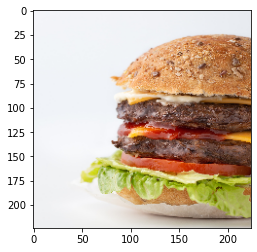

In [4]:
img, x = get_image("C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\data\\food_image_test\\burger\\burger-1.jpg")
predictions = model.predict(x)
imshow(img)
for pred in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred[1], pred[2]))

## Doing this with last-to-second layer

In [5]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
img, x = get_image("C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\data\\food_image_test\\burger\\burger-1.jpg")
feat = feat_extractor.predict(x)

matplotlib.pyplot.figure(figsize=(16,4))
matplotlib.pyplot.plot(feat[0])
matplotlib.pyplot.show()

1/1 [==============================] - 0s 99ms/step


In [7]:
images_path = 'C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\data\\images\\'
max_num_images = 100000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(range(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 85880 images to analyze


In [117]:
images[:10]

['C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\images\\roasted_chicken\\1000132.jpg',
 'C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\images\\roasted_chicken\\1000733.jpg',
 'C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\images\\roasted_chicken\\1000798.jpg',
 'C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\images\\roasted_chicken\\1001600.jpg',
 'C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\images\\roasted_chicken\\1004835.jpg',
 'C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\images\\roasted_chicken\\1011647.jpg',
 'C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\images\\roasted_chicken\\1012274.jpg',
 'C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\images\\roasted_chicken\\1012507.jpg',
 'C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\images\\roasted_chicken\\1012540.jpg',
 'C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\images\\roasted_chicken\\1013408.jpg']

In [218]:
len(images)

85880

## Creating features off of the trainining images with their corresponding topics

### Train test split

In [8]:
percent_split = 0.10

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
images_train_percent, images_test_percent =  train_test_split(images, test_size =percent_split, shuffle  = True)

In [ ]:
features = []
count = 1
for image_path in tqdm(images_train_percent):
    print (count, end= '')
    img, x = get_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)
    count += 1

  0%|          | 0/77292 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 1/77292 [00:00<3:32:12,  6.07it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 3/77292 [00:00<1:46:06, 12.14it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 6/77292 [00:00<1:17:12, 16.68it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 9/77292 [00:00<1:08:32, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 12/77292 [00:00<1:04:45, 19.89it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 15/77292 [00:00<1:03:24, 20.31it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 18/77292 [00:00<1:02:12, 20.70it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 21/77292 [00:01<1:01:31, 20.93it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 24/77292 [00:01<1:01:17, 21.01it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 27/77292 [00:01<1:00:42, 21.21it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 30/77292 [00:01<1:00:15, 21.37it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 33/77292 [00:01<1:00:11, 21.39it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 36/77292 [00:01<1:00:34, 21.25it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 39/77292 [00:01<1:00:10, 21.40it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 42/77292 [00:02<1:00:08, 21.41it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 45/77292 [00:02<1:00:19, 21.34it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 48/77292 [00:02<1:00:11, 21.39it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 51/77292 [00:02<1:00:05, 21.42it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 54/77292 [00:02<59:39, 21.58it/s]  

1/1 [==============================] - 0s 13ms/step


  0%|          | 57/77292 [00:02<59:55, 21.48it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 60/77292 [00:02<1:00:11, 21.39it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 63/77292 [00:03<1:00:05, 21.42it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 66/77292 [00:03<59:53, 21.49it/s]  

1/1 [==============================] - 0s 14ms/step


  0%|          | 69/77292 [00:03<59:39, 21.57it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 72/77292 [00:03<59:59, 21.45it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 75/77292 [00:03<59:42, 21.55it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 78/77292 [00:03<59:38, 21.58it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 81/77292 [00:03<59:32, 21.61it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 84/77292 [00:04<1:00:15, 21.35it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 87/77292 [00:04<59:44, 21.54it/s]  

1/1 [==============================] - 0s 13ms/step


  0%|          | 90/77292 [00:04<59:13, 21.73it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 93/77292 [00:04<59:48, 21.52it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 96/77292 [00:04<59:57, 21.46it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 99/77292 [00:04<59:24, 21.65it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 102/77292 [00:04<59:35, 21.59it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 105/77292 [00:05<59:25, 21.65it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 108/77292 [00:05<59:32, 21.60it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 111/77292 [00:05<1:00:16, 21.34it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 114/77292 [00:05<59:50, 21.50it/s]  

1/1 [==============================] - 0s 15ms/step


  0%|          | 117/77292 [00:05<59:54, 21.47it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 120/77292 [00:05<1:00:01, 21.43it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 123/77292 [00:05<1:02:01, 20.74it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 126/77292 [00:06<1:02:08, 20.70it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 129/77292 [00:06<1:01:50, 20.79it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 132/77292 [00:06<1:01:55, 20.77it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 135/77292 [00:06<1:02:04, 20.72it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 138/77292 [00:06<1:01:32, 20.90it/s]

1/1 [==============================] - 0s 12ms/step


  0%|          | 141/77292 [00:06<1:01:58, 20.75it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 144/77292 [00:06<1:02:08, 20.69it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 147/77292 [00:07<1:00:48, 21.14it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 150/77292 [00:07<1:00:30, 21.25it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 153/77292 [00:07<1:00:33, 21.23it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 156/77292 [00:07<59:57, 21.44it/s]  

1/1 [==============================] - 0s 14ms/step


  0%|          | 159/77292 [00:07<59:42, 21.53it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 162/77292 [00:07<59:08, 21.74it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 165/77292 [00:07<59:29, 21.61it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 168/77292 [00:07<59:17, 21.68it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 171/77292 [00:08<59:50, 21.48it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 174/77292 [00:08<59:45, 21.51it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 177/77292 [00:08<59:31, 21.59it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 180/77292 [00:08<59:52, 21.46it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 183/77292 [00:08<59:29, 21.60it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 186/77292 [00:08<59:29, 21.60it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 189/77292 [00:09<1:19:34, 16.15it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 192/77292 [00:09<1:13:15, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 195/77292 [00:09<1:09:09, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 198/77292 [00:09<1:05:59, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 201/77292 [00:09<1:04:21, 19.96it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 204/77292 [00:09<1:03:27, 20.24it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 207/77292 [00:09<1:02:14, 20.64it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 210/77292 [00:10<1:01:37, 20.85it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 213/77292 [00:10<1:01:04, 21.03it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 216/77292 [00:10<1:00:07, 21.37it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 219/77292 [00:10<1:00:31, 21.22it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 222/77292 [00:10<1:00:07, 21.36it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 225/77292 [00:10<59:53, 21.44it/s]  

1/1 [==============================] - 0s 13ms/step


  0%|          | 228/77292 [00:10<1:00:11, 21.34it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 231/77292 [00:11<59:48, 21.47it/s]  

1/1 [==============================] - 0s 13ms/step


  0%|          | 234/77292 [00:11<59:32, 21.57it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 237/77292 [00:11<59:48, 21.47it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 240/77292 [00:11<59:16, 21.66it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 243/77292 [00:11<59:17, 21.66it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 246/77292 [00:11<1:00:15, 21.31it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 249/77292 [00:11<59:50, 21.45it/s]  

1/1 [==============================] - 0s 13ms/step


  0%|          | 252/77292 [00:12<59:18, 21.65it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 255/77292 [00:12<58:45, 21.85it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 258/77292 [00:12<58:51, 21.81it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 261/77292 [00:12<59:15, 21.67it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 264/77292 [00:12<59:25, 21.60it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 267/77292 [00:12<59:31, 21.57it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 270/77292 [00:12<59:35, 21.54it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 273/77292 [00:13<59:45, 21.48it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 276/77292 [00:13<1:00:00, 21.39it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 279/77292 [00:13<59:40, 21.51it/s]  

1/1 [==============================] - 0s 14ms/step


  0%|          | 282/77292 [00:13<59:43, 21.49it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 285/77292 [00:13<1:00:32, 21.20it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 288/77292 [00:13<1:00:56, 21.06it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 291/77292 [00:13<1:01:35, 20.84it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 294/77292 [00:14<1:02:26, 20.55it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 297/77292 [00:14<1:03:43, 20.14it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 300/77292 [00:14<1:03:56, 20.07it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 303/77292 [00:14<1:04:04, 20.03it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 306/77292 [00:14<1:04:41, 19.84it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 308/77292 [00:14<1:04:57, 19.75it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 310/77292 [00:14<1:05:20, 19.64it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 312/77292 [00:14<1:05:48, 19.50it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 314/77292 [00:15<1:06:30, 19.29it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 316/77292 [00:15<1:06:05, 19.41it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 318/77292 [00:15<1:05:58, 19.45it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 321/77292 [00:15<1:04:18, 19.95it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 324/77292 [00:15<1:03:41, 20.14it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 327/77292 [00:15<1:03:33, 20.18it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 330/77292 [00:15<1:02:52, 20.40it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 333/77292 [00:15<1:02:16, 20.60it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 336/77292 [00:16<1:02:37, 20.48it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 339/77292 [00:16<1:02:51, 20.41it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 342/77292 [00:16<1:02:39, 20.47it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 345/77292 [00:16<1:02:15, 20.60it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 348/77292 [00:16<1:01:36, 20.81it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 351/77292 [00:16<1:01:49, 20.74it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 354/77292 [00:16<1:02:08, 20.64it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 357/77292 [00:17<1:01:54, 20.71it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 360/77292 [00:17<1:02:23, 20.55it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 363/77292 [00:17<1:02:51, 20.40it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 366/77292 [00:17<1:03:03, 20.33it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 369/77292 [00:17<1:03:39, 20.14it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 372/77292 [00:17<1:04:02, 20.02it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 375/77292 [00:18<1:03:08, 20.30it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 378/77292 [00:18<1:02:52, 20.39it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 381/77292 [00:18<1:02:33, 20.49it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 384/77292 [00:18<1:03:08, 20.30it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 387/77292 [00:18<1:03:07, 20.30it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 390/77292 [00:18<1:02:40, 20.45it/s]

1/1 [==============================] - 0s 12ms/step


  1%|          | 393/77292 [00:18<1:02:53, 20.38it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 396/77292 [00:19<1:02:25, 20.53it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 399/77292 [00:19<1:02:40, 20.45it/s]

1/1 [==============================] - 0s 12ms/step


  1%|          | 402/77292 [00:19<1:03:26, 20.20it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 405/77292 [00:19<1:03:16, 20.25it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 408/77292 [00:19<1:03:04, 20.32it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 411/77292 [00:19<1:03:08, 20.29it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 414/77292 [00:19<1:02:38, 20.45it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 417/77292 [00:20<1:03:01, 20.33it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 420/77292 [00:20<1:03:24, 20.20it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 423/77292 [00:20<1:03:11, 20.27it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 426/77292 [00:20<1:01:52, 20.70it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 429/77292 [00:20<1:02:20, 20.55it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 432/77292 [00:20<1:03:03, 20.31it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 435/77292 [00:20<1:02:26, 20.51it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 438/77292 [00:21<1:01:57, 20.67it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 441/77292 [00:21<1:02:30, 20.49it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 444/77292 [00:21<1:02:36, 20.46it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 447/77292 [00:21<1:02:15, 20.57it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 450/77292 [00:21<1:02:57, 20.34it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 453/77292 [00:21<1:02:50, 20.38it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 456/77292 [00:22<1:02:45, 20.40it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 459/77292 [00:22<1:02:35, 20.46it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 462/77292 [00:22<1:02:21, 20.54it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 465/77292 [00:22<1:01:58, 20.66it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 468/77292 [00:22<1:01:53, 20.69it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 471/77292 [00:22<1:01:46, 20.73it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 474/77292 [00:22<1:01:45, 20.73it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 477/77292 [00:23<1:01:21, 20.87it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 480/77292 [00:23<1:01:12, 20.92it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 483/77292 [00:23<1:01:58, 20.66it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 486/77292 [00:23<1:02:02, 20.64it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 489/77292 [00:23<1:02:03, 20.62it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 492/77292 [00:23<1:02:12, 20.58it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 495/77292 [00:23<1:01:45, 20.73it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 498/77292 [00:24<1:02:13, 20.57it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 501/77292 [00:24<1:01:50, 20.70it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 504/77292 [00:24<1:01:40, 20.75it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 507/77292 [00:24<1:02:15, 20.56it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 510/77292 [00:24<1:02:35, 20.44it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 513/77292 [00:24<1:02:28, 20.48it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 516/77292 [00:24<1:02:23, 20.51it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 519/77292 [00:25<1:02:17, 20.54it/s]

1/1 [==============================] - 0s 12ms/step


  1%|          | 522/77292 [00:25<1:01:58, 20.64it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 525/77292 [00:25<1:02:01, 20.63it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 528/77292 [00:25<1:02:21, 20.52it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 531/77292 [00:25<1:02:09, 20.58it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 534/77292 [00:25<1:01:52, 20.67it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 537/77292 [00:25<1:02:34, 20.44it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 540/77292 [00:26<1:01:44, 20.72it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 543/77292 [00:26<1:01:43, 20.72it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 546/77292 [00:26<1:02:25, 20.49it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 549/77292 [00:26<1:02:42, 20.40it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 552/77292 [00:26<1:02:32, 20.45it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 555/77292 [00:26<1:02:15, 20.54it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 558/77292 [00:26<1:02:04, 20.60it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 561/77292 [00:27<1:02:07, 20.59it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 564/77292 [00:27<1:01:58, 20.63it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 567/77292 [00:27<1:02:00, 20.62it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 570/77292 [00:27<1:02:24, 20.49it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 573/77292 [00:27<1:02:02, 20.61it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 576/77292 [00:27<1:02:14, 20.54it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 579/77292 [00:27<1:02:16, 20.53it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 582/77292 [00:28<1:02:22, 20.50it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 585/77292 [00:28<1:02:40, 20.40it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 588/77292 [00:28<1:02:16, 20.53it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 591/77292 [00:28<1:01:49, 20.68it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 594/77292 [00:28<1:02:04, 20.59it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 597/77292 [00:28<1:02:13, 20.54it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 600/77292 [00:28<1:02:19, 20.51it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 603/77292 [00:29<1:02:06, 20.58it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 606/77292 [00:29<1:02:25, 20.48it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 609/77292 [00:29<1:02:06, 20.58it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 612/77292 [00:29<1:01:34, 20.76it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 615/77292 [00:29<1:02:20, 20.50it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 618/77292 [00:29<1:02:49, 20.34it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 621/77292 [00:30<1:03:13, 20.21it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 624/77292 [00:30<1:04:23, 19.85it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 626/77292 [00:30<1:04:22, 19.85it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 628/77292 [00:30<1:05:24, 19.53it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 630/77292 [00:30<1:05:01, 19.65it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 632/77292 [00:30<1:05:13, 19.59it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 634/77292 [00:30<1:05:43, 19.44it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 637/77292 [00:30<1:04:23, 19.84it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 640/77292 [00:30<1:04:00, 19.96it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 642/77292 [00:31<1:04:14, 19.88it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 644/77292 [00:31<1:05:36, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 646/77292 [00:31<1:05:25, 19.52it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 648/77292 [00:31<1:05:07, 19.62it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 651/77292 [00:31<1:03:47, 20.02it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 653/77292 [00:31<1:03:50, 20.01it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 656/77292 [00:31<1:03:28, 20.12it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 659/77292 [00:31<1:02:39, 20.38it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 662/77292 [00:32<1:03:25, 20.14it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 665/77292 [00:32<1:02:38, 20.39it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 668/77292 [00:32<1:01:42, 20.69it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 671/77292 [00:32<1:01:34, 20.74it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 674/77292 [00:32<1:01:45, 20.67it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 677/77292 [00:32<1:01:57, 20.61it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 680/77292 [00:32<1:01:42, 20.69it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 683/77292 [00:33<1:02:07, 20.55it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 686/77292 [00:33<1:01:49, 20.65it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 689/77292 [00:33<1:02:02, 20.58it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 692/77292 [00:33<1:02:24, 20.46it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 695/77292 [00:33<1:02:14, 20.51it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 698/77292 [00:33<1:02:03, 20.57it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 701/77292 [00:33<1:02:39, 20.37it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 704/77292 [00:34<1:02:08, 20.54it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 707/77292 [00:34<1:01:34, 20.73it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 710/77292 [00:34<1:02:11, 20.52it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 713/77292 [00:34<1:02:14, 20.50it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 716/77292 [00:34<1:02:01, 20.58it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 719/77292 [00:34<1:01:59, 20.58it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 722/77292 [00:35<1:01:51, 20.63it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 725/77292 [00:35<1:01:01, 20.91it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 728/77292 [00:35<1:01:29, 20.75it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 731/77292 [00:35<1:01:59, 20.58it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 734/77292 [00:35<1:02:33, 20.40it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 737/77292 [00:35<1:02:14, 20.50it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 740/77292 [00:35<1:02:12, 20.51it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 743/77292 [00:36<1:01:45, 20.66it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 746/77292 [00:36<1:01:38, 20.70it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 749/77292 [00:36<1:03:22, 20.13it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 752/77292 [00:36<1:02:56, 20.27it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 755/77292 [00:36<1:02:04, 20.55it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 758/77292 [00:36<1:02:09, 20.52it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 761/77292 [00:36<1:02:06, 20.54it/s]

1/1 [==============================] - 0s 12ms/step


  1%|          | 764/77292 [00:37<1:01:45, 20.65it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 767/77292 [00:37<1:01:26, 20.76it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 770/77292 [00:37<1:02:51, 20.29it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 773/77292 [00:37<1:03:04, 20.22it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 776/77292 [00:37<1:02:58, 20.25it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 779/77292 [00:37<1:03:36, 20.05it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 782/77292 [00:37<1:03:16, 20.15it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 785/77292 [00:38<1:03:09, 20.19it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 788/77292 [00:38<1:03:17, 20.15it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 791/77292 [00:38<1:03:15, 20.16it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 794/77292 [00:38<1:02:21, 20.45it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 797/77292 [00:38<1:02:24, 20.43it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 800/77292 [00:38<1:01:55, 20.59it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 803/77292 [00:38<1:01:39, 20.68it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 806/77292 [00:39<1:01:45, 20.64it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 809/77292 [00:39<1:02:03, 20.54it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 812/77292 [00:39<1:02:16, 20.47it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 815/77292 [00:39<1:02:01, 20.55it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 818/77292 [00:39<1:02:09, 20.51it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 821/77292 [00:39<1:01:48, 20.62it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 824/77292 [00:39<1:01:48, 20.62it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 827/77292 [00:40<1:02:04, 20.53it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 830/77292 [00:40<1:01:41, 20.66it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 833/77292 [00:40<1:02:17, 20.46it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 836/77292 [00:40<1:03:05, 20.20it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 839/77292 [00:40<1:02:50, 20.28it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 842/77292 [00:40<1:01:42, 20.65it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 845/77292 [00:41<1:01:51, 20.60it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 848/77292 [00:41<1:01:52, 20.59it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 851/77292 [00:41<1:01:25, 20.74it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 854/77292 [00:41<1:01:32, 20.70it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 857/77292 [00:41<1:01:45, 20.63it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 860/77292 [00:41<1:01:31, 20.70it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 863/77292 [00:41<1:01:44, 20.63it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 866/77292 [00:42<1:01:52, 20.59it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 869/77292 [00:42<1:01:50, 20.60it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 872/77292 [00:42<1:01:09, 20.82it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 875/77292 [00:42<1:01:51, 20.59it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 878/77292 [00:42<1:01:37, 20.66it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 881/77292 [00:42<1:02:39, 20.33it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 884/77292 [00:42<1:02:52, 20.26it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 887/77292 [00:43<1:02:12, 20.47it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 890/77292 [00:43<1:01:40, 20.65it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 893/77292 [00:43<1:02:09, 20.48it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 896/77292 [00:43<1:02:56, 20.23it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 899/77292 [00:43<1:02:51, 20.26it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 902/77292 [00:43<1:02:32, 20.36it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 905/77292 [00:43<1:02:51, 20.25it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 908/77292 [00:44<1:02:09, 20.48it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 911/77292 [00:44<1:02:02, 20.52it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 914/77292 [00:44<1:02:15, 20.45it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 917/77292 [00:44<1:01:46, 20.60it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 920/77292 [00:44<1:01:34, 20.67it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 923/77292 [00:44<1:02:19, 20.42it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 926/77292 [00:44<1:02:10, 20.47it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 929/77292 [00:45<1:02:32, 20.35it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 932/77292 [00:45<1:02:49, 20.26it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 935/77292 [00:45<1:03:00, 20.20it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 938/77292 [00:45<1:02:36, 20.33it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 941/77292 [00:45<1:02:28, 20.37it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 944/77292 [00:45<1:02:43, 20.29it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 947/77292 [00:45<1:02:45, 20.27it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 950/77292 [00:46<1:02:42, 20.29it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 953/77292 [00:46<1:03:18, 20.10it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 956/77292 [00:46<1:03:13, 20.12it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 959/77292 [00:46<1:03:55, 19.90it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 961/77292 [00:46<1:05:30, 19.42it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 963/77292 [00:46<1:07:54, 18.73it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 965/77292 [00:46<1:07:55, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 967/77292 [00:47<1:08:56, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


  1%|▏         | 969/77292 [00:47<1:09:51, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 971/77292 [00:47<1:10:49, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 973/77292 [00:47<1:10:09, 18.13it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 975/77292 [00:47<1:10:31, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 977/77292 [00:47<1:10:18, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


  1%|▏         | 979/77292 [00:47<1:10:04, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 981/77292 [00:47<1:10:35, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 983/77292 [00:47<1:09:14, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 985/77292 [00:48<1:09:12, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 987/77292 [00:48<1:09:33, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 989/77292 [00:48<1:08:51, 18.47it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 991/77292 [00:48<1:10:04, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 993/77292 [00:48<1:09:03, 18.42it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 995/77292 [00:48<1:08:52, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 997/77292 [00:48<1:08:11, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 999/77292 [00:48<1:08:39, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1001/77292 [00:48<1:08:58, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1003/77292 [00:49<1:08:26, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1005/77292 [00:49<1:07:47, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1007/77292 [00:49<1:07:25, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1009/77292 [00:49<1:08:18, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1011/77292 [00:49<1:09:23, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1013/77292 [00:49<1:09:59, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1015/77292 [00:49<1:09:43, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1017/77292 [00:49<1:09:06, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1019/77292 [00:49<1:08:56, 18.44it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1021/77292 [00:50<1:09:44, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1023/77292 [00:50<1:09:44, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1025/77292 [00:50<1:09:55, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1027/77292 [00:50<1:10:37, 18.00it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1029/77292 [00:50<1:10:43, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1031/77292 [00:50<1:10:36, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1033/77292 [00:50<1:10:57, 17.91it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1035/77292 [00:50<1:11:20, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1037/77292 [00:50<1:11:00, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1039/77292 [00:51<1:11:11, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1041/77292 [00:51<1:10:44, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1043/77292 [00:51<1:10:09, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1045/77292 [00:51<1:09:15, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1047/77292 [00:51<1:09:46, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1049/77292 [00:51<1:11:16, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1051/77292 [00:51<1:11:45, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1053/77292 [00:51<1:11:19, 17.82it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1055/77292 [00:51<1:10:37, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1057/77292 [00:52<1:10:32, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1059/77292 [00:52<1:10:28, 18.03it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1061/77292 [00:52<1:10:14, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1063/77292 [00:52<1:09:41, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1065/77292 [00:52<1:09:27, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1067/77292 [00:52<1:08:46, 18.47it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1069/77292 [00:52<1:09:46, 18.21it/s]

1/1 [==============================] - 0s 16ms/step


  1%|▏         | 1071/77292 [00:52<1:10:30, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1073/77292 [00:52<1:10:15, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1075/77292 [00:52<1:10:27, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1077/77292 [00:53<1:10:32, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1079/77292 [00:53<1:10:48, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1081/77292 [00:53<1:10:05, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1083/77292 [00:53<1:10:09, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1085/77292 [00:53<1:09:37, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1087/77292 [00:53<1:10:35, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1089/77292 [00:53<1:11:40, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1091/77292 [00:53<1:11:25, 17.78it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1093/77292 [00:53<1:10:30, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1095/77292 [00:54<1:11:09, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1097/77292 [00:54<1:11:41, 17.71it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1099/77292 [00:54<1:11:11, 17.84it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1101/77292 [00:54<1:10:40, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1103/77292 [00:54<1:10:33, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1105/77292 [00:54<1:09:28, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1107/77292 [00:54<1:10:50, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1109/77292 [00:54<1:11:37, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1111/77292 [00:55<1:10:27, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1113/77292 [00:55<1:10:12, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1115/77292 [00:55<1:09:50, 18.18it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1117/77292 [00:55<1:09:57, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1119/77292 [00:55<1:10:03, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1121/77292 [00:55<1:10:41, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1123/77292 [00:55<1:10:03, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


  1%|▏         | 1125/77292 [00:55<1:11:04, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1127/77292 [00:55<1:11:49, 17.68it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1129/77292 [00:56<1:11:03, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1131/77292 [00:56<1:10:16, 18.06it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1133/77292 [00:56<1:10:13, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1135/77292 [00:56<1:09:36, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1137/77292 [00:56<1:10:40, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1139/77292 [00:56<1:09:47, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1141/77292 [00:56<1:09:53, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


  1%|▏         | 1143/77292 [00:56<1:10:42, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1145/77292 [00:56<1:10:35, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1147/77292 [00:56<1:10:11, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1149/77292 [00:57<1:10:23, 18.03it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1151/77292 [00:57<1:09:58, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1153/77292 [00:57<1:09:51, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1155/77292 [00:57<1:11:07, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▏         | 1157/77292 [00:57<1:10:51, 17.91it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 1159/77292 [00:57<1:10:27, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1161/77292 [00:57<1:10:23, 18.03it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1163/77292 [00:57<1:10:43, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1165/77292 [00:58<1:11:15, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1167/77292 [00:58<1:10:45, 17.93it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1169/77292 [00:58<1:10:41, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1171/77292 [00:58<1:10:10, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1173/77292 [00:58<1:10:33, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1175/77292 [00:58<1:11:13, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1177/77292 [00:58<1:11:17, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1179/77292 [00:58<1:11:24, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1181/77292 [00:58<1:11:25, 17.76it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1183/77292 [00:59<1:11:37, 17.71it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1185/77292 [00:59<1:11:34, 17.72it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1187/77292 [00:59<1:10:58, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1189/77292 [00:59<1:10:54, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1191/77292 [00:59<1:10:41, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1193/77292 [00:59<1:10:21, 18.03it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1195/77292 [00:59<1:10:52, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1197/77292 [00:59<1:10:21, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1199/77292 [00:59<1:09:55, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1201/77292 [01:00<1:09:13, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1203/77292 [01:00<1:10:05, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1205/77292 [01:00<1:10:11, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1207/77292 [01:00<1:11:08, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1209/77292 [01:00<1:10:37, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1211/77292 [01:00<1:10:25, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1213/77292 [01:00<1:10:30, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1215/77292 [01:00<1:09:59, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1217/77292 [01:00<1:10:14, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1219/77292 [01:01<1:10:01, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1221/77292 [01:01<1:09:41, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1223/77292 [01:01<1:09:37, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1225/77292 [01:01<1:09:13, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1227/77292 [01:01<1:09:36, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1229/77292 [01:01<1:09:50, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1231/77292 [01:01<1:09:33, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1233/77292 [01:01<1:09:55, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1235/77292 [01:01<1:09:48, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1237/77292 [01:01<1:10:06, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1239/77292 [01:02<1:10:07, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1241/77292 [01:02<1:10:19, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1243/77292 [01:02<1:10:50, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1245/77292 [01:02<1:12:15, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1247/77292 [01:02<1:11:18, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1249/77292 [01:02<1:11:20, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1251/77292 [01:02<1:12:04, 17.59it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1253/77292 [01:02<1:13:00, 17.36it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1255/77292 [01:03<1:13:02, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1257/77292 [01:03<1:12:25, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1259/77292 [01:03<1:12:07, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1261/77292 [01:03<1:11:31, 17.72it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1263/77292 [01:03<1:10:53, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1265/77292 [01:03<1:10:39, 17.93it/s]

1/1 [==============================] - 0s 12ms/step


  2%|▏         | 1267/77292 [01:03<1:09:56, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1269/77292 [01:03<1:09:48, 18.15it/s]

1/1 [==============================] - 0s 12ms/step


  2%|▏         | 1271/77292 [01:03<1:10:43, 17.91it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1273/77292 [01:04<1:09:46, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1275/77292 [01:04<1:09:18, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1277/77292 [01:04<1:10:29, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1279/77292 [01:04<1:10:11, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1281/77292 [01:04<1:10:59, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1283/77292 [01:04<1:10:54, 17.86it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1285/77292 [01:04<1:10:48, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1287/77292 [01:04<1:10:27, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1289/77292 [01:04<1:10:20, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1291/77292 [01:05<1:10:28, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1293/77292 [01:05<1:10:10, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1295/77292 [01:05<1:09:34, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1297/77292 [01:05<1:09:44, 18.16it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1299/77292 [01:05<1:10:58, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1301/77292 [01:05<1:12:36, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1303/77292 [01:05<1:12:14, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1305/77292 [01:05<1:12:26, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1307/77292 [01:05<1:13:04, 17.33it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1309/77292 [01:06<1:13:14, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1311/77292 [01:06<1:14:00, 17.11it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1313/77292 [01:06<1:13:35, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1315/77292 [01:06<1:13:54, 17.13it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1317/77292 [01:06<1:13:44, 17.17it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1319/77292 [01:06<1:14:43, 16.94it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1321/77292 [01:06<1:14:15, 17.05it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1323/77292 [01:06<1:13:22, 17.25it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1325/77292 [01:06<1:12:00, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1327/77292 [01:07<1:11:48, 17.63it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1329/77292 [01:07<1:11:14, 17.77it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1331/77292 [01:07<1:10:04, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1333/77292 [01:07<1:09:30, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1335/77292 [01:07<1:09:28, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1337/77292 [01:07<1:09:55, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1339/77292 [01:07<1:10:32, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1341/77292 [01:07<1:10:15, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1343/77292 [01:07<1:10:00, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1345/77292 [01:08<1:08:23, 18.51it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 1347/77292 [01:08<1:13:37, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1349/77292 [01:08<1:18:08, 16.20it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 1351/77292 [01:08<1:19:29, 15.92it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 1353/77292 [01:08<1:25:45, 14.76it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 1355/77292 [01:08<1:28:02, 14.37it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1357/77292 [01:08<1:24:09, 15.04it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 1359/77292 [01:09<1:21:03, 15.61it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1361/77292 [01:09<1:16:03, 16.64it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1364/77292 [01:09<1:11:04, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1366/77292 [01:09<1:09:16, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1368/77292 [01:09<1:08:07, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1370/77292 [01:09<1:08:13, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1372/77292 [01:09<1:07:19, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1374/77292 [01:09<1:06:49, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1376/77292 [01:09<1:05:54, 19.20it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1378/77292 [01:09<1:05:37, 19.28it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1380/77292 [01:10<1:05:15, 19.39it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1382/77292 [01:10<1:05:21, 19.36it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1385/77292 [01:10<1:03:44, 19.85it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1387/77292 [01:10<1:04:14, 19.69it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1389/77292 [01:10<1:04:16, 19.68it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1391/77292 [01:10<1:05:33, 19.30it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1393/77292 [01:10<1:05:12, 19.40it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1395/77292 [01:10<1:04:56, 19.48it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1397/77292 [01:10<1:04:46, 19.53it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1399/77292 [01:11<1:05:00, 19.46it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1402/77292 [01:11<1:04:56, 19.48it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1404/77292 [01:11<1:05:37, 19.27it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1406/77292 [01:11<1:07:12, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1408/77292 [01:11<1:07:24, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1410/77292 [01:11<1:07:47, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1412/77292 [01:11<1:08:15, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1414/77292 [01:11<1:08:50, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1416/77292 [01:11<1:09:55, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1418/77292 [01:12<1:09:56, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1420/77292 [01:12<1:09:35, 18.17it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 1422/77292 [01:12<1:10:27, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1424/77292 [01:12<1:10:47, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1426/77292 [01:12<1:10:32, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1428/77292 [01:12<1:10:11, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1430/77292 [01:12<1:09:56, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1432/77292 [01:12<1:09:23, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1434/77292 [01:12<1:09:45, 18.13it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1436/77292 [01:13<1:11:42, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1438/77292 [01:13<1:10:25, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1440/77292 [01:13<1:10:40, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1442/77292 [01:13<1:10:22, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1444/77292 [01:13<1:10:26, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1446/77292 [01:13<1:11:31, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1448/77292 [01:13<1:13:31, 17.19it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1450/77292 [01:13<1:13:35, 17.18it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 1452/77292 [01:14<1:13:26, 17.21it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 1454/77292 [01:14<1:19:12, 15.96it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1456/77292 [01:14<1:23:36, 15.12it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1458/77292 [01:14<1:19:42, 15.86it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1460/77292 [01:14<1:16:46, 16.46it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1462/77292 [01:14<1:15:40, 16.70it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1464/77292 [01:14<1:15:55, 16.64it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1466/77292 [01:14<1:14:33, 16.95it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1468/77292 [01:15<1:13:13, 17.26it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1470/77292 [01:15<1:12:04, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1472/77292 [01:15<1:11:54, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1474/77292 [01:15<1:12:31, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1476/77292 [01:15<1:12:00, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1478/77292 [01:15<1:12:20, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1480/77292 [01:15<1:12:10, 17.51it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 1482/77292 [01:15<1:12:15, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1484/77292 [01:15<1:13:38, 17.16it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1486/77292 [01:16<1:13:17, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1488/77292 [01:16<1:12:28, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1490/77292 [01:16<1:12:27, 17.43it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 1492/77292 [01:16<1:15:00, 16.84it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 1494/77292 [01:16<1:14:54, 16.87it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1496/77292 [01:16<1:12:50, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1498/77292 [01:16<1:12:31, 17.42it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1500/77292 [01:16<1:12:03, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1502/77292 [01:16<1:11:19, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1504/77292 [01:17<1:12:02, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1506/77292 [01:17<1:11:52, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1508/77292 [01:17<1:11:57, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1510/77292 [01:17<1:12:05, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1512/77292 [01:17<1:12:11, 17.49it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1514/77292 [01:17<1:13:35, 17.16it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1516/77292 [01:17<1:13:01, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1518/77292 [01:17<1:14:22, 16.98it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1520/77292 [01:17<1:14:04, 17.05it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1522/77292 [01:18<1:14:14, 17.01it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1524/77292 [01:18<1:13:35, 17.16it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1526/77292 [01:18<1:12:51, 17.33it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1528/77292 [01:18<1:11:18, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1530/77292 [01:18<1:11:10, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1532/77292 [01:18<1:10:29, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1534/77292 [01:19<1:51:56, 11.28it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1536/77292 [01:19<1:39:30, 12.69it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1538/77292 [01:19<1:30:55, 13.89it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1540/77292 [01:19<1:24:40, 14.91it/s]

1/1 [==============================] - 0s 12ms/step


  2%|▏         | 1542/77292 [01:19<1:21:03, 15.58it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1544/77292 [01:19<1:17:27, 16.30it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1546/77292 [01:19<1:14:14, 17.00it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1548/77292 [01:19<1:13:19, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1550/77292 [01:19<1:11:54, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1552/77292 [01:19<1:11:08, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1554/77292 [01:20<1:10:57, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1556/77292 [01:20<1:09:52, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1558/77292 [01:20<1:09:52, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1560/77292 [01:20<1:09:06, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1562/77292 [01:20<1:10:05, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1564/77292 [01:20<1:10:23, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1566/77292 [01:20<1:10:57, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1568/77292 [01:20<1:11:38, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1570/77292 [01:20<1:10:31, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1572/77292 [01:21<1:11:04, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1574/77292 [01:21<1:10:42, 17.85it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1576/77292 [01:21<1:10:32, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1578/77292 [01:21<1:10:11, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1580/77292 [01:21<1:09:02, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1582/77292 [01:21<1:10:08, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1584/77292 [01:21<1:10:08, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1586/77292 [01:21<1:09:23, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1588/77292 [01:21<1:09:09, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1590/77292 [01:22<1:08:58, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1592/77292 [01:22<1:09:36, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1594/77292 [01:22<1:08:55, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1596/77292 [01:22<1:08:48, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1598/77292 [01:22<1:09:52, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1600/77292 [01:22<1:09:46, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1602/77292 [01:22<1:09:17, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1604/77292 [01:22<1:08:58, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1606/77292 [01:22<1:09:36, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1608/77292 [01:23<1:09:52, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1610/77292 [01:23<1:10:29, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1612/77292 [01:23<1:10:06, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1614/77292 [01:23<1:09:10, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1616/77292 [01:23<1:09:37, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1618/77292 [01:23<1:10:14, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1620/77292 [01:23<1:10:40, 17.84it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1622/77292 [01:23<1:10:36, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1624/77292 [01:23<1:09:56, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1626/77292 [01:24<1:10:16, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1628/77292 [01:24<1:09:22, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1630/77292 [01:24<1:10:36, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1632/77292 [01:24<1:11:29, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1634/77292 [01:24<1:13:03, 17.26it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1636/77292 [01:24<1:11:42, 17.58it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1638/77292 [01:24<1:11:30, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1640/77292 [01:24<1:11:32, 17.62it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1642/77292 [01:25<1:11:07, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1644/77292 [01:25<1:11:05, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1646/77292 [01:25<1:12:46, 17.32it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1648/77292 [01:25<1:12:03, 17.49it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1650/77292 [01:25<1:12:08, 17.48it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1652/77292 [01:25<1:11:02, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1654/77292 [01:25<1:10:06, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1656/77292 [01:25<1:10:11, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1658/77292 [01:25<1:11:39, 17.59it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1660/77292 [01:26<1:10:31, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1662/77292 [01:26<1:09:26, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1664/77292 [01:26<1:09:03, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1666/77292 [01:26<1:08:55, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1668/77292 [01:26<1:09:12, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1670/77292 [01:26<1:08:31, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1672/77292 [01:26<1:07:13, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1674/77292 [01:26<1:09:06, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1676/77292 [01:26<1:08:35, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1678/77292 [01:26<1:08:37, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1680/77292 [01:27<1:08:23, 18.42it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1682/77292 [01:27<1:07:51, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1684/77292 [01:27<1:07:27, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1686/77292 [01:27<1:07:34, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1688/77292 [01:27<1:08:02, 18.52it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1690/77292 [01:27<1:07:36, 18.64it/s]

1/1 [==============================] - 0s 12ms/step


  2%|▏         | 1692/77292 [01:27<1:07:35, 18.64it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1694/77292 [01:27<1:07:32, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1696/77292 [01:27<1:06:44, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1698/77292 [01:28<1:07:09, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1700/77292 [01:28<1:07:21, 18.70it/s]

1/1 [==============================] - 0s 12ms/step


  2%|▏         | 1702/77292 [01:28<1:07:35, 18.64it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1704/77292 [01:28<1:07:46, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1706/77292 [01:28<1:08:10, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1708/77292 [01:28<1:09:23, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1710/77292 [01:28<1:09:01, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1712/77292 [01:28<1:09:47, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1714/77292 [01:28<1:09:43, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1716/77292 [01:29<1:08:51, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1718/77292 [01:29<1:08:37, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1720/77292 [01:29<1:08:07, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1722/77292 [01:29<1:08:16, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1724/77292 [01:29<1:08:08, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1726/77292 [01:29<1:08:36, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1728/77292 [01:29<1:09:07, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1730/77292 [01:29<1:08:44, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1732/77292 [01:29<1:08:44, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1734/77292 [01:30<1:08:27, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1736/77292 [01:30<1:09:01, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1738/77292 [01:30<1:09:13, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1740/77292 [01:30<1:09:33, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1742/77292 [01:30<1:09:35, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1744/77292 [01:30<1:09:48, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1746/77292 [01:30<1:09:46, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1748/77292 [01:30<1:10:25, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1750/77292 [01:30<1:09:50, 18.03it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1752/77292 [01:31<1:09:36, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1754/77292 [01:31<1:08:29, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1756/77292 [01:31<1:08:38, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1758/77292 [01:31<1:09:08, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1760/77292 [01:31<1:08:19, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1762/77292 [01:31<1:08:32, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1764/77292 [01:31<1:07:56, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1766/77292 [01:31<1:09:24, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1768/77292 [01:31<1:09:57, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1770/77292 [01:32<1:09:22, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1772/77292 [01:32<1:09:03, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1774/77292 [01:32<1:09:25, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1776/77292 [01:32<1:08:56, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1778/77292 [01:32<1:09:37, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1780/77292 [01:32<1:08:52, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1782/77292 [01:32<1:10:48, 17.77it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1784/77292 [01:32<1:12:06, 17.45it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1786/77292 [01:32<1:10:59, 17.72it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1788/77292 [01:33<1:10:12, 17.92it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1790/77292 [01:33<1:09:51, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1792/77292 [01:33<1:09:02, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1794/77292 [01:33<1:09:35, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1796/77292 [01:33<1:09:02, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1798/77292 [01:33<1:10:02, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1800/77292 [01:33<1:09:21, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1802/77292 [01:33<1:09:26, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1804/77292 [01:33<1:10:18, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1806/77292 [01:34<1:12:29, 17.36it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1808/77292 [01:34<1:12:45, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1810/77292 [01:34<1:11:38, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1812/77292 [01:34<1:11:01, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1814/77292 [01:34<1:11:44, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1816/77292 [01:34<1:09:58, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1818/77292 [01:34<1:11:45, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1820/77292 [01:34<1:11:40, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1822/77292 [01:34<1:12:45, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1824/77292 [01:35<1:12:37, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1826/77292 [01:35<1:13:02, 17.22it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1828/77292 [01:35<1:11:28, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1830/77292 [01:35<1:10:50, 17.75it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1832/77292 [01:35<1:10:39, 17.80it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1834/77292 [01:35<1:10:04, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1836/77292 [01:35<1:09:29, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1838/77292 [01:35<1:09:08, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1840/77292 [01:35<1:10:30, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1842/77292 [01:36<1:14:45, 16.82it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1844/77292 [01:36<1:13:23, 17.13it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1846/77292 [01:36<1:13:11, 17.18it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1848/77292 [01:36<1:13:14, 17.17it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1850/77292 [01:36<1:12:20, 17.38it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1852/77292 [01:36<1:11:22, 17.61it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 1854/77292 [01:36<1:12:54, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1856/77292 [01:36<1:12:06, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1858/77292 [01:36<1:12:28, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1860/77292 [01:37<1:14:40, 16.84it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1862/77292 [01:37<1:14:54, 16.78it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1864/77292 [01:37<1:13:40, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1866/77292 [01:37<1:12:46, 17.27it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1868/77292 [01:37<1:11:45, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1870/77292 [01:37<1:10:43, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1872/77292 [01:37<1:11:30, 17.58it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1874/77292 [01:37<1:10:44, 17.77it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 1876/77292 [01:38<1:12:27, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1878/77292 [01:38<1:17:03, 16.31it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 1880/77292 [01:38<1:18:58, 15.91it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1882/77292 [01:38<1:19:54, 15.73it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1884/77292 [01:38<1:16:59, 16.32it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1886/77292 [01:38<1:16:05, 16.52it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 1888/77292 [01:38<1:18:09, 16.08it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1890/77292 [01:38<1:17:05, 16.30it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1892/77292 [01:39<1:15:12, 16.71it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1894/77292 [01:39<1:14:01, 16.97it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1896/77292 [01:39<1:12:07, 17.42it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1898/77292 [01:39<1:11:29, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1900/77292 [01:39<1:11:54, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1902/77292 [01:39<1:11:32, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1904/77292 [01:39<1:10:27, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1906/77292 [01:39<1:10:10, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1908/77292 [01:39<1:10:10, 17.90it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1910/77292 [01:40<1:10:32, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1912/77292 [01:40<1:09:13, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1914/77292 [01:40<1:08:40, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1916/77292 [01:40<1:08:44, 18.27it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1918/77292 [01:40<1:08:21, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1920/77292 [01:40<1:09:16, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 1922/77292 [01:40<1:09:32, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1924/77292 [01:40<1:09:54, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1926/77292 [01:40<1:09:25, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1928/77292 [01:41<1:08:37, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 1930/77292 [01:41<1:08:43, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 1932/77292 [01:41<1:07:50, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1934/77292 [01:41<1:07:18, 18.66it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1936/77292 [01:41<1:07:26, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1938/77292 [01:41<1:07:18, 18.66it/s]

1/1 [==============================] - 0s 12ms/step


  3%|▎         | 1940/77292 [01:41<1:08:15, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1942/77292 [01:41<1:08:03, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1944/77292 [01:41<1:09:37, 18.04it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1946/77292 [01:41<1:09:01, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1948/77292 [01:42<1:09:44, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1950/77292 [01:42<1:09:06, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1952/77292 [01:42<1:08:50, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1954/77292 [01:42<1:08:26, 18.34it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1956/77292 [01:42<1:08:17, 18.38it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1958/77292 [01:42<1:09:44, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1960/77292 [01:42<1:09:34, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1962/77292 [01:42<1:08:59, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1964/77292 [01:42<1:08:52, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1966/77292 [01:43<1:08:40, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1968/77292 [01:43<1:08:42, 18.27it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1970/77292 [01:43<1:08:29, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1972/77292 [01:43<1:07:50, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1974/77292 [01:43<1:07:08, 18.70it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1976/77292 [01:43<1:07:50, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1978/77292 [01:43<1:09:16, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1980/77292 [01:43<1:09:31, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1982/77292 [01:43<1:08:50, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1984/77292 [01:44<1:08:16, 18.38it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1986/77292 [01:44<1:08:05, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1988/77292 [01:44<1:08:21, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1990/77292 [01:44<1:08:15, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1992/77292 [01:44<1:09:19, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1994/77292 [01:44<1:08:25, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 1996/77292 [01:44<1:08:25, 18.34it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 1998/77292 [01:44<1:09:28, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2000/77292 [01:44<1:09:05, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2002/77292 [01:45<1:09:00, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2004/77292 [01:45<1:09:08, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2006/77292 [01:45<1:08:57, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2008/77292 [01:45<1:08:39, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2010/77292 [01:45<1:08:29, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2012/77292 [01:45<1:08:35, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2014/77292 [01:45<1:08:28, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2016/77292 [01:45<1:09:30, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2018/77292 [01:45<1:09:29, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2020/77292 [01:46<1:10:02, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2022/77292 [01:46<1:09:16, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2024/77292 [01:46<1:09:08, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2026/77292 [01:46<1:09:47, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2028/77292 [01:46<1:09:29, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2030/77292 [01:46<1:08:21, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2032/77292 [01:46<1:09:14, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2034/77292 [01:46<1:08:54, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2036/77292 [01:46<1:09:23, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2038/77292 [01:47<1:09:35, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2040/77292 [01:47<1:09:09, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2042/77292 [01:47<1:09:48, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2044/77292 [01:47<1:10:14, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2046/77292 [01:47<1:10:22, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2048/77292 [01:47<1:10:27, 17.80it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2050/77292 [01:47<1:09:46, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2052/77292 [01:47<1:09:51, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2054/77292 [01:47<1:10:28, 17.79it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 2056/77292 [01:48<1:10:53, 17.69it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2058/77292 [01:48<1:10:26, 17.80it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2060/77292 [01:48<1:10:35, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2062/77292 [01:48<1:09:51, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2064/77292 [01:48<1:09:53, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2066/77292 [01:48<1:10:15, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2068/77292 [01:48<1:09:43, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2070/77292 [01:48<1:09:37, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2072/77292 [01:48<1:10:12, 17.85it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2074/77292 [01:49<1:11:28, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2076/77292 [01:49<1:10:50, 17.70it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2078/77292 [01:49<1:09:39, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2080/77292 [01:49<1:08:37, 18.27it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2082/77292 [01:49<1:08:53, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2084/77292 [01:49<1:08:39, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2086/77292 [01:49<1:09:10, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2088/77292 [01:49<1:09:23, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2090/77292 [01:49<1:09:57, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2092/77292 [01:50<1:11:16, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2094/77292 [01:50<1:11:45, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2096/77292 [01:50<1:11:47, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2098/77292 [01:50<1:10:41, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2100/77292 [01:50<1:10:06, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2102/77292 [01:50<1:11:45, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2104/77292 [01:50<1:12:43, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2106/77292 [01:50<1:12:05, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2108/77292 [01:50<1:12:01, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2110/77292 [01:51<1:12:20, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2112/77292 [01:51<1:11:26, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2114/77292 [01:51<1:11:45, 17.46it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2116/77292 [01:51<1:10:17, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2118/77292 [01:51<1:09:43, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2120/77292 [01:51<1:09:25, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2122/77292 [01:51<1:10:18, 17.82it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2124/77292 [01:51<1:09:16, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2126/77292 [01:51<1:08:27, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2128/77292 [01:52<1:08:20, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2130/77292 [01:52<1:07:53, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2132/77292 [01:52<1:08:19, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2134/77292 [01:52<1:08:03, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2136/77292 [01:52<1:08:34, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2138/77292 [01:52<1:08:02, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2140/77292 [01:52<1:07:08, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2142/77292 [01:52<1:08:10, 18.37it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2144/77292 [01:52<1:07:46, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2146/77292 [01:53<1:07:51, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2148/77292 [01:53<1:07:52, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2150/77292 [01:53<1:07:48, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2152/77292 [01:53<1:07:43, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2154/77292 [01:53<1:07:38, 18.51it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2156/77292 [01:53<1:07:46, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2158/77292 [01:53<1:08:13, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2160/77292 [01:53<1:07:26, 18.57it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2162/77292 [01:53<1:08:49, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2164/77292 [01:54<1:08:47, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2166/77292 [01:54<1:08:11, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2168/77292 [01:54<1:08:42, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2170/77292 [01:54<1:08:34, 18.26it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2172/77292 [01:54<1:08:13, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2174/77292 [01:54<1:08:10, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2176/77292 [01:54<1:07:56, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2178/77292 [01:54<1:08:10, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2180/77292 [01:54<1:08:41, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2182/77292 [01:55<1:08:57, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2184/77292 [01:55<1:09:27, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2186/77292 [01:55<1:09:24, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2188/77292 [01:55<1:08:40, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2190/77292 [01:55<1:09:16, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2192/77292 [01:55<1:09:33, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2194/77292 [01:55<1:09:41, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2196/77292 [01:55<1:09:22, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2198/77292 [01:55<1:08:48, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2200/77292 [01:56<1:09:30, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2202/77292 [01:56<1:09:27, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2204/77292 [01:56<1:09:26, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2206/77292 [01:56<1:09:00, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2208/77292 [01:56<1:08:52, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2210/77292 [01:56<1:09:33, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2212/77292 [01:56<1:09:05, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2214/77292 [01:56<1:08:47, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2216/77292 [01:56<1:08:22, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2218/77292 [01:57<1:08:15, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2220/77292 [01:57<1:08:56, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2222/77292 [01:57<1:08:14, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2224/77292 [01:57<1:08:03, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2226/77292 [01:57<1:08:13, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2228/77292 [01:57<1:07:58, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2230/77292 [01:57<1:08:32, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2232/77292 [01:57<1:08:45, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2234/77292 [01:57<1:08:05, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2236/77292 [01:58<1:08:14, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2238/77292 [01:58<1:08:41, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2240/77292 [01:58<1:10:09, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2242/77292 [01:58<1:09:39, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2244/77292 [01:58<1:09:20, 18.04it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2246/77292 [01:58<1:09:07, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2248/77292 [01:58<1:09:42, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2250/77292 [01:58<1:09:56, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2252/77292 [01:58<1:09:37, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2254/77292 [01:59<1:09:41, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2256/77292 [01:59<1:09:15, 18.06it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2258/77292 [01:59<1:08:52, 18.16it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2260/77292 [01:59<1:07:39, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2262/77292 [01:59<1:07:13, 18.60it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2264/77292 [01:59<1:07:26, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2266/77292 [01:59<1:08:30, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2268/77292 [01:59<1:10:01, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2270/77292 [01:59<1:09:24, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2272/77292 [02:00<1:10:39, 17.70it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2274/77292 [02:00<1:10:10, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2276/77292 [02:00<1:09:26, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2278/77292 [02:00<1:09:56, 17.88it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2280/77292 [02:00<1:08:45, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2282/77292 [02:00<1:07:45, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2284/77292 [02:00<1:07:26, 18.54it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2286/77292 [02:00<1:07:52, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2288/77292 [02:00<1:08:50, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2290/77292 [02:00<1:09:13, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 2292/77292 [02:01<1:08:56, 18.13it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2294/77292 [02:01<1:09:01, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2296/77292 [02:01<1:09:04, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2298/77292 [02:01<1:08:15, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2300/77292 [02:01<1:07:30, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2302/77292 [02:01<1:06:53, 18.69it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2304/77292 [02:01<1:07:23, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2306/77292 [02:01<1:08:17, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2308/77292 [02:01<1:07:26, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2310/77292 [02:02<1:06:57, 18.66it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2312/77292 [02:02<1:06:59, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2314/77292 [02:02<1:07:27, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2316/77292 [02:02<1:08:09, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2318/77292 [02:02<1:07:09, 18.61it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2320/77292 [02:02<1:06:21, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2322/77292 [02:02<1:06:40, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2324/77292 [02:02<1:05:55, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2326/77292 [02:02<1:07:16, 18.57it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2328/77292 [02:03<1:07:22, 18.55it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2330/77292 [02:03<1:07:24, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2332/77292 [02:03<1:07:45, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2334/77292 [02:03<1:07:36, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2336/77292 [02:03<1:08:04, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2338/77292 [02:03<1:08:35, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2340/77292 [02:03<1:08:11, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2342/77292 [02:03<1:08:03, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2344/77292 [02:03<1:07:49, 18.42it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2346/77292 [02:04<1:08:46, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2348/77292 [02:04<1:08:41, 18.18it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2350/77292 [02:04<1:07:59, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2352/77292 [02:04<1:07:46, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2354/77292 [02:04<1:08:10, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2356/77292 [02:04<1:08:56, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2358/77292 [02:04<1:10:08, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2360/77292 [02:04<1:10:49, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2362/77292 [02:04<1:11:03, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2364/77292 [02:05<1:11:24, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2366/77292 [02:05<1:10:21, 17.75it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2368/77292 [02:05<1:09:47, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2370/77292 [02:05<1:09:03, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2372/77292 [02:05<1:09:27, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2374/77292 [02:05<1:10:28, 17.72it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 2376/77292 [02:05<1:10:03, 17.82it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 2378/77292 [02:05<1:11:49, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2380/77292 [02:05<1:13:11, 17.06it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2382/77292 [02:06<1:13:46, 16.92it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2384/77292 [02:06<1:13:14, 17.05it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2386/77292 [02:06<1:13:21, 17.02it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2388/77292 [02:06<1:13:13, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2390/77292 [02:06<1:14:47, 16.69it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2392/77292 [02:06<1:13:57, 16.88it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2394/77292 [02:06<1:15:20, 16.57it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2396/77292 [02:06<1:13:06, 17.07it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2398/77292 [02:07<1:12:16, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2400/77292 [02:07<1:11:41, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2402/77292 [02:07<1:12:01, 17.33it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2404/77292 [02:07<1:11:31, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2406/77292 [02:07<1:09:51, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2408/77292 [02:07<1:09:48, 17.88it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2410/77292 [02:07<1:09:12, 18.03it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2412/77292 [02:07<1:09:55, 17.85it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2414/77292 [02:07<1:09:39, 17.91it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2416/77292 [02:08<1:08:58, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2418/77292 [02:08<1:08:26, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2420/77292 [02:08<1:08:52, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2422/77292 [02:08<1:09:29, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2424/77292 [02:08<1:09:20, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2426/77292 [02:08<1:08:28, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2428/77292 [02:08<1:07:49, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2430/77292 [02:08<1:08:11, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2432/77292 [02:08<1:09:23, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2434/77292 [02:09<1:09:28, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2436/77292 [02:09<1:08:24, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2438/77292 [02:09<1:09:26, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2440/77292 [02:09<1:09:25, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2442/77292 [02:09<1:08:56, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2444/77292 [02:09<1:08:41, 18.16it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2446/77292 [02:09<1:09:55, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2448/77292 [02:09<1:09:16, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2450/77292 [02:09<1:08:50, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2452/77292 [02:10<1:10:00, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2454/77292 [02:10<1:08:52, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2456/77292 [02:10<1:08:54, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2458/77292 [02:10<1:08:33, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2460/77292 [02:10<1:08:41, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2462/77292 [02:10<1:09:28, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2464/77292 [02:10<1:08:46, 18.13it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2466/77292 [02:10<1:09:58, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2468/77292 [02:10<1:09:52, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2470/77292 [02:10<1:09:37, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2472/77292 [02:11<1:09:15, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2474/77292 [02:11<1:09:37, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2476/77292 [02:11<1:09:21, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2478/77292 [02:11<1:08:52, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2480/77292 [02:11<1:08:47, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2482/77292 [02:11<1:08:19, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2484/77292 [02:11<1:08:27, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2486/77292 [02:11<1:08:26, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2488/77292 [02:11<1:08:17, 18.26it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2490/77292 [02:12<1:08:41, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2492/77292 [02:12<1:08:31, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2494/77292 [02:12<1:08:56, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2496/77292 [02:12<1:09:43, 17.88it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2498/77292 [02:12<1:09:30, 17.93it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2500/77292 [02:12<1:09:43, 17.88it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 2502/77292 [02:12<1:09:41, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2504/77292 [02:12<1:10:24, 17.70it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2506/77292 [02:12<1:09:36, 17.90it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2508/77292 [02:13<1:08:51, 18.10it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 2510/77292 [02:13<1:08:42, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2512/77292 [02:13<1:07:51, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2514/77292 [02:13<1:07:46, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2516/77292 [02:13<1:08:07, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2518/77292 [02:13<1:07:36, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2520/77292 [02:13<1:08:48, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2522/77292 [02:13<1:08:50, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2524/77292 [02:13<1:08:41, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2526/77292 [02:14<1:09:09, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2528/77292 [02:14<1:09:16, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2530/77292 [02:14<1:10:43, 17.62it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2532/77292 [02:14<1:09:27, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2534/77292 [02:14<1:09:07, 18.03it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2536/77292 [02:14<1:08:43, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2538/77292 [02:14<1:09:10, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2540/77292 [02:14<1:08:32, 18.18it/s]

1/1 [==============================] - 0s 12ms/step


  3%|▎         | 2542/77292 [02:14<1:08:16, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2544/77292 [02:15<1:07:44, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2546/77292 [02:15<1:07:54, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2548/77292 [02:15<1:08:44, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2550/77292 [02:15<1:08:04, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2552/77292 [02:15<1:07:07, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2554/77292 [02:15<1:06:55, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2556/77292 [02:15<1:07:31, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2558/77292 [02:15<1:07:57, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2560/77292 [02:15<1:08:30, 18.18it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2562/77292 [02:16<1:07:40, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2564/77292 [02:16<1:08:20, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2566/77292 [02:16<1:09:15, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2568/77292 [02:16<1:09:54, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2570/77292 [02:16<1:09:14, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2572/77292 [02:16<1:09:20, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2574/77292 [02:16<1:09:23, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2576/77292 [02:16<1:08:53, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2578/77292 [02:16<1:10:00, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2580/77292 [02:17<1:09:29, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2582/77292 [02:17<1:08:59, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2584/77292 [02:17<1:08:46, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2586/77292 [02:17<1:09:35, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2588/77292 [02:17<1:08:56, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2590/77292 [02:17<1:09:06, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2592/77292 [02:17<1:08:22, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2594/77292 [02:17<1:08:36, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2596/77292 [02:17<1:10:45, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2598/77292 [02:18<1:10:13, 17.73it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2600/77292 [02:18<1:08:31, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2602/77292 [02:18<1:07:50, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2604/77292 [02:18<1:08:11, 18.26it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2606/77292 [02:18<1:08:17, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2608/77292 [02:18<1:07:54, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2610/77292 [02:18<1:07:59, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2612/77292 [02:18<1:07:42, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2614/77292 [02:18<1:07:56, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2616/77292 [02:19<1:09:48, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2618/77292 [02:19<1:09:31, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2620/77292 [02:19<1:09:08, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2622/77292 [02:19<1:08:41, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2624/77292 [02:19<1:08:24, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2626/77292 [02:19<1:09:01, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2628/77292 [02:19<1:08:49, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2630/77292 [02:19<1:08:28, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2632/77292 [02:19<1:08:13, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2634/77292 [02:20<1:07:57, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2636/77292 [02:20<1:08:50, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2638/77292 [02:20<1:08:39, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2640/77292 [02:20<1:08:32, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2642/77292 [02:20<1:08:02, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2644/77292 [02:20<1:08:15, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2646/77292 [02:20<1:08:55, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2648/77292 [02:20<1:09:16, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2650/77292 [02:20<1:09:08, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2652/77292 [02:21<1:09:14, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2654/77292 [02:21<1:10:03, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2656/77292 [02:21<1:10:06, 17.74it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 2658/77292 [02:21<1:09:18, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2660/77292 [02:21<1:08:47, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2662/77292 [02:21<1:09:55, 17.79it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2664/77292 [02:21<1:09:47, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2666/77292 [02:21<1:09:30, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2668/77292 [02:21<1:09:35, 17.87it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 2670/77292 [02:22<1:09:39, 17.86it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2672/77292 [02:22<1:09:13, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2674/77292 [02:22<1:10:24, 17.66it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2676/77292 [02:22<1:10:29, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2678/77292 [02:22<1:10:10, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2680/77292 [02:22<1:10:19, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 2682/77292 [02:22<1:10:26, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2684/77292 [02:22<1:11:26, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2686/77292 [02:22<1:11:12, 17.46it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2688/77292 [02:23<1:10:29, 17.64it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 2690/77292 [02:23<1:11:06, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2692/77292 [02:23<1:10:36, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2694/77292 [02:23<1:10:39, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2696/77292 [02:23<1:09:27, 17.90it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 2698/77292 [02:23<1:10:05, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 2700/77292 [02:23<1:08:46, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 2702/77292 [02:23<1:09:09, 17.97it/s]

1/1 [==============================] - 0s 12ms/step


  3%|▎         | 2704/77292 [02:23<1:08:35, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2706/77292 [02:24<1:08:41, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2708/77292 [02:24<1:08:26, 18.16it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▎         | 2710/77292 [02:24<1:08:21, 18.18it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2712/77292 [02:24<1:09:25, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2714/77292 [02:24<1:09:19, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▎         | 2716/77292 [02:24<1:08:11, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2718/77292 [02:24<1:07:26, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2720/77292 [02:24<1:07:49, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2722/77292 [02:24<1:08:42, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▎         | 2724/77292 [02:25<1:09:11, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2726/77292 [02:25<1:08:56, 18.03it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2728/77292 [02:25<1:09:02, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▎         | 2730/77292 [02:25<1:09:20, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2732/77292 [02:25<1:09:54, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2734/77292 [02:25<1:10:06, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2736/77292 [02:25<1:09:03, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2738/77292 [02:25<1:08:21, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2740/77292 [02:25<1:09:13, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2742/77292 [02:26<1:09:44, 17.82it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2744/77292 [02:26<1:08:09, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2746/77292 [02:26<1:08:28, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2748/77292 [02:26<1:08:33, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2750/77292 [02:26<1:08:27, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2752/77292 [02:26<1:09:06, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2754/77292 [02:26<1:08:26, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2756/77292 [02:26<1:08:13, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▎         | 2758/77292 [02:26<1:07:38, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2760/77292 [02:27<1:18:39, 15.79it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▎         | 2762/77292 [02:27<1:18:56, 15.74it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2764/77292 [02:27<1:17:13, 16.08it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2766/77292 [02:27<1:15:44, 16.40it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2768/77292 [02:27<1:13:49, 16.82it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2770/77292 [02:27<1:12:40, 17.09it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2772/77292 [02:27<1:12:15, 17.19it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2774/77292 [02:27<1:11:17, 17.42it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▎         | 2776/77292 [02:28<1:10:34, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2778/77292 [02:28<1:09:38, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2780/77292 [02:28<1:10:18, 17.66it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 2782/77292 [02:28<1:12:03, 17.23it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2784/77292 [02:28<1:10:52, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▎         | 2786/77292 [02:28<1:10:25, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2788/77292 [02:28<1:08:58, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2790/77292 [02:28<1:09:18, 17.92it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2792/77292 [02:28<1:08:12, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2794/77292 [02:29<1:08:18, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▎         | 2796/77292 [02:29<1:08:46, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2798/77292 [02:29<1:08:47, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2800/77292 [02:29<1:09:33, 17.85it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2802/77292 [02:29<1:10:24, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2804/77292 [02:29<1:09:54, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2806/77292 [02:29<1:10:06, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2808/77292 [02:29<1:09:29, 17.86it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2810/77292 [02:29<1:10:11, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2812/77292 [02:30<1:09:55, 17.75it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2814/77292 [02:30<1:09:11, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2816/77292 [02:30<1:09:13, 17.93it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2818/77292 [02:30<1:10:11, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2820/77292 [02:30<1:09:52, 17.76it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2822/77292 [02:30<1:09:10, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2824/77292 [02:30<1:08:37, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2826/77292 [02:30<1:08:50, 18.03it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2828/77292 [02:30<1:09:20, 17.90it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2830/77292 [02:31<1:09:14, 17.92it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2832/77292 [02:31<1:08:02, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2834/77292 [02:31<1:08:36, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2836/77292 [02:31<1:08:07, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2838/77292 [02:31<1:07:39, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▎         | 2840/77292 [02:31<1:08:20, 18.16it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2842/77292 [02:31<1:08:03, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2844/77292 [02:31<1:07:55, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2846/77292 [02:31<1:07:57, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2848/77292 [02:32<1:08:55, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2850/77292 [02:32<1:09:12, 17.93it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2852/77292 [02:32<1:08:22, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2854/77292 [02:32<1:07:42, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2856/77292 [02:32<1:07:48, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2858/77292 [02:32<1:08:59, 17.98it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▎         | 2860/77292 [02:32<1:09:48, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2862/77292 [02:32<1:11:18, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2864/77292 [02:32<1:11:21, 17.38it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2866/77292 [02:33<1:11:17, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2868/77292 [02:33<1:11:42, 17.30it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2870/77292 [02:33<1:11:54, 17.25it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2872/77292 [02:33<1:11:28, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2874/77292 [02:33<1:09:53, 17.75it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2876/77292 [02:33<1:09:53, 17.75it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▎         | 2878/77292 [02:33<1:49:56, 11.28it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2880/77292 [02:34<1:38:39, 12.57it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2882/77292 [02:34<1:29:50, 13.80it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2884/77292 [02:34<1:23:39, 14.82it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2886/77292 [02:34<1:19:42, 15.56it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2888/77292 [02:34<1:17:16, 16.05it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2890/77292 [02:34<1:14:03, 16.74it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2892/77292 [02:34<1:12:03, 17.21it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 2894/77292 [02:34<1:10:46, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▎         | 2896/77292 [02:34<1:10:25, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 2898/77292 [02:35<1:09:42, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2900/77292 [02:35<1:09:11, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2902/77292 [02:35<1:10:08, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2904/77292 [02:35<1:11:09, 17.42it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 2906/77292 [02:35<1:10:45, 17.52it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 2908/77292 [02:35<1:10:51, 17.50it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2910/77292 [02:35<1:10:22, 17.62it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 2912/77292 [02:35<1:09:28, 17.84it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 2914/77292 [02:35<1:09:36, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 2916/77292 [02:36<1:09:51, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2918/77292 [02:36<1:09:00, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2920/77292 [02:36<1:08:11, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2922/77292 [02:36<1:07:28, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2924/77292 [02:36<1:09:06, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2926/77292 [02:36<1:10:37, 17.55it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 2928/77292 [02:36<1:10:29, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2930/77292 [02:36<1:11:32, 17.32it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 2932/77292 [02:37<1:16:35, 16.18it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2934/77292 [02:37<1:15:51, 16.34it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2936/77292 [02:37<1:14:29, 16.64it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2938/77292 [02:37<1:13:16, 16.91it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 2940/77292 [02:37<1:11:52, 17.24it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 2942/77292 [02:37<1:10:19, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2944/77292 [02:37<1:09:59, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2946/77292 [02:37<1:09:11, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2948/77292 [02:37<1:08:27, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 2950/77292 [02:38<1:08:50, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2952/77292 [02:38<1:10:14, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2954/77292 [02:38<1:10:40, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2956/77292 [02:38<1:09:06, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2958/77292 [02:38<1:08:12, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2960/77292 [02:38<1:09:48, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2962/77292 [02:38<1:10:27, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2964/77292 [02:38<1:24:31, 14.66it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2966/77292 [02:39<1:20:28, 15.39it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 2968/77292 [02:39<1:25:25, 14.50it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 2970/77292 [02:39<1:26:51, 14.26it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2972/77292 [02:39<1:22:50, 14.95it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2974/77292 [02:39<1:21:20, 15.23it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 2976/77292 [02:39<1:21:29, 15.20it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 2978/77292 [02:39<1:20:51, 15.32it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2980/77292 [02:39<1:19:01, 15.67it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 2982/77292 [02:40<1:19:23, 15.60it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2984/77292 [02:40<1:20:51, 15.32it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 2986/77292 [02:40<1:19:16, 15.62it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2988/77292 [02:40<1:17:12, 16.04it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2990/77292 [02:40<1:18:20, 15.81it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 2992/77292 [02:40<1:19:28, 15.58it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 2994/77292 [02:40<1:19:53, 15.50it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 2996/77292 [02:41<1:21:51, 15.13it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 2998/77292 [02:41<1:22:07, 15.08it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 3000/77292 [02:41<1:21:45, 15.15it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3002/77292 [02:41<1:19:15, 15.62it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3004/77292 [02:41<1:22:37, 14.99it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 3006/77292 [02:41<1:24:06, 14.72it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 3008/77292 [02:41<1:22:57, 14.92it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3010/77292 [02:41<1:19:17, 15.61it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 3012/77292 [02:42<1:17:29, 15.98it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3014/77292 [02:42<1:16:28, 16.19it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3016/77292 [02:42<1:16:29, 16.18it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 3018/77292 [02:42<1:16:41, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3020/77292 [02:42<1:18:07, 15.84it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 3022/77292 [02:42<1:22:05, 15.08it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3024/77292 [02:42<1:22:49, 14.94it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3026/77292 [02:42<1:21:07, 15.26it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3028/77292 [02:43<1:18:33, 15.76it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3030/77292 [02:43<1:17:06, 16.05it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3032/77292 [02:43<1:16:11, 16.24it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 3034/77292 [02:43<1:15:33, 16.38it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3036/77292 [02:43<1:14:50, 16.54it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 3038/77292 [02:43<1:18:06, 15.84it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3040/77292 [02:43<1:18:22, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3042/77292 [02:43<1:18:55, 15.68it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3044/77292 [02:44<1:17:27, 15.98it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3046/77292 [02:44<1:14:35, 16.59it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3048/77292 [02:44<1:12:45, 17.01it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3050/77292 [02:44<1:12:57, 16.96it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3052/77292 [02:44<1:13:16, 16.88it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3054/77292 [02:44<1:12:18, 17.11it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3056/77292 [02:44<1:10:57, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3058/77292 [02:44<1:10:26, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3060/77292 [02:44<1:13:21, 16.86it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3062/77292 [02:45<1:11:00, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3064/77292 [02:45<1:09:26, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3066/77292 [02:45<1:08:46, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3068/77292 [02:45<1:07:51, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3070/77292 [02:45<1:08:28, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3072/77292 [02:45<1:08:34, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3074/77292 [02:45<1:08:26, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3076/77292 [02:45<1:08:16, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3078/77292 [02:45<1:08:41, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3080/77292 [02:46<1:08:48, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3082/77292 [02:46<1:08:53, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3084/77292 [02:46<1:07:50, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3086/77292 [02:46<1:07:28, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3088/77292 [02:46<1:07:12, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3090/77292 [02:46<1:08:08, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3092/77292 [02:46<1:08:08, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3094/77292 [02:46<1:08:30, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3096/77292 [02:46<1:07:55, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3098/77292 [02:47<1:08:27, 18.06it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3100/77292 [02:47<1:08:37, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3102/77292 [02:47<1:09:29, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3104/77292 [02:47<1:08:43, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3106/77292 [02:47<1:08:14, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3108/77292 [02:47<1:07:44, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3110/77292 [02:47<1:08:07, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3112/77292 [02:47<1:09:19, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3114/77292 [02:47<1:08:41, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3116/77292 [02:48<1:07:41, 18.26it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3118/77292 [02:48<1:08:38, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3120/77292 [02:48<1:08:23, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3122/77292 [02:48<1:07:01, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3124/77292 [02:48<1:07:37, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3126/77292 [02:48<1:07:44, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3128/77292 [02:48<1:13:35, 16.79it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3130/77292 [02:48<1:15:33, 16.36it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 3132/77292 [02:48<1:14:49, 16.52it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3134/77292 [02:49<1:12:17, 17.10it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3136/77292 [02:49<1:10:54, 17.43it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3138/77292 [02:49<1:10:20, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3140/77292 [02:49<1:09:01, 17.90it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3142/77292 [02:49<1:08:29, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3144/77292 [02:49<1:07:54, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3146/77292 [02:49<1:07:30, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3148/77292 [02:49<1:08:52, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3150/77292 [02:49<1:08:21, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3152/77292 [02:50<1:08:44, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3154/77292 [02:50<1:07:53, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3156/77292 [02:50<1:07:47, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3158/77292 [02:50<1:08:31, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3160/77292 [02:50<1:07:08, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3162/77292 [02:50<1:07:56, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3164/77292 [02:50<1:07:33, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3166/77292 [02:50<1:07:48, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3168/77292 [02:50<1:08:09, 18.13it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3170/77292 [02:51<1:07:41, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3172/77292 [02:51<1:06:59, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3174/77292 [02:51<1:06:40, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3176/77292 [02:51<1:07:03, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3178/77292 [02:51<1:08:01, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3180/77292 [02:51<1:08:49, 17.95it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 3182/77292 [02:51<1:13:40, 16.76it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3184/77292 [02:51<1:19:06, 15.61it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3186/77292 [02:52<1:17:21, 15.97it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3188/77292 [02:52<1:14:31, 16.57it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3190/77292 [02:52<1:12:17, 17.08it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3192/77292 [02:52<1:10:27, 17.53it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3194/77292 [02:52<1:09:49, 17.69it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3196/77292 [02:52<1:09:34, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3198/77292 [02:52<1:09:00, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3200/77292 [02:52<1:08:15, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3202/77292 [02:52<1:08:23, 18.06it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3204/77292 [02:53<1:09:54, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3206/77292 [02:53<1:09:50, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3208/77292 [02:53<1:09:23, 17.79it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3210/77292 [02:53<1:08:53, 17.92it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3212/77292 [02:53<1:09:38, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 3214/77292 [02:53<1:11:36, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3216/77292 [02:53<1:11:55, 17.17it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3218/77292 [02:53<1:12:24, 17.05it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 3220/77292 [02:53<1:13:13, 16.86it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3222/77292 [02:54<1:12:07, 17.12it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3224/77292 [02:54<1:10:58, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3226/77292 [02:54<1:11:06, 17.36it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3228/77292 [02:54<1:09:20, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3230/77292 [02:54<1:09:24, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3232/77292 [02:54<1:08:53, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3234/77292 [02:54<1:08:27, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3236/77292 [02:54<1:08:30, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3238/77292 [02:54<1:08:16, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3240/77292 [02:55<1:07:43, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3242/77292 [02:55<1:07:31, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3244/77292 [02:55<1:08:46, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3246/77292 [02:55<1:07:43, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3248/77292 [02:55<1:07:05, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3250/77292 [02:55<1:06:54, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3252/77292 [02:55<1:06:47, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3254/77292 [02:55<1:07:58, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3256/77292 [02:55<1:07:25, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3258/77292 [02:56<1:06:48, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3260/77292 [02:56<1:06:53, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3262/77292 [02:56<1:06:40, 18.51it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3264/77292 [02:56<1:06:47, 18.47it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3266/77292 [02:56<1:07:25, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3268/77292 [02:56<1:07:40, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3270/77292 [02:56<1:06:51, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3272/77292 [02:56<1:06:34, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3274/77292 [02:56<1:07:11, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3276/77292 [02:57<1:06:29, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3278/77292 [02:57<1:06:06, 18.66it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3280/77292 [02:57<1:06:01, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3282/77292 [02:57<1:07:10, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3284/77292 [02:57<1:08:37, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3286/77292 [02:57<1:09:55, 17.64it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3288/77292 [02:57<1:08:42, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3290/77292 [02:57<1:08:15, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3292/77292 [02:57<1:07:56, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3294/77292 [02:58<1:06:33, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3296/77292 [02:58<1:06:22, 18.58it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3298/77292 [02:58<1:05:27, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3300/77292 [02:58<1:05:32, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3302/77292 [02:58<1:06:10, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3304/77292 [02:58<1:06:14, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3306/77292 [02:58<1:05:35, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3308/77292 [02:58<1:05:49, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3310/77292 [02:58<1:06:00, 18.68it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3312/77292 [02:58<1:05:56, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3314/77292 [02:59<1:05:49, 18.73it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3316/77292 [02:59<1:05:27, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3318/77292 [02:59<1:05:25, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3320/77292 [02:59<1:06:24, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3322/77292 [02:59<1:07:47, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3324/77292 [02:59<1:07:00, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3326/77292 [02:59<1:07:05, 18.38it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3328/77292 [02:59<1:06:49, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3330/77292 [02:59<1:06:52, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3332/77292 [03:00<1:07:16, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3334/77292 [03:00<1:06:49, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3336/77292 [03:00<1:06:41, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3338/77292 [03:00<1:06:35, 18.51it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3340/77292 [03:00<1:06:17, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3342/77292 [03:00<1:07:14, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3344/77292 [03:00<1:06:47, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3346/77292 [03:00<1:06:29, 18.54it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3348/77292 [03:00<1:06:15, 18.60it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3350/77292 [03:01<1:06:06, 18.64it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3352/77292 [03:01<1:05:59, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3354/77292 [03:01<1:06:17, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3356/77292 [03:01<1:06:39, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3358/77292 [03:01<1:07:16, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3360/77292 [03:01<1:07:15, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3362/77292 [03:01<1:07:05, 18.37it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3364/77292 [03:01<1:07:14, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3366/77292 [03:01<1:07:35, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3368/77292 [03:02<1:07:00, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3370/77292 [03:02<1:08:05, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3372/77292 [03:02<1:07:41, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3374/77292 [03:02<1:08:45, 17.92it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3376/77292 [03:02<1:08:09, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3378/77292 [03:02<1:07:24, 18.27it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3380/77292 [03:02<1:07:16, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3382/77292 [03:02<1:07:34, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3384/77292 [03:02<1:07:23, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3386/77292 [03:02<1:06:40, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3388/77292 [03:03<1:07:10, 18.34it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3390/77292 [03:03<1:11:31, 17.22it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3392/77292 [03:03<1:09:54, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3394/77292 [03:03<1:09:36, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3396/77292 [03:03<1:08:42, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3398/77292 [03:03<1:07:59, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3400/77292 [03:03<1:08:58, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3402/77292 [03:03<1:09:39, 17.68it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3404/77292 [03:04<1:08:06, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3406/77292 [03:04<1:07:11, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3408/77292 [03:04<1:07:51, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3410/77292 [03:04<1:07:34, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3412/77292 [03:04<1:06:27, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3414/77292 [03:04<1:07:20, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3416/77292 [03:04<1:07:01, 18.37it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3418/77292 [03:04<1:08:50, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3420/77292 [03:04<1:08:26, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3422/77292 [03:04<1:08:21, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3424/77292 [03:05<1:08:17, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3426/77292 [03:05<1:07:30, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3428/77292 [03:05<1:07:30, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3430/77292 [03:05<1:08:15, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3432/77292 [03:05<1:08:57, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3434/77292 [03:05<1:08:39, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 3436/77292 [03:05<1:09:25, 17.73it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3438/77292 [03:05<1:12:20, 17.01it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3440/77292 [03:06<1:11:45, 17.15it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3442/77292 [03:06<1:11:46, 17.15it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3444/77292 [03:06<1:11:00, 17.33it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3446/77292 [03:06<1:11:03, 17.32it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3448/77292 [03:06<1:12:01, 17.09it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3450/77292 [03:06<1:12:05, 17.07it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3452/77292 [03:06<1:11:04, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3454/77292 [03:06<1:12:07, 17.06it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3456/77292 [03:06<1:09:45, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3458/77292 [03:07<1:09:04, 17.81it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 3460/77292 [03:07<1:09:20, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3462/77292 [03:07<1:08:13, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3464/77292 [03:07<1:08:00, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3466/77292 [03:07<1:07:46, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3468/77292 [03:07<1:07:40, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3470/77292 [03:07<1:07:04, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3472/77292 [03:07<1:07:33, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 3474/77292 [03:07<1:07:02, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3476/77292 [03:08<1:07:41, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 3478/77292 [03:08<1:07:14, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3480/77292 [03:08<1:07:07, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3482/77292 [03:08<1:06:48, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3484/77292 [03:08<1:06:22, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3486/77292 [03:08<1:07:06, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3488/77292 [03:08<1:06:51, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3490/77292 [03:08<1:06:12, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3492/77292 [03:08<1:05:39, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3494/77292 [03:09<1:05:33, 18.76it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3496/77292 [03:09<1:08:09, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3498/77292 [03:09<1:08:40, 17.91it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 3500/77292 [03:09<1:08:51, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3502/77292 [03:09<1:08:37, 17.92it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 3504/77292 [03:09<1:08:27, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3506/77292 [03:09<1:08:59, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3508/77292 [03:09<1:10:49, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 3510/77292 [03:09<1:13:02, 16.83it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 3512/77292 [03:10<1:15:02, 16.39it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 3514/77292 [03:10<1:15:20, 16.32it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 3516/77292 [03:10<1:14:37, 16.48it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3518/77292 [03:10<1:13:23, 16.75it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3520/77292 [03:10<1:12:37, 16.93it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 3522/77292 [03:10<1:13:38, 16.70it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 3524/77292 [03:10<1:15:38, 16.25it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 3526/77292 [03:10<1:14:50, 16.43it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3528/77292 [03:11<1:14:27, 16.51it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3530/77292 [03:11<1:14:11, 16.57it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 3532/77292 [03:11<1:15:17, 16.33it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 3534/77292 [03:11<1:18:59, 15.56it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3536/77292 [03:11<1:16:15, 16.12it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3538/77292 [03:11<1:13:47, 16.66it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3540/77292 [03:11<1:12:14, 17.01it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3542/77292 [03:11<1:10:36, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3544/77292 [03:11<1:10:45, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3546/77292 [03:12<1:11:02, 17.30it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3548/77292 [03:12<1:10:08, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3550/77292 [03:12<1:11:31, 17.18it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3552/77292 [03:12<1:11:12, 17.26it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3554/77292 [03:12<1:11:54, 17.09it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 3556/77292 [03:12<1:12:40, 16.91it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3558/77292 [03:12<1:11:38, 17.15it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3560/77292 [03:12<1:10:55, 17.33it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3562/77292 [03:13<1:10:58, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3564/77292 [03:13<1:11:11, 17.26it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3566/77292 [03:13<1:10:02, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3568/77292 [03:13<1:10:54, 17.33it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3570/77292 [03:13<1:10:06, 17.53it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 3572/77292 [03:13<1:10:12, 17.50it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3574/77292 [03:13<1:10:24, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3576/77292 [03:13<1:10:03, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3578/77292 [03:13<1:10:32, 17.42it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 3580/77292 [03:14<1:10:19, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3582/77292 [03:14<1:10:22, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3584/77292 [03:14<1:09:28, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3586/77292 [03:14<1:11:35, 17.16it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3588/77292 [03:14<1:11:15, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3590/77292 [03:14<1:09:32, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3592/77292 [03:14<1:09:59, 17.55it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3594/77292 [03:14<1:10:40, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3596/77292 [03:14<1:10:03, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3598/77292 [03:15<1:10:59, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3600/77292 [03:15<1:09:48, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3602/77292 [03:15<1:10:10, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3604/77292 [03:15<1:09:53, 17.57it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 3606/77292 [03:15<1:09:18, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3608/77292 [03:15<1:08:49, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3610/77292 [03:15<1:08:39, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3612/77292 [03:15<1:09:27, 17.68it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 3614/77292 [03:15<1:10:29, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3616/77292 [03:16<1:09:43, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3618/77292 [03:16<1:08:49, 17.84it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 3620/77292 [03:16<1:10:24, 17.44it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3622/77292 [03:16<1:10:13, 17.48it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 3624/77292 [03:16<1:10:49, 17.33it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3626/77292 [03:16<1:09:57, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3628/77292 [03:16<1:10:02, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3630/77292 [03:16<1:09:38, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3632/77292 [03:17<1:09:51, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3634/77292 [03:17<1:09:17, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3636/77292 [03:17<1:08:31, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3638/77292 [03:17<1:09:19, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3640/77292 [03:17<1:09:11, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3642/77292 [03:17<1:08:43, 17.86it/s]

1/1 [==============================] - 0s 12ms/step


  5%|▍         | 3644/77292 [03:17<1:07:28, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3646/77292 [03:17<1:07:03, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3648/77292 [03:17<1:09:20, 17.70it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 3650/77292 [03:18<1:12:02, 17.04it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3652/77292 [03:18<1:11:21, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3654/77292 [03:18<1:10:08, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3656/77292 [03:18<1:09:06, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3658/77292 [03:18<1:10:13, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3660/77292 [03:18<1:10:16, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3662/77292 [03:18<1:09:36, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3664/77292 [03:18<1:08:21, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3666/77292 [03:18<1:08:46, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3668/77292 [03:19<1:08:20, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3670/77292 [03:19<1:07:56, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3672/77292 [03:19<1:07:45, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3674/77292 [03:19<1:08:10, 18.00it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3676/77292 [03:19<1:07:43, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3678/77292 [03:19<1:08:19, 17.96it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 3680/77292 [03:19<1:08:45, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3682/77292 [03:19<1:08:07, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3684/77292 [03:19<1:08:03, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3686/77292 [03:20<1:07:46, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3688/77292 [03:20<1:09:04, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3690/77292 [03:20<1:09:02, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3692/77292 [03:20<1:08:08, 18.00it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3694/77292 [03:20<1:07:14, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3696/77292 [03:20<1:07:32, 18.16it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3698/77292 [03:20<1:07:43, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3700/77292 [03:20<1:07:18, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3702/77292 [03:20<1:06:45, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3704/77292 [03:21<1:06:43, 18.38it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3706/77292 [03:21<1:06:20, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 3708/77292 [03:21<1:09:00, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3710/77292 [03:21<1:09:01, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3712/77292 [03:21<1:08:05, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3714/77292 [03:21<1:07:06, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3716/77292 [03:21<1:07:05, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3718/77292 [03:21<1:09:15, 17.71it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3720/77292 [03:21<1:08:32, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3722/77292 [03:22<1:07:25, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3724/77292 [03:22<1:07:11, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3726/77292 [03:22<1:07:27, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3728/77292 [03:22<1:07:54, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3730/77292 [03:22<1:07:54, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3732/77292 [03:22<1:07:24, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3734/77292 [03:22<1:07:10, 18.25it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 3736/77292 [03:22<1:09:12, 17.71it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3738/77292 [03:22<1:10:05, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3740/77292 [03:23<1:09:14, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3742/77292 [03:23<1:08:49, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3744/77292 [03:23<1:08:20, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3746/77292 [03:23<1:08:33, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3748/77292 [03:23<1:10:21, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3750/77292 [03:23<1:09:30, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3752/77292 [03:23<1:08:16, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3754/77292 [03:23<1:07:57, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3756/77292 [03:23<1:08:22, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3758/77292 [03:24<1:11:20, 17.18it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3760/77292 [03:24<1:09:57, 17.52it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3762/77292 [03:24<1:08:13, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3764/77292 [03:24<1:08:17, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3766/77292 [03:24<1:08:52, 17.79it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3768/77292 [03:24<1:08:22, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3770/77292 [03:24<1:07:50, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3772/77292 [03:24<1:07:57, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3774/77292 [03:24<1:07:26, 18.17it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3776/77292 [03:25<1:08:34, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3778/77292 [03:25<1:09:37, 17.60it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 3780/77292 [03:25<1:10:31, 17.37it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 3782/77292 [03:25<1:11:32, 17.12it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3784/77292 [03:25<1:09:55, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3786/77292 [03:25<1:09:06, 17.73it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3788/77292 [03:25<1:07:38, 18.11it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 3790/77292 [03:25<1:09:36, 17.60it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 3792/77292 [03:25<1:12:32, 16.89it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 3794/77292 [03:26<1:14:25, 16.46it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3796/77292 [03:26<1:13:53, 16.58it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3798/77292 [03:26<1:12:37, 16.87it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3800/77292 [03:26<1:10:59, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 3802/77292 [03:26<1:11:51, 17.04it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3804/77292 [03:26<1:10:49, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3806/77292 [03:26<1:12:28, 16.90it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3808/77292 [03:26<1:11:20, 17.17it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3810/77292 [03:27<1:11:20, 17.17it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3812/77292 [03:27<1:11:00, 17.25it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3814/77292 [03:27<1:11:21, 17.16it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3816/77292 [03:27<1:10:06, 17.47it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3818/77292 [03:27<1:09:06, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3820/77292 [03:27<1:08:34, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3822/77292 [03:27<1:09:04, 17.73it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3824/77292 [03:27<1:09:15, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3826/77292 [03:27<1:08:36, 17.85it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 3828/77292 [03:28<1:09:38, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3830/77292 [03:28<1:14:13, 16.50it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3832/77292 [03:28<1:13:45, 16.60it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3834/77292 [03:28<1:12:31, 16.88it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3836/77292 [03:28<1:11:38, 17.09it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 3838/77292 [03:28<1:11:11, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3840/77292 [03:28<1:09:59, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3842/77292 [03:28<1:09:12, 17.69it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3844/77292 [03:28<1:09:33, 17.60it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3846/77292 [03:29<1:10:02, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3848/77292 [03:29<1:09:32, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3850/77292 [03:29<1:08:38, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3852/77292 [03:29<1:08:27, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3854/77292 [03:29<1:08:28, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 3856/77292 [03:29<1:07:41, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3858/77292 [03:29<1:08:15, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 3860/77292 [03:29<1:08:30, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3862/77292 [03:30<1:08:49, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 3864/77292 [03:30<1:08:40, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3866/77292 [03:30<1:08:12, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3868/77292 [03:30<1:08:26, 17.88it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3870/77292 [03:30<1:07:23, 18.16it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3872/77292 [03:30<1:07:29, 18.13it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3874/77292 [03:30<1:07:02, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 3876/77292 [03:30<1:06:06, 18.51it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3878/77292 [03:30<1:06:24, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3880/77292 [03:30<1:05:58, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3882/77292 [03:31<1:06:19, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3884/77292 [03:31<1:06:00, 18.53it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 3886/77292 [03:31<1:06:47, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 3888/77292 [03:31<1:07:03, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3890/77292 [03:31<1:06:53, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3892/77292 [03:31<1:07:19, 18.17it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3894/77292 [03:31<1:06:47, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3896/77292 [03:31<1:06:36, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3898/77292 [03:31<1:06:34, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3900/77292 [03:32<1:06:32, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3902/77292 [03:32<1:07:04, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3904/77292 [03:32<1:07:04, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3906/77292 [03:32<1:07:04, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3908/77292 [03:32<1:05:58, 18.54it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 3910/77292 [03:32<1:06:40, 18.34it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3912/77292 [03:32<1:06:42, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3914/77292 [03:32<1:07:15, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3916/77292 [03:32<1:07:39, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3918/77292 [03:33<1:07:29, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3920/77292 [03:33<1:07:10, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3922/77292 [03:33<1:08:06, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3924/77292 [03:33<1:08:20, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3926/77292 [03:33<1:07:56, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 3928/77292 [03:33<1:07:29, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3930/77292 [03:33<1:08:08, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3932/77292 [03:33<1:07:05, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3934/77292 [03:33<1:06:09, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3936/77292 [03:34<1:06:03, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3938/77292 [03:34<1:06:05, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3940/77292 [03:34<1:07:28, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3942/77292 [03:34<1:06:26, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3944/77292 [03:34<1:05:50, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3946/77292 [03:34<1:06:00, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3948/77292 [03:34<1:05:56, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3950/77292 [03:34<1:06:32, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3952/77292 [03:34<1:06:31, 18.38it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3954/77292 [03:35<1:06:45, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3956/77292 [03:35<1:07:01, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3958/77292 [03:35<1:06:50, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3960/77292 [03:35<1:08:07, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 3962/77292 [03:35<1:08:41, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3964/77292 [03:35<1:08:51, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 3966/77292 [03:35<1:08:43, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3968/77292 [03:35<1:08:40, 17.80it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▌         | 3970/77292 [03:35<1:10:00, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3972/77292 [03:36<1:08:23, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3974/77292 [03:36<1:07:14, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3976/77292 [03:36<1:07:32, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3978/77292 [03:36<1:07:00, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3980/77292 [03:36<1:07:27, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3982/77292 [03:36<1:07:08, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3984/77292 [03:36<1:07:39, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3986/77292 [03:36<1:07:09, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3988/77292 [03:36<1:07:56, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3990/77292 [03:37<1:07:50, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3992/77292 [03:37<1:07:41, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 3994/77292 [03:37<1:07:18, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3996/77292 [03:37<1:07:01, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 3998/77292 [03:37<1:07:45, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4000/77292 [03:37<1:07:52, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4002/77292 [03:37<1:07:36, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4004/77292 [03:37<1:06:58, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4006/77292 [03:37<1:06:50, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4008/77292 [03:38<1:07:59, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4010/77292 [03:38<1:08:03, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4012/77292 [03:38<1:07:22, 18.13it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4014/77292 [03:38<1:07:15, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4016/77292 [03:38<1:07:21, 18.13it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4018/77292 [03:38<1:06:52, 18.26it/s]

1/1 [==============================] - 0s 12ms/step


  5%|▌         | 4020/77292 [03:38<1:06:21, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4022/77292 [03:38<1:07:22, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4024/77292 [03:38<1:07:15, 18.16it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4026/77292 [03:39<1:06:43, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4028/77292 [03:39<1:07:09, 18.18it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4030/77292 [03:39<1:06:39, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4032/77292 [03:39<1:07:06, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4034/77292 [03:39<1:06:20, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4036/77292 [03:39<1:07:04, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4038/77292 [03:39<1:07:24, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4040/77292 [03:39<1:06:54, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4042/77292 [03:39<1:06:33, 18.34it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4044/77292 [03:40<1:06:39, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4046/77292 [03:40<1:06:56, 18.24it/s]

1/1 [==============================] - 0s 12ms/step


  5%|▌         | 4048/77292 [03:40<1:06:32, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4050/77292 [03:40<1:06:11, 18.44it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4052/77292 [03:40<1:06:19, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4054/77292 [03:40<1:06:31, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4056/77292 [03:40<1:17:33, 15.74it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4058/77292 [03:40<1:14:11, 16.45it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4060/77292 [03:40<1:11:39, 17.03it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4062/77292 [03:41<1:10:05, 17.41it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4064/77292 [03:41<1:09:14, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4066/77292 [03:41<1:09:07, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4068/77292 [03:41<1:08:52, 17.72it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4070/77292 [03:41<1:08:01, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4072/77292 [03:41<1:08:25, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4074/77292 [03:41<1:08:20, 17.85it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 4076/77292 [03:41<1:09:00, 17.68it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▌         | 4078/77292 [03:41<1:09:29, 17.56it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▌         | 4080/77292 [03:42<1:09:04, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4082/77292 [03:42<1:08:48, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4084/77292 [03:42<1:08:58, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4086/77292 [03:42<1:09:10, 17.64it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4088/77292 [03:42<1:09:24, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4090/77292 [03:42<1:08:50, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4092/77292 [03:42<1:08:48, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4094/77292 [03:42<1:09:05, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4096/77292 [03:42<1:10:15, 17.36it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4098/77292 [03:43<1:09:37, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4100/77292 [03:43<1:09:21, 17.59it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4102/77292 [03:43<1:08:15, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4104/77292 [03:43<1:08:23, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4106/77292 [03:43<1:07:39, 18.03it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4108/77292 [03:43<1:07:14, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4110/77292 [03:43<1:07:08, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4112/77292 [03:43<1:07:15, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4114/77292 [03:43<1:07:47, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4116/77292 [03:44<1:07:11, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4118/77292 [03:44<1:06:48, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4120/77292 [03:44<1:06:39, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4122/77292 [03:44<1:06:10, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4124/77292 [03:44<1:07:17, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4126/77292 [03:44<1:07:13, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4128/77292 [03:44<1:07:40, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4130/77292 [03:44<1:06:42, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4132/77292 [03:44<1:06:45, 18.27it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4134/77292 [03:45<1:06:58, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4136/77292 [03:45<1:06:56, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4138/77292 [03:45<1:07:06, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4140/77292 [03:45<1:06:51, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4142/77292 [03:45<1:08:13, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4144/77292 [03:45<1:08:10, 17.88it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4146/77292 [03:45<1:07:58, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4148/77292 [03:45<1:07:20, 18.10it/s]

1/1 [==============================] - 0s 12ms/step


  5%|▌         | 4150/77292 [03:45<1:07:26, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4152/77292 [03:46<1:06:54, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4154/77292 [03:46<1:07:22, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4156/77292 [03:46<1:06:43, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4158/77292 [03:46<1:06:54, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4160/77292 [03:46<1:06:34, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4162/77292 [03:46<1:06:42, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4164/77292 [03:46<1:06:38, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4166/77292 [03:46<1:06:53, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4168/77292 [03:46<1:06:41, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4170/77292 [03:47<1:06:32, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4172/77292 [03:47<1:07:21, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4174/77292 [03:47<1:06:53, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4176/77292 [03:47<1:06:12, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4178/77292 [03:47<1:06:23, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4180/77292 [03:47<1:06:17, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4182/77292 [03:47<1:07:21, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4184/77292 [03:47<1:06:50, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4186/77292 [03:47<1:06:22, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4188/77292 [03:48<1:06:09, 18.42it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4190/77292 [03:48<1:06:32, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4192/77292 [03:48<1:06:59, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4194/77292 [03:48<1:06:34, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4196/77292 [03:48<1:06:22, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4198/77292 [03:48<1:06:12, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4200/77292 [03:48<1:06:06, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4202/77292 [03:48<1:06:35, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4204/77292 [03:48<1:05:39, 18.55it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4206/77292 [03:48<1:06:11, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4208/77292 [03:49<1:06:11, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4210/77292 [03:49<1:05:49, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4212/77292 [03:49<1:06:40, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4214/77292 [03:49<1:06:42, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4216/77292 [03:49<1:06:22, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4218/77292 [03:49<1:07:35, 18.02it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▌         | 4220/77292 [03:49<1:09:05, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4222/77292 [03:50<1:48:18, 11.24it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4224/77292 [03:50<1:35:40, 12.73it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4226/77292 [03:50<1:26:49, 14.02it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4228/77292 [03:50<1:20:27, 15.14it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4230/77292 [03:50<1:16:32, 15.91it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4232/77292 [03:50<1:14:20, 16.38it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4234/77292 [03:50<1:12:44, 16.74it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4236/77292 [03:50<1:10:46, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4238/77292 [03:50<1:09:34, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4240/77292 [03:51<1:10:11, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4242/77292 [03:51<1:08:59, 17.65it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 4244/77292 [03:51<1:08:19, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4246/77292 [03:51<1:07:29, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 4248/77292 [03:51<1:07:04, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 4250/77292 [03:51<1:07:20, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4252/77292 [03:51<1:06:59, 18.17it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4254/77292 [03:51<1:06:30, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4256/77292 [03:51<1:06:09, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4258/77292 [03:52<1:05:58, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4260/77292 [03:52<1:06:12, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4262/77292 [03:52<1:05:49, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4264/77292 [03:52<1:05:22, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4266/77292 [03:52<1:04:52, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4268/77292 [03:52<1:05:15, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4270/77292 [03:52<1:05:58, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4272/77292 [03:52<1:06:01, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4274/77292 [03:52<1:05:31, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4276/77292 [03:53<1:05:20, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4278/77292 [03:53<1:05:23, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4280/77292 [03:53<1:06:19, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4282/77292 [03:53<1:06:31, 18.29it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 4284/77292 [03:53<1:06:49, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4286/77292 [03:53<1:07:09, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4288/77292 [03:53<1:07:18, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4290/77292 [03:53<1:07:33, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4292/77292 [03:53<1:06:46, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4294/77292 [03:54<1:05:29, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4296/77292 [03:54<1:05:35, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4298/77292 [03:54<1:05:44, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4300/77292 [03:54<1:05:18, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4302/77292 [03:54<1:06:17, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4304/77292 [03:54<1:06:14, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4306/77292 [03:54<1:06:20, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4308/77292 [03:54<1:06:40, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4310/77292 [03:54<1:06:19, 18.34it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4312/77292 [03:55<1:06:04, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4314/77292 [03:55<1:06:26, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4316/77292 [03:55<1:06:37, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4318/77292 [03:55<1:07:38, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4320/77292 [03:55<1:07:21, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4322/77292 [03:55<1:07:31, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4324/77292 [03:55<1:06:33, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4326/77292 [03:55<1:08:09, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4328/77292 [03:55<1:08:26, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4330/77292 [03:56<1:07:39, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4332/77292 [03:56<1:07:05, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4334/77292 [03:56<1:06:35, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4336/77292 [03:56<1:06:07, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4338/77292 [03:56<1:06:30, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4340/77292 [03:56<1:06:16, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4342/77292 [03:56<1:05:56, 18.44it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 4344/77292 [03:56<1:06:42, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4346/77292 [03:56<1:06:53, 18.18it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4348/77292 [03:56<1:06:27, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4350/77292 [03:57<1:05:47, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4352/77292 [03:57<1:05:52, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4354/77292 [03:57<1:05:56, 18.44it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4356/77292 [03:57<1:06:09, 18.37it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4358/77292 [03:57<1:05:40, 18.51it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4360/77292 [03:57<1:05:36, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4362/77292 [03:57<1:05:45, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4364/77292 [03:57<1:05:50, 18.46it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4366/77292 [03:57<1:07:21, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4368/77292 [03:58<1:07:30, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4370/77292 [03:58<1:07:53, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4372/77292 [03:58<1:07:31, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4374/77292 [03:58<1:07:15, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4376/77292 [03:58<1:08:32, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4378/77292 [03:58<1:08:41, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4380/77292 [03:58<1:08:16, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4382/77292 [03:58<1:08:08, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4384/77292 [03:58<1:08:25, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4386/77292 [03:59<1:09:20, 17.52it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 4388/77292 [03:59<1:10:10, 17.32it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4390/77292 [03:59<1:09:17, 17.53it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4392/77292 [03:59<1:08:07, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4394/77292 [03:59<1:07:34, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4396/77292 [03:59<1:08:26, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4398/77292 [03:59<1:08:10, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4400/77292 [03:59<1:07:21, 18.04it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4402/77292 [04:00<1:07:29, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4404/77292 [04:00<1:08:19, 17.78it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4406/77292 [04:00<1:07:05, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4408/77292 [04:00<1:06:46, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4410/77292 [04:00<1:06:39, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4412/77292 [04:00<1:07:00, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4414/77292 [04:00<1:07:32, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4416/77292 [04:00<1:07:26, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4418/77292 [04:00<1:06:50, 18.17it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4420/77292 [04:00<1:06:35, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4422/77292 [04:01<1:06:03, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4424/77292 [04:01<1:06:32, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4426/77292 [04:01<1:05:53, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4428/77292 [04:01<1:06:06, 18.37it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4430/77292 [04:01<1:05:43, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4432/77292 [04:01<1:05:37, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4434/77292 [04:01<1:06:49, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4436/77292 [04:01<1:06:34, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4438/77292 [04:01<1:06:12, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4440/77292 [04:02<1:05:58, 18.41it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4442/77292 [04:02<1:05:14, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4444/77292 [04:02<1:06:32, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4446/77292 [04:02<1:06:33, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4448/77292 [04:02<1:06:18, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4450/77292 [04:02<1:06:56, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4452/77292 [04:02<1:07:00, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4454/77292 [04:02<1:07:29, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4456/77292 [04:02<1:06:40, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4458/77292 [04:03<1:06:06, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4460/77292 [04:03<1:05:41, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4462/77292 [04:03<1:06:44, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4464/77292 [04:03<1:06:02, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4466/77292 [04:03<1:05:57, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4468/77292 [04:03<1:06:08, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4470/77292 [04:03<1:06:16, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4472/77292 [04:03<1:08:32, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4474/77292 [04:03<1:07:24, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4476/77292 [04:04<1:05:57, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4478/77292 [04:04<1:05:46, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4480/77292 [04:04<1:06:17, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4482/77292 [04:04<1:07:17, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4484/77292 [04:04<1:06:31, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4486/77292 [04:04<1:07:06, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4488/77292 [04:04<1:07:07, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4490/77292 [04:04<1:07:19, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4492/77292 [04:04<1:07:10, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4494/77292 [04:05<1:06:59, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4496/77292 [04:05<1:07:00, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4498/77292 [04:05<1:07:10, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4500/77292 [04:05<1:07:59, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4502/77292 [04:05<1:08:47, 17.63it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 4504/77292 [04:05<1:09:12, 17.53it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 4506/77292 [04:05<1:09:18, 17.50it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4508/77292 [04:05<1:10:50, 17.12it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4510/77292 [04:05<1:14:08, 16.36it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4512/77292 [04:06<1:14:02, 16.38it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4514/77292 [04:06<1:12:30, 16.73it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4516/77292 [04:06<1:10:43, 17.15it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4518/77292 [04:06<1:11:23, 16.99it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4520/77292 [04:06<1:11:01, 17.08it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4522/77292 [04:06<1:10:47, 17.13it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4524/77292 [04:06<1:10:50, 17.12it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4526/77292 [04:06<1:09:43, 17.39it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4528/77292 [04:07<1:08:24, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4530/77292 [04:07<1:09:50, 17.36it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4532/77292 [04:07<1:08:39, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4534/77292 [04:07<1:08:11, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4536/77292 [04:07<1:07:30, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 4538/77292 [04:07<1:07:12, 18.04it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4540/77292 [04:07<1:07:32, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4542/77292 [04:07<1:07:02, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4544/77292 [04:07<1:05:30, 18.51it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4546/77292 [04:08<1:05:48, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4548/77292 [04:08<1:06:20, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4550/77292 [04:08<1:07:06, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4552/77292 [04:08<1:07:17, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4554/77292 [04:08<1:06:32, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4556/77292 [04:08<1:06:12, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4558/77292 [04:08<1:05:58, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4560/77292 [04:08<1:06:50, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4562/77292 [04:08<1:07:06, 18.06it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4564/77292 [04:09<1:06:22, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4566/77292 [04:09<1:06:24, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4568/77292 [04:09<1:06:58, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4570/77292 [04:09<1:07:44, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4572/77292 [04:09<1:06:59, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4574/77292 [04:09<1:05:55, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4576/77292 [04:09<1:07:27, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4578/77292 [04:09<1:07:20, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4580/77292 [04:09<1:07:05, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4582/77292 [04:10<1:07:05, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4584/77292 [04:10<1:06:26, 18.24it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 4586/77292 [04:10<1:06:59, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4588/77292 [04:10<1:07:33, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4590/77292 [04:10<1:07:24, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4592/77292 [04:10<1:06:45, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4594/77292 [04:10<1:06:51, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4596/77292 [04:10<1:06:54, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4598/77292 [04:10<1:07:51, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4600/77292 [04:11<1:07:15, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4602/77292 [04:11<1:06:35, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4604/77292 [04:11<1:06:39, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4606/77292 [04:11<1:06:52, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4608/77292 [04:11<1:09:17, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4610/77292 [04:11<1:08:36, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4612/77292 [04:11<1:07:57, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4614/77292 [04:11<1:08:24, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4616/77292 [04:11<1:08:00, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4618/77292 [04:12<1:08:14, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4620/77292 [04:12<1:07:20, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4622/77292 [04:12<1:06:42, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4624/77292 [04:12<1:07:20, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4626/77292 [04:12<1:07:25, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4628/77292 [04:12<1:07:51, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4630/77292 [04:12<1:07:14, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4632/77292 [04:12<1:07:32, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4634/77292 [04:12<1:07:12, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4636/77292 [04:13<1:07:59, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4638/77292 [04:13<1:07:49, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4640/77292 [04:13<1:07:45, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4642/77292 [04:13<1:07:15, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4644/77292 [04:13<1:06:59, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4646/77292 [04:13<1:07:32, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4648/77292 [04:13<1:07:18, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4650/77292 [04:13<1:07:12, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4652/77292 [04:13<1:07:19, 17.98it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 4654/77292 [04:14<1:07:14, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4656/77292 [04:14<1:06:59, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4658/77292 [04:14<1:06:48, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4660/77292 [04:14<1:06:52, 18.10it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 4662/77292 [04:14<1:08:10, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4664/77292 [04:14<1:08:16, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 4666/77292 [04:14<1:08:59, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4668/77292 [04:14<1:09:20, 17.46it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 4670/77292 [04:14<1:08:23, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4672/77292 [04:15<1:08:41, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4674/77292 [04:15<1:08:32, 17.66it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 4676/77292 [04:15<1:10:47, 17.10it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 4678/77292 [04:15<1:10:18, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4680/77292 [04:15<1:09:18, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4682/77292 [04:15<1:09:05, 17.51it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4684/77292 [04:15<1:08:33, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4686/77292 [04:15<1:08:59, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4688/77292 [04:15<1:07:58, 17.80it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4690/77292 [04:16<1:07:12, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4692/77292 [04:16<1:06:36, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4694/77292 [04:16<1:06:57, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4696/77292 [04:16<1:05:52, 18.37it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4698/77292 [04:16<1:05:18, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4700/77292 [04:16<1:07:14, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4702/77292 [04:16<1:07:53, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4704/77292 [04:16<1:08:52, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4706/77292 [04:16<1:08:48, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4708/77292 [04:17<1:08:38, 17.63it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4710/77292 [04:17<1:07:57, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4712/77292 [04:17<1:07:27, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4714/77292 [04:17<1:07:56, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4716/77292 [04:17<1:07:30, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4718/77292 [04:17<1:07:34, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4720/77292 [04:17<1:07:28, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4722/77292 [04:17<1:07:21, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4724/77292 [04:17<1:07:46, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4726/77292 [04:18<1:07:53, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4728/77292 [04:18<1:07:25, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4730/77292 [04:18<1:06:33, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4732/77292 [04:18<1:07:12, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4734/77292 [04:18<1:07:18, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4736/77292 [04:18<1:07:55, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4738/77292 [04:18<1:07:26, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4740/77292 [04:18<1:07:01, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4742/77292 [04:18<1:06:00, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4744/77292 [04:19<1:07:14, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4746/77292 [04:19<1:07:19, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4748/77292 [04:19<1:07:14, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4750/77292 [04:19<1:07:19, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4752/77292 [04:19<1:07:20, 17.95it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 4754/77292 [04:19<1:06:54, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4756/77292 [04:19<1:06:49, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4758/77292 [04:19<1:05:53, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4760/77292 [04:19<1:05:53, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4762/77292 [04:20<1:06:33, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4764/77292 [04:20<1:06:07, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4766/77292 [04:20<1:06:21, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4768/77292 [04:20<1:06:41, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4770/77292 [04:20<1:06:34, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4772/77292 [04:20<1:07:12, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4774/77292 [04:20<1:07:28, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4776/77292 [04:20<1:07:07, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4778/77292 [04:20<1:06:14, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4780/77292 [04:21<1:06:15, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4782/77292 [04:21<1:07:10, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4784/77292 [04:21<1:07:42, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4786/77292 [04:21<1:07:41, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4788/77292 [04:21<1:07:37, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4790/77292 [04:21<1:07:35, 17.88it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 4792/77292 [04:21<1:09:54, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4794/77292 [04:21<1:09:53, 17.29it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4796/77292 [04:21<1:08:48, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4798/77292 [04:22<1:08:14, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4800/77292 [04:22<1:07:06, 18.01it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 4802/77292 [04:22<1:08:39, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4804/77292 [04:22<1:07:16, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4806/77292 [04:22<1:07:09, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4808/77292 [04:22<1:06:59, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4810/77292 [04:22<1:07:30, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4812/77292 [04:22<1:07:42, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 4814/77292 [04:22<1:07:28, 17.90it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4816/77292 [04:23<1:06:55, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4818/77292 [04:23<1:06:36, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4820/77292 [04:23<1:07:02, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4822/77292 [04:23<1:07:09, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4824/77292 [04:23<1:07:36, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4826/77292 [04:23<1:07:12, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 4828/77292 [04:23<1:07:05, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 4830/77292 [04:23<1:07:55, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4832/77292 [04:23<1:06:41, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4834/77292 [04:24<1:06:38, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4836/77292 [04:24<1:06:42, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4838/77292 [04:24<1:06:33, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4840/77292 [04:24<1:07:32, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4842/77292 [04:24<1:07:48, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4844/77292 [04:24<1:06:39, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4846/77292 [04:24<1:06:16, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4848/77292 [04:24<1:05:35, 18.41it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4850/77292 [04:24<1:06:35, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4852/77292 [04:25<1:06:22, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4854/77292 [04:25<1:06:19, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4856/77292 [04:25<1:06:46, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4858/77292 [04:25<1:06:51, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4860/77292 [04:25<1:08:06, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4862/77292 [04:25<1:08:16, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4864/77292 [04:25<1:07:49, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4866/77292 [04:25<1:07:42, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4868/77292 [04:25<1:08:16, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4870/77292 [04:26<1:07:06, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4872/77292 [04:26<1:07:11, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4874/77292 [04:26<1:07:17, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4876/77292 [04:26<1:05:47, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4878/77292 [04:26<1:06:59, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4880/77292 [04:26<1:05:51, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4882/77292 [04:26<1:05:54, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4884/77292 [04:26<1:05:50, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4886/77292 [04:26<1:05:52, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4888/77292 [04:27<1:05:51, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4890/77292 [04:27<1:05:59, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4892/77292 [04:27<1:05:46, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4894/77292 [04:27<1:05:32, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4896/77292 [04:27<1:05:43, 18.36it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 4898/77292 [04:27<1:06:56, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4900/77292 [04:27<1:06:32, 18.13it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4902/77292 [04:27<1:06:14, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4904/77292 [04:27<1:06:56, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4906/77292 [04:28<1:06:53, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4908/77292 [04:28<1:07:45, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4910/77292 [04:28<1:07:17, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4912/77292 [04:28<1:06:56, 18.02it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▋         | 4914/77292 [04:28<1:06:53, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4916/77292 [04:28<1:06:05, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4918/77292 [04:28<1:06:30, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4920/77292 [04:28<1:07:01, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4922/77292 [04:28<1:06:18, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4924/77292 [04:29<1:06:31, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4926/77292 [04:29<1:07:40, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4928/77292 [04:29<1:07:02, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4930/77292 [04:29<1:06:35, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4932/77292 [04:29<1:06:49, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4934/77292 [04:29<1:06:26, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4936/77292 [04:29<1:07:04, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4938/77292 [04:29<1:07:20, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4940/77292 [04:29<1:07:25, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4942/77292 [04:30<1:07:35, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4944/77292 [04:30<1:07:20, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4946/77292 [04:30<1:08:25, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4948/77292 [04:30<1:08:13, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4950/77292 [04:30<1:07:58, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4952/77292 [04:30<1:07:57, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4954/77292 [04:30<1:07:35, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4956/77292 [04:30<1:08:46, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4958/77292 [04:30<1:08:09, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4960/77292 [04:31<1:08:48, 17.52it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▋         | 4962/77292 [04:31<1:09:48, 17.27it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4964/77292 [04:31<1:09:14, 17.41it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 4966/77292 [04:31<1:10:17, 17.15it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4968/77292 [04:31<1:09:43, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4970/77292 [04:31<1:08:53, 17.50it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4972/77292 [04:31<1:08:32, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4974/77292 [04:31<1:07:59, 17.73it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4976/77292 [04:31<1:08:30, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4978/77292 [04:32<1:07:50, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4980/77292 [04:32<1:07:07, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4982/77292 [04:32<1:06:11, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4984/77292 [04:32<1:06:10, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4986/77292 [04:32<1:06:08, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4988/77292 [04:32<1:05:28, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4990/77292 [04:32<1:05:17, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 4992/77292 [04:32<1:05:32, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4994/77292 [04:32<1:06:03, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 4996/77292 [04:33<1:05:42, 18.34it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 4998/77292 [04:33<1:06:21, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 5000/77292 [04:33<1:06:38, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 5002/77292 [04:33<1:06:09, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 5004/77292 [04:33<1:06:59, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 5006/77292 [04:33<1:06:32, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 5008/77292 [04:33<1:06:24, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 5010/77292 [04:33<1:06:18, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 5012/77292 [04:33<1:05:19, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 5014/77292 [04:34<1:06:05, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 5016/77292 [04:34<1:06:05, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 5018/77292 [04:34<1:06:04, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 5020/77292 [04:34<1:05:13, 18.47it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 5022/77292 [04:34<1:06:01, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5024/77292 [04:34<1:06:12, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5026/77292 [04:34<1:06:12, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5028/77292 [04:34<1:06:09, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5030/77292 [04:34<1:06:07, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5032/77292 [04:35<1:05:39, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5034/77292 [04:35<1:07:35, 17.82it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5036/77292 [04:35<1:07:29, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5038/77292 [04:35<1:07:03, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5040/77292 [04:35<1:07:07, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5042/77292 [04:35<1:07:41, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5044/77292 [04:35<1:08:14, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5046/77292 [04:35<1:07:32, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5048/77292 [04:35<1:07:16, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5050/77292 [04:36<1:07:37, 17.81it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 5052/77292 [04:36<1:07:52, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5054/77292 [04:36<1:08:02, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5056/77292 [04:36<1:07:26, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5058/77292 [04:36<1:05:56, 18.26it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5060/77292 [04:36<1:06:19, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5062/77292 [04:36<1:06:50, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5064/77292 [04:36<1:06:30, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5066/77292 [04:36<1:06:23, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5068/77292 [04:37<1:06:52, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5070/77292 [04:37<1:06:48, 18.02it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5072/77292 [04:37<1:08:25, 17.59it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5074/77292 [04:37<1:06:58, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5076/77292 [04:37<1:07:13, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5078/77292 [04:37<1:06:30, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5080/77292 [04:37<1:06:32, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5082/77292 [04:37<1:06:55, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5084/77292 [04:37<1:06:49, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5086/77292 [04:38<1:06:34, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5088/77292 [04:38<1:06:11, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5090/77292 [04:38<1:06:14, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5092/77292 [04:38<1:06:00, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5094/77292 [04:38<1:07:21, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5096/77292 [04:38<1:06:46, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5098/77292 [04:38<1:06:43, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5100/77292 [04:38<1:07:20, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5102/77292 [04:38<1:06:56, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5104/77292 [04:39<1:06:46, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5106/77292 [04:39<1:06:32, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5108/77292 [04:39<1:06:44, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5110/77292 [04:39<1:08:07, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5112/77292 [04:39<1:07:51, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5114/77292 [04:39<1:08:00, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5116/77292 [04:39<1:07:56, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5118/77292 [04:39<1:07:31, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5120/77292 [04:39<1:07:40, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5122/77292 [04:40<1:07:31, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5124/77292 [04:40<1:07:14, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5126/77292 [04:40<1:06:51, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5128/77292 [04:40<1:06:52, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5130/77292 [04:40<1:07:08, 17.91it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5132/77292 [04:40<1:06:52, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5134/77292 [04:40<1:08:08, 17.65it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 5136/77292 [04:40<1:08:01, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5138/77292 [04:40<1:07:24, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5140/77292 [04:41<1:08:02, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5142/77292 [04:41<1:07:36, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5144/77292 [04:41<1:08:00, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5146/77292 [04:41<1:07:12, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5148/77292 [04:41<1:07:33, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5150/77292 [04:41<1:07:53, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5152/77292 [04:41<1:08:23, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5154/77292 [04:41<1:08:00, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5156/77292 [04:41<1:07:25, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5158/77292 [04:42<1:07:42, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5160/77292 [04:42<1:07:07, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5162/77292 [04:42<1:06:35, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5164/77292 [04:42<1:06:34, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5166/77292 [04:42<1:06:50, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5168/77292 [04:42<1:07:12, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5170/77292 [04:42<1:08:37, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5172/77292 [04:42<1:08:31, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5174/77292 [04:43<1:07:55, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5176/77292 [04:43<1:07:30, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5178/77292 [04:43<1:07:23, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5180/77292 [04:43<1:07:50, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5182/77292 [04:43<1:07:05, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5184/77292 [04:43<1:07:06, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5186/77292 [04:43<1:06:08, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5188/77292 [04:43<1:06:58, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5190/77292 [04:43<1:07:11, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5192/77292 [04:44<1:06:11, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5194/77292 [04:44<1:06:33, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5196/77292 [04:44<1:06:48, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5198/77292 [04:44<1:06:32, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5200/77292 [04:44<1:06:30, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5202/77292 [04:44<1:05:55, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5204/77292 [04:44<1:05:22, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5206/77292 [04:44<1:05:53, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5208/77292 [04:44<1:06:14, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5210/77292 [04:44<1:06:29, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5212/77292 [04:45<1:05:46, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5214/77292 [04:45<1:06:21, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5216/77292 [04:45<1:06:45, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5218/77292 [04:45<1:06:18, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5220/77292 [04:45<1:05:56, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5222/77292 [04:45<1:06:36, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5224/77292 [04:45<1:06:34, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5226/77292 [04:45<1:07:26, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5228/77292 [04:45<1:07:41, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5230/77292 [04:46<1:07:30, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5232/77292 [04:46<1:07:22, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5234/77292 [04:46<1:07:06, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5236/77292 [04:46<1:07:48, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5238/77292 [04:46<1:07:35, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5240/77292 [04:46<1:08:03, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5242/77292 [04:46<1:08:07, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5244/77292 [04:46<1:08:08, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5246/77292 [04:47<1:08:56, 17.42it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5248/77292 [04:47<1:08:49, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5250/77292 [04:47<1:08:52, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5252/77292 [04:47<1:07:47, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5254/77292 [04:47<1:06:51, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5256/77292 [04:47<1:07:26, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5258/77292 [04:47<1:06:58, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5260/77292 [04:47<1:07:04, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5262/77292 [04:47<1:06:42, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5264/77292 [04:48<1:06:26, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5266/77292 [04:48<1:06:48, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5268/77292 [04:48<1:06:30, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5270/77292 [04:48<1:06:08, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5272/77292 [04:48<1:05:14, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5274/77292 [04:48<1:05:57, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5276/77292 [04:48<1:06:16, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5278/77292 [04:48<1:05:36, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5280/77292 [04:48<1:06:07, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5282/77292 [04:49<1:05:49, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5284/77292 [04:49<1:05:40, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5286/77292 [04:49<1:05:00, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5288/77292 [04:49<1:05:14, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5290/77292 [04:49<1:05:03, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5292/77292 [04:49<1:05:06, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5294/77292 [04:49<1:05:51, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5296/77292 [04:49<1:06:12, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5298/77292 [04:49<1:05:43, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5300/77292 [04:49<1:06:12, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5302/77292 [04:50<1:05:43, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5304/77292 [04:50<1:05:56, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5306/77292 [04:50<1:05:42, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5308/77292 [04:50<1:05:17, 18.37it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5310/77292 [04:50<1:05:21, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5312/77292 [04:50<1:07:06, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5314/77292 [04:50<1:07:36, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5316/77292 [04:50<1:05:59, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5318/77292 [04:50<1:06:17, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5320/77292 [04:51<1:06:08, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5322/77292 [04:51<1:06:02, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5324/77292 [04:51<1:07:13, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5326/77292 [04:51<1:06:47, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5328/77292 [04:51<1:06:40, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5330/77292 [04:51<1:07:28, 17.77it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5332/77292 [04:51<1:08:24, 17.53it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5334/77292 [04:51<1:07:34, 17.75it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5336/77292 [04:51<1:06:29, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5338/77292 [04:52<1:05:00, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5340/77292 [04:52<1:05:46, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5342/77292 [04:52<1:06:51, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5344/77292 [04:52<1:06:32, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5346/77292 [04:52<1:06:29, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5348/77292 [04:52<1:06:16, 18.09it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5350/77292 [04:52<1:07:00, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5352/77292 [04:52<1:07:43, 17.71it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5354/77292 [04:52<1:07:18, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5356/77292 [04:53<1:07:23, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5358/77292 [04:53<1:06:43, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5360/77292 [04:53<1:06:29, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5362/77292 [04:53<1:07:11, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5364/77292 [04:53<1:07:18, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5366/77292 [04:53<1:07:22, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5368/77292 [04:53<1:08:02, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5370/77292 [04:53<1:07:21, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5372/77292 [04:54<1:07:35, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5374/77292 [04:54<1:07:12, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5376/77292 [04:54<1:07:07, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5378/77292 [04:54<1:07:04, 17.87it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5380/77292 [04:54<1:08:06, 17.60it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5382/77292 [04:54<1:09:23, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5384/77292 [04:54<1:09:33, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5386/77292 [04:54<1:10:44, 16.94it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5388/77292 [04:54<1:11:07, 16.85it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5390/77292 [04:55<1:11:21, 16.79it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5392/77292 [04:55<1:10:18, 17.05it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5394/77292 [04:55<1:09:30, 17.24it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5396/77292 [04:55<1:10:55, 16.89it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5398/77292 [04:55<1:09:57, 17.13it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5400/77292 [04:55<1:09:56, 17.13it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5402/77292 [04:55<1:10:49, 16.92it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5404/77292 [04:55<1:10:48, 16.92it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5406/77292 [04:55<1:09:38, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5408/77292 [04:56<1:08:38, 17.45it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5410/77292 [04:56<1:08:17, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5412/77292 [04:56<1:07:52, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5414/77292 [04:56<1:07:56, 17.63it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5416/77292 [04:56<1:07:29, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5418/77292 [04:56<1:07:51, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5420/77292 [04:56<1:08:20, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5422/77292 [04:56<1:08:05, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5424/77292 [04:57<1:07:22, 17.78it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 5426/77292 [04:57<1:09:01, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5428/77292 [04:57<1:10:10, 17.07it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5430/77292 [04:57<1:10:32, 16.98it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5432/77292 [04:57<1:09:15, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5434/77292 [04:57<1:09:05, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5436/77292 [04:57<1:08:03, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5438/77292 [04:57<1:07:53, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5440/77292 [04:57<1:08:07, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5442/77292 [04:58<1:07:44, 17.68it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5444/77292 [04:58<1:07:50, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5446/77292 [04:58<1:07:33, 17.73it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5448/77292 [04:58<1:08:57, 17.36it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5450/77292 [04:58<1:08:20, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5452/77292 [04:58<1:08:36, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5454/77292 [04:58<1:08:53, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5456/77292 [04:58<1:07:27, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5458/77292 [04:58<1:07:59, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5460/77292 [04:59<1:07:39, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5462/77292 [04:59<1:07:14, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5464/77292 [04:59<1:07:18, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5466/77292 [04:59<1:08:41, 17.43it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5468/77292 [04:59<1:08:40, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5470/77292 [04:59<1:08:50, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5472/77292 [04:59<1:07:53, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5474/77292 [04:59<1:08:28, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5476/77292 [04:59<1:07:37, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5478/77292 [05:00<1:08:01, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5480/77292 [05:00<1:08:01, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5482/77292 [05:00<1:07:35, 17.71it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5484/77292 [05:00<1:06:54, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5486/77292 [05:00<1:06:37, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5488/77292 [05:00<1:06:59, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5490/77292 [05:00<1:07:07, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5492/77292 [05:00<1:06:51, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5494/77292 [05:00<1:06:40, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5496/77292 [05:01<1:06:21, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5498/77292 [05:01<1:07:01, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5500/77292 [05:01<1:06:57, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5502/77292 [05:01<1:06:39, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5504/77292 [05:01<1:06:33, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5506/77292 [05:01<1:06:54, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5508/77292 [05:01<1:09:01, 17.33it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5510/77292 [05:01<1:09:04, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5512/77292 [05:02<1:09:23, 17.24it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5514/77292 [05:02<1:08:39, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5516/77292 [05:02<1:09:37, 17.18it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5518/77292 [05:02<1:08:30, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5520/77292 [05:02<1:08:00, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5522/77292 [05:02<1:07:49, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5524/77292 [05:02<1:08:46, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5526/77292 [05:02<1:09:14, 17.27it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5528/77292 [05:02<1:08:09, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5530/77292 [05:03<1:07:44, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5532/77292 [05:03<1:07:27, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5534/77292 [05:03<1:08:36, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5536/77292 [05:03<1:08:03, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5538/77292 [05:03<1:07:19, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5540/77292 [05:03<1:06:57, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5542/77292 [05:03<1:06:43, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5544/77292 [05:03<1:06:32, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5546/77292 [05:03<1:06:58, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5548/77292 [05:04<1:06:43, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5550/77292 [05:04<1:06:34, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5552/77292 [05:04<1:06:27, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5554/77292 [05:04<1:06:32, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5556/77292 [05:04<1:06:35, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5558/77292 [05:04<1:06:17, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5560/77292 [05:04<1:06:25, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5562/77292 [05:04<1:06:53, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5564/77292 [05:04<1:07:36, 17.68it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5566/77292 [05:05<1:45:26, 11.34it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5568/77292 [05:05<1:33:02, 12.85it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5570/77292 [05:05<1:26:57, 13.75it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5572/77292 [05:05<1:22:05, 14.56it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5574/77292 [05:05<1:20:10, 14.91it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5576/77292 [05:05<1:17:38, 15.40it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5578/77292 [05:05<1:15:05, 15.92it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5580/77292 [05:06<1:15:37, 15.81it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5582/77292 [05:06<1:13:46, 16.20it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5584/77292 [05:06<1:12:43, 16.43it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5586/77292 [05:06<1:12:22, 16.51it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5588/77292 [05:06<1:11:45, 16.66it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5590/77292 [05:06<1:10:15, 17.01it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5592/77292 [05:06<1:10:59, 16.83it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5594/77292 [05:06<1:11:40, 16.67it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5596/77292 [05:07<1:10:11, 17.02it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5598/77292 [05:07<1:08:15, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5600/77292 [05:07<1:07:15, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5602/77292 [05:07<1:06:44, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5604/77292 [05:07<1:07:09, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5606/77292 [05:07<1:06:29, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5608/77292 [05:07<1:05:50, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5610/77292 [05:07<1:06:17, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5612/77292 [05:07<1:05:52, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5614/77292 [05:08<1:05:35, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5616/77292 [05:08<1:05:12, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5618/77292 [05:08<1:06:22, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5620/77292 [05:08<1:06:06, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5622/77292 [05:08<1:06:49, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5624/77292 [05:08<1:06:58, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5626/77292 [05:08<1:06:10, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5628/77292 [05:08<1:06:18, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5630/77292 [05:08<1:08:29, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5632/77292 [05:09<1:07:28, 17.70it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5634/77292 [05:09<1:07:41, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5636/77292 [05:09<1:07:12, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5638/77292 [05:09<1:06:42, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5640/77292 [05:09<1:06:09, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5642/77292 [05:09<1:06:51, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5644/77292 [05:09<1:06:40, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5646/77292 [05:09<1:06:19, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5648/77292 [05:09<1:05:42, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5650/77292 [05:10<1:05:17, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5652/77292 [05:10<1:06:03, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5654/77292 [05:10<1:06:44, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5656/77292 [05:10<1:06:32, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5658/77292 [05:10<1:06:22, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5660/77292 [05:10<1:06:17, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5662/77292 [05:10<1:07:13, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5664/77292 [05:10<1:06:52, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5666/77292 [05:10<1:07:16, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5668/77292 [05:11<1:06:54, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5670/77292 [05:11<1:06:28, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5672/77292 [05:11<1:07:57, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5674/77292 [05:11<1:07:34, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5676/77292 [05:11<1:07:17, 17.74it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5678/77292 [05:11<1:06:23, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5680/77292 [05:11<1:05:56, 18.10it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5682/77292 [05:11<1:07:45, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5684/77292 [05:11<1:06:32, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5686/77292 [05:12<1:06:06, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5688/77292 [05:12<1:05:44, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5690/77292 [05:12<1:05:23, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5692/77292 [05:12<1:06:45, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5694/77292 [05:12<1:06:22, 17.98it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 5696/77292 [05:12<1:06:26, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5698/77292 [05:12<1:06:19, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5700/77292 [05:12<1:06:35, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5702/77292 [05:12<1:06:15, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5704/77292 [05:13<1:06:54, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5706/77292 [05:13<1:07:10, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5708/77292 [05:13<1:06:46, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5710/77292 [05:13<1:07:10, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5712/77292 [05:13<1:07:04, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5714/77292 [05:13<1:06:24, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5716/77292 [05:13<1:06:22, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5718/77292 [05:13<1:06:53, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5720/77292 [05:13<1:07:05, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5722/77292 [05:14<1:07:07, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5724/77292 [05:14<1:06:47, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5726/77292 [05:14<1:06:33, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5728/77292 [05:14<1:06:13, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5730/77292 [05:14<1:06:52, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5732/77292 [05:14<1:06:36, 17.90it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5734/77292 [05:14<1:06:25, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5736/77292 [05:14<1:07:17, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5738/77292 [05:14<1:06:59, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5740/77292 [05:15<1:06:42, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5742/77292 [05:15<1:06:40, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5744/77292 [05:15<1:06:15, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5746/77292 [05:15<1:05:59, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5748/77292 [05:15<1:05:22, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5750/77292 [05:15<1:06:26, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5752/77292 [05:15<1:06:29, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5754/77292 [05:15<1:07:46, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5756/77292 [05:15<1:06:52, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5758/77292 [05:16<1:07:30, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5760/77292 [05:16<1:07:13, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5762/77292 [05:16<1:08:27, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5764/77292 [05:16<1:07:37, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5766/77292 [05:16<1:07:18, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5768/77292 [05:16<1:09:03, 17.26it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5770/77292 [05:16<1:09:01, 17.27it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5772/77292 [05:16<1:08:27, 17.41it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5774/77292 [05:16<1:07:27, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5776/77292 [05:17<1:06:45, 17.86it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 5778/77292 [05:17<1:07:24, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5780/77292 [05:17<1:06:43, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5782/77292 [05:17<1:06:45, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5784/77292 [05:17<1:06:20, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5786/77292 [05:17<1:06:24, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5788/77292 [05:17<1:07:31, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5790/77292 [05:17<1:07:45, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5792/77292 [05:18<1:07:24, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 5794/77292 [05:18<1:07:24, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 5796/77292 [05:18<1:07:57, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5798/77292 [05:18<1:08:25, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5800/77292 [05:18<1:09:06, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5802/77292 [05:18<1:08:31, 17.39it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 5804/77292 [05:18<1:08:39, 17.36it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5806/77292 [05:18<1:07:28, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5808/77292 [05:18<1:08:26, 17.41it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5810/77292 [05:19<1:08:35, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5812/77292 [05:19<1:08:30, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5814/77292 [05:19<1:08:05, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5816/77292 [05:19<1:07:05, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5818/77292 [05:19<1:06:44, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5820/77292 [05:19<1:06:22, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5822/77292 [05:19<1:06:46, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5824/77292 [05:19<1:07:03, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5826/77292 [05:19<1:07:47, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5828/77292 [05:20<1:07:20, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5830/77292 [05:20<1:06:44, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5832/77292 [05:20<1:06:23, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5834/77292 [05:20<1:06:09, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5836/77292 [05:20<1:06:15, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5838/77292 [05:20<1:06:09, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5840/77292 [05:20<1:06:26, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5842/77292 [05:20<1:06:17, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 5844/77292 [05:20<1:06:44, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5846/77292 [05:21<1:06:59, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5848/77292 [05:21<1:06:29, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5850/77292 [05:21<1:05:57, 18.05it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 5852/77292 [05:21<1:05:56, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5854/77292 [05:21<1:06:06, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5856/77292 [05:21<1:06:45, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5858/77292 [05:21<1:06:32, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5860/77292 [05:21<1:05:57, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5862/77292 [05:21<1:06:06, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5864/77292 [05:22<1:06:13, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5866/77292 [05:22<1:06:49, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5868/77292 [05:22<1:07:15, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5870/77292 [05:22<1:06:50, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5872/77292 [05:22<1:07:05, 17.74it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 5874/77292 [05:22<1:07:24, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5876/77292 [05:22<1:06:57, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5878/77292 [05:22<1:06:48, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5880/77292 [05:22<1:06:21, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5882/77292 [05:23<1:06:12, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5884/77292 [05:23<1:07:28, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5886/77292 [05:23<1:06:38, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5888/77292 [05:23<1:07:01, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5890/77292 [05:23<1:07:06, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5892/77292 [05:23<1:06:44, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5894/77292 [05:23<1:07:43, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5896/77292 [05:23<1:07:41, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5898/77292 [05:23<1:07:27, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5900/77292 [05:24<1:07:30, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5902/77292 [05:24<1:06:43, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5904/77292 [05:24<1:07:10, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5906/77292 [05:24<1:06:36, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5908/77292 [05:24<1:06:11, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5910/77292 [05:24<1:06:19, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5912/77292 [05:24<1:06:16, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5914/77292 [05:24<1:07:34, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5916/77292 [05:24<1:07:53, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5918/77292 [05:25<1:06:54, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5920/77292 [05:25<1:06:46, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5922/77292 [05:25<1:06:50, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5924/77292 [05:25<1:06:48, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5926/77292 [05:25<1:07:03, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5928/77292 [05:25<1:06:30, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5930/77292 [05:25<1:06:18, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5932/77292 [05:25<1:08:39, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5934/77292 [05:25<1:07:27, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5936/77292 [05:26<1:08:01, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5938/77292 [05:26<1:07:43, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5940/77292 [05:26<1:07:19, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5942/77292 [05:26<1:07:19, 17.66it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 5944/77292 [05:26<1:06:15, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5946/77292 [05:26<1:06:21, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5948/77292 [05:26<1:07:48, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5950/77292 [05:26<1:07:55, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5952/77292 [05:27<1:07:39, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5954/77292 [05:27<1:06:31, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5956/77292 [05:27<1:06:32, 17.87it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 5958/77292 [05:27<1:06:50, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5960/77292 [05:27<1:06:53, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5962/77292 [05:27<1:07:23, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5964/77292 [05:27<1:06:44, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 5966/77292 [05:27<1:06:59, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5968/77292 [05:27<1:06:59, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5970/77292 [05:28<1:06:48, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5972/77292 [05:28<1:07:39, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5974/77292 [05:28<1:06:59, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5976/77292 [05:28<1:06:10, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5978/77292 [05:28<1:06:14, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5980/77292 [05:28<1:05:48, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5982/77292 [05:28<1:06:41, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5984/77292 [05:28<1:07:07, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 5986/77292 [05:28<1:06:39, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5988/77292 [05:29<1:06:31, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5990/77292 [05:29<1:06:50, 17.78it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 5992/77292 [05:29<1:07:24, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5994/77292 [05:29<1:06:44, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5996/77292 [05:29<1:06:16, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 5998/77292 [05:29<1:05:45, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6000/77292 [05:29<1:07:00, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6002/77292 [05:29<1:06:27, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6004/77292 [05:29<1:06:46, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6006/77292 [05:30<1:06:23, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6008/77292 [05:30<1:06:04, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6010/77292 [05:30<1:07:02, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6012/77292 [05:30<1:07:00, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6014/77292 [05:30<1:07:01, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6016/77292 [05:30<1:06:35, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6018/77292 [05:30<1:06:15, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6020/77292 [05:30<1:06:38, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6022/77292 [05:30<1:06:54, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6024/77292 [05:31<1:06:54, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6026/77292 [05:31<1:06:44, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6028/77292 [05:31<1:06:47, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6030/77292 [05:31<1:07:21, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6032/77292 [05:31<1:06:52, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6034/77292 [05:31<1:06:21, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6036/77292 [05:31<1:06:05, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6038/77292 [05:31<1:05:37, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6040/77292 [05:31<1:06:32, 17.85it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 6042/77292 [05:32<1:06:07, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6044/77292 [05:32<1:06:05, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6046/77292 [05:32<1:05:37, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6048/77292 [05:32<1:06:11, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6050/77292 [05:32<1:06:13, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6052/77292 [05:32<1:05:53, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6054/77292 [05:32<1:05:39, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6056/77292 [05:32<1:05:51, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6058/77292 [05:32<1:06:09, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6060/77292 [05:33<1:05:40, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6062/77292 [05:33<1:05:03, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6064/77292 [05:33<1:05:26, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6066/77292 [05:33<1:05:09, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6068/77292 [05:33<1:05:30, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6070/77292 [05:33<1:05:01, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6072/77292 [05:33<1:05:39, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6074/77292 [05:33<1:05:40, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6076/77292 [05:33<1:06:23, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6078/77292 [05:34<1:07:35, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6080/77292 [05:34<1:07:33, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6082/77292 [05:34<1:07:31, 17.57it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 6084/77292 [05:34<1:07:51, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6086/77292 [05:34<1:07:34, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6088/77292 [05:34<1:07:01, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6090/77292 [05:34<1:07:19, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6092/77292 [05:34<1:07:10, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6094/77292 [05:34<1:07:26, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6096/77292 [05:35<1:06:49, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6098/77292 [05:35<1:07:32, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6100/77292 [05:35<1:07:10, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6102/77292 [05:35<1:05:49, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6104/77292 [05:35<1:05:46, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6106/77292 [05:35<1:05:44, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6108/77292 [05:35<1:05:56, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6110/77292 [05:35<1:06:12, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6112/77292 [05:35<1:06:56, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6114/77292 [05:36<1:09:02, 17.18it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6116/77292 [05:36<1:09:37, 17.04it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6118/77292 [05:36<1:09:08, 17.16it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6120/77292 [05:36<1:07:44, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6122/77292 [05:36<1:06:58, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6124/77292 [05:36<1:06:32, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6126/77292 [05:36<1:06:37, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6128/77292 [05:36<1:05:58, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6130/77292 [05:37<1:06:17, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6132/77292 [05:37<1:06:19, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6134/77292 [05:37<1:06:10, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6136/77292 [05:37<1:07:07, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6138/77292 [05:37<1:07:07, 17.67it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6140/77292 [05:37<1:06:16, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6142/77292 [05:37<1:06:37, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6144/77292 [05:37<1:06:51, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6146/77292 [05:37<1:07:54, 17.46it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 6148/77292 [05:38<1:07:55, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6150/77292 [05:38<1:06:42, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6152/77292 [05:38<1:06:12, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6154/77292 [05:38<1:06:33, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6156/77292 [05:38<1:07:41, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6158/77292 [05:38<1:07:04, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6160/77292 [05:38<1:06:34, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6162/77292 [05:38<1:06:56, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6164/77292 [05:38<1:08:08, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6166/77292 [05:39<1:08:02, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6168/77292 [05:39<1:07:29, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6170/77292 [05:39<1:06:44, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6172/77292 [05:39<1:07:06, 17.66it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 6174/77292 [05:39<1:07:32, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6176/77292 [05:39<1:05:54, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6178/77292 [05:39<1:06:09, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6180/77292 [05:39<1:06:10, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 6182/77292 [05:39<1:08:52, 17.21it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6184/77292 [05:40<1:08:57, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6186/77292 [05:40<1:07:41, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6188/77292 [05:40<1:06:42, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6190/77292 [05:40<1:06:18, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6192/77292 [05:40<1:06:16, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6194/77292 [05:40<1:06:57, 17.70it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6196/77292 [05:40<1:06:54, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6198/77292 [05:40<1:07:44, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6200/77292 [05:40<1:07:05, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6202/77292 [05:41<1:06:43, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 6204/77292 [05:41<1:07:47, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6206/77292 [05:41<1:07:18, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6208/77292 [05:41<1:06:57, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6210/77292 [05:41<1:08:08, 17.39it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 6212/77292 [05:41<1:10:33, 16.79it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 6214/77292 [05:41<1:14:22, 15.93it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6216/77292 [05:41<1:15:37, 15.66it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6218/77292 [05:42<1:12:53, 16.25it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6220/77292 [05:42<1:11:14, 16.63it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6222/77292 [05:42<1:10:29, 16.80it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6224/77292 [05:42<1:10:15, 16.86it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6226/77292 [05:42<1:08:56, 17.18it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6228/77292 [05:42<1:08:48, 17.21it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6230/77292 [05:42<1:08:53, 17.19it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6232/77292 [05:42<1:09:18, 17.09it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 6234/77292 [05:42<1:09:14, 17.10it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6236/77292 [05:43<1:08:08, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6238/77292 [05:43<1:07:57, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6240/77292 [05:43<1:07:35, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6242/77292 [05:43<1:06:32, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6244/77292 [05:43<1:06:40, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6246/77292 [05:43<1:06:21, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6248/77292 [05:43<1:07:10, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6250/77292 [05:43<1:05:58, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6252/77292 [05:43<1:06:33, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6254/77292 [05:44<1:06:38, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6256/77292 [05:44<1:06:13, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6258/77292 [05:44<1:05:39, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6260/77292 [05:44<1:05:32, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6262/77292 [05:44<1:05:42, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6264/77292 [05:44<1:05:28, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6266/77292 [05:44<1:05:08, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6268/77292 [05:44<1:04:32, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6270/77292 [05:44<1:04:50, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6272/77292 [05:45<1:06:16, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6274/77292 [05:45<1:05:41, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6276/77292 [05:45<1:05:49, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6278/77292 [05:45<1:05:22, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6280/77292 [05:45<1:05:56, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6282/77292 [05:45<1:04:55, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6284/77292 [05:45<1:05:22, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6286/77292 [05:45<1:05:34, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6288/77292 [05:45<1:06:05, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6290/77292 [05:46<1:07:51, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6292/77292 [05:46<1:07:51, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6294/77292 [05:46<1:08:02, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6296/77292 [05:46<1:07:23, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6298/77292 [05:46<1:08:14, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 6300/77292 [05:46<1:16:22, 15.49it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 6302/77292 [05:46<1:16:36, 15.44it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 6304/77292 [05:46<1:13:37, 16.07it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6306/77292 [05:47<1:10:07, 16.87it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 6308/77292 [05:47<1:08:54, 17.17it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6310/77292 [05:47<1:06:17, 17.85it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 6313/77292 [05:47<1:03:39, 18.58it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 6315/77292 [05:47<1:03:01, 18.77it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 6317/77292 [05:47<1:04:02, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 6319/77292 [05:47<1:07:59, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6321/77292 [05:47<1:09:08, 17.11it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 6323/77292 [05:48<1:10:07, 16.87it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 6325/77292 [05:48<1:09:58, 16.90it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 6327/77292 [05:48<1:10:02, 16.89it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6329/77292 [05:48<1:13:30, 16.09it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 6331/77292 [05:48<1:15:09, 15.74it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 6333/77292 [05:48<1:15:46, 15.61it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 6335/77292 [05:48<1:14:45, 15.82it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6337/77292 [05:48<1:12:07, 16.40it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 6339/77292 [05:49<1:11:22, 16.57it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6341/77292 [05:49<1:09:25, 17.03it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 6343/77292 [05:49<1:07:26, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 6345/77292 [05:49<1:08:15, 17.32it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 6347/77292 [05:49<1:09:32, 17.00it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 6349/77292 [05:49<1:10:25, 16.79it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6351/77292 [05:49<1:09:17, 17.06it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 6353/77292 [05:49<1:08:07, 17.35it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 6355/77292 [05:49<1:11:02, 16.64it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 6357/77292 [05:50<1:10:56, 16.66it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 6359/77292 [05:50<1:14:06, 15.95it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 6361/77292 [05:50<1:16:16, 15.50it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 6363/77292 [05:50<1:13:54, 16.00it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6365/77292 [05:50<1:12:34, 16.29it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6367/77292 [05:50<1:12:28, 16.31it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 6369/77292 [05:50<1:11:07, 16.62it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 6371/77292 [05:50<1:14:53, 15.78it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6373/77292 [05:51<1:13:28, 16.09it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6375/77292 [05:51<1:11:56, 16.43it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 6377/77292 [05:51<1:11:44, 16.47it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 6379/77292 [05:51<1:11:26, 16.54it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6381/77292 [05:51<1:10:20, 16.80it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6383/77292 [05:51<1:08:19, 17.30it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 6385/77292 [05:51<1:08:15, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6387/77292 [05:51<1:11:01, 16.64it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6389/77292 [05:52<1:08:48, 17.17it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6391/77292 [05:52<1:08:08, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6393/77292 [05:52<1:06:47, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6395/77292 [05:52<1:05:54, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6397/77292 [05:52<1:05:40, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6399/77292 [05:52<1:04:47, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6401/77292 [05:52<1:06:07, 17.87it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 6403/77292 [05:52<1:06:31, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6405/77292 [05:52<1:07:25, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6407/77292 [05:53<1:08:20, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6409/77292 [05:53<1:09:03, 17.11it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6411/77292 [05:53<1:07:57, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6413/77292 [05:53<1:07:32, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6415/77292 [05:53<1:07:03, 17.61it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6417/77292 [05:53<1:07:42, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6419/77292 [05:53<1:06:44, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6421/77292 [05:53<1:06:20, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6423/77292 [05:53<1:05:19, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6425/77292 [05:54<1:04:51, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6427/77292 [05:54<1:04:01, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6429/77292 [05:54<1:03:11, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6431/77292 [05:54<1:03:46, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6433/77292 [05:54<1:03:12, 18.68it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6435/77292 [05:54<1:03:19, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6437/77292 [05:54<1:03:03, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6439/77292 [05:54<1:02:30, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6441/77292 [05:54<1:02:25, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6443/77292 [05:54<1:01:53, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6445/77292 [05:55<1:02:24, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6447/77292 [05:55<1:01:56, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6449/77292 [05:55<1:01:51, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6451/77292 [05:55<1:02:35, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6453/77292 [05:55<1:02:21, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6455/77292 [05:55<1:03:28, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6457/77292 [05:55<1:03:18, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6459/77292 [05:55<1:03:23, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6461/77292 [05:55<1:04:09, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6463/77292 [05:56<1:04:08, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6465/77292 [05:56<1:05:24, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6467/77292 [05:56<1:04:53, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6469/77292 [05:56<1:03:57, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6471/77292 [05:56<1:03:15, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6473/77292 [05:56<1:03:19, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6475/77292 [05:56<1:04:03, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6477/77292 [05:56<1:03:28, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6479/77292 [05:56<1:03:19, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6481/77292 [05:57<1:03:02, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6483/77292 [05:57<1:03:22, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6485/77292 [05:57<1:02:46, 18.80it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6487/77292 [05:57<1:02:39, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6489/77292 [05:57<1:02:23, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6491/77292 [05:57<1:02:04, 19.01it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6493/77292 [05:57<1:02:08, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6495/77292 [05:57<1:01:40, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6497/77292 [05:57<1:01:32, 19.17it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6499/77292 [05:57<1:01:26, 19.20it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6501/77292 [05:58<1:01:32, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6503/77292 [05:58<1:02:08, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6505/77292 [05:58<1:02:00, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6507/77292 [05:58<1:02:18, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6510/77292 [05:58<1:01:13, 19.27it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6512/77292 [05:58<1:02:10, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6514/77292 [05:58<1:01:52, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6516/77292 [05:58<1:01:50, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6518/77292 [05:58<1:01:51, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6520/77292 [05:59<1:02:08, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6522/77292 [05:59<1:03:04, 18.70it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6524/77292 [05:59<1:02:33, 18.86it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 6526/77292 [05:59<1:02:45, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6528/77292 [05:59<1:02:23, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6530/77292 [05:59<1:01:50, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6532/77292 [05:59<1:02:26, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6534/77292 [05:59<1:01:55, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6536/77292 [05:59<1:01:52, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6538/77292 [06:00<1:01:18, 19.24it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6540/77292 [06:00<1:00:43, 19.42it/s]

1/1 [==============================] - 0s 12ms/step


  8%|▊         | 6542/77292 [06:00<1:01:50, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6544/77292 [06:00<1:01:49, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6546/77292 [06:00<1:01:16, 19.24it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6548/77292 [06:00<1:00:51, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6550/77292 [06:00<1:01:18, 19.23it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6552/77292 [06:00<1:01:57, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6554/77292 [06:00<1:01:31, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6556/77292 [06:00<1:01:03, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6558/77292 [06:01<1:01:15, 19.24it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 6560/77292 [06:01<1:01:23, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6562/77292 [06:01<1:02:12, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6564/77292 [06:01<1:01:58, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6566/77292 [06:01<1:01:25, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 6568/77292 [06:01<1:01:38, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6570/77292 [06:01<1:01:51, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6572/77292 [06:01<1:02:31, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6574/77292 [06:01<1:03:30, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6576/77292 [06:02<1:03:51, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6578/77292 [06:02<1:03:23, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6580/77292 [06:02<1:03:24, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6582/77292 [06:02<1:03:50, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6584/77292 [06:02<1:03:39, 18.51it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6586/77292 [06:02<1:02:32, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6588/77292 [06:02<1:02:28, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6590/77292 [06:02<1:02:40, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6592/77292 [06:02<1:02:22, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6594/77292 [06:02<1:02:11, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6596/77292 [06:03<1:02:15, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6598/77292 [06:03<1:02:18, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6600/77292 [06:03<1:02:33, 18.83it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6602/77292 [06:03<1:02:12, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6604/77292 [06:03<1:01:32, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6606/77292 [06:03<1:01:24, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6608/77292 [06:03<1:01:29, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6610/77292 [06:03<1:02:25, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6612/77292 [06:03<1:02:01, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6614/77292 [06:04<1:01:23, 19.19it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▊         | 6616/77292 [06:04<1:02:31, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6618/77292 [06:04<1:02:33, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6620/77292 [06:04<1:02:12, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6622/77292 [06:04<1:02:02, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6624/77292 [06:04<1:01:22, 19.19it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6626/77292 [06:04<1:03:25, 18.57it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6628/77292 [06:04<1:07:06, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6630/77292 [06:04<1:05:45, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6632/77292 [06:05<1:04:59, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6634/77292 [06:05<1:04:07, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6636/77292 [06:05<1:03:12, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6638/77292 [06:05<1:04:24, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6640/77292 [06:05<1:04:42, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6642/77292 [06:05<1:05:05, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6644/77292 [06:05<1:05:54, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6646/77292 [06:05<1:05:30, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6648/77292 [06:05<1:07:52, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6650/77292 [06:06<1:09:43, 16.89it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▊         | 6652/77292 [06:06<1:10:28, 16.71it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6654/77292 [06:06<1:09:50, 16.86it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▊         | 6656/77292 [06:06<1:09:19, 16.98it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6658/77292 [06:06<1:11:35, 16.44it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6660/77292 [06:06<1:11:25, 16.48it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▊         | 6662/77292 [06:06<1:11:00, 16.58it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6664/77292 [06:06<1:10:45, 16.64it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6666/77292 [06:06<1:09:14, 17.00it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6668/77292 [06:07<1:08:43, 17.13it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6670/77292 [06:07<1:07:49, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6672/77292 [06:07<1:08:04, 17.29it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6674/77292 [06:07<1:06:38, 17.66it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6676/77292 [06:07<1:05:12, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6678/77292 [06:07<1:05:02, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6680/77292 [06:07<1:04:11, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6682/77292 [06:07<1:03:38, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6684/77292 [06:07<1:04:15, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6686/77292 [06:08<1:04:34, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6688/77292 [06:08<1:03:41, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6690/77292 [06:08<1:02:30, 18.83it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6692/77292 [06:08<1:03:06, 18.64it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 6694/77292 [06:08<1:05:04, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6696/77292 [06:08<1:07:22, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6698/77292 [06:08<1:08:38, 17.14it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6700/77292 [06:08<1:08:48, 17.10it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6702/77292 [06:09<1:08:24, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6704/77292 [06:09<1:07:32, 17.42it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6706/77292 [06:09<1:09:33, 16.91it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6708/77292 [06:09<1:06:38, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6710/77292 [06:09<1:04:56, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6712/77292 [06:09<1:05:10, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6714/77292 [06:09<1:03:57, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6716/77292 [06:09<1:03:46, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6718/77292 [06:09<1:02:56, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6720/77292 [06:09<1:02:23, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6722/77292 [06:10<1:02:03, 18.95it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 6724/77292 [06:10<1:02:37, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6726/77292 [06:10<1:03:50, 18.42it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6728/77292 [06:10<1:02:48, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6730/77292 [06:10<1:02:47, 18.73it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6732/77292 [06:10<1:02:25, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6734/77292 [06:10<1:02:00, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6736/77292 [06:10<1:02:34, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6738/77292 [06:10<1:02:17, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6741/77292 [06:11<1:00:46, 19.35it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6743/77292 [06:11<1:01:18, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6745/77292 [06:11<1:02:28, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6747/77292 [06:11<1:01:42, 19.05it/s]

1/1 [==============================] - 0s 12ms/step


  9%|▊         | 6749/77292 [06:11<1:01:30, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6751/77292 [06:11<1:01:28, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▊         | 6753/77292 [06:11<1:01:36, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6755/77292 [06:11<1:02:34, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6757/77292 [06:11<1:01:57, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6759/77292 [06:12<1:01:18, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6761/77292 [06:12<1:01:11, 19.21it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 6763/77292 [06:12<1:01:38, 19.07it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6765/77292 [06:12<1:02:38, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6767/77292 [06:12<1:02:25, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6769/77292 [06:12<1:02:20, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6771/77292 [06:12<1:02:27, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6773/77292 [06:12<1:03:45, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6775/77292 [06:12<1:03:09, 18.61it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6777/77292 [06:12<1:02:51, 18.70it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6779/77292 [06:13<1:02:38, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6781/77292 [06:13<1:03:11, 18.60it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6783/77292 [06:13<1:03:49, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6785/77292 [06:13<1:03:40, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6787/77292 [06:13<1:02:39, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6789/77292 [06:13<1:02:43, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6791/77292 [06:13<1:02:38, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6793/77292 [06:13<1:03:10, 18.60it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6795/77292 [06:13<1:02:30, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6797/77292 [06:14<1:02:12, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6799/77292 [06:14<1:01:56, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6801/77292 [06:14<1:01:48, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6803/77292 [06:14<1:02:24, 18.82it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6805/77292 [06:14<1:02:19, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6807/77292 [06:14<1:02:25, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6809/77292 [06:14<1:02:20, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6811/77292 [06:14<1:01:59, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6813/77292 [06:14<1:02:54, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6815/77292 [06:15<1:02:28, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6817/77292 [06:15<1:02:00, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6819/77292 [06:15<1:02:25, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6821/77292 [06:15<1:01:47, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6823/77292 [06:15<1:02:37, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6825/77292 [06:15<1:02:06, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6827/77292 [06:15<1:01:55, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6829/77292 [06:15<1:01:44, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6831/77292 [06:15<1:02:32, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6833/77292 [06:15<1:02:13, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6835/77292 [06:16<1:02:42, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6837/77292 [06:16<1:03:17, 18.55it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6839/77292 [06:16<1:02:55, 18.66it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6841/77292 [06:16<1:03:27, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6843/77292 [06:16<1:03:32, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6845/77292 [06:16<1:03:31, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6847/77292 [06:16<1:04:22, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6849/77292 [06:16<1:04:39, 18.16it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 6851/77292 [06:16<1:11:25, 16.44it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 6853/77292 [06:17<1:18:42, 14.92it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6855/77292 [06:17<1:16:45, 15.29it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6857/77292 [06:17<1:13:02, 16.07it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6859/77292 [06:17<1:11:19, 16.46it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6861/77292 [06:17<1:10:49, 16.57it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6863/77292 [06:17<1:09:25, 16.91it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6865/77292 [06:17<1:08:36, 17.11it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6867/77292 [06:17<1:07:30, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6869/77292 [06:18<1:07:06, 17.49it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6871/77292 [06:18<1:06:27, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6873/77292 [06:18<1:07:11, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6875/77292 [06:18<1:07:19, 17.43it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 6877/77292 [06:18<1:07:08, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6879/77292 [06:18<1:07:21, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6881/77292 [06:18<1:07:01, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6883/77292 [06:18<1:06:14, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6885/77292 [06:18<1:06:01, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6887/77292 [06:19<1:05:20, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6889/77292 [06:19<1:05:55, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6891/77292 [06:19<1:06:09, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6893/77292 [06:19<1:05:47, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6895/77292 [06:19<1:06:03, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6897/77292 [06:19<1:05:43, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6899/77292 [06:19<1:06:21, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6901/77292 [06:19<1:06:17, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6903/77292 [06:19<1:05:42, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6905/77292 [06:20<1:05:23, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6907/77292 [06:20<1:04:56, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6909/77292 [06:20<1:05:27, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6911/77292 [06:20<1:44:04, 11.27it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6913/77292 [06:20<1:32:19, 12.70it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6915/77292 [06:20<1:24:42, 13.85it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6917/77292 [06:20<1:18:56, 14.86it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6919/77292 [06:21<1:15:57, 15.44it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 6921/77292 [06:21<1:12:38, 16.14it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6923/77292 [06:21<1:11:12, 16.47it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 6925/77292 [06:21<1:10:32, 16.62it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 6927/77292 [06:21<1:11:18, 16.44it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 6929/77292 [06:21<1:11:03, 16.51it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6931/77292 [06:21<1:09:12, 16.94it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6933/77292 [06:21<1:09:29, 16.87it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 6935/77292 [06:22<1:10:24, 16.66it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 6937/77292 [06:22<1:08:44, 17.06it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6939/77292 [06:22<1:09:31, 16.87it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6941/77292 [06:22<1:10:03, 16.73it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6943/77292 [06:22<1:09:33, 16.85it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6945/77292 [06:22<1:09:02, 16.98it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 6947/77292 [06:22<1:08:56, 17.01it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6949/77292 [06:22<1:09:28, 16.87it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6951/77292 [06:22<1:08:37, 17.08it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6953/77292 [06:23<1:09:26, 16.88it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6955/77292 [06:23<1:08:41, 17.07it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6957/77292 [06:23<1:09:04, 16.97it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6959/77292 [06:23<1:08:51, 17.02it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6961/77292 [06:23<1:08:01, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6963/77292 [06:23<1:07:15, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6965/77292 [06:23<1:06:32, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6967/77292 [06:23<1:06:23, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6969/77292 [06:24<1:05:58, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6971/77292 [06:24<1:05:49, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 6973/77292 [06:24<1:04:39, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6975/77292 [06:24<1:05:04, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6977/77292 [06:24<1:06:03, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6979/77292 [06:24<1:04:55, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6981/77292 [06:24<1:04:35, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6983/77292 [06:24<1:04:47, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6985/77292 [06:24<1:04:59, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6987/77292 [06:25<1:05:55, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6989/77292 [06:25<1:05:25, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6991/77292 [06:25<1:04:54, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6993/77292 [06:25<1:05:00, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 6995/77292 [06:25<1:06:00, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6997/77292 [06:25<1:06:42, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 6999/77292 [06:25<1:06:08, 17.71it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 7001/77292 [06:25<1:05:55, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7003/77292 [06:25<1:05:24, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7005/77292 [06:26<1:04:53, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7007/77292 [06:26<1:06:05, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7009/77292 [06:26<1:05:59, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7011/77292 [06:26<1:06:04, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7013/77292 [06:26<1:06:24, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7015/77292 [06:26<1:06:16, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7017/77292 [06:26<1:05:40, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7019/77292 [06:26<1:06:10, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7021/77292 [06:26<1:06:17, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7023/77292 [06:27<1:06:01, 17.74it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 7025/77292 [06:27<1:05:50, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7027/77292 [06:27<1:05:31, 17.87it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 7029/77292 [06:27<1:07:04, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7031/77292 [06:27<1:06:13, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7033/77292 [06:27<1:05:58, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7035/77292 [06:27<1:06:40, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7037/77292 [06:27<1:05:45, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7039/77292 [06:27<1:05:23, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7041/77292 [06:28<1:05:28, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7043/77292 [06:28<1:05:16, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7045/77292 [06:28<1:05:29, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7047/77292 [06:28<1:05:30, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7049/77292 [06:28<1:05:02, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7051/77292 [06:28<1:04:57, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7053/77292 [06:28<1:05:15, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7055/77292 [06:28<1:06:10, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7057/77292 [06:28<1:05:45, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7059/77292 [06:29<1:05:38, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7061/77292 [06:29<1:05:02, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7063/77292 [06:29<1:04:57, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 7065/77292 [06:29<1:05:41, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7067/77292 [06:29<1:05:30, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7069/77292 [06:29<1:05:59, 17.73it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 7071/77292 [06:29<1:06:56, 17.48it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 7073/77292 [06:29<1:06:49, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7075/77292 [06:29<1:06:01, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7077/77292 [06:30<1:06:02, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7079/77292 [06:30<1:06:00, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7081/77292 [06:30<1:05:36, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7083/77292 [06:30<1:06:13, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7085/77292 [06:30<1:05:36, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 7087/77292 [06:30<1:04:50, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7089/77292 [06:30<1:05:41, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7091/77292 [06:30<1:05:03, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 7093/77292 [06:30<1:05:40, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7095/77292 [06:31<1:05:29, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7097/77292 [06:31<1:05:09, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7099/77292 [06:31<1:04:57, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7101/77292 [06:31<1:04:42, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7103/77292 [06:31<1:05:15, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7105/77292 [06:31<1:04:42, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7107/77292 [06:31<1:05:04, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 7109/77292 [06:31<1:04:26, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7111/77292 [06:31<1:04:31, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7113/77292 [06:32<1:05:28, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7115/77292 [06:32<1:05:41, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7117/77292 [06:32<1:06:06, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7119/77292 [06:32<1:05:50, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7121/77292 [06:32<1:06:01, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7123/77292 [06:32<1:07:12, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7125/77292 [06:32<1:06:38, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7127/77292 [06:32<1:06:14, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7129/77292 [06:32<1:05:26, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7131/77292 [06:33<1:05:54, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7133/77292 [06:33<1:05:04, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7135/77292 [06:33<1:05:08, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7137/77292 [06:33<1:04:50, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7139/77292 [06:33<1:04:37, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 7141/77292 [06:33<1:05:21, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7143/77292 [06:33<1:06:02, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7145/77292 [06:33<1:05:27, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7147/77292 [06:33<1:04:53, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7149/77292 [06:34<1:04:18, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7151/77292 [06:34<1:04:57, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7153/77292 [06:34<1:05:24, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7155/77292 [06:34<1:05:42, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7157/77292 [06:34<1:05:30, 17.84it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 7159/77292 [06:34<1:06:11, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7161/77292 [06:34<1:06:49, 17.49it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 7163/77292 [06:34<1:06:16, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7165/77292 [06:35<1:05:58, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7167/77292 [06:35<1:05:56, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7169/77292 [06:35<1:05:54, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7171/77292 [06:35<1:06:35, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7173/77292 [06:35<1:06:01, 17.70it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 7175/77292 [06:35<1:05:05, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7177/77292 [06:35<1:05:19, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7179/77292 [06:35<1:04:20, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7181/77292 [06:35<1:07:40, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7183/77292 [06:36<1:06:22, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7185/77292 [06:36<1:06:23, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7187/77292 [06:36<1:06:45, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7189/77292 [06:36<1:06:39, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7191/77292 [06:36<1:06:34, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7193/77292 [06:36<1:06:42, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7195/77292 [06:36<1:06:05, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7197/77292 [06:36<1:05:39, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7199/77292 [06:36<1:06:24, 17.59it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 7201/77292 [06:37<1:05:21, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7203/77292 [06:37<1:05:50, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7205/77292 [06:37<1:05:29, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7207/77292 [06:37<1:05:01, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7209/77292 [06:37<1:06:12, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7211/77292 [06:37<1:06:05, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7213/77292 [06:37<1:06:00, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7215/77292 [06:37<1:05:30, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7217/77292 [06:37<1:05:46, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7219/77292 [06:38<1:06:49, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7221/77292 [06:38<1:07:34, 17.28it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7223/77292 [06:38<1:06:20, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7225/77292 [06:38<1:07:34, 17.28it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7227/77292 [06:38<1:06:52, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7229/77292 [06:38<1:07:14, 17.37it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7231/77292 [06:38<1:07:09, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7233/77292 [06:38<1:06:55, 17.45it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 7235/77292 [06:38<1:06:55, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7237/77292 [06:39<1:06:24, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7239/77292 [06:39<1:08:28, 17.05it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7241/77292 [06:39<1:07:14, 17.36it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7243/77292 [06:39<1:05:50, 17.73it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 7245/77292 [06:39<1:06:20, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7247/77292 [06:39<1:06:31, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7249/77292 [06:39<1:07:10, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7251/77292 [06:39<1:06:45, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7253/77292 [06:40<1:05:56, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7255/77292 [06:40<1:05:21, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7257/77292 [06:40<1:06:31, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7259/77292 [06:40<1:06:13, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7261/77292 [06:40<1:05:33, 17.80it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 7263/77292 [06:40<1:05:26, 17.83it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 7265/77292 [06:40<1:05:22, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7267/77292 [06:40<1:05:23, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7269/77292 [06:40<1:05:12, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7271/77292 [06:41<1:05:17, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7273/77292 [06:41<1:04:38, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7275/77292 [06:41<1:04:27, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7277/77292 [06:41<1:05:04, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7279/77292 [06:41<1:05:06, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7281/77292 [06:41<1:07:23, 17.31it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7283/77292 [06:41<1:07:04, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7285/77292 [06:41<1:06:43, 17.49it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 7287/77292 [06:41<1:06:56, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7289/77292 [06:42<1:06:03, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7291/77292 [06:42<1:05:26, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7293/77292 [06:42<1:05:06, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7295/77292 [06:42<1:05:17, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7297/77292 [06:42<1:05:46, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7299/77292 [06:42<1:04:53, 17.98it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 7301/77292 [06:42<1:04:32, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7303/77292 [06:42<1:04:57, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7305/77292 [06:42<1:05:04, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7307/77292 [06:43<1:04:57, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7309/77292 [06:43<1:04:34, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7311/77292 [06:43<1:04:23, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7313/77292 [06:43<1:04:26, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7315/77292 [06:43<1:05:00, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7317/77292 [06:43<1:04:30, 18.08it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 7319/77292 [06:43<1:05:13, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7321/77292 [06:43<1:05:22, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7323/77292 [06:43<1:04:56, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7325/77292 [06:44<1:06:02, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7327/77292 [06:44<1:05:25, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7329/77292 [06:44<1:05:20, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7331/77292 [06:44<1:05:28, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7333/77292 [06:44<1:05:24, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7335/77292 [06:44<1:05:12, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7337/77292 [06:44<1:05:44, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 7339/77292 [06:44<1:05:33, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 7341/77292 [06:44<1:04:32, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7343/77292 [06:45<1:04:53, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7345/77292 [06:45<1:04:46, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7347/77292 [06:45<1:06:37, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7349/77292 [06:45<1:06:41, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7351/77292 [06:45<1:06:12, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7353/77292 [06:45<1:06:13, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7355/77292 [06:45<1:07:06, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7357/77292 [06:45<1:06:57, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7359/77292 [06:45<1:06:03, 17.65it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 7361/77292 [06:46<1:06:27, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7363/77292 [06:46<1:06:59, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7365/77292 [06:46<1:05:59, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7367/77292 [06:46<1:05:22, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7369/77292 [06:46<1:05:17, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7371/77292 [06:46<1:04:21, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7373/77292 [06:46<1:04:13, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7375/77292 [06:46<1:04:07, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7377/77292 [06:46<1:04:03, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7379/77292 [06:47<1:03:50, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7381/77292 [06:47<1:04:02, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7383/77292 [06:47<1:04:31, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7385/77292 [06:47<1:04:18, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7387/77292 [06:47<1:03:40, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7389/77292 [06:47<1:06:07, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7391/77292 [06:47<1:04:23, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7393/77292 [06:47<1:05:07, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7395/77292 [06:47<1:04:45, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7397/77292 [06:48<1:04:50, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7399/77292 [06:48<1:04:44, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7401/77292 [06:48<1:03:57, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7403/77292 [06:48<1:04:48, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7405/77292 [06:48<1:04:21, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7407/77292 [06:48<1:03:41, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7409/77292 [06:48<1:04:53, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7411/77292 [06:48<1:04:35, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7413/77292 [06:48<1:04:47, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7415/77292 [06:49<1:04:10, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7417/77292 [06:49<1:04:15, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7419/77292 [06:49<1:02:40, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7421/77292 [06:49<1:03:52, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7423/77292 [06:49<1:03:57, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7425/77292 [06:49<1:03:48, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7427/77292 [06:49<1:03:41, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7429/77292 [06:49<1:03:50, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7431/77292 [06:49<1:04:48, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7433/77292 [06:50<1:04:41, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7435/77292 [06:50<1:04:47, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7437/77292 [06:50<1:04:30, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7439/77292 [06:50<1:04:29, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7441/77292 [06:50<1:05:10, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7443/77292 [06:50<1:04:46, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7445/77292 [06:50<1:05:01, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7447/77292 [06:50<1:04:24, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7449/77292 [06:50<1:03:37, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7451/77292 [06:51<1:04:44, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7453/77292 [06:51<1:04:14, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7455/77292 [06:51<1:03:57, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7457/77292 [06:51<1:03:41, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7459/77292 [06:51<1:04:12, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7461/77292 [06:51<1:05:24, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7463/77292 [06:51<1:05:16, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7465/77292 [06:51<1:05:32, 17.76it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7467/77292 [06:51<1:04:09, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7469/77292 [06:52<1:02:40, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7471/77292 [06:52<1:03:21, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7473/77292 [06:52<1:03:40, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7475/77292 [06:52<1:03:32, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7477/77292 [06:52<1:04:09, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7479/77292 [06:52<1:04:29, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7481/77292 [06:52<1:03:35, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7483/77292 [06:52<1:04:11, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7485/77292 [06:52<1:03:58, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7487/77292 [06:53<1:03:34, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7489/77292 [06:53<1:04:30, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7491/77292 [06:53<1:04:28, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7493/77292 [06:53<1:03:24, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7495/77292 [06:53<1:05:15, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7497/77292 [06:53<1:05:00, 17.90it/s]

1/1 [==============================] - 0s 12ms/step


 10%|▉         | 7499/77292 [06:53<1:05:15, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7501/77292 [06:53<1:04:59, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7503/77292 [06:53<1:05:40, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7505/77292 [06:54<1:05:38, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7507/77292 [06:54<1:04:54, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7509/77292 [06:54<1:06:08, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7511/77292 [06:54<1:06:13, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7513/77292 [06:54<1:05:29, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7515/77292 [06:54<1:04:53, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7517/77292 [06:54<1:04:39, 17.99it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 7519/77292 [06:54<1:05:52, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7521/77292 [06:54<1:05:04, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7523/77292 [06:55<1:05:12, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7525/77292 [06:55<1:05:17, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7527/77292 [06:55<1:05:21, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7529/77292 [06:55<1:05:35, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7531/77292 [06:55<1:04:10, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7533/77292 [06:55<1:03:31, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7535/77292 [06:55<1:03:22, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7537/77292 [06:55<1:04:18, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7539/77292 [06:55<1:03:43, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7541/77292 [06:56<1:03:54, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7543/77292 [06:56<1:04:45, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7545/77292 [06:56<1:04:49, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7547/77292 [06:56<1:05:38, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7549/77292 [06:56<1:05:25, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7551/77292 [06:56<1:05:58, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7553/77292 [06:56<1:05:18, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7555/77292 [06:56<1:04:50, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7557/77292 [06:56<1:05:22, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7559/77292 [06:57<1:05:24, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7561/77292 [06:57<1:04:23, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7563/77292 [06:57<1:04:43, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7565/77292 [06:57<1:04:35, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7567/77292 [06:57<1:05:12, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7569/77292 [06:57<1:04:56, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7571/77292 [06:57<1:04:34, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7573/77292 [06:57<1:04:30, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7575/77292 [06:57<1:04:31, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7577/77292 [06:58<1:05:20, 17.78it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7579/77292 [06:58<1:05:22, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7581/77292 [06:58<1:04:42, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7583/77292 [06:58<1:04:14, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7585/77292 [06:58<1:04:15, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7587/77292 [06:58<1:05:08, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7589/77292 [06:58<1:05:03, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7591/77292 [06:58<1:05:05, 17.85it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 7593/77292 [06:58<1:05:39, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7595/77292 [06:59<1:06:12, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7597/77292 [06:59<1:05:06, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7599/77292 [06:59<1:04:27, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7601/77292 [06:59<1:05:16, 17.79it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 7603/77292 [06:59<1:06:16, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7605/77292 [06:59<1:05:46, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7607/77292 [06:59<1:05:29, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7609/77292 [06:59<1:05:07, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7611/77292 [06:59<1:04:31, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7613/77292 [07:00<1:04:06, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7615/77292 [07:00<1:04:51, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7617/77292 [07:00<1:04:19, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7619/77292 [07:00<1:03:37, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7621/77292 [07:00<1:03:22, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7623/77292 [07:00<1:04:20, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7625/77292 [07:00<1:04:53, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7627/77292 [07:00<1:04:21, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7629/77292 [07:00<1:04:35, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7631/77292 [07:01<1:04:19, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7633/77292 [07:01<1:03:46, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7635/77292 [07:01<1:04:19, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7637/77292 [07:01<1:04:18, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7639/77292 [07:01<1:03:56, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7641/77292 [07:01<1:03:41, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7643/77292 [07:01<1:04:01, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7645/77292 [07:01<1:04:57, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7647/77292 [07:01<1:05:05, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7649/77292 [07:02<1:04:40, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7651/77292 [07:02<1:03:45, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7653/77292 [07:02<1:03:54, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7655/77292 [07:02<1:04:00, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7657/77292 [07:02<1:03:48, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7659/77292 [07:02<1:03:55, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7661/77292 [07:02<1:03:13, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7663/77292 [07:02<1:03:34, 18.26it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7665/77292 [07:02<1:03:26, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7667/77292 [07:03<1:03:35, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7669/77292 [07:03<1:03:15, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7671/77292 [07:03<1:03:22, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7673/77292 [07:03<1:04:15, 18.06it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7675/77292 [07:03<1:04:04, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7677/77292 [07:03<1:03:56, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7679/77292 [07:03<1:04:01, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7681/77292 [07:03<1:04:46, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7683/77292 [07:03<1:04:46, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7685/77292 [07:04<1:04:18, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7687/77292 [07:04<1:04:01, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7689/77292 [07:04<1:03:54, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7691/77292 [07:04<1:03:07, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7693/77292 [07:04<1:03:45, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7695/77292 [07:04<1:03:50, 18.17it/s]

1/1 [==============================] - 0s 13ms/step


 10%|▉         | 7697/77292 [07:04<1:03:50, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7699/77292 [07:04<1:04:10, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7701/77292 [07:04<1:04:05, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7703/77292 [07:05<1:04:18, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7705/77292 [07:05<1:04:36, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7707/77292 [07:05<1:04:29, 17.98it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 7709/77292 [07:05<1:04:23, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7711/77292 [07:05<1:05:53, 17.60it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 7713/77292 [07:05<1:06:46, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7715/77292 [07:05<1:08:56, 16.82it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7717/77292 [07:05<1:08:43, 16.87it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 7719/77292 [07:06<1:10:18, 16.49it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 7721/77292 [07:06<1:10:44, 16.39it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7723/77292 [07:06<1:09:53, 16.59it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7725/77292 [07:06<1:09:28, 16.69it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 7727/77292 [07:06<1:09:01, 16.80it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 7729/77292 [07:06<1:08:25, 16.95it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7731/77292 [07:06<1:09:25, 16.70it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7733/77292 [07:06<1:10:26, 16.46it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7735/77292 [07:06<1:08:23, 16.95it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7737/77292 [07:07<1:07:17, 17.23it/s]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 7739/77292 [07:07<1:06:16, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7741/77292 [07:07<1:06:19, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7743/77292 [07:07<1:05:51, 17.60it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7745/77292 [07:07<1:04:35, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7747/77292 [07:07<1:04:06, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7749/77292 [07:07<1:04:38, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7751/77292 [07:07<1:05:33, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7753/77292 [07:07<1:04:21, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7755/77292 [07:08<1:03:56, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7757/77292 [07:08<1:04:00, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7759/77292 [07:08<1:03:58, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7761/77292 [07:08<1:05:24, 17.72it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7763/77292 [07:08<1:04:40, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7765/77292 [07:08<1:04:20, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7767/77292 [07:08<1:04:15, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7769/77292 [07:08<1:05:05, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7771/77292 [07:08<1:04:37, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7773/77292 [07:09<1:03:57, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7775/77292 [07:09<1:04:00, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 7777/77292 [07:09<1:04:44, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7779/77292 [07:09<1:05:25, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7781/77292 [07:09<1:04:46, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7783/77292 [07:09<1:04:24, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7785/77292 [07:09<1:03:49, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7787/77292 [07:09<1:03:44, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7789/77292 [07:09<1:05:14, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7791/77292 [07:10<1:04:48, 17.87it/s]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 7793/77292 [07:10<1:04:46, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7795/77292 [07:10<1:05:16, 17.75it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 7797/77292 [07:10<1:06:18, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7799/77292 [07:10<1:05:17, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7801/77292 [07:10<1:04:56, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7803/77292 [07:10<1:05:33, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7805/77292 [07:10<1:05:59, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7807/77292 [07:10<1:05:45, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7809/77292 [07:11<1:05:47, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7811/77292 [07:11<1:06:39, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7813/77292 [07:11<1:05:43, 17.62it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7815/77292 [07:11<1:05:17, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7817/77292 [07:11<1:05:06, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7819/77292 [07:11<1:04:37, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7821/77292 [07:11<1:04:27, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7823/77292 [07:11<1:04:22, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7825/77292 [07:11<1:04:00, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7827/77292 [07:12<1:04:33, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7829/77292 [07:12<1:04:40, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7831/77292 [07:12<1:04:09, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7833/77292 [07:12<1:05:20, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7835/77292 [07:12<1:05:18, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7837/77292 [07:12<1:04:40, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7839/77292 [07:12<1:04:19, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7841/77292 [07:12<1:04:04, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7843/77292 [07:12<1:04:14, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7845/77292 [07:13<1:04:11, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7847/77292 [07:13<1:05:06, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7849/77292 [07:13<1:04:52, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7851/77292 [07:13<1:04:12, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7853/77292 [07:13<1:04:04, 18.06it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7855/77292 [07:13<1:03:22, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7857/77292 [07:13<1:04:15, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7859/77292 [07:13<1:04:22, 17.98it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 7861/77292 [07:13<1:05:08, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7863/77292 [07:14<1:04:38, 17.90it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7865/77292 [07:14<1:04:27, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7867/77292 [07:14<1:04:40, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7869/77292 [07:14<1:04:55, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7871/77292 [07:14<1:04:50, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7873/77292 [07:14<1:04:25, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7875/77292 [07:14<1:04:36, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7877/77292 [07:14<1:05:08, 17.76it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7879/77292 [07:15<1:04:43, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7881/77292 [07:15<1:05:12, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7883/77292 [07:15<1:05:01, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7885/77292 [07:15<1:06:06, 17.50it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7887/77292 [07:15<1:04:57, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7889/77292 [07:15<1:04:51, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7891/77292 [07:15<1:04:25, 17.95it/s]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 7893/77292 [07:15<1:03:47, 18.13it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7895/77292 [07:15<1:03:46, 18.14it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7897/77292 [07:16<1:03:35, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7899/77292 [07:16<1:03:12, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7901/77292 [07:16<1:02:50, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7903/77292 [07:16<1:04:03, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7905/77292 [07:16<1:05:15, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7907/77292 [07:16<1:05:57, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7909/77292 [07:16<1:04:54, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7911/77292 [07:16<1:05:01, 17.78it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7913/77292 [07:16<1:05:06, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7915/77292 [07:17<1:05:41, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7917/77292 [07:17<1:06:15, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7919/77292 [07:17<1:05:16, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7921/77292 [07:17<1:04:35, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7923/77292 [07:17<1:04:45, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7925/77292 [07:17<1:04:52, 17.82it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7927/77292 [07:17<1:04:15, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7929/77292 [07:17<1:04:00, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7931/77292 [07:17<1:05:07, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7933/77292 [07:18<1:05:28, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7935/77292 [07:18<1:06:03, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7937/77292 [07:18<1:05:27, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7939/77292 [07:18<1:05:52, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7941/77292 [07:18<1:06:31, 17.38it/s]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 7943/77292 [07:18<1:10:31, 16.39it/s]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 7945/77292 [07:18<1:13:45, 15.67it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7947/77292 [07:18<1:14:48, 15.45it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7949/77292 [07:19<1:14:05, 15.60it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7951/77292 [07:19<1:12:36, 15.92it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7953/77292 [07:19<1:11:04, 16.26it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7955/77292 [07:19<1:08:15, 16.93it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7957/77292 [07:19<1:06:37, 17.34it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7959/77292 [07:19<1:06:20, 17.42it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7961/77292 [07:19<1:06:08, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7963/77292 [07:19<1:06:21, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7965/77292 [07:19<1:04:56, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7967/77292 [07:20<1:04:38, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7969/77292 [07:20<1:03:23, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7971/77292 [07:20<1:03:10, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7973/77292 [07:20<1:03:19, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7975/77292 [07:20<1:03:15, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7977/77292 [07:20<1:03:32, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7979/77292 [07:20<1:03:46, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7981/77292 [07:20<1:03:28, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7983/77292 [07:20<1:03:47, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7985/77292 [07:21<1:03:17, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7987/77292 [07:21<1:02:29, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 7989/77292 [07:21<1:02:39, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7991/77292 [07:21<1:02:16, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7993/77292 [07:21<1:02:45, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 7995/77292 [07:21<1:02:35, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7997/77292 [07:21<1:02:39, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 7999/77292 [07:21<1:02:31, 18.47it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 8001/77292 [07:21<1:03:27, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 8003/77292 [07:21<1:02:33, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 8005/77292 [07:22<1:02:26, 18.49it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 8007/77292 [07:22<1:01:55, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 8009/77292 [07:22<1:01:13, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8011/77292 [07:22<1:02:06, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8013/77292 [07:22<1:02:28, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8015/77292 [07:22<1:02:52, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8017/77292 [07:22<1:02:37, 18.43it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8019/77292 [07:22<1:02:40, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8021/77292 [07:22<1:02:52, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8023/77292 [07:23<1:02:49, 18.38it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 8025/77292 [07:23<1:02:57, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8027/77292 [07:23<1:05:14, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8029/77292 [07:23<1:04:50, 17.80it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 8031/77292 [07:23<1:06:14, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8033/77292 [07:23<1:08:30, 16.85it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 8035/77292 [07:23<1:09:53, 16.52it/s]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 8037/77292 [07:23<1:08:57, 16.74it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8039/77292 [07:24<1:08:58, 16.73it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8041/77292 [07:24<1:07:28, 17.11it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8043/77292 [07:24<1:08:17, 16.90it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8045/77292 [07:24<1:07:08, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8047/77292 [07:24<1:05:38, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8049/77292 [07:24<1:06:01, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8051/77292 [07:24<1:06:31, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8053/77292 [07:24<1:04:41, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8055/77292 [07:24<1:05:07, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8057/77292 [07:25<1:06:59, 17.23it/s]

1/1 [==============================] - 0s 16ms/step


 10%|█         | 8059/77292 [07:25<1:07:38, 17.06it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 8061/77292 [07:25<1:05:59, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8063/77292 [07:25<1:05:00, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8065/77292 [07:25<1:04:18, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8067/77292 [07:25<1:05:54, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8069/77292 [07:25<1:05:48, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8071/77292 [07:25<1:04:42, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8073/77292 [07:25<1:04:16, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8075/77292 [07:26<1:05:00, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8077/77292 [07:26<1:04:03, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8079/77292 [07:26<1:03:49, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8081/77292 [07:26<1:03:18, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8083/77292 [07:26<1:03:17, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8085/77292 [07:26<1:03:53, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8087/77292 [07:26<1:04:07, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8089/77292 [07:26<1:05:30, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8091/77292 [07:26<1:05:47, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8093/77292 [07:27<1:05:01, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8095/77292 [07:27<1:05:11, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 8097/77292 [07:27<1:04:26, 17.90it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 8099/77292 [07:27<1:04:19, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8101/77292 [07:27<1:03:52, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8103/77292 [07:27<1:04:02, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8105/77292 [07:27<1:03:07, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8107/77292 [07:27<1:02:59, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 8109/77292 [07:27<1:03:45, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8111/77292 [07:28<1:03:15, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 8113/77292 [07:28<1:02:54, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 8115/77292 [07:28<1:02:15, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8117/77292 [07:28<1:03:35, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8119/77292 [07:28<1:02:56, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8121/77292 [07:28<1:03:22, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8123/77292 [07:28<1:02:38, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8125/77292 [07:28<1:02:59, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8127/77292 [07:28<1:03:03, 18.28it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 8129/77292 [07:29<1:03:27, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8131/77292 [07:29<1:03:02, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8133/77292 [07:29<1:03:16, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8135/77292 [07:29<1:02:54, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8137/77292 [07:29<1:04:18, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8139/77292 [07:29<1:03:37, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8141/77292 [07:29<1:03:20, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8143/77292 [07:29<1:03:32, 18.14it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 8145/77292 [07:29<1:03:26, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8147/77292 [07:30<1:04:19, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8149/77292 [07:30<1:04:04, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8151/77292 [07:30<1:03:42, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8153/77292 [07:30<1:02:57, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8155/77292 [07:30<1:03:01, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8157/77292 [07:30<1:03:04, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8159/77292 [07:30<1:02:46, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8161/77292 [07:30<1:02:43, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8163/77292 [07:30<1:02:52, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8165/77292 [07:31<1:02:37, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8167/77292 [07:31<1:03:08, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8169/77292 [07:31<1:02:58, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8171/77292 [07:31<1:02:21, 18.47it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8173/77292 [07:31<1:02:36, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8175/77292 [07:31<1:03:54, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8177/77292 [07:31<1:04:01, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8179/77292 [07:31<1:03:56, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8181/77292 [07:31<1:04:24, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8183/77292 [07:32<1:04:12, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8185/77292 [07:32<1:04:04, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8187/77292 [07:32<1:03:06, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8189/77292 [07:32<1:02:57, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8191/77292 [07:32<1:04:13, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8193/77292 [07:32<1:04:15, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8195/77292 [07:32<1:04:52, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8197/77292 [07:32<1:04:01, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8199/77292 [07:32<1:03:34, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8201/77292 [07:33<1:03:47, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8203/77292 [07:33<1:04:23, 17.88it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8205/77292 [07:33<1:04:07, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8207/77292 [07:33<1:03:49, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8209/77292 [07:33<1:04:55, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8211/77292 [07:33<1:04:53, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8213/77292 [07:33<1:05:13, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8215/77292 [07:33<1:06:30, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8217/77292 [07:33<1:06:11, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8219/77292 [07:34<1:05:57, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8221/77292 [07:34<1:05:06, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8223/77292 [07:34<1:04:10, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8225/77292 [07:34<1:04:12, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8227/77292 [07:34<1:04:24, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8229/77292 [07:34<1:04:01, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8231/77292 [07:34<1:03:55, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8233/77292 [07:34<1:04:48, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8235/77292 [07:34<1:04:22, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8237/77292 [07:35<1:04:14, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8239/77292 [07:35<1:04:11, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8241/77292 [07:35<1:04:39, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8243/77292 [07:35<1:06:46, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8245/77292 [07:35<1:44:25, 11.02it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 8247/77292 [07:35<1:32:32, 12.43it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8249/77292 [07:35<1:25:36, 13.44it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8251/77292 [07:36<1:19:02, 14.56it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8253/77292 [07:36<1:14:56, 15.35it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8255/77292 [07:36<1:11:10, 16.17it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8257/77292 [07:36<1:09:05, 16.65it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8259/77292 [07:36<1:07:07, 17.14it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8261/77292 [07:36<1:06:28, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8263/77292 [07:36<1:06:31, 17.29it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8265/77292 [07:36<1:05:43, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8267/77292 [07:36<1:04:30, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8269/77292 [07:37<1:04:05, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8271/77292 [07:37<1:04:18, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8273/77292 [07:37<1:04:27, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8275/77292 [07:37<1:04:34, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8277/77292 [07:37<1:04:48, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8279/77292 [07:37<1:04:28, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8281/77292 [07:37<1:05:36, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8283/77292 [07:37<1:06:03, 17.41it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 8285/77292 [07:37<1:06:11, 17.37it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8287/77292 [07:38<1:06:58, 17.17it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8289/77292 [07:38<1:06:50, 17.20it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8291/77292 [07:38<1:06:24, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8293/77292 [07:38<1:07:38, 17.00it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8295/77292 [07:38<1:06:17, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8297/77292 [07:38<1:05:20, 17.60it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 8299/77292 [07:38<1:05:18, 17.61it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 8301/77292 [07:38<1:08:45, 16.72it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8303/77292 [07:39<1:07:54, 16.93it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8305/77292 [07:39<1:06:48, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8307/77292 [07:39<1:06:11, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8309/77292 [07:39<1:04:54, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8311/77292 [07:39<1:04:42, 17.77it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8313/77292 [07:39<1:03:52, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8315/77292 [07:39<1:05:56, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8317/77292 [07:39<1:05:51, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8319/77292 [07:39<1:06:02, 17.41it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8321/77292 [07:40<1:07:54, 16.93it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8323/77292 [07:40<1:08:20, 16.82it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8325/77292 [07:40<1:06:40, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8327/77292 [07:40<1:05:37, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8329/77292 [07:40<1:06:03, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8331/77292 [07:40<1:06:51, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8333/77292 [07:40<1:06:40, 17.24it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 8335/77292 [07:40<1:08:09, 16.86it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8337/77292 [07:41<1:07:08, 17.12it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8339/77292 [07:41<1:05:44, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8341/77292 [07:41<1:04:55, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8343/77292 [07:41<1:03:19, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8345/77292 [07:41<1:02:32, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8347/77292 [07:41<1:02:00, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8349/77292 [07:41<1:02:23, 18.41it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8351/77292 [07:41<1:02:50, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8353/77292 [07:41<1:02:53, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8355/77292 [07:41<1:02:35, 18.36it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 8357/77292 [07:42<1:06:09, 17.37it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 8359/77292 [07:42<1:11:26, 16.08it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 8361/77292 [07:42<1:12:46, 15.79it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 8363/77292 [07:42<1:13:41, 15.59it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 8365/77292 [07:42<1:13:24, 15.65it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 8367/77292 [07:42<1:12:51, 15.77it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8369/77292 [07:42<1:13:41, 15.59it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8371/77292 [07:43<1:11:30, 16.06it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 8373/77292 [07:43<1:11:01, 16.17it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 8375/77292 [07:43<1:11:42, 16.02it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8377/77292 [07:43<1:10:48, 16.22it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8379/77292 [07:43<1:08:59, 16.65it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 8381/77292 [07:43<1:08:54, 16.67it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 8383/77292 [07:43<1:09:18, 16.57it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8385/77292 [07:43<1:09:04, 16.63it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8387/77292 [07:43<1:07:30, 17.01it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 8389/77292 [07:44<1:07:23, 17.04it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8391/77292 [07:44<1:05:23, 17.56it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8393/77292 [07:44<1:03:58, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8395/77292 [07:44<1:03:09, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8397/77292 [07:44<1:02:25, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8399/77292 [07:44<1:02:55, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8401/77292 [07:44<1:02:25, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8403/77292 [07:44<1:03:25, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8405/77292 [07:44<1:03:17, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8407/77292 [07:45<1:03:16, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8409/77292 [07:45<1:03:42, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8411/77292 [07:45<1:03:42, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8413/77292 [07:45<1:03:54, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8415/77292 [07:45<1:03:27, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8417/77292 [07:45<1:02:57, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8419/77292 [07:45<1:03:11, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8421/77292 [07:45<1:02:59, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8423/77292 [07:45<1:03:05, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8425/77292 [07:46<1:02:45, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8427/77292 [07:46<1:03:02, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8429/77292 [07:46<1:02:12, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8431/77292 [07:46<1:02:05, 18.49it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8433/77292 [07:46<1:02:10, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8435/77292 [07:46<1:02:13, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 8437/77292 [07:46<1:03:59, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8439/77292 [07:46<1:04:01, 17.92it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8441/77292 [07:46<1:03:00, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8443/77292 [07:47<1:01:47, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8445/77292 [07:47<1:04:32, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8447/77292 [07:47<1:04:54, 17.68it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8449/77292 [07:47<1:03:24, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8451/77292 [07:47<1:02:55, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8453/77292 [07:47<1:02:24, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8455/77292 [07:47<1:02:22, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8457/77292 [07:47<1:02:42, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8459/77292 [07:47<1:01:44, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8461/77292 [07:48<1:01:35, 18.63it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8463/77292 [07:48<1:01:23, 18.68it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 8465/77292 [07:48<1:03:34, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8467/77292 [07:48<1:03:42, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8469/77292 [07:48<1:04:45, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8471/77292 [07:48<1:04:42, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8473/77292 [07:48<1:03:58, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8475/77292 [07:48<1:03:08, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8477/77292 [07:48<1:04:26, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8479/77292 [07:49<1:05:00, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8481/77292 [07:49<1:04:12, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8483/77292 [07:49<1:02:58, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8485/77292 [07:49<1:03:02, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8487/77292 [07:49<1:02:03, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8489/77292 [07:49<1:01:11, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8491/77292 [07:49<1:00:56, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8493/77292 [07:49<1:01:31, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8495/77292 [07:49<1:01:45, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8497/77292 [07:50<1:02:57, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8499/77292 [07:50<1:03:16, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8501/77292 [07:50<1:03:09, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8503/77292 [07:50<1:03:25, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8505/77292 [07:50<1:03:15, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8507/77292 [07:50<1:02:37, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8509/77292 [07:50<1:01:50, 18.54it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8511/77292 [07:50<1:02:09, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8513/77292 [07:50<1:02:12, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8515/77292 [07:50<1:03:05, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8517/77292 [07:51<1:02:35, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8519/77292 [07:51<1:02:30, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8521/77292 [07:51<1:02:06, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8523/77292 [07:51<1:02:19, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8525/77292 [07:51<1:03:51, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8527/77292 [07:51<1:03:54, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8529/77292 [07:51<1:04:16, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8531/77292 [07:51<1:03:30, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8533/77292 [07:51<1:04:30, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8535/77292 [07:52<1:05:12, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8537/77292 [07:52<1:05:01, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8539/77292 [07:52<1:04:01, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8541/77292 [07:52<1:03:45, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8543/77292 [07:52<1:03:59, 17.90it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8545/77292 [07:52<1:03:03, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8547/77292 [07:52<1:02:34, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8549/77292 [07:52<1:02:38, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8551/77292 [07:52<1:02:29, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8553/77292 [07:53<1:02:56, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8555/77292 [07:53<1:02:33, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8557/77292 [07:53<1:02:07, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8559/77292 [07:53<1:01:59, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8561/77292 [07:53<1:01:23, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8563/77292 [07:53<1:01:23, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8565/77292 [07:53<1:01:08, 18.73it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 8567/77292 [07:53<1:02:09, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8569/77292 [07:53<1:04:35, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8571/77292 [07:54<1:03:54, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8573/77292 [07:54<1:04:11, 17.84it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8575/77292 [07:54<1:03:46, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8577/77292 [07:54<1:03:08, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8579/77292 [07:54<1:02:31, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8581/77292 [07:54<1:02:06, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8583/77292 [07:54<1:04:11, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8585/77292 [07:54<1:04:07, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8587/77292 [07:54<1:03:12, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8589/77292 [07:55<1:02:44, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8591/77292 [07:55<1:03:06, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8593/77292 [07:55<1:03:11, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8595/77292 [07:55<1:02:39, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8597/77292 [07:55<1:02:52, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8599/77292 [07:55<1:02:50, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8601/77292 [07:55<1:03:52, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8603/77292 [07:55<1:02:54, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8605/77292 [07:55<1:03:18, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8607/77292 [07:56<1:03:29, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8609/77292 [07:56<1:02:56, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8611/77292 [07:56<1:03:03, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8613/77292 [07:56<1:02:17, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8615/77292 [07:56<1:02:26, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8617/77292 [07:56<1:02:22, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8619/77292 [07:56<1:02:25, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8621/77292 [07:56<1:02:52, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8623/77292 [07:56<1:02:25, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8625/77292 [07:57<1:01:40, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8627/77292 [07:57<1:02:15, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8629/77292 [07:57<1:01:43, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8631/77292 [07:57<1:01:52, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8633/77292 [07:57<1:02:18, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8635/77292 [07:57<1:01:58, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8637/77292 [07:57<1:01:31, 18.60it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 8639/77292 [07:57<1:02:14, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8641/77292 [07:57<1:04:47, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8643/77292 [07:58<1:04:41, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8645/77292 [07:58<1:04:58, 17.61it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█         | 8647/77292 [07:58<1:05:19, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8649/77292 [07:58<1:04:23, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8651/77292 [07:58<1:05:15, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8653/77292 [07:58<1:04:35, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8655/77292 [07:58<1:04:05, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8657/77292 [07:58<1:04:01, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8659/77292 [07:58<1:03:48, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8661/77292 [07:59<1:03:20, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8663/77292 [07:59<1:02:48, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8665/77292 [07:59<1:03:28, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8667/77292 [07:59<1:02:34, 18.28it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 8669/77292 [07:59<1:03:48, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8671/77292 [07:59<1:03:08, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8673/77292 [07:59<1:03:52, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8675/77292 [07:59<1:05:24, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8677/77292 [07:59<1:05:48, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8679/77292 [08:00<1:05:13, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8681/77292 [08:00<1:04:18, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8683/77292 [08:00<1:03:59, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 8685/77292 [08:00<1:03:34, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 8687/77292 [08:00<1:02:39, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8689/77292 [08:00<1:02:32, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8691/77292 [08:00<1:02:28, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8693/77292 [08:00<1:01:54, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 8695/77292 [08:00<1:01:58, 18.45it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 8697/77292 [08:01<1:02:21, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8699/77292 [08:01<1:03:50, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8701/77292 [08:01<1:04:10, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8703/77292 [08:01<1:03:54, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8705/77292 [08:01<1:03:22, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8707/77292 [08:01<1:03:10, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8709/77292 [08:01<1:04:13, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8711/77292 [08:01<1:03:30, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8713/77292 [08:01<1:02:32, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8715/77292 [08:02<1:01:47, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█▏        | 8717/77292 [08:02<1:02:28, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8719/77292 [08:02<1:02:25, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8721/77292 [08:02<1:01:48, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8723/77292 [08:02<1:01:44, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8725/77292 [08:02<1:02:32, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8727/77292 [08:02<1:04:01, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8729/77292 [08:02<1:03:52, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8731/77292 [08:02<1:02:44, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8733/77292 [08:03<1:01:42, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8735/77292 [08:03<1:01:33, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█▏        | 8737/77292 [08:03<1:02:03, 18.41it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█▏        | 8739/77292 [08:03<1:01:33, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8741/77292 [08:03<1:01:43, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8743/77292 [08:03<1:01:29, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8745/77292 [08:03<1:01:19, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8747/77292 [08:03<1:03:08, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8749/77292 [08:03<1:03:10, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█▏        | 8751/77292 [08:03<1:02:19, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 8753/77292 [08:04<1:03:27, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8755/77292 [08:04<1:04:14, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8757/77292 [08:04<1:04:06, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8759/77292 [08:04<1:03:43, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8761/77292 [08:04<1:03:55, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8763/77292 [08:04<1:03:11, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8765/77292 [08:04<1:03:01, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8767/77292 [08:04<1:04:37, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8769/77292 [08:05<1:03:30, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8771/77292 [08:05<1:02:54, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8773/77292 [08:05<1:02:29, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8775/77292 [08:05<1:03:12, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8777/77292 [08:05<1:02:41, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8779/77292 [08:05<1:03:11, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8781/77292 [08:05<1:03:01, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8783/77292 [08:05<1:03:30, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8785/77292 [08:05<1:02:39, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8787/77292 [08:06<1:03:40, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8789/77292 [08:06<1:04:54, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8791/77292 [08:06<1:05:55, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8793/77292 [08:06<1:06:47, 17.09it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8795/77292 [08:06<1:06:44, 17.11it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8797/77292 [08:06<1:05:30, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8799/77292 [08:06<1:05:39, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8801/77292 [08:06<1:06:13, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8803/77292 [08:06<1:05:58, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8805/77292 [08:07<1:05:59, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8807/77292 [08:07<1:05:30, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8809/77292 [08:07<1:04:07, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8811/77292 [08:07<1:03:37, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8813/77292 [08:07<1:02:58, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8815/77292 [08:07<1:02:51, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8817/77292 [08:07<1:02:59, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8819/77292 [08:07<1:02:41, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█▏        | 8821/77292 [08:07<1:02:19, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8823/77292 [08:08<1:02:03, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8825/77292 [08:08<1:01:52, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8827/77292 [08:08<1:01:14, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8829/77292 [08:08<1:02:19, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8831/77292 [08:08<1:02:54, 18.14it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█▏        | 8833/77292 [08:08<1:03:40, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8835/77292 [08:08<1:04:11, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8837/77292 [08:08<1:03:52, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8839/77292 [08:08<1:03:19, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8841/77292 [08:09<1:03:45, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8843/77292 [08:09<1:04:01, 17.82it/s]

1/1 [==============================] - 0s 16ms/step


 11%|█▏        | 8845/77292 [08:09<1:04:10, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8847/77292 [08:09<1:04:02, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8849/77292 [08:09<1:03:21, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8851/77292 [08:09<1:02:36, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8853/77292 [08:09<1:02:56, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8855/77292 [08:09<1:02:18, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8857/77292 [08:09<1:02:02, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8859/77292 [08:10<1:01:51, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8861/77292 [08:10<1:01:51, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8863/77292 [08:10<1:01:43, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8865/77292 [08:10<1:01:17, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8867/77292 [08:10<1:01:01, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8869/77292 [08:10<1:00:51, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8871/77292 [08:10<1:01:04, 18.67it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8873/77292 [08:10<1:02:01, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8875/77292 [08:10<1:01:44, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8877/77292 [08:10<1:01:30, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8879/77292 [08:11<1:01:21, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8881/77292 [08:11<1:01:07, 18.65it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 8883/77292 [08:11<1:02:18, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8885/77292 [08:11<1:02:22, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 8887/77292 [08:11<1:01:34, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8889/77292 [08:11<1:01:31, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8891/77292 [08:11<1:02:40, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8893/77292 [08:11<1:02:37, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8895/77292 [08:11<1:02:56, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8897/77292 [08:12<1:01:57, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8899/77292 [08:12<1:01:47, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 8901/77292 [08:12<1:02:56, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8903/77292 [08:12<1:02:59, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8905/77292 [08:12<1:02:50, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8907/77292 [08:12<1:02:50, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8909/77292 [08:12<1:04:12, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8911/77292 [08:12<1:04:41, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8913/77292 [08:12<1:03:44, 17.88it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 8915/77292 [08:13<1:03:04, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8917/77292 [08:13<1:03:14, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8919/77292 [08:13<1:03:21, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8921/77292 [08:13<1:03:47, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8923/77292 [08:13<1:03:09, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8925/77292 [08:13<1:02:36, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8927/77292 [08:13<1:02:34, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8929/77292 [08:13<1:02:02, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8931/77292 [08:13<1:04:13, 17.74it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 8933/77292 [08:14<1:04:07, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8935/77292 [08:14<1:04:10, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8937/77292 [08:14<1:04:51, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8939/77292 [08:14<1:04:08, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8941/77292 [08:14<1:04:50, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8943/77292 [08:14<1:04:18, 17.72it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 8945/77292 [08:14<1:04:26, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8947/77292 [08:14<1:03:51, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8949/77292 [08:14<1:04:37, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8951/77292 [08:15<1:05:00, 17.52it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 8953/77292 [08:15<1:05:26, 17.41it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8955/77292 [08:15<1:05:23, 17.42it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 8957/77292 [08:15<1:04:31, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8959/77292 [08:15<1:04:45, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8961/77292 [08:15<1:03:59, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8963/77292 [08:15<1:04:02, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8965/77292 [08:15<1:02:53, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8967/77292 [08:15<1:02:04, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8969/77292 [08:16<1:02:58, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8971/77292 [08:16<1:02:59, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8973/77292 [08:16<1:03:00, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8975/77292 [08:16<1:03:00, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8977/77292 [08:16<1:02:29, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 8979/77292 [08:16<1:02:59, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8981/77292 [08:16<1:02:08, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 8983/77292 [08:16<1:01:53, 18.39it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 8985/77292 [08:16<1:02:03, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 8987/77292 [08:17<1:01:50, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8989/77292 [08:17<1:02:52, 18.11it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 8991/77292 [08:17<1:02:44, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8993/77292 [08:17<1:02:49, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8995/77292 [08:17<1:02:42, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8997/77292 [08:17<1:05:57, 17.26it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 8999/77292 [08:17<1:07:22, 16.90it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9001/77292 [08:17<1:07:55, 16.76it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9003/77292 [08:18<1:06:37, 17.08it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9005/77292 [08:18<1:05:42, 17.32it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9007/77292 [08:18<1:05:34, 17.36it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9009/77292 [08:18<1:05:38, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9011/77292 [08:18<1:05:31, 17.37it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9013/77292 [08:18<1:05:26, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9015/77292 [08:18<1:05:33, 17.36it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9017/77292 [08:18<1:05:54, 17.27it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9019/77292 [08:18<1:05:28, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9021/77292 [08:19<1:04:27, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9023/77292 [08:19<1:03:55, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9025/77292 [08:19<1:03:54, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9027/77292 [08:19<1:05:49, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9029/77292 [08:19<1:05:28, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9031/77292 [08:19<1:04:22, 17.67it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9033/77292 [08:19<1:03:57, 17.79it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9035/77292 [08:19<1:04:40, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9037/77292 [08:19<1:04:09, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9039/77292 [08:20<1:03:58, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9041/77292 [08:20<1:03:09, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9043/77292 [08:20<1:03:26, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9045/77292 [08:20<1:03:27, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9047/77292 [08:20<1:04:16, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9049/77292 [08:20<1:04:33, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9051/77292 [08:20<1:03:56, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9053/77292 [08:20<1:03:48, 17.82it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 9055/77292 [08:20<1:04:24, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9057/77292 [08:21<1:04:38, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9059/77292 [08:21<1:03:47, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9061/77292 [08:21<1:02:10, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9063/77292 [08:21<1:02:14, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9065/77292 [08:21<1:02:57, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9067/77292 [08:21<1:02:16, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9069/77292 [08:21<1:02:17, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9071/77292 [08:21<1:02:09, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9073/77292 [08:21<1:02:23, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9075/77292 [08:22<1:02:40, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9077/77292 [08:22<1:02:54, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9079/77292 [08:22<1:02:27, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9081/77292 [08:22<1:02:15, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9083/77292 [08:22<1:02:27, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9085/77292 [08:22<1:02:56, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9087/77292 [08:22<1:03:05, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9089/77292 [08:22<1:02:42, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9091/77292 [08:22<1:03:06, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9093/77292 [08:23<1:02:22, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9095/77292 [08:23<1:03:12, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9097/77292 [08:23<1:02:46, 18.10it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9099/77292 [08:23<1:03:19, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9101/77292 [08:23<1:02:21, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9103/77292 [08:23<1:02:13, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9105/77292 [08:23<1:03:06, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9107/77292 [08:23<1:03:02, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9109/77292 [08:23<1:03:30, 17.89it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 9111/77292 [08:24<1:04:30, 17.61it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9113/77292 [08:24<1:04:11, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9115/77292 [08:24<1:04:08, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9117/77292 [08:24<1:03:35, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9119/77292 [08:24<1:04:03, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9121/77292 [08:24<1:05:45, 17.28it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 9123/77292 [08:24<1:08:03, 16.70it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9125/77292 [08:24<1:07:00, 16.95it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9127/77292 [08:24<1:06:19, 17.13it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9129/77292 [08:25<1:06:10, 17.17it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9131/77292 [08:25<1:05:06, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9133/77292 [08:25<1:06:23, 17.11it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9135/77292 [08:25<1:05:50, 17.25it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9137/77292 [08:25<1:05:38, 17.31it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9139/77292 [08:25<1:05:39, 17.30it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9141/77292 [08:25<1:05:19, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9143/77292 [08:25<1:06:17, 17.13it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9145/77292 [08:26<1:07:17, 16.88it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9147/77292 [08:26<1:07:38, 16.79it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9149/77292 [08:26<1:07:44, 16.76it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9151/77292 [08:26<1:08:19, 16.62it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9153/77292 [08:26<1:08:38, 16.55it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9155/77292 [08:26<1:08:10, 16.66it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9157/77292 [08:26<1:10:24, 16.13it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9159/77292 [08:26<1:09:44, 16.28it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9161/77292 [08:27<1:07:42, 16.77it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9163/77292 [08:27<1:07:46, 16.75it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9165/77292 [08:27<1:06:27, 17.08it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9167/77292 [08:27<1:05:12, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9169/77292 [08:27<1:06:11, 17.15it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 9171/77292 [08:27<1:05:52, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9173/77292 [08:27<1:06:29, 17.08it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9175/77292 [08:27<1:05:54, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9177/77292 [08:27<1:05:49, 17.25it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9179/77292 [08:28<1:05:07, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9181/77292 [08:28<1:06:07, 17.17it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9183/77292 [08:28<1:05:18, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9185/77292 [08:28<1:04:54, 17.49it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 9187/77292 [08:28<1:05:16, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9189/77292 [08:28<1:04:47, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9191/77292 [08:28<1:05:49, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9193/77292 [08:28<1:04:34, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9195/77292 [08:28<1:04:43, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9197/77292 [08:29<1:04:09, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9199/77292 [08:29<1:03:55, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9201/77292 [08:29<1:04:05, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9203/77292 [08:29<1:04:03, 17.72it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9205/77292 [08:29<1:03:30, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9207/77292 [08:29<1:03:28, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9209/77292 [08:29<1:03:36, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9211/77292 [08:29<1:03:52, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9213/77292 [08:29<1:03:12, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9215/77292 [08:30<1:03:05, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9217/77292 [08:30<1:03:03, 17.99it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9219/77292 [08:30<1:03:19, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9221/77292 [08:30<1:03:50, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9223/77292 [08:30<1:03:52, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9225/77292 [08:30<1:03:32, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9227/77292 [08:30<1:03:08, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9229/77292 [08:30<1:03:22, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9231/77292 [08:30<1:03:52, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9233/77292 [08:31<1:03:33, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9235/77292 [08:31<1:03:49, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9237/77292 [08:31<1:04:42, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9239/77292 [08:31<1:05:02, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9241/77292 [08:31<1:03:45, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9243/77292 [08:31<1:04:45, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9245/77292 [08:31<1:04:19, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9247/77292 [08:31<1:02:53, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9249/77292 [08:32<1:03:32, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9251/77292 [08:32<1:03:18, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9253/77292 [08:32<1:02:38, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9255/77292 [08:32<1:02:19, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9257/77292 [08:32<1:01:57, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9259/77292 [08:32<1:03:43, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9261/77292 [08:32<1:03:15, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9263/77292 [08:32<1:03:01, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9265/77292 [08:32<1:02:56, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9267/77292 [08:33<1:03:39, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9269/77292 [08:33<1:13:01, 15.52it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 9271/77292 [08:33<1:10:27, 16.09it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9273/77292 [08:33<1:07:46, 16.73it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9275/77292 [08:33<1:06:15, 17.11it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9277/77292 [08:33<1:06:03, 17.16it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9279/77292 [08:33<1:06:04, 17.16it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9281/77292 [08:33<1:04:44, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9283/77292 [08:33<1:04:08, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9285/77292 [08:34<1:03:12, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9287/77292 [08:34<1:03:24, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9289/77292 [08:34<1:04:02, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9291/77292 [08:34<1:04:10, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9293/77292 [08:34<1:04:10, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9295/77292 [08:34<1:03:19, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9297/77292 [08:34<1:02:38, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9299/77292 [08:34<1:03:10, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9301/77292 [08:34<1:03:32, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9303/77292 [08:35<1:03:01, 17.98it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 9305/77292 [08:35<1:03:20, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9307/77292 [08:35<1:04:02, 17.69it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9309/77292 [08:35<1:05:50, 17.21it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9311/77292 [08:35<1:04:54, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9313/77292 [08:35<1:04:24, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9315/77292 [08:35<1:04:04, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9317/77292 [08:35<1:03:39, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9319/77292 [08:35<1:03:32, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9321/77292 [08:36<1:03:07, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9323/77292 [08:36<1:03:09, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9325/77292 [08:36<1:03:22, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9327/77292 [08:36<1:03:36, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9329/77292 [08:36<1:04:00, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9331/77292 [08:36<1:03:26, 17.85it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9333/77292 [08:36<1:02:47, 18.04it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9335/77292 [08:36<1:02:52, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9337/77292 [08:36<1:03:40, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9339/77292 [08:37<1:03:38, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9341/77292 [08:37<1:03:51, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9343/77292 [08:37<1:03:50, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9345/77292 [08:37<1:03:09, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9347/77292 [08:37<1:04:11, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9349/77292 [08:37<1:03:54, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9351/77292 [08:37<1:04:02, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9353/77292 [08:37<1:04:18, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9355/77292 [08:38<1:04:04, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9357/77292 [08:38<1:02:43, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9359/77292 [08:38<1:02:55, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9361/77292 [08:38<1:03:21, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9363/77292 [08:38<1:03:14, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9365/77292 [08:38<1:03:20, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9367/77292 [08:38<1:02:30, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9369/77292 [08:38<1:02:07, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9371/77292 [08:38<1:02:12, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9373/77292 [08:38<1:02:10, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9375/77292 [08:39<1:02:28, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9377/77292 [08:39<1:02:31, 18.10it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9379/77292 [08:39<1:03:04, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9381/77292 [08:39<1:02:06, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9383/77292 [08:39<1:02:05, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9385/77292 [08:39<1:02:35, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9387/77292 [08:39<1:02:36, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9389/77292 [08:39<1:02:13, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9391/77292 [08:39<1:01:35, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9393/77292 [08:40<1:01:44, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9395/77292 [08:40<1:02:20, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9397/77292 [08:40<1:02:15, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9399/77292 [08:40<1:02:22, 18.14it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 9401/77292 [08:40<1:02:57, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9403/77292 [08:40<1:03:01, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9405/77292 [08:40<1:03:35, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9407/77292 [08:40<1:05:09, 17.36it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9409/77292 [08:40<1:03:53, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9411/77292 [08:41<1:02:59, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9413/77292 [08:41<1:02:53, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9415/77292 [08:41<1:02:48, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9417/77292 [08:41<1:02:48, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9419/77292 [08:41<1:02:55, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9421/77292 [08:41<1:03:00, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9423/77292 [08:41<1:04:32, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9425/77292 [08:41<1:03:32, 17.80it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9427/77292 [08:41<1:03:00, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9429/77292 [08:42<1:03:43, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9431/77292 [08:42<1:04:08, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9433/77292 [08:42<1:04:11, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9435/77292 [08:42<1:03:02, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9437/77292 [08:42<1:02:23, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9439/77292 [08:42<1:02:06, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9441/77292 [08:42<1:03:16, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9443/77292 [08:42<1:03:44, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9445/77292 [08:43<1:03:23, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9447/77292 [08:43<1:02:28, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9449/77292 [08:43<1:02:20, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9451/77292 [08:43<1:02:19, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9453/77292 [08:43<1:03:30, 17.81it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 9455/77292 [08:43<1:05:05, 17.37it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9457/77292 [08:43<1:03:59, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9459/77292 [08:43<1:04:04, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9461/77292 [08:43<1:03:37, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9463/77292 [08:44<1:03:48, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9465/77292 [08:44<1:02:56, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9467/77292 [08:44<1:02:59, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9469/77292 [08:44<1:02:47, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9471/77292 [08:44<1:04:50, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9473/77292 [08:44<1:04:29, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9475/77292 [08:44<1:03:34, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9477/77292 [08:44<1:03:12, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9479/77292 [08:44<1:02:40, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9481/77292 [08:45<1:03:12, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9483/77292 [08:45<1:02:56, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9485/77292 [08:45<1:03:04, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9487/77292 [08:45<1:02:44, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9489/77292 [08:45<1:02:10, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9491/77292 [08:45<1:03:08, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9493/77292 [08:45<1:03:27, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9495/77292 [08:45<1:03:11, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9497/77292 [08:45<1:03:50, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9499/77292 [08:46<1:04:17, 17.57it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9501/77292 [08:46<1:04:57, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9503/77292 [08:46<1:04:23, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9505/77292 [08:46<1:04:50, 17.42it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9507/77292 [08:46<1:03:59, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9509/77292 [08:46<1:03:57, 17.66it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9511/77292 [08:46<1:04:36, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9513/77292 [08:46<1:04:42, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9515/77292 [08:46<1:04:54, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9517/77292 [08:47<1:04:51, 17.41it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9519/77292 [08:47<1:04:40, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9521/77292 [08:47<1:05:22, 17.28it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9523/77292 [08:47<1:05:01, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9525/77292 [08:47<1:04:06, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9527/77292 [08:47<1:04:48, 17.43it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9529/77292 [08:47<1:05:28, 17.25it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9531/77292 [08:47<1:04:34, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9533/77292 [08:47<1:04:07, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9535/77292 [08:48<1:04:08, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9537/77292 [08:48<1:03:54, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9539/77292 [08:48<1:03:53, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9541/77292 [08:48<1:04:39, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9543/77292 [08:48<1:04:00, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9545/77292 [08:48<1:03:23, 17.81it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 9547/77292 [08:48<1:03:37, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9549/77292 [08:48<1:04:07, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9551/77292 [08:48<1:03:28, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9553/77292 [08:49<1:02:40, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9555/77292 [08:49<1:02:21, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9557/77292 [08:49<1:01:53, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9559/77292 [08:49<1:02:24, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9561/77292 [08:49<1:02:15, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9563/77292 [08:49<1:02:01, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9565/77292 [08:49<1:02:17, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9567/77292 [08:49<1:01:50, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9569/77292 [08:49<1:02:01, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9571/77292 [08:50<1:01:18, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9573/77292 [08:50<1:01:19, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9575/77292 [08:50<1:01:40, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9577/77292 [08:50<1:01:44, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9579/77292 [08:50<1:01:47, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9581/77292 [08:50<1:02:29, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9583/77292 [08:50<1:02:29, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9585/77292 [08:50<1:02:38, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9587/77292 [08:50<1:03:05, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9589/77292 [08:51<1:39:55, 11.29it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9591/77292 [08:51<1:28:40, 12.72it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9593/77292 [08:51<1:20:38, 13.99it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9595/77292 [08:51<1:15:10, 15.01it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9597/77292 [08:51<1:11:21, 15.81it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9599/77292 [08:51<1:10:12, 16.07it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 9601/77292 [08:51<1:08:53, 16.38it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9603/77292 [08:52<1:06:57, 16.85it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9605/77292 [08:52<1:05:00, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9607/77292 [08:52<1:04:24, 17.51it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 9609/77292 [08:52<1:04:01, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9611/77292 [08:52<1:04:46, 17.41it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 9613/77292 [08:52<1:04:22, 17.52it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 9615/77292 [08:52<1:04:58, 17.36it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9617/77292 [08:52<1:04:12, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9619/77292 [08:52<1:03:15, 17.83it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 9621/77292 [08:53<1:03:56, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 9623/77292 [08:53<1:03:54, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9625/77292 [08:53<1:03:29, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9627/77292 [08:53<1:03:37, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9629/77292 [08:53<1:03:56, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9631/77292 [08:53<1:02:28, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9633/77292 [08:53<1:00:45, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9635/77292 [08:53<1:01:31, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9637/77292 [08:53<1:02:21, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9639/77292 [08:54<1:01:11, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9641/77292 [08:54<1:00:53, 18.52it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9643/77292 [08:54<59:49, 18.85it/s]  

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9645/77292 [08:54<59:40, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9647/77292 [08:54<59:49, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9649/77292 [08:54<59:10, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9651/77292 [08:54<59:01, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9653/77292 [08:54<1:01:13, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9655/77292 [08:54<1:01:34, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 9657/77292 [08:55<1:01:18, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9659/77292 [08:55<1:00:06, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 9661/77292 [08:55<59:48, 18.84it/s]  

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9663/77292 [08:55<1:00:04, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9665/77292 [08:55<1:00:56, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9667/77292 [08:55<1:01:47, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9669/77292 [08:55<1:02:08, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9671/77292 [08:55<1:01:52, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9673/77292 [08:55<1:00:33, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9675/77292 [08:56<1:01:02, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9677/77292 [08:56<1:02:17, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9679/77292 [08:56<1:02:48, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9681/77292 [08:56<1:03:31, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9683/77292 [08:56<1:04:31, 17.46it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9685/77292 [08:56<1:02:54, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9687/77292 [08:56<1:03:13, 17.82it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9689/77292 [08:56<1:02:37, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9691/77292 [08:56<1:00:55, 18.49it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9693/77292 [08:57<1:00:30, 18.62it/s]

1/1 [==============================] - 0s 12ms/step


 13%|█▎        | 9695/77292 [08:57<1:02:54, 17.91it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9697/77292 [08:57<1:01:54, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9699/77292 [08:57<1:01:01, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9701/77292 [08:57<1:00:44, 18.54it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9703/77292 [08:57<1:00:13, 18.71it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 9705/77292 [08:57<1:01:32, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9707/77292 [08:57<1:01:00, 18.47it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9709/77292 [08:57<1:00:35, 18.59it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 9711/77292 [08:58<1:01:41, 18.26it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9713/77292 [08:58<1:01:38, 18.27it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9715/77292 [08:58<1:01:40, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9717/77292 [08:58<1:00:35, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9719/77292 [08:58<1:00:02, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9721/77292 [08:58<1:00:13, 18.70it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 9723/77292 [08:58<1:01:03, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9725/77292 [08:58<1:00:55, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9727/77292 [08:58<1:00:16, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9729/77292 [08:58<59:31, 18.92it/s]  

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9731/77292 [08:59<59:54, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9733/77292 [08:59<1:01:15, 18.38it/s]

1/1 [==============================] - 0s 12ms/step


 13%|█▎        | 9735/77292 [08:59<1:00:54, 18.49it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9737/77292 [08:59<1:00:41, 18.55it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9739/77292 [08:59<1:00:20, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9741/77292 [08:59<59:55, 18.79it/s]  

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9743/77292 [08:59<1:01:08, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 9745/77292 [08:59<1:01:34, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9747/77292 [08:59<1:00:57, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9749/77292 [09:00<1:01:01, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9751/77292 [09:00<1:00:35, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9753/77292 [09:00<1:00:46, 18.52it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9755/77292 [09:00<1:00:38, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9757/77292 [09:00<1:00:49, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9759/77292 [09:00<1:00:07, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9761/77292 [09:00<1:00:58, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9763/77292 [09:00<1:01:31, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9765/77292 [09:00<1:01:05, 18.42it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9767/77292 [09:01<1:00:26, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9769/77292 [09:01<1:00:05, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9771/77292 [09:01<59:44, 18.84it/s]  

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9773/77292 [09:01<1:00:30, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9775/77292 [09:01<1:00:52, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9777/77292 [09:01<1:01:28, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9779/77292 [09:01<1:01:34, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9781/77292 [09:01<1:02:27, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9783/77292 [09:01<1:02:24, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9785/77292 [09:02<1:01:41, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9787/77292 [09:02<1:01:11, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9789/77292 [09:02<1:00:55, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9791/77292 [09:02<1:01:09, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9793/77292 [09:02<1:00:18, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9795/77292 [09:02<1:00:23, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9797/77292 [09:02<1:00:27, 18.61it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 9799/77292 [09:02<1:01:09, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 9801/77292 [09:02<1:03:45, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 9803/77292 [09:03<1:03:49, 17.63it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 9805/77292 [09:03<1:03:41, 17.66it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9807/77292 [09:03<1:03:25, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9809/77292 [09:03<1:01:37, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9811/77292 [09:03<1:01:11, 18.38it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9813/77292 [09:03<1:00:06, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9815/77292 [09:03<59:53, 18.78it/s]  

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9817/77292 [09:03<59:35, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9819/77292 [09:03<58:35, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9821/77292 [09:03<59:24, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9823/77292 [09:04<59:14, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9825/77292 [09:04<59:09, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9827/77292 [09:04<59:14, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9830/77292 [09:04<59:00, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9832/77292 [09:04<58:58, 19.07it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9834/77292 [09:04<58:59, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9836/77292 [09:04<58:52, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9838/77292 [09:04<58:33, 19.20it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9840/77292 [09:04<59:08, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9842/77292 [09:05<58:53, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9844/77292 [09:05<58:36, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9846/77292 [09:05<58:51, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9848/77292 [09:05<58:45, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9850/77292 [09:05<1:00:07, 18.70it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 9852/77292 [09:05<59:44, 18.81it/s]  

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 9854/77292 [09:05<1:00:18, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9856/77292 [09:05<1:01:43, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9858/77292 [09:05<1:03:02, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9860/77292 [09:06<1:03:09, 17.80it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9862/77292 [09:06<1:02:23, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9864/77292 [09:06<1:02:05, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9866/77292 [09:06<1:01:57, 18.14it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9868/77292 [09:06<1:02:52, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9870/77292 [09:06<1:03:10, 17.79it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9872/77292 [09:06<1:03:03, 17.82it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9874/77292 [09:06<1:02:14, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9876/77292 [09:06<1:01:43, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9878/77292 [09:07<1:01:31, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9880/77292 [09:07<1:01:03, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9882/77292 [09:07<1:00:33, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9884/77292 [09:07<1:00:01, 18.71it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9886/77292 [09:07<1:00:00, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9888/77292 [09:07<1:00:19, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9890/77292 [09:07<59:52, 18.76it/s]  

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9892/77292 [09:07<1:00:03, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9894/77292 [09:07<59:57, 18.73it/s]  

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9896/77292 [09:07<59:05, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9898/77292 [09:08<1:00:06, 18.69it/s]

1/1 [==============================] - 0s 12ms/step


 13%|█▎        | 9900/77292 [09:08<59:32, 18.87it/s]  

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9902/77292 [09:08<59:50, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9904/77292 [09:08<59:46, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9906/77292 [09:08<1:02:10, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9908/77292 [09:08<1:02:36, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9910/77292 [09:08<1:01:57, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9912/77292 [09:08<1:01:32, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9914/77292 [09:08<1:00:57, 18.42it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9916/77292 [09:09<1:00:19, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9918/77292 [09:09<1:00:46, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9920/77292 [09:09<59:52, 18.75it/s]  

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9922/77292 [09:09<59:42, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9924/77292 [09:09<59:26, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9926/77292 [09:09<1:00:04, 18.69it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9928/77292 [09:09<59:51, 18.76it/s]  

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9930/77292 [09:09<59:42, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9932/77292 [09:09<58:55, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9934/77292 [09:10<59:22, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9936/77292 [09:10<59:52, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9938/77292 [09:10<59:15, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9940/77292 [09:10<59:19, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9942/77292 [09:10<59:26, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9944/77292 [09:10<59:14, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9946/77292 [09:10<59:37, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9948/77292 [09:10<59:41, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9950/77292 [09:10<59:24, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9952/77292 [09:10<59:26, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9954/77292 [09:11<58:53, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9956/77292 [09:11<59:51, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9958/77292 [09:11<59:41, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9960/77292 [09:11<59:43, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9962/77292 [09:11<58:56, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9964/77292 [09:11<58:22, 19.22it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9966/77292 [09:11<59:19, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9968/77292 [09:11<58:47, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9970/77292 [09:11<58:50, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9972/77292 [09:12<58:33, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9974/77292 [09:12<58:16, 19.25it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 9976/77292 [09:12<59:17, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9978/77292 [09:12<59:07, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9980/77292 [09:12<58:59, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9982/77292 [09:12<58:50, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9984/77292 [09:12<58:40, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9986/77292 [09:12<58:54, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9988/77292 [09:12<58:20, 19.23it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9990/77292 [09:12<58:27, 19.19it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9992/77292 [09:13<58:18, 19.24it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 9994/77292 [09:13<58:56, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9996/77292 [09:13<58:42, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 9998/77292 [09:13<59:02, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10000/77292 [09:13<58:36, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10002/77292 [09:13<1:00:59, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10004/77292 [09:13<1:01:08, 18.34it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10006/77292 [09:13<1:00:14, 18.61it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10008/77292 [09:13<1:00:07, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10010/77292 [09:14<59:31, 18.84it/s]  

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10012/77292 [09:14<59:35, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10014/77292 [09:14<59:39, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10016/77292 [09:14<59:34, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10018/77292 [09:14<59:28, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10021/77292 [09:14<57:53, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10023/77292 [09:14<58:47, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10025/77292 [09:14<59:09, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10027/77292 [09:14<59:35, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10029/77292 [09:15<59:06, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10031/77292 [09:15<59:14, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10033/77292 [09:15<59:24, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10035/77292 [09:15<59:11, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10037/77292 [09:15<58:34, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10039/77292 [09:15<58:10, 19.27it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10041/77292 [09:15<58:32, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10043/77292 [09:15<58:57, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10045/77292 [09:15<58:42, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10047/77292 [09:15<58:12, 19.25it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10049/77292 [09:16<58:27, 19.17it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10051/77292 [09:16<58:25, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10053/77292 [09:16<58:59, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10055/77292 [09:16<58:33, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10057/77292 [09:16<58:25, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10059/77292 [09:16<58:22, 19.20it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10061/77292 [09:16<58:07, 19.28it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10063/77292 [09:16<59:17, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10065/77292 [09:16<59:15, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10067/77292 [09:17<58:25, 19.18it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 10069/77292 [09:17<58:41, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10071/77292 [09:17<59:16, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10073/77292 [09:17<58:46, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10075/77292 [09:17<58:30, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10077/77292 [09:17<58:23, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10079/77292 [09:17<58:17, 19.22it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10081/77292 [09:17<59:44, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10083/77292 [09:17<59:55, 18.69it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10085/77292 [09:17<59:22, 18.87it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 10087/77292 [09:18<59:49, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10089/77292 [09:18<59:17, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10091/77292 [09:18<1:00:01, 18.66it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10093/77292 [09:18<59:41, 18.76it/s]  

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10095/77292 [09:18<59:32, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10097/77292 [09:18<59:06, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10099/77292 [09:18<59:48, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10101/77292 [09:18<1:00:07, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10103/77292 [09:18<1:00:06, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 10105/77292 [09:19<1:00:13, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10107/77292 [09:19<1:01:00, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10109/77292 [09:19<1:00:27, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10111/77292 [09:19<1:00:30, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 10113/77292 [09:19<1:02:34, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 10115/77292 [09:19<1:02:03, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10117/77292 [09:19<1:01:21, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10119/77292 [09:19<1:01:07, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10121/77292 [09:19<1:01:22, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10123/77292 [09:20<1:00:43, 18.44it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10125/77292 [09:20<1:00:35, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10127/77292 [09:20<1:00:09, 18.61it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10129/77292 [09:20<1:00:37, 18.46it/s]

1/1 [==============================] - 0s 12ms/step


 13%|█▎        | 10131/77292 [09:20<59:34, 18.79it/s]  

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10133/77292 [09:20<58:37, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10135/77292 [09:20<58:27, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10137/77292 [09:20<58:35, 19.10it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 10139/77292 [09:20<1:00:20, 18.55it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10141/77292 [09:21<59:59, 18.66it/s]  

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10143/77292 [09:21<59:34, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10145/77292 [09:21<59:32, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10147/77292 [09:21<59:10, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10149/77292 [09:21<58:50, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10151/77292 [09:21<58:55, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10153/77292 [09:21<58:29, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10155/77292 [09:21<58:36, 19.09it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 10157/77292 [09:21<59:01, 18.96it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 10159/77292 [09:21<59:52, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10161/77292 [09:22<59:20, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10163/77292 [09:22<58:56, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10165/77292 [09:22<58:29, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10167/77292 [09:22<58:50, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10169/77292 [09:22<58:55, 18.99it/s]

1/1 [==============================] - 0s 12ms/step


 13%|█▎        | 10171/77292 [09:22<58:44, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10173/77292 [09:22<58:00, 19.28it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10175/77292 [09:22<58:20, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10177/77292 [09:22<58:14, 19.21it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10179/77292 [09:23<58:56, 18.98it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 10181/77292 [09:23<59:10, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10183/77292 [09:23<59:11, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10185/77292 [09:23<59:09, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10187/77292 [09:23<59:34, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10189/77292 [09:23<59:16, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10191/77292 [09:23<58:37, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10193/77292 [09:23<58:41, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10195/77292 [09:23<58:54, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10197/77292 [09:23<59:33, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10199/77292 [09:24<59:22, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10201/77292 [09:24<59:07, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10203/77292 [09:24<59:01, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10205/77292 [09:24<58:52, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10207/77292 [09:24<59:36, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10209/77292 [09:24<59:29, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10211/77292 [09:24<59:18, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10213/77292 [09:24<59:15, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10215/77292 [09:24<59:08, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10217/77292 [09:25<59:31, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10219/77292 [09:25<1:00:34, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10221/77292 [09:25<1:00:08, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10223/77292 [09:25<59:54, 18.66it/s]  

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10225/77292 [09:25<59:09, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10227/77292 [09:25<59:25, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10229/77292 [09:25<58:49, 19.00it/s]

1/1 [==============================] - 0s 12ms/step


 13%|█▎        | 10231/77292 [09:25<58:33, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10233/77292 [09:25<58:24, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10235/77292 [09:25<58:11, 19.21it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10237/77292 [09:26<58:49, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10239/77292 [09:26<58:51, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10241/77292 [09:26<58:45, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10243/77292 [09:26<58:04, 19.24it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10245/77292 [09:26<58:48, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10247/77292 [09:26<58:19, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10249/77292 [09:26<58:03, 19.24it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10251/77292 [09:26<58:14, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10253/77292 [09:26<58:46, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10255/77292 [09:27<58:49, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10257/77292 [09:27<57:56, 19.28it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10259/77292 [09:27<58:11, 19.20it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10261/77292 [09:27<58:27, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10263/77292 [09:27<58:02, 19.25it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10265/77292 [09:27<58:20, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10267/77292 [09:27<58:13, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10269/77292 [09:27<58:46, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10271/77292 [09:27<58:26, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10273/77292 [09:27<59:17, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10275/77292 [09:28<59:11, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10277/77292 [09:28<58:36, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10279/77292 [09:28<58:23, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10281/77292 [09:28<58:10, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10283/77292 [09:28<58:14, 19.17it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10285/77292 [09:28<59:06, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10287/77292 [09:28<58:44, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10289/77292 [09:28<58:39, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10291/77292 [09:28<58:17, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10293/77292 [09:29<58:26, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10295/77292 [09:29<58:56, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10297/77292 [09:29<58:11, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10299/77292 [09:29<57:45, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10301/77292 [09:29<57:42, 19.35it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10303/77292 [09:29<58:11, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10305/77292 [09:29<58:24, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10307/77292 [09:29<57:50, 19.30it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10309/77292 [09:29<58:06, 19.21it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10311/77292 [09:29<58:00, 19.24it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10313/77292 [09:30<58:28, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10315/77292 [09:30<58:48, 18.98it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 10317/77292 [09:30<59:41, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10319/77292 [09:30<59:39, 18.71it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10321/77292 [09:30<59:17, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10323/77292 [09:30<58:52, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10325/77292 [09:30<58:26, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10327/77292 [09:30<57:56, 19.26it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10329/77292 [09:30<57:45, 19.32it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10332/77292 [09:31<57:38, 19.36it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10334/77292 [09:31<57:42, 19.34it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10336/77292 [09:31<57:32, 19.39it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10338/77292 [09:31<58:07, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10340/77292 [09:31<57:53, 19.27it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 10342/77292 [09:31<59:22, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10344/77292 [09:31<58:49, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10346/77292 [09:31<58:28, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10348/77292 [09:31<58:37, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10350/77292 [09:31<58:33, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10352/77292 [09:32<59:18, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10354/77292 [09:32<59:10, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10356/77292 [09:32<58:47, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10358/77292 [09:32<58:40, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10360/77292 [09:32<58:05, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10362/77292 [09:32<59:01, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10364/77292 [09:32<58:28, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10366/77292 [09:32<58:36, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10368/77292 [09:32<58:22, 19.11it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 10370/77292 [09:33<58:23, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10372/77292 [09:33<58:53, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10374/77292 [09:33<58:44, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10376/77292 [09:33<57:57, 19.24it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10378/77292 [09:33<57:55, 19.25it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10380/77292 [09:33<57:56, 19.25it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10382/77292 [09:33<58:07, 19.19it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10384/77292 [09:33<58:32, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10386/77292 [09:33<58:29, 19.06it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 10388/77292 [09:33<58:27, 19.07it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10390/77292 [09:34<58:46, 18.97it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 10392/77292 [09:34<59:19, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10394/77292 [09:34<59:32, 18.73it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 10396/77292 [09:34<59:51, 18.63it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10398/77292 [09:34<59:10, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10400/77292 [09:34<59:55, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10402/77292 [09:34<59:27, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10404/77292 [09:34<59:28, 18.75it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 10406/77292 [09:34<59:32, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10408/77292 [09:35<59:41, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10410/77292 [09:35<1:01:27, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10412/77292 [09:35<1:00:45, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10414/77292 [09:35<1:00:22, 18.46it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 10416/77292 [09:35<59:49, 18.63it/s]  

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 10418/77292 [09:35<59:22, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10420/77292 [09:35<59:45, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10422/77292 [09:35<59:40, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10424/77292 [09:35<59:16, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10426/77292 [09:36<59:35, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 10428/77292 [09:36<59:13, 18.82it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 10430/77292 [09:36<1:00:52, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10432/77292 [09:36<1:00:46, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 10434/77292 [09:36<1:00:03, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10436/77292 [09:36<59:40, 18.67it/s]  

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10438/77292 [09:36<59:17, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10440/77292 [09:36<1:00:18, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10442/77292 [09:36<1:00:07, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10444/77292 [09:36<1:00:15, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10446/77292 [09:37<59:40, 18.67it/s]  

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10448/77292 [09:37<59:56, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10450/77292 [09:37<59:17, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10452/77292 [09:37<59:08, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10454/77292 [09:37<59:19, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10456/77292 [09:37<58:59, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10458/77292 [09:37<59:35, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10460/77292 [09:37<59:38, 18.68it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10462/77292 [09:37<59:24, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10464/77292 [09:38<59:14, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10466/77292 [09:38<59:18, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10468/77292 [09:38<59:30, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10470/77292 [09:38<58:56, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10472/77292 [09:38<58:52, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10474/77292 [09:38<58:46, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10476/77292 [09:38<58:35, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10478/77292 [09:38<59:00, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10480/77292 [09:38<58:27, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10482/77292 [09:39<58:44, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10484/77292 [09:39<58:27, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10486/77292 [09:39<58:21, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10488/77292 [09:39<58:14, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10490/77292 [09:39<58:17, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10492/77292 [09:39<58:02, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10494/77292 [09:39<58:32, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10496/77292 [09:39<58:08, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10498/77292 [09:39<59:01, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10500/77292 [09:39<58:38, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10502/77292 [09:40<58:11, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10504/77292 [09:40<58:02, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10506/77292 [09:40<58:26, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10508/77292 [09:40<58:22, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10510/77292 [09:40<58:30, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10512/77292 [09:40<58:41, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10515/77292 [09:40<57:30, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10517/77292 [09:40<58:27, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10519/77292 [09:40<57:47, 19.26it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10521/77292 [09:41<58:04, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10523/77292 [09:41<57:56, 19.21it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10525/77292 [09:41<58:04, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10527/77292 [09:41<58:37, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10529/77292 [09:41<1:01:38, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10531/77292 [09:41<1:01:07, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10533/77292 [09:41<1:00:26, 18.41it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10535/77292 [09:41<1:00:42, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10537/77292 [09:41<1:00:07, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10539/77292 [09:42<1:00:14, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10541/77292 [09:42<59:53, 18.57it/s]  

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10543/77292 [09:42<59:14, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10545/77292 [09:42<59:19, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10547/77292 [09:42<59:21, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10549/77292 [09:42<58:56, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10551/77292 [09:42<58:14, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10553/77292 [09:42<58:13, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10555/77292 [09:42<58:56, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10557/77292 [09:42<58:44, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10559/77292 [09:43<58:37, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10561/77292 [09:43<58:42, 18.94it/s]

1/1 [==============================] - 0s 12ms/step


 14%|█▎        | 10564/77292 [09:43<57:47, 19.24it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10566/77292 [09:43<57:36, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10568/77292 [09:43<57:35, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10570/77292 [09:43<57:37, 19.30it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10572/77292 [09:43<58:02, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10574/77292 [09:43<58:34, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10576/77292 [09:43<58:38, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10578/77292 [09:44<58:34, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10580/77292 [09:44<57:48, 19.24it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10582/77292 [09:44<57:41, 19.27it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10584/77292 [09:44<58:55, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10586/77292 [09:44<58:26, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10588/77292 [09:44<57:52, 19.21it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10590/77292 [09:44<57:27, 19.35it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10592/77292 [09:44<57:10, 19.44it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10594/77292 [09:44<57:05, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10596/77292 [09:45<57:40, 19.28it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10598/77292 [09:45<57:39, 19.28it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10600/77292 [09:45<57:47, 19.24it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10602/77292 [09:45<57:54, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10604/77292 [09:45<58:40, 18.94it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▎        | 10606/77292 [09:45<58:41, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10608/77292 [09:45<59:32, 18.67it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10610/77292 [09:45<59:08, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10612/77292 [09:45<58:50, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10614/77292 [09:45<58:59, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10616/77292 [09:46<1:00:04, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10618/77292 [09:46<1:01:05, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10620/77292 [09:46<1:01:12, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10622/77292 [09:46<1:01:35, 18.04it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 10624/77292 [09:46<1:00:33, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▎        | 10626/77292 [09:46<1:00:50, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10628/77292 [09:46<59:52, 18.56it/s]  

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10630/77292 [09:46<59:54, 18.55it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10632/77292 [09:46<1:00:32, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10634/77292 [09:47<1:00:10, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10636/77292 [09:47<59:55, 18.54it/s]  

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10638/77292 [09:47<59:15, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10640/77292 [09:47<59:15, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10642/77292 [09:47<59:55, 18.54it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 10644/77292 [09:47<1:03:33, 17.48it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10646/77292 [09:47<1:03:46, 17.42it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10648/77292 [09:47<1:01:48, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10650/77292 [09:47<1:00:53, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10652/77292 [09:48<1:00:29, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10654/77292 [09:48<59:37, 18.63it/s]  

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10656/77292 [09:48<59:18, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10658/77292 [09:48<59:11, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10660/77292 [09:48<58:34, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10662/77292 [09:48<58:48, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10664/77292 [09:48<58:46, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10666/77292 [09:48<58:22, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10668/77292 [09:48<58:08, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10670/77292 [09:48<57:52, 19.18it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10672/77292 [09:49<59:15, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10674/77292 [09:49<58:59, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10676/77292 [09:49<58:55, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10678/77292 [09:49<58:40, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10680/77292 [09:49<59:10, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10682/77292 [09:49<59:11, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10684/77292 [09:49<58:38, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10686/77292 [09:49<58:29, 18.98it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10688/77292 [09:49<59:02, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10690/77292 [09:50<1:00:15, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10692/77292 [09:50<1:00:06, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10694/77292 [09:50<1:00:00, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10696/77292 [09:50<59:36, 18.62it/s]  

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10698/77292 [09:50<59:31, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10700/77292 [09:50<59:06, 18.78it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10702/77292 [09:50<59:28, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10704/77292 [09:50<59:33, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10706/77292 [09:50<59:17, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10708/77292 [09:51<59:37, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10710/77292 [09:51<1:00:14, 18.42it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10712/77292 [09:51<59:46, 18.57it/s]  

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10714/77292 [09:51<59:03, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10716/77292 [09:51<58:42, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10718/77292 [09:51<58:36, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10720/77292 [09:51<58:53, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10722/77292 [09:51<58:48, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10724/77292 [09:51<58:15, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10726/77292 [09:51<58:20, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10728/77292 [09:52<58:39, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10730/77292 [09:52<58:48, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10732/77292 [09:52<58:05, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10734/77292 [09:52<57:55, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10736/77292 [09:52<57:34, 19.27it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10738/77292 [09:52<58:03, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10740/77292 [09:52<58:13, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10742/77292 [09:52<58:06, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10744/77292 [09:52<57:55, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10746/77292 [09:53<59:07, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10748/77292 [09:53<59:38, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10750/77292 [09:53<59:29, 18.64it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10752/77292 [09:53<59:08, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10754/77292 [09:53<58:29, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10756/77292 [09:53<58:21, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10758/77292 [09:53<59:55, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10760/77292 [09:53<59:32, 18.63it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10762/77292 [09:53<58:58, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10764/77292 [09:53<58:57, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10766/77292 [09:54<58:24, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10768/77292 [09:54<58:36, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10770/77292 [09:54<58:24, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10772/77292 [09:54<57:48, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10774/77292 [09:54<58:00, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10776/77292 [09:54<58:09, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10778/77292 [09:54<59:05, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10780/77292 [09:54<58:46, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10782/77292 [09:54<58:18, 19.01it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10784/77292 [09:55<58:17, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10786/77292 [09:55<58:32, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10788/77292 [09:55<59:12, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10790/77292 [09:55<58:39, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10792/77292 [09:55<58:43, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10794/77292 [09:55<58:39, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10796/77292 [09:55<59:18, 18.69it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10798/77292 [09:55<58:41, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10800/77292 [09:55<58:25, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10802/77292 [09:55<58:03, 19.09it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10804/77292 [09:56<58:52, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10806/77292 [09:56<59:07, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10808/77292 [09:56<59:02, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10810/77292 [09:56<59:06, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10812/77292 [09:56<58:07, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10814/77292 [09:56<58:03, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10816/77292 [09:56<58:52, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10818/77292 [09:56<58:36, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10820/77292 [09:56<58:55, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10822/77292 [09:57<58:52, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10824/77292 [09:57<58:56, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10826/77292 [09:57<59:19, 18.67it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10828/77292 [09:57<59:05, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10830/77292 [09:57<59:04, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10832/77292 [09:57<58:52, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10834/77292 [09:57<58:31, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10836/77292 [09:57<59:16, 18.68it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10838/77292 [09:57<59:18, 18.67it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10840/77292 [09:58<59:13, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10842/77292 [09:58<59:31, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10844/77292 [09:58<59:17, 18.68it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10846/77292 [09:58<58:56, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10848/77292 [09:58<58:34, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10850/77292 [09:58<58:23, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10852/77292 [09:58<58:15, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10854/77292 [09:58<58:43, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10856/77292 [09:58<58:52, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10858/77292 [09:58<58:53, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10860/77292 [09:59<58:57, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10862/77292 [09:59<1:00:28, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10864/77292 [09:59<1:00:58, 18.16it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10866/77292 [09:59<59:46, 18.52it/s]  

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10868/77292 [09:59<59:23, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10870/77292 [09:59<58:33, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10872/77292 [09:59<58:02, 19.07it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10874/77292 [09:59<58:30, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10876/77292 [09:59<58:28, 18.93it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10878/77292 [10:00<58:58, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10880/77292 [10:00<58:59, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10882/77292 [10:00<59:01, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10884/77292 [10:00<59:23, 18.64it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10886/77292 [10:00<58:57, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10888/77292 [10:00<57:57, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10890/77292 [10:00<57:17, 19.32it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10892/77292 [10:00<57:55, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10894/77292 [10:00<58:24, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10896/77292 [10:00<57:58, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10898/77292 [10:01<57:47, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10900/77292 [10:01<58:06, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10902/77292 [10:01<58:04, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10904/77292 [10:01<58:17, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10906/77292 [10:01<57:59, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10908/77292 [10:01<57:58, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10910/77292 [10:01<57:37, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10912/77292 [10:01<58:22, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10914/77292 [10:01<57:54, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10916/77292 [10:02<58:03, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10919/77292 [10:02<56:53, 19.44it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10921/77292 [10:02<56:57, 19.42it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10923/77292 [10:02<57:50, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10925/77292 [10:02<57:52, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10927/77292 [10:02<57:53, 19.11it/s]

1/1 [==============================] - 0s 12ms/step


 14%|█▍        | 10929/77292 [10:02<57:48, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10931/77292 [10:02<58:01, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10933/77292 [10:03<1:31:49, 12.04it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10935/77292 [10:03<1:21:24, 13.58it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10937/77292 [10:03<1:13:56, 14.96it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10939/77292 [10:03<1:09:15, 15.97it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10941/77292 [10:03<1:05:14, 16.95it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10943/77292 [10:03<1:03:32, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10945/77292 [10:03<1:02:00, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10947/77292 [10:03<1:00:38, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10949/77292 [10:03<59:31, 18.57it/s]  

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10951/77292 [10:04<58:40, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10953/77292 [10:04<59:15, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10955/77292 [10:04<59:08, 18.69it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10957/77292 [10:04<58:42, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10959/77292 [10:04<59:57, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10961/77292 [10:04<1:00:49, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10963/77292 [10:04<59:17, 18.64it/s]  

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10965/77292 [10:04<58:41, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10967/77292 [10:04<58:21, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10969/77292 [10:05<58:13, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10971/77292 [10:05<58:18, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10973/77292 [10:05<58:01, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10975/77292 [10:05<57:53, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10977/77292 [10:05<58:47, 18.80it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10979/77292 [10:05<59:00, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10981/77292 [10:05<59:29, 18.58it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10983/77292 [10:05<1:01:42, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10985/77292 [10:05<1:02:42, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10987/77292 [10:06<1:03:27, 17.41it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10989/77292 [10:06<1:03:55, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10991/77292 [10:06<1:04:00, 17.26it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 10993/77292 [10:06<1:03:19, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10995/77292 [10:06<1:04:54, 17.02it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 10997/77292 [10:06<1:03:58, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 10999/77292 [10:06<1:04:02, 17.25it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11001/77292 [10:06<1:03:20, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11003/77292 [10:06<1:02:06, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11005/77292 [10:07<1:00:59, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 11007/77292 [10:07<1:01:02, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11009/77292 [10:07<1:01:06, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11011/77292 [10:07<59:37, 18.53it/s]  

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11013/77292 [10:07<59:29, 18.57it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11015/77292 [10:07<58:59, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11017/77292 [10:07<58:57, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11019/77292 [10:07<59:36, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11021/77292 [10:07<59:24, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11023/77292 [10:08<59:03, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11025/77292 [10:08<58:41, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11027/77292 [10:08<58:32, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11029/77292 [10:08<59:18, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11031/77292 [10:08<58:41, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11033/77292 [10:08<58:15, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11035/77292 [10:08<58:26, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11037/77292 [10:08<58:33, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11039/77292 [10:08<59:11, 18.66it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11041/77292 [10:08<58:36, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11043/77292 [10:09<58:54, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11045/77292 [10:09<58:38, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11047/77292 [10:09<58:03, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11049/77292 [10:09<58:46, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11051/77292 [10:09<58:20, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11053/77292 [10:09<58:20, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11055/77292 [10:09<57:40, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11057/77292 [10:09<59:41, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11059/77292 [10:09<59:52, 18.44it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11061/77292 [10:10<59:02, 18.70it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11063/77292 [10:10<59:05, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11065/77292 [10:10<58:47, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11067/77292 [10:10<58:59, 18.71it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11069/77292 [10:10<58:30, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11071/77292 [10:10<58:07, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11073/77292 [10:10<58:11, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11075/77292 [10:10<58:33, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11077/77292 [10:10<58:59, 18.71it/s]

1/1 [==============================] - 0s 12ms/step


 14%|█▍        | 11080/77292 [10:11<57:28, 19.20it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11082/77292 [10:11<57:34, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11084/77292 [10:11<57:36, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11086/77292 [10:11<57:49, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11088/77292 [10:11<57:41, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11090/77292 [10:11<57:48, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11092/77292 [10:11<57:55, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11094/77292 [10:11<57:45, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11096/77292 [10:11<58:05, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11098/77292 [10:11<57:54, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11100/77292 [10:12<58:11, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11102/77292 [10:12<57:24, 19.22it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11104/77292 [10:12<57:50, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11106/77292 [10:12<58:28, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11108/77292 [10:12<58:36, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11110/77292 [10:12<58:37, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11112/77292 [10:12<58:36, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11114/77292 [10:12<58:55, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11116/77292 [10:12<58:34, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11118/77292 [10:13<57:39, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11120/77292 [10:13<57:45, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11122/77292 [10:13<57:45, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11124/77292 [10:13<59:09, 18.64it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11126/77292 [10:13<59:24, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11128/77292 [10:13<59:03, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11130/77292 [10:13<58:39, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11132/77292 [10:13<59:21, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11134/77292 [10:13<58:36, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11136/77292 [10:14<59:19, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11138/77292 [10:14<58:40, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11140/77292 [10:14<57:55, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11142/77292 [10:14<59:31, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11144/77292 [10:14<58:58, 18.69it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11146/77292 [10:14<59:31, 18.52it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11148/77292 [10:14<58:33, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11150/77292 [10:14<59:07, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11152/77292 [10:14<59:21, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11154/77292 [10:14<59:21, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11156/77292 [10:15<58:38, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11158/77292 [10:15<58:31, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11160/77292 [10:15<57:55, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11162/77292 [10:15<57:54, 19.03it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 11164/77292 [10:15<58:31, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11166/77292 [10:15<58:23, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11168/77292 [10:15<58:21, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11170/77292 [10:15<58:38, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11172/77292 [10:15<58:39, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11174/77292 [10:16<58:53, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11176/77292 [10:16<59:11, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11178/77292 [10:16<58:40, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11180/77292 [10:16<58:12, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11182/77292 [10:16<57:54, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11184/77292 [10:16<58:02, 18.98it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 11186/77292 [10:16<58:35, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11188/77292 [10:16<58:38, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11190/77292 [10:16<58:11, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11192/77292 [10:16<57:31, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11194/77292 [10:17<57:35, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11196/77292 [10:17<57:58, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11198/77292 [10:17<57:43, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11200/77292 [10:17<57:58, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 11202/77292 [10:17<57:42, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▍        | 11204/77292 [10:17<57:22, 19.20it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 11206/77292 [10:17<57:37, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11208/77292 [10:17<57:48, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11210/77292 [10:17<57:45, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11212/77292 [10:18<58:18, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11214/77292 [10:18<58:27, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11216/77292 [10:18<58:03, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11218/77292 [10:18<57:50, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11220/77292 [10:18<57:50, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11222/77292 [10:18<58:36, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11224/77292 [10:18<58:29, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11226/77292 [10:18<58:23, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11228/77292 [10:18<58:18, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11230/77292 [10:18<58:01, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11232/77292 [10:19<58:24, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11234/77292 [10:19<58:10, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11236/77292 [10:19<57:44, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11238/77292 [10:19<57:42, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11240/77292 [10:19<57:39, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11242/77292 [10:19<1:00:46, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11244/77292 [10:19<59:51, 18.39it/s]  

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11246/77292 [10:19<59:30, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11248/77292 [10:19<59:09, 18.61it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11250/77292 [10:20<58:36, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11252/77292 [10:20<59:01, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11254/77292 [10:20<58:36, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11256/77292 [10:20<58:37, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11258/77292 [10:20<57:44, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11260/77292 [10:20<57:25, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11262/77292 [10:20<57:58, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11264/77292 [10:20<57:30, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11266/77292 [10:20<57:22, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11268/77292 [10:20<57:57, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11270/77292 [10:21<58:30, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11272/77292 [10:21<58:04, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11274/77292 [10:21<58:12, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11276/77292 [10:21<58:11, 18.91it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 11278/77292 [10:21<58:19, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11280/77292 [10:21<59:00, 18.64it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 11282/77292 [10:21<58:57, 18.66it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11284/77292 [10:21<58:52, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11286/77292 [10:21<58:59, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11288/77292 [10:22<58:44, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11290/77292 [10:22<59:12, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11292/77292 [10:22<59:03, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11294/77292 [10:22<58:22, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11296/77292 [10:22<58:47, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11298/77292 [10:22<58:55, 18.67it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 11300/77292 [10:22<59:50, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11302/77292 [10:22<1:00:09, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11304/77292 [10:22<59:52, 18.37it/s]  

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11306/77292 [10:23<59:40, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11308/77292 [10:23<1:00:02, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11310/77292 [10:23<1:00:14, 18.26it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11312/77292 [10:23<59:18, 18.54it/s]  

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11314/77292 [10:23<58:49, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11317/77292 [10:23<57:14, 19.21it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11319/77292 [10:23<58:21, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11321/77292 [10:23<58:25, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11323/77292 [10:23<58:41, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11325/77292 [10:24<57:58, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11327/77292 [10:24<58:04, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11329/77292 [10:24<58:12, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11331/77292 [10:24<58:01, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11333/77292 [10:24<59:11, 18.57it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11335/77292 [10:24<59:31, 18.47it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11337/77292 [10:24<59:05, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11339/77292 [10:24<59:36, 18.44it/s]

1/1 [==============================] - 0s 12ms/step


 15%|█▍        | 11341/77292 [10:24<58:45, 18.71it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11343/77292 [10:25<58:37, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11345/77292 [10:25<57:53, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11347/77292 [10:25<57:50, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11349/77292 [10:25<58:39, 18.73it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11351/77292 [10:25<58:03, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11353/77292 [10:25<57:19, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11355/77292 [10:25<57:46, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11357/77292 [10:25<58:31, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11359/77292 [10:25<57:43, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11361/77292 [10:25<57:44, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11363/77292 [10:26<57:39, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11365/77292 [10:26<57:40, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11367/77292 [10:26<57:59, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11369/77292 [10:26<57:44, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11371/77292 [10:26<57:05, 19.24it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11373/77292 [10:26<57:43, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11375/77292 [10:26<56:53, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11377/77292 [10:26<57:33, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11379/77292 [10:26<57:21, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11381/77292 [10:26<57:34, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11383/77292 [10:27<56:53, 19.31it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11385/77292 [10:27<57:04, 19.24it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11387/77292 [10:27<57:38, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11389/77292 [10:27<57:16, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11391/77292 [10:27<57:30, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11393/77292 [10:27<57:39, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11395/77292 [10:27<57:26, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11397/77292 [10:27<57:47, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11399/77292 [10:27<57:54, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11401/77292 [10:28<57:01, 19.26it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11403/77292 [10:28<57:18, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11405/77292 [10:28<57:44, 19.02it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 11407/77292 [10:28<58:24, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11409/77292 [10:28<58:19, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11411/77292 [10:28<57:49, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11413/77292 [10:28<57:40, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11415/77292 [10:28<57:59, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11417/77292 [10:28<57:33, 19.07it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11419/77292 [10:29<59:10, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11421/77292 [10:29<59:09, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11423/77292 [10:29<58:35, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11425/77292 [10:29<59:06, 18.58it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11427/77292 [10:29<58:17, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11429/77292 [10:29<57:32, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11431/77292 [10:29<57:31, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11433/77292 [10:29<57:01, 19.25it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11435/77292 [10:29<57:58, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11437/77292 [10:29<58:09, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11439/77292 [10:30<57:41, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11441/77292 [10:30<57:47, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11443/77292 [10:30<57:31, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11445/77292 [10:30<57:54, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11447/77292 [10:30<57:27, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11449/77292 [10:30<56:53, 19.29it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11451/77292 [10:30<57:12, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11453/77292 [10:30<57:16, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11455/77292 [10:30<57:29, 19.08it/s]

1/1 [==============================] - 0s 12ms/step


 15%|█▍        | 11457/77292 [10:30<57:14, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11459/77292 [10:31<56:52, 19.29it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11461/77292 [10:31<57:12, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11463/77292 [10:31<56:53, 19.28it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11465/77292 [10:31<57:03, 19.23it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11467/77292 [10:31<56:59, 19.25it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11469/77292 [10:31<57:07, 19.21it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11471/77292 [10:31<56:53, 19.28it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11473/77292 [10:31<57:51, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11475/77292 [10:31<57:29, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11477/77292 [10:32<57:23, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11479/77292 [10:32<57:24, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11481/77292 [10:32<57:14, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11483/77292 [10:32<58:03, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11485/77292 [10:32<57:53, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11487/77292 [10:32<57:33, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11489/77292 [10:32<57:21, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11491/77292 [10:32<57:39, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11493/77292 [10:32<57:55, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11495/77292 [10:32<57:27, 19.08it/s]

1/1 [==============================] - 0s 12ms/step


 15%|█▍        | 11497/77292 [10:33<57:19, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11499/77292 [10:33<57:20, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11501/77292 [10:33<57:21, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11503/77292 [10:33<58:57, 18.60it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11505/77292 [10:33<58:09, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11507/77292 [10:33<57:56, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11509/77292 [10:33<57:21, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11511/77292 [10:33<57:33, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11513/77292 [10:33<57:38, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11515/77292 [10:34<57:14, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11517/77292 [10:34<58:06, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11519/77292 [10:34<59:41, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 11521/77292 [10:34<59:29, 18.42it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11523/77292 [10:34<59:51, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11525/77292 [10:34<58:39, 18.69it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11527/77292 [10:34<58:06, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11529/77292 [10:34<57:21, 19.11it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 11531/77292 [10:34<58:00, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11533/77292 [10:34<57:56, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11536/77292 [10:35<57:01, 19.22it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11538/77292 [10:35<56:50, 19.28it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11540/77292 [10:35<56:37, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11542/77292 [10:35<56:41, 19.33it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 11544/77292 [10:35<57:17, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11546/77292 [10:35<57:18, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11548/77292 [10:35<57:39, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11550/77292 [10:35<57:11, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11552/77292 [10:35<57:33, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11554/77292 [10:36<57:30, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11556/77292 [10:36<57:24, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11558/77292 [10:36<56:45, 19.30it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11560/77292 [10:36<57:39, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11562/77292 [10:36<57:34, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11564/77292 [10:36<57:30, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11566/77292 [10:36<57:27, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11568/77292 [10:36<57:32, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11570/77292 [10:36<57:58, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11572/77292 [10:37<57:53, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11574/77292 [10:37<57:34, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 11576/77292 [10:37<57:19, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11578/77292 [10:37<57:15, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11580/77292 [10:37<58:15, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11582/77292 [10:37<57:47, 18.95it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 11584/77292 [10:37<58:55, 18.59it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 11586/77292 [10:37<1:01:43, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11588/77292 [10:37<1:01:23, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 11590/77292 [10:38<1:01:28, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 11592/77292 [10:38<1:00:24, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11594/77292 [10:38<59:14, 18.48it/s]  

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11596/77292 [10:38<58:35, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11598/77292 [10:38<59:21, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11600/77292 [10:38<59:19, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11602/77292 [10:38<59:03, 18.54it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 11604/77292 [10:38<59:11, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11606/77292 [10:38<59:00, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11608/77292 [10:38<58:32, 18.70it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 11610/77292 [10:39<59:38, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11612/77292 [10:39<59:45, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11614/77292 [10:39<58:52, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11616/77292 [10:39<58:04, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11618/77292 [10:39<58:19, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11620/77292 [10:39<57:21, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11622/77292 [10:39<56:41, 19.31it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11624/77292 [10:39<57:05, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11626/77292 [10:39<56:59, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11628/77292 [10:40<57:53, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11630/77292 [10:40<57:28, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11632/77292 [10:40<57:13, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11634/77292 [10:40<57:08, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11636/77292 [10:40<56:54, 19.23it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 11638/77292 [10:40<57:30, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11640/77292 [10:40<57:26, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11642/77292 [10:40<57:29, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11644/77292 [10:40<57:19, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11646/77292 [10:40<57:20, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11648/77292 [10:41<57:22, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11650/77292 [10:41<57:13, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11652/77292 [10:41<57:08, 19.15it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▌        | 11654/77292 [10:41<57:15, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11656/77292 [10:41<57:05, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11658/77292 [10:41<57:13, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11660/77292 [10:41<57:09, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11662/77292 [10:41<57:11, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11664/77292 [10:41<56:43, 19.28it/s]

1/1 [==============================] - 0s 12ms/step


 15%|█▌        | 11666/77292 [10:42<56:27, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11668/77292 [10:42<56:52, 19.23it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11670/77292 [10:42<56:51, 19.24it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11672/77292 [10:42<56:56, 19.20it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11674/77292 [10:42<58:40, 18.64it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11676/77292 [10:42<59:13, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11678/77292 [10:42<58:38, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11680/77292 [10:42<58:20, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11682/77292 [10:42<57:51, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11684/77292 [10:42<57:11, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11686/77292 [10:43<57:22, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11688/77292 [10:43<57:00, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11690/77292 [10:43<56:55, 19.21it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11692/77292 [10:43<57:05, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11694/77292 [10:43<57:00, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11696/77292 [10:43<57:26, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11698/77292 [10:43<57:28, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11700/77292 [10:43<57:13, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11702/77292 [10:43<57:03, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11704/77292 [10:44<57:35, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11706/77292 [10:44<57:58, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11708/77292 [10:44<57:05, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11710/77292 [10:44<56:58, 19.19it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11712/77292 [10:44<57:09, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11714/77292 [10:44<57:24, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11716/77292 [10:44<57:26, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11718/77292 [10:44<56:51, 19.22it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11720/77292 [10:44<56:28, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11722/77292 [10:44<56:40, 19.28it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11724/77292 [10:45<57:10, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11726/77292 [10:45<57:40, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11728/77292 [10:45<57:26, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11730/77292 [10:45<57:13, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11732/77292 [10:45<57:02, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11734/77292 [10:45<57:40, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11736/77292 [10:45<57:38, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11738/77292 [10:45<57:04, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11740/77292 [10:45<56:57, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11742/77292 [10:46<56:27, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11744/77292 [10:46<57:10, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11746/77292 [10:46<57:10, 19.11it/s]

1/1 [==============================] - 0s 12ms/step


 15%|█▌        | 11748/77292 [10:46<56:43, 19.26it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 11750/77292 [10:46<57:21, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11752/77292 [10:46<57:28, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11754/77292 [10:46<58:07, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11756/77292 [10:46<57:41, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11758/77292 [10:46<57:02, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11760/77292 [10:46<56:45, 19.24it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▌        | 11762/77292 [10:47<57:28, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11764/77292 [10:47<57:32, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11766/77292 [10:47<57:06, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11768/77292 [10:47<57:24, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11770/77292 [10:47<57:10, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11772/77292 [10:47<57:00, 19.15it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 11774/77292 [10:47<1:00:09, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11776/77292 [10:47<59:45, 18.27it/s]  

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11778/77292 [10:47<59:09, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11780/77292 [10:48<58:14, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11782/77292 [10:48<57:45, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11784/77292 [10:48<58:03, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11786/77292 [10:48<57:17, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11788/77292 [10:48<57:03, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11790/77292 [10:48<56:35, 19.29it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11792/77292 [10:48<57:04, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11794/77292 [10:48<56:56, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11797/77292 [10:48<56:06, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11799/77292 [10:49<56:23, 19.36it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11801/77292 [10:49<56:50, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11803/77292 [10:49<57:37, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11805/77292 [10:49<57:19, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11807/77292 [10:49<56:38, 19.27it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11809/77292 [10:49<56:57, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11811/77292 [10:49<57:19, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11813/77292 [10:49<57:57, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11815/77292 [10:49<58:02, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11817/77292 [10:49<57:34, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11819/77292 [10:50<57:24, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11821/77292 [10:50<57:48, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11823/77292 [10:50<57:56, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11825/77292 [10:50<57:31, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11827/77292 [10:50<58:00, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11829/77292 [10:50<57:54, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11831/77292 [10:50<58:29, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11833/77292 [10:50<58:14, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11835/77292 [10:50<57:24, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11837/77292 [10:51<57:28, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11839/77292 [10:51<57:22, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11841/77292 [10:51<57:12, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11843/77292 [10:51<56:50, 19.19it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11845/77292 [10:51<56:36, 19.27it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11847/77292 [10:51<56:54, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11849/77292 [10:51<57:08, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11851/77292 [10:51<57:34, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11853/77292 [10:51<57:34, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11855/77292 [10:51<57:32, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11857/77292 [10:52<57:44, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11859/77292 [10:52<57:38, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11861/77292 [10:52<58:24, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11863/77292 [10:52<59:29, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11865/77292 [10:52<59:15, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11867/77292 [10:52<59:00, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11869/77292 [10:52<58:48, 18.54it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11871/77292 [10:52<58:32, 18.63it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11873/77292 [10:52<58:16, 18.71it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 11875/77292 [10:53<58:14, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11877/77292 [10:53<58:13, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11879/77292 [10:53<58:12, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11881/77292 [10:53<58:21, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11883/77292 [10:53<59:55, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11885/77292 [10:53<1:00:12, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11887/77292 [10:53<59:38, 18.28it/s]  

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11889/77292 [10:53<59:31, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11891/77292 [10:53<58:37, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11893/77292 [10:54<58:19, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11895/77292 [10:54<58:16, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11897/77292 [10:54<58:04, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11899/77292 [10:54<58:44, 18.55it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 11901/77292 [10:54<59:00, 18.47it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11903/77292 [10:54<58:05, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11905/77292 [10:54<58:16, 18.70it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 11907/77292 [10:54<58:33, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11909/77292 [10:54<59:34, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11911/77292 [10:54<58:39, 18.58it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 11913/77292 [10:55<58:29, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11915/77292 [10:55<58:52, 18.51it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11917/77292 [10:55<58:10, 18.73it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11919/77292 [10:55<58:28, 18.63it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11921/77292 [10:55<57:46, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11923/77292 [10:55<57:21, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11925/77292 [10:55<57:33, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11927/77292 [10:55<57:04, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11929/77292 [10:55<58:01, 18.77it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 11931/77292 [10:56<57:42, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11933/77292 [10:56<56:47, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11935/77292 [10:56<56:51, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11937/77292 [10:56<57:21, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11939/77292 [10:56<57:07, 19.07it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11941/77292 [10:56<56:45, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11943/77292 [10:56<57:10, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11945/77292 [10:56<57:17, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11947/77292 [10:56<57:54, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11949/77292 [10:56<57:38, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11951/77292 [10:57<57:01, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11953/77292 [10:57<57:36, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11955/77292 [10:57<57:55, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11957/77292 [10:57<58:27, 18.63it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11959/77292 [10:57<58:09, 18.72it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 11961/77292 [10:57<57:38, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11963/77292 [10:57<57:17, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▌        | 11965/77292 [10:57<57:02, 19.09it/s]

1/1 [==============================] - 0s 12ms/step


 15%|█▌        | 11967/77292 [10:57<57:13, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11969/77292 [10:58<56:59, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11971/77292 [10:58<56:57, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11973/77292 [10:58<57:10, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11975/77292 [10:58<57:08, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11977/77292 [10:58<57:56, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 11979/77292 [10:58<58:57, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 11981/77292 [10:58<59:30, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 11983/77292 [10:58<58:54, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 11985/77292 [10:58<58:39, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 11987/77292 [10:59<58:33, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 11989/77292 [10:59<58:06, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 11991/77292 [10:59<57:46, 18.84it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 11993/77292 [10:59<57:28, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 11995/77292 [10:59<57:46, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 11997/77292 [10:59<57:14, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 11999/77292 [10:59<57:40, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12001/77292 [10:59<57:18, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12003/77292 [10:59<57:12, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12005/77292 [10:59<58:06, 18.73it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12007/77292 [11:00<58:05, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12009/77292 [11:00<57:21, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12011/77292 [11:00<57:34, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12013/77292 [11:00<57:31, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12015/77292 [11:00<58:10, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12017/77292 [11:00<57:50, 18.81it/s]

1/1 [==============================] - 0s 12ms/step


 16%|█▌        | 12019/77292 [11:00<57:40, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12021/77292 [11:00<57:08, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12023/77292 [11:00<57:20, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12025/77292 [11:01<57:21, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12027/77292 [11:01<57:04, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12029/77292 [11:01<56:29, 19.25it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12031/77292 [11:01<56:55, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12033/77292 [11:01<56:55, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12035/77292 [11:01<57:44, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12037/77292 [11:01<57:20, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12039/77292 [11:01<56:53, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12041/77292 [11:01<56:38, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12043/77292 [11:01<56:26, 19.27it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12045/77292 [11:02<57:07, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12047/77292 [11:02<56:50, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12050/77292 [11:02<55:50, 19.47it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12052/77292 [11:02<55:59, 19.42it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12054/77292 [11:02<56:42, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12056/77292 [11:02<56:18, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12058/77292 [11:02<56:47, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12060/77292 [11:02<56:46, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12062/77292 [11:02<56:48, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12064/77292 [11:03<57:14, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12066/77292 [11:03<57:14, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12068/77292 [11:03<57:04, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12070/77292 [11:03<56:22, 19.28it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12072/77292 [11:03<56:20, 19.29it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12074/77292 [11:03<57:29, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12076/77292 [11:03<57:38, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12078/77292 [11:03<57:25, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12080/77292 [11:03<57:12, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12082/77292 [11:04<57:28, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12084/77292 [11:04<59:15, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12086/77292 [11:04<58:32, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12088/77292 [11:04<58:31, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12090/77292 [11:04<57:46, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12092/77292 [11:04<58:22, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12094/77292 [11:04<58:15, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12096/77292 [11:04<57:46, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12098/77292 [11:04<56:56, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12100/77292 [11:04<56:51, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12102/77292 [11:05<57:43, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12104/77292 [11:05<57:21, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12106/77292 [11:05<56:43, 19.15it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 12108/77292 [11:05<57:02, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12110/77292 [11:05<56:41, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12112/77292 [11:05<58:07, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12114/77292 [11:05<57:54, 18.76it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 12116/77292 [11:05<58:34, 18.54it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12118/77292 [11:05<58:56, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12120/77292 [11:06<59:11, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12122/77292 [11:06<1:00:29, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12124/77292 [11:06<1:00:22, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12126/77292 [11:06<1:00:17, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12128/77292 [11:06<1:00:25, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12130/77292 [11:06<1:00:22, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12132/77292 [11:06<1:01:35, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12134/77292 [11:06<1:00:39, 17.90it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12136/77292 [11:06<59:31, 18.24it/s]  

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12138/77292 [11:07<58:43, 18.49it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12140/77292 [11:07<58:49, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12143/77292 [11:07<57:09, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12145/77292 [11:07<57:08, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12147/77292 [11:07<56:23, 19.25it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12149/77292 [11:07<56:27, 19.23it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12151/77292 [11:07<57:32, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12153/77292 [11:07<57:14, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12155/77292 [11:07<57:23, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12157/77292 [11:08<57:02, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12159/77292 [11:08<56:43, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12161/77292 [11:08<57:07, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12163/77292 [11:08<56:54, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12165/77292 [11:08<56:27, 19.23it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12167/77292 [11:08<56:41, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12169/77292 [11:08<57:35, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12171/77292 [11:08<58:29, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12173/77292 [11:08<57:20, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12175/77292 [11:08<59:27, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12177/77292 [11:09<58:40, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12179/77292 [11:09<58:18, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12181/77292 [11:09<57:51, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12183/77292 [11:09<57:23, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12186/77292 [11:09<56:24, 19.23it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12188/77292 [11:09<56:21, 19.25it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12190/77292 [11:09<57:32, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12192/77292 [11:09<57:20, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12194/77292 [11:09<57:57, 18.72it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 12196/77292 [11:10<57:46, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12198/77292 [11:10<57:48, 18.77it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 12200/77292 [11:10<57:54, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12202/77292 [11:10<58:13, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12204/77292 [11:10<57:57, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12206/77292 [11:10<58:05, 18.67it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 12208/77292 [11:10<59:00, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12210/77292 [11:10<58:59, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12212/77292 [11:10<58:39, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12214/77292 [11:11<58:15, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12216/77292 [11:11<58:27, 18.55it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12218/77292 [11:11<58:56, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12220/77292 [11:11<58:17, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12222/77292 [11:11<57:21, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12224/77292 [11:11<56:57, 19.04it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 12226/77292 [11:11<56:46, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12228/77292 [11:11<57:25, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12230/77292 [11:11<57:26, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12232/77292 [11:12<56:35, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12234/77292 [11:12<55:56, 19.38it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12236/77292 [11:12<56:03, 19.34it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12238/77292 [11:12<56:30, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12240/77292 [11:12<55:59, 19.36it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12242/77292 [11:12<56:22, 19.23it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12245/77292 [11:12<55:46, 19.44it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12247/77292 [11:12<57:06, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12249/77292 [11:12<56:55, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12251/77292 [11:13<56:24, 19.22it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12253/77292 [11:13<56:27, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12255/77292 [11:13<56:03, 19.34it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12257/77292 [11:13<56:53, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12260/77292 [11:13<56:10, 19.29it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12262/77292 [11:13<55:53, 19.39it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12264/77292 [11:13<56:40, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12266/77292 [11:13<57:27, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12268/77292 [11:13<57:05, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12270/77292 [11:14<56:49, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12272/77292 [11:14<56:40, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12274/77292 [11:14<56:34, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12276/77292 [11:14<57:16, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12278/77292 [11:14<1:30:42, 11.95it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12280/77292 [11:14<1:20:43, 13.42it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12282/77292 [11:14<1:14:06, 14.62it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12284/77292 [11:14<1:08:33, 15.80it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12286/77292 [11:15<1:07:07, 16.14it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12288/77292 [11:15<1:04:09, 16.88it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12290/77292 [11:15<1:01:31, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12292/77292 [11:15<1:00:08, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12294/77292 [11:15<59:03, 18.34it/s]  

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12296/77292 [11:15<59:09, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12298/77292 [11:15<58:07, 18.63it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12300/77292 [11:15<57:32, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12302/77292 [11:15<56:43, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12304/77292 [11:16<56:49, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12306/77292 [11:16<57:16, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12308/77292 [11:16<57:04, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12310/77292 [11:16<58:44, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12312/77292 [11:16<58:20, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12314/77292 [11:16<57:47, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12316/77292 [11:16<58:06, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12318/77292 [11:16<57:41, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12320/77292 [11:16<57:13, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12322/77292 [11:16<56:45, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12324/77292 [11:17<56:42, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12326/77292 [11:17<58:01, 18.66it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12328/77292 [11:17<57:41, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12330/77292 [11:17<57:21, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12332/77292 [11:17<57:00, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12334/77292 [11:17<57:43, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12336/77292 [11:17<57:24, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12339/77292 [11:17<56:11, 19.27it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12341/77292 [11:17<56:32, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12343/77292 [11:18<56:49, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12345/77292 [11:18<57:17, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12347/77292 [11:18<56:34, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12349/77292 [11:18<56:40, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12351/77292 [11:18<56:49, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12353/77292 [11:18<57:25, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12355/77292 [11:18<57:42, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12357/77292 [11:18<58:10, 18.61it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12359/77292 [11:18<57:14, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12361/77292 [11:19<56:44, 19.07it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 12363/77292 [11:19<57:22, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12365/77292 [11:19<56:59, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12367/77292 [11:19<56:53, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12369/77292 [11:19<57:10, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12371/77292 [11:19<57:04, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12373/77292 [11:19<57:26, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12375/77292 [11:19<57:39, 18.76it/s]

1/1 [==============================] - 0s 12ms/step


 16%|█▌        | 12377/77292 [11:19<57:11, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12379/77292 [11:19<57:11, 18.92it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 12381/77292 [11:20<58:38, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12383/77292 [11:20<59:20, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12385/77292 [11:20<58:01, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12387/77292 [11:20<57:27, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12390/77292 [11:20<56:10, 19.26it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12392/77292 [11:20<56:34, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12394/77292 [11:20<56:53, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12396/77292 [11:20<56:32, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12398/77292 [11:20<56:11, 19.25it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12400/77292 [11:21<55:45, 19.39it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12402/77292 [11:21<56:29, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12404/77292 [11:21<56:00, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12406/77292 [11:21<56:30, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12408/77292 [11:21<56:29, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12410/77292 [11:21<56:32, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12412/77292 [11:21<56:49, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12414/77292 [11:21<56:26, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12416/77292 [11:21<56:28, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12418/77292 [11:22<56:33, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12420/77292 [11:22<56:19, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12422/77292 [11:22<57:03, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12424/77292 [11:22<56:50, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12426/77292 [11:22<56:45, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12428/77292 [11:22<56:42, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12430/77292 [11:22<56:36, 19.09it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 12432/77292 [11:22<57:31, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12434/77292 [11:22<57:10, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12436/77292 [11:22<56:40, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12438/77292 [11:23<56:00, 19.30it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12440/77292 [11:23<55:57, 19.32it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12442/77292 [11:23<55:58, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12444/77292 [11:23<55:59, 19.31it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12446/77292 [11:23<56:09, 19.24it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12448/77292 [11:23<55:59, 19.30it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12450/77292 [11:23<56:29, 19.13it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 12452/77292 [11:23<57:09, 18.90it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 12454/77292 [11:23<57:38, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12456/77292 [11:24<57:34, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12458/77292 [11:24<57:16, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12460/77292 [11:24<57:40, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12462/77292 [11:24<57:10, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12464/77292 [11:24<57:10, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12466/77292 [11:24<57:10, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12468/77292 [11:24<56:58, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12470/77292 [11:24<57:44, 18.71it/s]

1/1 [==============================] - 0s 12ms/step


 16%|█▌        | 12472/77292 [11:24<57:37, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12474/77292 [11:24<57:08, 18.91it/s]

1/1 [==============================] - 0s 12ms/step


 16%|█▌        | 12476/77292 [11:25<56:51, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12478/77292 [11:25<56:52, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12480/77292 [11:25<57:06, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12482/77292 [11:25<57:15, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12484/77292 [11:25<56:24, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12486/77292 [11:25<56:26, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12488/77292 [11:25<56:33, 19.10it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 12490/77292 [11:25<59:08, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12492/77292 [11:25<59:44, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12494/77292 [11:26<58:37, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12496/77292 [11:26<58:09, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12498/77292 [11:26<57:59, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12500/77292 [11:26<58:27, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12502/77292 [11:26<57:39, 18.73it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 12504/77292 [11:26<57:33, 18.76it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 12506/77292 [11:26<57:46, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12508/77292 [11:26<58:22, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12510/77292 [11:26<57:58, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12512/77292 [11:27<58:11, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12514/77292 [11:27<58:00, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12516/77292 [11:27<57:59, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12518/77292 [11:27<57:23, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12520/77292 [11:27<56:55, 18.96it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 12522/77292 [11:27<57:07, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12524/77292 [11:27<57:06, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12526/77292 [11:27<56:46, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12528/77292 [11:27<57:11, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12530/77292 [11:27<56:28, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12532/77292 [11:28<56:33, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12534/77292 [11:28<56:23, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12536/77292 [11:28<56:35, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12538/77292 [11:28<57:21, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12540/77292 [11:28<56:46, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12542/77292 [11:28<56:36, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12544/77292 [11:28<56:49, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12546/77292 [11:28<56:24, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12548/77292 [11:28<57:44, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12550/77292 [11:29<57:02, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12552/77292 [11:29<56:42, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12554/77292 [11:29<57:00, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 12556/77292 [11:29<56:15, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▌        | 12558/77292 [11:29<57:37, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12560/77292 [11:29<57:01, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12562/77292 [11:29<56:38, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12564/77292 [11:29<57:14, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12566/77292 [11:29<57:43, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12568/77292 [11:29<57:01, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12570/77292 [11:30<56:22, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12572/77292 [11:30<56:24, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12574/77292 [11:30<56:41, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12576/77292 [11:30<57:07, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12578/77292 [11:30<56:46, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12580/77292 [11:30<57:00, 18.92it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▋        | 12582/77292 [11:30<57:19, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12584/77292 [11:30<59:14, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12586/77292 [11:30<59:49, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12588/77292 [11:31<59:17, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12590/77292 [11:31<58:28, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12592/77292 [11:31<57:52, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12594/77292 [11:31<57:45, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12596/77292 [11:31<58:01, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12598/77292 [11:31<57:13, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12600/77292 [11:31<57:09, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12602/77292 [11:31<57:45, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12604/77292 [11:31<57:11, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12606/77292 [11:32<57:57, 18.60it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12608/77292 [11:32<57:13, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12610/77292 [11:32<56:49, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12612/77292 [11:32<56:39, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12614/77292 [11:32<57:20, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12616/77292 [11:32<57:26, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12618/77292 [11:32<57:15, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12620/77292 [11:32<56:34, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12622/77292 [11:32<56:11, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12624/77292 [11:32<56:54, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12626/77292 [11:33<56:29, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12628/77292 [11:33<56:09, 19.19it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12630/77292 [11:33<56:33, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12632/77292 [11:33<56:21, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12634/77292 [11:33<56:51, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12636/77292 [11:33<56:13, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12638/77292 [11:33<55:37, 19.37it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12640/77292 [11:33<55:54, 19.27it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12642/77292 [11:33<55:54, 19.27it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▋        | 12644/77292 [11:33<56:42, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12646/77292 [11:34<56:22, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12648/77292 [11:34<56:19, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12650/77292 [11:34<56:45, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12652/77292 [11:34<56:27, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12654/77292 [11:34<56:55, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12656/77292 [11:34<56:38, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12658/77292 [11:34<56:36, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12660/77292 [11:34<56:42, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12662/77292 [11:34<56:38, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12664/77292 [11:35<56:49, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12666/77292 [11:35<56:41, 19.00it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▋        | 12668/77292 [11:35<56:45, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12670/77292 [11:35<56:29, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12672/77292 [11:35<57:09, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12674/77292 [11:35<56:13, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12676/77292 [11:35<56:35, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12678/77292 [11:35<56:21, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12680/77292 [11:35<55:45, 19.31it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12682/77292 [11:35<56:40, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12684/77292 [11:36<56:44, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12686/77292 [11:36<58:24, 18.44it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12688/77292 [11:36<58:28, 18.41it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12690/77292 [11:36<57:41, 18.67it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12692/77292 [11:36<57:46, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12694/77292 [11:36<57:02, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12696/77292 [11:36<56:46, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12698/77292 [11:36<56:44, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12700/77292 [11:36<56:05, 19.19it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12702/77292 [11:37<56:46, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12704/77292 [11:37<56:02, 19.21it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▋        | 12706/77292 [11:37<56:12, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12708/77292 [11:37<56:47, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12710/77292 [11:37<56:20, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12712/77292 [11:37<56:33, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12714/77292 [11:37<56:15, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12716/77292 [11:37<55:38, 19.34it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12718/77292 [11:37<55:51, 19.27it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12720/77292 [11:37<56:10, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12722/77292 [11:38<56:32, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12724/77292 [11:38<56:35, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12726/77292 [11:38<56:29, 19.05it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▋        | 12728/77292 [11:38<56:55, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12730/77292 [11:38<57:27, 18.73it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12732/77292 [11:38<56:46, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12734/77292 [11:38<56:42, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12736/77292 [11:38<56:26, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12738/77292 [11:38<56:24, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12740/77292 [11:39<56:57, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12742/77292 [11:39<56:50, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12744/77292 [11:39<56:46, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 12746/77292 [11:39<56:47, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12748/77292 [11:39<57:08, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12750/77292 [11:39<57:41, 18.64it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 12752/77292 [11:39<57:26, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12754/77292 [11:39<57:25, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12756/77292 [11:39<57:03, 18.85it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 12758/77292 [11:40<57:04, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12760/77292 [11:40<57:43, 18.63it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12762/77292 [11:40<57:17, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12764/77292 [11:40<57:04, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12766/77292 [11:40<57:00, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12768/77292 [11:40<56:49, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12770/77292 [11:40<56:47, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12772/77292 [11:40<56:25, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12774/77292 [11:40<56:05, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12776/77292 [11:40<56:04, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12778/77292 [11:41<56:08, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12780/77292 [11:41<56:30, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12782/77292 [11:41<56:00, 19.20it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12784/77292 [11:41<56:14, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12786/77292 [11:41<56:24, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12788/77292 [11:41<56:55, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12790/77292 [11:41<56:18, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12792/77292 [11:41<56:59, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12794/77292 [11:41<58:04, 18.51it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 12796/77292 [11:42<1:00:44, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12798/77292 [11:42<1:02:18, 17.25it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12800/77292 [11:42<1:01:14, 17.55it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12802/77292 [11:42<59:56, 17.93it/s]  

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12804/77292 [11:42<59:26, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12806/77292 [11:42<58:22, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 12808/77292 [11:42<59:11, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 12810/77292 [11:42<59:55, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12812/77292 [11:42<59:47, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 12814/77292 [11:43<59:12, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 12816/77292 [11:43<58:39, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12818/77292 [11:43<59:22, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12820/77292 [11:43<58:26, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12822/77292 [11:43<58:17, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12824/77292 [11:43<57:40, 18.63it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12826/77292 [11:43<56:40, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12828/77292 [11:43<57:16, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12830/77292 [11:43<57:04, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12832/77292 [11:43<56:49, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12834/77292 [11:44<56:37, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12836/77292 [11:44<56:11, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12838/77292 [11:44<57:10, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12840/77292 [11:44<56:47, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12842/77292 [11:44<56:27, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12844/77292 [11:44<56:35, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12846/77292 [11:44<57:04, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12848/77292 [11:44<56:49, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12850/77292 [11:44<56:20, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12852/77292 [11:45<56:37, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12854/77292 [11:45<56:30, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12856/77292 [11:45<57:03, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12858/77292 [11:45<56:39, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12860/77292 [11:45<56:21, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12862/77292 [11:45<56:13, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12864/77292 [11:45<56:03, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12866/77292 [11:45<56:29, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12868/77292 [11:45<56:33, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12870/77292 [11:45<56:27, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12872/77292 [11:46<55:49, 19.23it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12874/77292 [11:46<55:48, 19.24it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12876/77292 [11:46<56:18, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12878/77292 [11:46<56:05, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12880/77292 [11:46<56:18, 19.07it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 12882/77292 [11:46<56:32, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12884/77292 [11:46<56:18, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12886/77292 [11:46<56:38, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12888/77292 [11:46<55:45, 19.25it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 12890/77292 [11:47<57:59, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12892/77292 [11:47<58:38, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12894/77292 [11:47<58:00, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12896/77292 [11:47<57:27, 18.68it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12898/77292 [11:47<57:29, 18.67it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12900/77292 [11:47<57:16, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12902/77292 [11:47<56:56, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12904/77292 [11:47<57:21, 18.71it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12906/77292 [11:47<56:48, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12908/77292 [11:47<56:26, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12910/77292 [11:48<56:42, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12912/77292 [11:48<56:31, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12914/77292 [11:48<57:23, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12916/77292 [11:48<56:51, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12918/77292 [11:48<56:50, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12920/77292 [11:48<57:02, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12922/77292 [11:48<56:49, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12924/77292 [11:48<57:31, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12926/77292 [11:48<57:02, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12928/77292 [11:49<56:52, 18.86it/s]

1/1 [==============================] - 0s 12ms/step


 17%|█▋        | 12930/77292 [11:49<56:22, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12932/77292 [11:49<55:53, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12934/77292 [11:49<55:58, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12936/77292 [11:49<56:01, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12938/77292 [11:49<55:54, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12940/77292 [11:49<55:54, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12942/77292 [11:49<56:04, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12944/77292 [11:49<56:49, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12946/77292 [11:50<56:42, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12948/77292 [11:50<56:26, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12950/77292 [11:50<56:21, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12952/77292 [11:50<56:17, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12954/77292 [11:50<56:26, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12957/77292 [11:50<55:24, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12959/77292 [11:50<55:19, 19.38it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12961/77292 [11:50<55:59, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12963/77292 [11:50<56:11, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12965/77292 [11:50<55:41, 19.25it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12967/77292 [11:51<55:21, 19.37it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12969/77292 [11:51<54:52, 19.54it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12971/77292 [11:51<55:14, 19.40it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12973/77292 [11:51<55:57, 19.16it/s]

1/1 [==============================] - 0s 12ms/step


 17%|█▋        | 12975/77292 [11:51<56:04, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12977/77292 [11:51<55:46, 19.22it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12979/77292 [11:51<55:21, 19.36it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12981/77292 [11:51<55:19, 19.38it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 12983/77292 [11:51<55:48, 19.21it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12985/77292 [11:52<55:44, 19.23it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12987/77292 [11:52<56:01, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12989/77292 [11:52<55:38, 19.26it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12991/77292 [11:52<56:11, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 12993/77292 [11:52<56:10, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12995/77292 [11:52<56:18, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 12997/77292 [11:52<56:24, 19.00it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 12999/77292 [11:52<58:14, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13001/77292 [11:52<58:52, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13003/77292 [11:52<58:02, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13005/77292 [11:53<57:29, 18.64it/s]

1/1 [==============================] - 0s 12ms/step


 17%|█▋        | 13007/77292 [11:53<56:45, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13009/77292 [11:53<56:53, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13011/77292 [11:53<57:27, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13013/77292 [11:53<57:09, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13015/77292 [11:53<56:56, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13017/77292 [11:53<56:19, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13019/77292 [11:53<55:57, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13021/77292 [11:53<56:33, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13024/77292 [11:54<55:19, 19.36it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13026/77292 [11:54<55:30, 19.30it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13028/77292 [11:54<55:47, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13030/77292 [11:54<56:10, 19.07it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13032/77292 [11:54<56:20, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13034/77292 [11:54<55:56, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13036/77292 [11:54<55:30, 19.29it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13038/77292 [11:54<55:30, 19.29it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13040/77292 [11:54<56:38, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13042/77292 [11:55<56:00, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13044/77292 [11:55<56:07, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13047/77292 [11:55<55:20, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13049/77292 [11:55<56:21, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13051/77292 [11:55<56:25, 18.98it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 13053/77292 [11:55<56:19, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13055/77292 [11:55<56:24, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13057/77292 [11:55<55:39, 19.24it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13059/77292 [11:55<56:32, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13061/77292 [11:56<56:25, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13063/77292 [11:56<56:11, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13065/77292 [11:56<55:43, 19.21it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13067/77292 [11:56<55:25, 19.32it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13069/77292 [11:56<56:10, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13071/77292 [11:56<55:58, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13073/77292 [11:56<56:38, 18.90it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 13075/77292 [11:56<56:27, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13077/77292 [11:56<56:38, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13079/77292 [11:56<57:15, 18.69it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13081/77292 [11:57<56:53, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13083/77292 [11:57<56:28, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13085/77292 [11:57<56:31, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13087/77292 [11:57<56:31, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13089/77292 [11:57<57:30, 18.61it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13091/77292 [11:57<56:59, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13093/77292 [11:57<56:42, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13095/77292 [11:57<59:22, 18.02it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 13097/77292 [11:57<59:58, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13099/77292 [11:58<59:57, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13101/77292 [11:58<58:36, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13103/77292 [11:58<58:04, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13105/77292 [11:58<57:22, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13107/77292 [11:58<57:26, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13109/77292 [11:58<57:10, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13111/77292 [11:58<57:37, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13113/77292 [11:58<57:37, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13115/77292 [11:58<57:46, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13117/77292 [11:59<57:52, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13119/77292 [11:59<58:16, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13121/77292 [11:59<57:54, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13123/77292 [11:59<57:30, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13125/77292 [11:59<56:54, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13127/77292 [11:59<57:47, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13129/77292 [11:59<57:24, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13131/77292 [11:59<56:59, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13133/77292 [11:59<56:41, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13135/77292 [11:59<56:12, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13137/77292 [12:00<57:31, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13139/77292 [12:00<56:25, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13141/77292 [12:00<55:48, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13143/77292 [12:00<55:50, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13145/77292 [12:00<55:47, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13147/77292 [12:00<56:09, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13149/77292 [12:00<56:16, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13151/77292 [12:00<56:13, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13153/77292 [12:00<56:26, 18.94it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 13156/77292 [12:01<56:20, 18.97it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 13158/77292 [12:01<56:31, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13160/77292 [12:01<56:30, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13162/77292 [12:01<56:12, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13164/77292 [12:01<55:43, 19.18it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 13166/77292 [12:01<56:52, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13168/77292 [12:01<56:57, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13170/77292 [12:01<56:45, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13172/77292 [12:01<56:33, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13174/77292 [12:02<56:27, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13176/77292 [12:02<57:01, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13178/77292 [12:02<56:13, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13180/77292 [12:02<55:47, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13182/77292 [12:02<55:11, 19.36it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13184/77292 [12:02<54:59, 19.43it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13186/77292 [12:02<56:14, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13188/77292 [12:02<55:59, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13190/77292 [12:02<56:07, 19.03it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 13192/77292 [12:02<56:18, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13194/77292 [12:03<56:31, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13196/77292 [12:03<55:56, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13198/77292 [12:03<55:54, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13200/77292 [12:03<55:45, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13202/77292 [12:03<55:25, 19.27it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13204/77292 [12:03<59:24, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13206/77292 [12:03<59:09, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13208/77292 [12:03<57:45, 18.49it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13210/77292 [12:03<57:26, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13212/77292 [12:04<56:59, 18.74it/s]

1/1 [==============================] - 0s 12ms/step


 17%|█▋        | 13214/77292 [12:04<57:08, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13216/77292 [12:04<56:27, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13218/77292 [12:04<56:24, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13220/77292 [12:04<56:25, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13222/77292 [12:04<55:54, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13224/77292 [12:04<56:32, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13226/77292 [12:04<56:40, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13228/77292 [12:04<56:43, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13230/77292 [12:05<56:13, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13232/77292 [12:05<55:57, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13234/77292 [12:05<56:15, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13236/77292 [12:05<55:59, 19.07it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13238/77292 [12:05<55:57, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13240/77292 [12:05<56:34, 18.87it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 13242/77292 [12:05<57:00, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13244/77292 [12:05<57:37, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13246/77292 [12:05<57:44, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13248/77292 [12:05<59:01, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13250/77292 [12:06<59:26, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13252/77292 [12:06<1:00:22, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13254/77292 [12:06<1:00:00, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13256/77292 [12:06<1:00:07, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13258/77292 [12:06<59:52, 17.83it/s]  

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13260/77292 [12:06<59:17, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13262/77292 [12:06<1:00:15, 17.71it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13264/77292 [12:06<59:35, 17.91it/s]  

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13266/77292 [12:06<58:18, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13268/77292 [12:07<57:34, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13270/77292 [12:07<56:37, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13272/77292 [12:07<56:52, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13274/77292 [12:07<56:30, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13276/77292 [12:07<56:13, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13278/77292 [12:07<56:10, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13280/77292 [12:07<56:12, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13282/77292 [12:07<56:35, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13284/77292 [12:07<56:22, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13286/77292 [12:08<56:13, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13288/77292 [12:08<56:10, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13290/77292 [12:08<55:40, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13292/77292 [12:08<56:31, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13294/77292 [12:08<56:28, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13296/77292 [12:08<55:44, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13298/77292 [12:08<56:24, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13300/77292 [12:08<57:21, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13302/77292 [12:08<57:35, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13304/77292 [12:09<57:08, 18.67it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13306/77292 [12:09<56:33, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13308/77292 [12:09<56:10, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13310/77292 [12:09<56:38, 18.83it/s]

1/1 [==============================] - 0s 12ms/step


 17%|█▋        | 13312/77292 [12:09<56:04, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13314/77292 [12:09<56:03, 19.02it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 13316/77292 [12:09<55:49, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13318/77292 [12:09<56:13, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13320/77292 [12:09<56:14, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13322/77292 [12:09<55:58, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13324/77292 [12:10<55:56, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13326/77292 [12:10<56:11, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13328/77292 [12:10<56:04, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13330/77292 [12:10<56:52, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13332/77292 [12:10<56:18, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13334/77292 [12:10<56:06, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13336/77292 [12:10<55:42, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13338/77292 [12:10<56:23, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13340/77292 [12:10<56:03, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13342/77292 [12:11<55:55, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13344/77292 [12:11<55:24, 19.23it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13346/77292 [12:11<55:19, 19.26it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13348/77292 [12:11<55:14, 19.29it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13350/77292 [12:11<55:45, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13352/77292 [12:11<55:45, 19.11it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 13354/77292 [12:11<56:04, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13356/77292 [12:11<56:04, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13358/77292 [12:11<56:03, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13360/77292 [12:11<55:57, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13362/77292 [12:12<55:14, 19.29it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13364/77292 [12:12<55:24, 19.23it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13366/77292 [12:12<55:18, 19.26it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13368/77292 [12:12<56:00, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13370/77292 [12:12<55:48, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13372/77292 [12:12<55:42, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13374/77292 [12:12<55:14, 19.28it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13376/77292 [12:12<55:28, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13378/77292 [12:12<55:05, 19.34it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13380/77292 [12:12<55:20, 19.25it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13382/77292 [12:13<55:18, 19.26it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13384/77292 [12:13<55:17, 19.26it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13386/77292 [12:13<55:20, 19.25it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13388/77292 [12:13<56:10, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13390/77292 [12:13<56:24, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13392/77292 [12:13<56:31, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13394/77292 [12:13<56:06, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13396/77292 [12:13<56:18, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13398/77292 [12:13<57:15, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13400/77292 [12:14<57:22, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13402/77292 [12:14<57:45, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13404/77292 [12:14<56:31, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13406/77292 [12:14<56:17, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13408/77292 [12:14<58:12, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13410/77292 [12:14<58:09, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13412/77292 [12:14<58:26, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13414/77292 [12:14<58:11, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 13416/77292 [12:14<57:31, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13418/77292 [12:15<57:56, 18.37it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 13420/77292 [12:15<58:23, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13422/77292 [12:15<58:42, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13424/77292 [12:15<57:39, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13426/77292 [12:15<57:23, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13429/77292 [12:15<55:58, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13431/77292 [12:15<56:03, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13433/77292 [12:15<56:00, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13435/77292 [12:15<56:00, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13437/77292 [12:16<56:08, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13439/77292 [12:16<56:29, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13441/77292 [12:16<55:47, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13443/77292 [12:16<55:36, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13445/77292 [12:16<55:39, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13447/77292 [12:16<56:33, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13449/77292 [12:16<56:01, 18.99it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 13451/77292 [12:16<55:39, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13453/77292 [12:16<55:26, 19.19it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13455/77292 [12:16<55:45, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13457/77292 [12:17<55:39, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13459/77292 [12:17<55:35, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13461/77292 [12:17<55:33, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13463/77292 [12:17<55:37, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13465/77292 [12:17<55:52, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13467/77292 [12:17<56:27, 18.84it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13469/77292 [12:17<55:54, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13471/77292 [12:17<55:43, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13473/77292 [12:17<55:04, 19.31it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13475/77292 [12:18<55:48, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13477/77292 [12:18<55:55, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13480/77292 [12:18<54:55, 19.36it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13483/77292 [12:18<54:31, 19.51it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13485/77292 [12:18<55:21, 19.21it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13487/77292 [12:18<55:14, 19.25it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13489/77292 [12:18<55:23, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13491/77292 [12:18<55:46, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13493/77292 [12:18<55:44, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13495/77292 [12:19<56:19, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13497/77292 [12:19<55:58, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13499/77292 [12:19<55:47, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13501/77292 [12:19<55:16, 19.23it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13503/77292 [12:19<55:14, 19.25it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13505/77292 [12:19<55:24, 19.18it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 13507/77292 [12:19<56:16, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13509/77292 [12:19<56:14, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13511/77292 [12:19<55:52, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13513/77292 [12:20<56:17, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13515/77292 [12:20<55:56, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13517/77292 [12:20<55:50, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 13519/77292 [12:20<55:33, 19.13it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 13521/77292 [12:20<56:51, 18.69it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13523/77292 [12:20<58:08, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 13525/77292 [12:20<57:23, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13527/77292 [12:20<57:03, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13529/77292 [12:20<56:46, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13531/77292 [12:20<55:50, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13533/77292 [12:21<56:02, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13536/77292 [12:21<55:08, 19.27it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13538/77292 [12:21<55:16, 19.22it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13540/77292 [12:21<55:22, 19.19it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13542/77292 [12:21<55:58, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13544/77292 [12:21<55:20, 19.20it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13546/77292 [12:21<55:30, 19.14it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13548/77292 [12:21<55:44, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13550/77292 [12:21<55:30, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13552/77292 [12:22<56:13, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13554/77292 [12:22<55:42, 19.07it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13556/77292 [12:22<55:41, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13558/77292 [12:22<55:22, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13560/77292 [12:22<55:17, 19.21it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13562/77292 [12:22<56:01, 18.96it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13564/77292 [12:22<56:01, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13566/77292 [12:22<55:43, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13568/77292 [12:22<55:39, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13570/77292 [12:23<55:17, 19.21it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13572/77292 [12:23<55:42, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13574/77292 [12:23<55:18, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13576/77292 [12:23<55:37, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13578/77292 [12:23<55:37, 19.09it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13580/77292 [12:23<55:32, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13582/77292 [12:23<56:16, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13584/77292 [12:23<56:04, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13586/77292 [12:23<55:58, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13588/77292 [12:23<55:32, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13590/77292 [12:24<55:22, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13592/77292 [12:24<55:45, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13594/77292 [12:24<55:32, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13596/77292 [12:24<55:28, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13598/77292 [12:24<55:24, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13600/77292 [12:24<56:05, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13602/77292 [12:24<56:00, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13604/77292 [12:24<55:47, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13606/77292 [12:24<55:45, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13608/77292 [12:25<55:45, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13610/77292 [12:25<55:44, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13612/77292 [12:25<56:00, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13614/77292 [12:25<55:43, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13616/77292 [12:25<57:34, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13618/77292 [12:25<57:41, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13620/77292 [12:25<57:35, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13622/77292 [12:25<1:29:49, 11.81it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13624/77292 [12:26<1:19:45, 13.31it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13626/77292 [12:26<1:12:44, 14.59it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13629/77292 [12:26<1:04:53, 16.35it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13631/77292 [12:26<1:02:29, 16.98it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13633/77292 [12:26<1:00:54, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13635/77292 [12:26<59:13, 17.91it/s]  

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13637/77292 [12:26<58:59, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13639/77292 [12:26<58:15, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13641/77292 [12:26<58:14, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13643/77292 [12:27<57:22, 18.49it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13645/77292 [12:27<56:59, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13647/77292 [12:27<55:49, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13649/77292 [12:27<56:21, 18.82it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13651/77292 [12:27<55:25, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13653/77292 [12:27<55:11, 19.22it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13655/77292 [12:27<55:16, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13658/77292 [12:27<54:37, 19.42it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13660/77292 [12:27<54:51, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13662/77292 [12:28<55:04, 19.26it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13664/77292 [12:28<55:30, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13666/77292 [12:28<55:24, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13668/77292 [12:28<56:22, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13670/77292 [12:28<55:59, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13672/77292 [12:28<55:29, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13674/77292 [12:28<55:11, 19.21it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13676/77292 [12:28<54:48, 19.34it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13678/77292 [12:28<55:14, 19.20it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13680/77292 [12:28<54:50, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13682/77292 [12:29<55:11, 19.21it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13684/77292 [12:29<54:55, 19.30it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13686/77292 [12:29<55:23, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13688/77292 [12:29<56:03, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13690/77292 [12:29<55:21, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13692/77292 [12:29<55:37, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13694/77292 [12:29<55:25, 19.12it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13696/77292 [12:29<55:46, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13698/77292 [12:29<55:58, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13700/77292 [12:30<56:13, 18.85it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13702/77292 [12:30<56:29, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13704/77292 [12:30<56:30, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13706/77292 [12:30<58:06, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13708/77292 [12:30<57:57, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13710/77292 [12:30<57:12, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13712/77292 [12:30<57:10, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13714/77292 [12:30<57:17, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13716/77292 [12:30<57:42, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13718/77292 [12:31<57:11, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13720/77292 [12:31<56:50, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13722/77292 [12:31<56:35, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13724/77292 [12:31<56:43, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13726/77292 [12:31<56:21, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13728/77292 [12:31<56:10, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13730/77292 [12:31<55:57, 18.93it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13732/77292 [12:31<56:03, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13735/77292 [12:31<55:28, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13737/77292 [12:32<55:19, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13739/77292 [12:32<55:18, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13741/77292 [12:32<55:21, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13743/77292 [12:32<55:04, 19.23it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13745/77292 [12:32<55:38, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13747/77292 [12:32<55:16, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13749/77292 [12:32<55:06, 19.22it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13751/77292 [12:32<55:22, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13753/77292 [12:32<55:29, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13755/77292 [12:32<56:05, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13757/77292 [12:33<55:31, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13759/77292 [12:33<55:18, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13761/77292 [12:33<55:30, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13763/77292 [12:33<55:32, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13765/77292 [12:33<56:00, 18.90it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13767/77292 [12:33<56:09, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13769/77292 [12:33<56:05, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13771/77292 [12:33<55:47, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13773/77292 [12:33<55:14, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13775/77292 [12:34<55:43, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13777/77292 [12:34<55:16, 19.15it/s]

1/1 [==============================] - 0s 12ms/step


 18%|█▊        | 13779/77292 [12:34<55:07, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13781/77292 [12:34<54:43, 19.34it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13783/77292 [12:34<55:08, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13785/77292 [12:34<55:29, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13787/77292 [12:34<55:47, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13789/77292 [12:34<55:40, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13791/77292 [12:34<55:54, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13793/77292 [12:34<56:14, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13795/77292 [12:35<55:40, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13797/77292 [12:35<57:21, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13799/77292 [12:35<57:24, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13801/77292 [12:35<57:16, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13803/77292 [12:35<57:30, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13805/77292 [12:35<56:57, 18.58it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13807/77292 [12:35<56:18, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13809/77292 [12:35<56:11, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13811/77292 [12:35<55:43, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13813/77292 [12:36<55:24, 19.09it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13815/77292 [12:36<55:26, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13817/77292 [12:36<55:33, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13819/77292 [12:36<55:21, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13821/77292 [12:36<55:07, 19.19it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13823/77292 [12:36<56:04, 18.86it/s]

1/1 [==============================] - 0s 12ms/step


 18%|█▊        | 13825/77292 [12:36<55:42, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13827/77292 [12:36<55:03, 19.21it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13829/77292 [12:36<55:18, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13831/77292 [12:36<54:53, 19.27it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13833/77292 [12:37<55:46, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13835/77292 [12:37<55:44, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13837/77292 [12:37<55:39, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13839/77292 [12:37<55:53, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13842/77292 [12:37<55:21, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13844/77292 [12:37<55:23, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13846/77292 [12:37<55:08, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13848/77292 [12:37<54:31, 19.39it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13850/77292 [12:37<54:38, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13852/77292 [12:38<55:20, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13854/77292 [12:38<55:25, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13856/77292 [12:38<55:19, 19.11it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13858/77292 [12:38<55:27, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13860/77292 [12:38<55:30, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13862/77292 [12:38<56:25, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13864/77292 [12:38<55:57, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13866/77292 [12:38<55:59, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13868/77292 [12:38<55:26, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13870/77292 [12:39<55:18, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13872/77292 [12:39<55:57, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13874/77292 [12:39<55:55, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13876/77292 [12:39<55:42, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13878/77292 [12:39<55:46, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13880/77292 [12:39<55:57, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13882/77292 [12:39<57:11, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13884/77292 [12:39<56:47, 18.61it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13886/77292 [12:39<56:30, 18.70it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 13888/77292 [12:39<57:53, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13890/77292 [12:40<58:16, 18.13it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13892/77292 [12:40<57:26, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13894/77292 [12:40<56:34, 18.68it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13896/77292 [12:40<56:33, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13898/77292 [12:40<55:58, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13900/77292 [12:40<56:41, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13902/77292 [12:40<55:56, 18.89it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13904/77292 [12:40<56:16, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13906/77292 [12:40<55:59, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13908/77292 [12:41<55:37, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13910/77292 [12:41<55:50, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13912/77292 [12:41<55:59, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13914/77292 [12:41<55:56, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13916/77292 [12:41<55:54, 18.89it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13918/77292 [12:41<56:21, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13920/77292 [12:41<57:37, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13922/77292 [12:41<58:01, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13924/77292 [12:41<56:58, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13926/77292 [12:42<56:57, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13928/77292 [12:42<56:08, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13930/77292 [12:42<56:30, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13932/77292 [12:42<56:18, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13934/77292 [12:42<55:59, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13936/77292 [12:42<55:38, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13938/77292 [12:42<56:28, 18.70it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 13940/77292 [12:42<56:36, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13942/77292 [12:42<56:36, 18.65it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13944/77292 [12:42<56:41, 18.62it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13946/77292 [12:43<56:27, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13948/77292 [12:43<56:53, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13950/77292 [12:43<57:02, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13952/77292 [12:43<57:32, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13954/77292 [12:43<57:46, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13956/77292 [12:43<57:54, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13958/77292 [12:43<58:22, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 13960/77292 [12:43<57:07, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13962/77292 [12:43<56:24, 18.71it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13964/77292 [12:44<55:49, 18.91it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 13966/77292 [12:44<56:27, 18.69it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 13968/77292 [12:44<1:00:02, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13970/77292 [12:44<59:23, 17.77it/s]  

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13972/77292 [12:44<59:44, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13974/77292 [12:44<59:29, 17.74it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 13976/77292 [12:44<59:47, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13978/77292 [12:44<1:00:10, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13980/77292 [12:44<1:00:35, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13982/77292 [12:45<59:55, 17.61it/s]  

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13984/77292 [12:45<1:00:06, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13986/77292 [12:45<58:29, 18.04it/s]  

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13988/77292 [12:45<59:24, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13990/77292 [12:45<59:04, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 13992/77292 [12:45<58:26, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13994/77292 [12:45<59:15, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 13996/77292 [12:45<1:00:01, 17.57it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 13998/77292 [12:45<59:22, 17.77it/s]  

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14000/77292 [12:46<1:00:48, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14002/77292 [12:46<1:00:24, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14004/77292 [12:46<1:01:03, 17.28it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 14006/77292 [12:46<1:02:56, 16.76it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14008/77292 [12:46<1:02:21, 16.91it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14010/77292 [12:46<1:01:47, 17.07it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14012/77292 [12:46<1:01:36, 17.12it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14014/77292 [12:46<1:01:06, 17.26it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14016/77292 [12:47<1:02:01, 17.00it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 14018/77292 [12:47<1:01:52, 17.04it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14020/77292 [12:47<1:01:13, 17.22it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 14022/77292 [12:47<1:04:04, 16.46it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14024/77292 [12:47<1:02:59, 16.74it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14026/77292 [12:47<1:01:36, 17.12it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14028/77292 [12:47<1:00:56, 17.30it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14030/77292 [12:47<1:01:16, 17.21it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14032/77292 [12:47<1:00:33, 17.41it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14034/77292 [12:48<1:00:22, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14036/77292 [12:48<1:00:04, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14038/77292 [12:48<59:57, 17.58it/s]  

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14040/77292 [12:48<59:28, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14042/77292 [12:48<59:08, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14044/77292 [12:48<58:34, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14046/77292 [12:48<59:08, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14048/77292 [12:48<58:34, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14050/77292 [12:48<58:23, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14052/77292 [12:49<58:19, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14054/77292 [12:49<58:57, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14056/77292 [12:49<58:37, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14058/77292 [12:49<58:22, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14060/77292 [12:49<58:31, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14062/77292 [12:49<57:59, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14064/77292 [12:49<58:05, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14066/77292 [12:49<58:09, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14068/77292 [12:49<58:03, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14070/77292 [12:50<57:58, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14072/77292 [12:50<57:07, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 14074/77292 [12:50<59:21, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14076/77292 [12:50<58:53, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14078/77292 [12:50<59:25, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14080/77292 [12:50<58:56, 17.88it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 14082/77292 [12:50<58:44, 17.93it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 14084/77292 [12:50<59:33, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14086/77292 [12:50<59:20, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14088/77292 [12:51<59:01, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14090/77292 [12:51<59:07, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14092/77292 [12:51<58:33, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14094/77292 [12:51<58:57, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14096/77292 [12:51<58:59, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14098/77292 [12:51<58:37, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14100/77292 [12:51<58:29, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14102/77292 [12:51<58:45, 17.93it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 14104/77292 [12:52<1:02:21, 16.89it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 14106/77292 [12:52<1:01:50, 17.03it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 14108/77292 [12:52<1:00:27, 17.42it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 14110/77292 [12:52<1:00:26, 17.42it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 14112/77292 [12:52<59:56, 17.56it/s]  

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 14114/77292 [12:52<58:39, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14116/77292 [12:52<57:17, 18.38it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 14118/77292 [12:52<57:16, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14120/77292 [12:52<57:53, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 14122/77292 [12:53<58:18, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14124/77292 [12:53<58:18, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14126/77292 [12:53<57:58, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14128/77292 [12:53<57:54, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14130/77292 [12:53<58:19, 18.05it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 14132/77292 [12:53<1:00:21, 17.44it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 14134/77292 [12:53<1:00:02, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14136/77292 [12:53<59:39, 17.64it/s]  

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14138/77292 [12:53<59:42, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14140/77292 [12:54<59:35, 17.66it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 14142/77292 [12:54<1:00:27, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14144/77292 [12:54<59:38, 17.65it/s]  

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14146/77292 [12:54<59:03, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14148/77292 [12:54<59:13, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14150/77292 [12:54<58:59, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14152/77292 [12:54<1:00:11, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14154/77292 [12:54<1:00:33, 17.38it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 14156/77292 [12:54<1:00:38, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14158/77292 [12:55<1:00:17, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14160/77292 [12:55<59:30, 17.68it/s]  

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14162/77292 [12:55<59:26, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14164/77292 [12:55<59:14, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 14166/77292 [12:55<59:24, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14168/77292 [12:55<58:53, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14170/77292 [12:55<59:19, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14172/77292 [12:55<58:59, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14174/77292 [12:55<58:45, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14176/77292 [12:56<57:58, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14178/77292 [12:56<58:02, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14180/77292 [12:56<58:15, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14182/77292 [12:56<58:14, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14184/77292 [12:56<58:14, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14186/77292 [12:56<58:16, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14188/77292 [12:56<58:17, 18.04it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 14190/77292 [12:56<58:54, 17.86it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 14192/77292 [12:56<59:00, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14194/77292 [12:57<59:14, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14196/77292 [12:57<58:55, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14198/77292 [12:57<59:01, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14200/77292 [12:57<59:24, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14202/77292 [12:57<59:12, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14204/77292 [12:57<59:12, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14206/77292 [12:57<59:30, 17.67it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 14208/77292 [12:57<59:12, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14210/77292 [12:57<59:41, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14212/77292 [12:58<59:29, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14214/77292 [12:58<59:06, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14216/77292 [12:58<59:01, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14218/77292 [12:58<58:48, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14220/77292 [12:58<59:34, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14222/77292 [12:58<59:56, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14224/77292 [12:58<59:43, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14226/77292 [12:58<59:06, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14228/77292 [12:58<58:58, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14230/77292 [12:59<59:12, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14232/77292 [12:59<59:12, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14234/77292 [12:59<59:31, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14236/77292 [12:59<59:30, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14238/77292 [12:59<1:00:03, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14240/77292 [12:59<59:35, 17.63it/s]  

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14242/77292 [12:59<59:57, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14244/77292 [12:59<59:34, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14246/77292 [13:00<59:19, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14248/77292 [13:00<59:57, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14250/77292 [13:00<59:29, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14252/77292 [13:00<59:33, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14254/77292 [13:00<59:17, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14256/77292 [13:00<58:47, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14258/77292 [13:00<59:13, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14260/77292 [13:00<58:44, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14262/77292 [13:00<58:52, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14264/77292 [13:01<58:39, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14266/77292 [13:01<1:01:01, 17.22it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14268/77292 [13:01<1:01:09, 17.17it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14270/77292 [13:01<1:00:24, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14272/77292 [13:01<1:00:11, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14274/77292 [13:01<1:00:07, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14276/77292 [13:01<59:37, 17.61it/s]  

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14278/77292 [13:01<59:51, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14280/77292 [13:01<59:58, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14282/77292 [13:02<59:15, 17.72it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 14284/77292 [13:02<1:00:29, 17.36it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14286/77292 [13:02<1:01:02, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14288/77292 [13:02<1:00:37, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14290/77292 [13:02<1:00:02, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 14292/77292 [13:02<1:00:24, 17.38it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 14294/77292 [13:02<1:00:43, 17.29it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 14296/77292 [13:02<1:01:11, 17.16it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 14298/77292 [13:02<1:00:39, 17.31it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14300/77292 [13:03<1:00:40, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14302/77292 [13:03<1:00:13, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14304/77292 [13:03<59:23, 17.68it/s]  

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14306/77292 [13:03<59:26, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14308/77292 [13:03<58:25, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14310/77292 [13:03<58:10, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14312/77292 [13:03<57:12, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14314/77292 [13:03<57:28, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14316/77292 [13:03<57:39, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14318/77292 [13:04<57:47, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14320/77292 [13:04<57:52, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14322/77292 [13:04<58:34, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14324/77292 [13:04<57:57, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▊        | 14326/77292 [13:04<59:01, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14328/77292 [13:04<57:47, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14330/77292 [13:04<57:43, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14332/77292 [13:04<57:59, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14334/77292 [13:04<57:38, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14336/77292 [13:05<58:10, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14338/77292 [13:05<57:49, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14340/77292 [13:05<57:07, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14342/77292 [13:05<57:52, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14344/77292 [13:05<58:33, 17.92it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 14346/77292 [13:05<1:00:17, 17.40it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▊        | 14348/77292 [13:05<59:30, 17.63it/s]  

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14350/77292 [13:05<1:00:29, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14352/77292 [13:06<1:02:06, 16.89it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14354/77292 [13:06<1:02:09, 16.88it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14356/77292 [13:06<1:01:51, 16.96it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14358/77292 [13:06<1:01:22, 17.09it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14360/77292 [13:06<1:01:38, 17.02it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14362/77292 [13:06<1:01:11, 17.14it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14364/77292 [13:06<1:01:20, 17.10it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14366/77292 [13:06<1:01:13, 17.13it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14368/77292 [13:06<1:00:16, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14370/77292 [13:07<1:00:04, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14372/77292 [13:07<59:08, 17.73it/s]  

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14374/77292 [13:07<59:17, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14376/77292 [13:07<59:04, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14378/77292 [13:07<58:36, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14380/77292 [13:07<58:44, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14382/77292 [13:07<1:00:43, 17.27it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14384/77292 [13:07<1:00:05, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14386/77292 [13:07<59:35, 17.60it/s]  

1/1 [==============================] - 0s 16ms/step


 19%|█▊        | 14388/77292 [13:08<59:16, 17.69it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 14390/77292 [13:08<59:22, 17.66it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▊        | 14392/77292 [13:08<59:18, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14394/77292 [13:08<59:23, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14396/77292 [13:08<58:58, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14398/77292 [13:08<58:13, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14400/77292 [13:08<57:50, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14402/77292 [13:08<58:22, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14404/77292 [13:08<58:06, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14406/77292 [13:09<57:45, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14408/77292 [13:09<57:12, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14410/77292 [13:09<57:22, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14412/77292 [13:09<57:43, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14414/77292 [13:09<58:06, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14416/77292 [13:09<58:04, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14418/77292 [13:09<58:31, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14420/77292 [13:09<58:40, 17.86it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▊        | 14422/77292 [13:09<58:28, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14424/77292 [13:10<58:00, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14426/77292 [13:10<58:00, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14428/77292 [13:10<58:28, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14430/77292 [13:10<58:19, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14432/77292 [13:10<59:00, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14434/77292 [13:10<58:42, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14436/77292 [13:10<59:02, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14438/77292 [13:10<58:43, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14440/77292 [13:10<58:07, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14442/77292 [13:11<58:51, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14444/77292 [13:11<58:50, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14446/77292 [13:11<58:40, 17.85it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▊        | 14448/77292 [13:11<57:47, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14450/77292 [13:11<58:04, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14452/77292 [13:11<59:17, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14454/77292 [13:11<59:03, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14456/77292 [13:11<58:43, 17.83it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▊        | 14458/77292 [13:11<59:26, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14460/77292 [13:12<59:09, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14462/77292 [13:12<58:10, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14464/77292 [13:12<58:06, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14466/77292 [13:12<58:22, 17.94it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▊        | 14468/77292 [13:12<58:15, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14470/77292 [13:12<58:46, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14472/77292 [13:12<58:22, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14474/77292 [13:12<57:21, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14476/77292 [13:12<57:25, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14478/77292 [13:13<57:53, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14480/77292 [13:13<58:31, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14482/77292 [13:13<58:11, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▊        | 14484/77292 [13:13<58:07, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14486/77292 [13:13<57:54, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14488/77292 [13:13<58:13, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 14490/77292 [13:13<58:45, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 14492/77292 [13:13<58:12, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14494/77292 [13:13<58:35, 17.86it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 14496/77292 [13:14<58:39, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14498/77292 [13:14<58:44, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14500/77292 [13:14<58:59, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14502/77292 [13:14<58:42, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14504/77292 [13:14<58:09, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14506/77292 [13:14<57:27, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14508/77292 [13:14<57:17, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14510/77292 [13:14<57:28, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14512/77292 [13:14<56:49, 18.41it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 14514/77292 [13:15<56:50, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14516/77292 [13:15<57:00, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14518/77292 [13:15<58:03, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14520/77292 [13:15<57:04, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14522/77292 [13:15<57:43, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14524/77292 [13:15<57:09, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14526/77292 [13:15<59:52, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14528/77292 [13:15<1:00:10, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14530/77292 [13:15<59:45, 17.50it/s]  

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14532/77292 [13:16<59:16, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14534/77292 [13:16<58:54, 17.76it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 14536/77292 [13:16<58:29, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14538/77292 [13:16<59:01, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14540/77292 [13:16<58:31, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14542/77292 [13:16<59:16, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14544/77292 [13:16<59:47, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14546/77292 [13:16<59:13, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14548/77292 [13:16<59:07, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14550/77292 [13:17<58:45, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14552/77292 [13:17<58:48, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14554/77292 [13:17<58:50, 17.77it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 14556/77292 [13:17<58:33, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14558/77292 [13:17<58:48, 17.78it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 14560/77292 [13:17<57:35, 18.15it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 14562/77292 [13:17<58:57, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14564/77292 [13:17<59:46, 17.49it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 14566/77292 [13:18<59:35, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14568/77292 [13:18<1:00:28, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14570/77292 [13:18<59:32, 17.56it/s]  

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14572/77292 [13:18<59:11, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14574/77292 [13:18<58:56, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14576/77292 [13:18<59:23, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14578/77292 [13:18<59:24, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14580/77292 [13:18<1:00:06, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14582/77292 [13:18<59:44, 17.49it/s]  

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14584/77292 [13:19<1:00:05, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14586/77292 [13:19<1:00:30, 17.27it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14588/77292 [13:19<1:00:20, 17.32it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14590/77292 [13:19<59:52, 17.46it/s]  

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14592/77292 [13:19<59:16, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14594/77292 [13:19<58:37, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14596/77292 [13:19<59:00, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14598/77292 [13:19<58:20, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14600/77292 [13:19<58:02, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14602/77292 [13:20<57:58, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14604/77292 [13:20<58:23, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14606/77292 [13:20<59:09, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14608/77292 [13:20<58:55, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14610/77292 [13:20<58:16, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14612/77292 [13:20<57:59, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14614/77292 [13:20<57:27, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14616/77292 [13:20<58:35, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14618/77292 [13:20<57:06, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 14620/77292 [13:21<57:24, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14622/77292 [13:21<57:44, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14624/77292 [13:21<57:29, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14626/77292 [13:21<58:03, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14628/77292 [13:21<58:08, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14630/77292 [13:21<58:11, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14632/77292 [13:21<58:23, 17.89it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 14634/77292 [13:21<59:08, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14636/77292 [13:21<59:05, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14638/77292 [13:22<59:01, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14640/77292 [13:22<58:39, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14642/77292 [13:22<58:33, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14644/77292 [13:22<58:49, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14646/77292 [13:22<58:11, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14648/77292 [13:22<1:00:06, 17.37it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14650/77292 [13:22<1:00:39, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14652/77292 [13:22<59:36, 17.51it/s]  

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14654/77292 [13:22<1:00:18, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14656/77292 [13:23<59:52, 17.44it/s]  

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14658/77292 [13:23<59:23, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14660/77292 [13:23<58:45, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14662/77292 [13:23<58:46, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14664/77292 [13:23<58:47, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14666/77292 [13:23<58:28, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14668/77292 [13:23<58:34, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14670/77292 [13:23<58:29, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14672/77292 [13:23<58:16, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14674/77292 [13:24<58:44, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14676/77292 [13:24<58:13, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14678/77292 [13:24<58:06, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14680/77292 [13:24<58:14, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14682/77292 [13:24<57:18, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14684/77292 [13:24<57:45, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14686/77292 [13:24<57:26, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14688/77292 [13:24<57:41, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14690/77292 [13:24<57:51, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14692/77292 [13:25<58:27, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14694/77292 [13:25<58:05, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14696/77292 [13:25<58:08, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14698/77292 [13:25<57:43, 18.07it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 14700/77292 [13:25<58:49, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14702/77292 [13:25<58:48, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14704/77292 [13:25<59:57, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14706/77292 [13:25<59:07, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14708/77292 [13:25<58:42, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14710/77292 [13:26<57:28, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 14712/77292 [13:26<58:20, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14714/77292 [13:26<57:59, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14716/77292 [13:26<58:04, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14718/77292 [13:26<58:26, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14720/77292 [13:26<58:22, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14722/77292 [13:26<58:48, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14724/77292 [13:26<58:28, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14726/77292 [13:26<57:46, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14728/77292 [13:27<58:18, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 14730/77292 [13:27<58:54, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14732/77292 [13:27<59:10, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14734/77292 [13:27<58:53, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14736/77292 [13:27<58:31, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14738/77292 [13:27<58:45, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14740/77292 [13:27<58:07, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14742/77292 [13:27<58:18, 17.88it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 14744/77292 [13:28<57:48, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14746/77292 [13:28<57:14, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14748/77292 [13:28<57:31, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14750/77292 [13:28<58:24, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14752/77292 [13:28<58:01, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14754/77292 [13:28<56:59, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14756/77292 [13:28<57:49, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14758/77292 [13:28<57:37, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14760/77292 [13:28<58:25, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14762/77292 [13:28<57:43, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14764/77292 [13:29<57:43, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14766/77292 [13:29<57:04, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14768/77292 [13:29<57:43, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14770/77292 [13:29<58:20, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14772/77292 [13:29<57:49, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14774/77292 [13:29<57:46, 18.03it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 14776/77292 [13:29<58:03, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14778/77292 [13:29<57:56, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14780/77292 [13:29<57:51, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14782/77292 [13:30<57:31, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14784/77292 [13:30<57:17, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14786/77292 [13:30<57:36, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14788/77292 [13:30<57:30, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14790/77292 [13:30<57:16, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14792/77292 [13:30<57:28, 18.12it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 14794/77292 [13:30<57:50, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14796/77292 [13:30<57:56, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14798/77292 [13:30<57:51, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14800/77292 [13:31<1:00:35, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14802/77292 [13:31<59:42, 17.44it/s]  

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14804/77292 [13:31<58:55, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14806/77292 [13:31<59:00, 17.65it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 14808/77292 [13:31<58:36, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14810/77292 [13:31<59:05, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14812/77292 [13:31<58:53, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14814/77292 [13:31<58:30, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14816/77292 [13:32<58:11, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14818/77292 [13:32<58:38, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14820/77292 [13:32<58:20, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14822/77292 [13:32<58:07, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14824/77292 [13:32<57:30, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14826/77292 [13:32<57:04, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14828/77292 [13:32<57:04, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14830/77292 [13:32<57:23, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14832/77292 [13:32<57:27, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14834/77292 [13:33<57:30, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14836/77292 [13:33<56:36, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14838/77292 [13:33<56:45, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14840/77292 [13:33<56:23, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14842/77292 [13:33<56:37, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14844/77292 [13:33<56:56, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14846/77292 [13:33<57:26, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14848/77292 [13:33<58:16, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14850/77292 [13:33<58:22, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14852/77292 [13:34<58:46, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14854/77292 [13:34<59:11, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14856/77292 [13:34<59:29, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14858/77292 [13:34<59:51, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14860/77292 [13:34<59:20, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14862/77292 [13:34<58:53, 17.67it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 14864/77292 [13:34<58:39, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14866/77292 [13:34<59:31, 17.48it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 14868/77292 [13:34<59:58, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14870/77292 [13:35<59:24, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14872/77292 [13:35<58:58, 17.64it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 14874/77292 [13:35<1:00:08, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14876/77292 [13:35<1:00:11, 17.28it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14878/77292 [13:35<59:24, 17.51it/s]  

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14880/77292 [13:35<58:41, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14882/77292 [13:35<58:02, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14884/77292 [13:35<58:13, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 14886/77292 [13:35<58:10, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14888/77292 [13:36<57:59, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14890/77292 [13:36<57:51, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14892/77292 [13:36<57:55, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14894/77292 [13:36<57:44, 18.01it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 14896/77292 [13:36<58:21, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14898/77292 [13:36<57:39, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14900/77292 [13:36<57:37, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14902/77292 [13:36<57:35, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14904/77292 [13:36<57:21, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14906/77292 [13:37<57:45, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14908/77292 [13:37<57:53, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14910/77292 [13:37<58:36, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14912/77292 [13:37<58:26, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14914/77292 [13:37<58:10, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14916/77292 [13:37<57:59, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14918/77292 [13:37<57:50, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14920/77292 [13:37<58:04, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14922/77292 [13:37<57:26, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14924/77292 [13:38<58:08, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14926/77292 [13:38<57:38, 18.03it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 14928/77292 [13:38<57:45, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14930/77292 [13:38<57:23, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14932/77292 [13:38<57:11, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14934/77292 [13:38<57:45, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14936/77292 [13:38<57:31, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14938/77292 [13:38<58:10, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14940/77292 [13:38<57:41, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14942/77292 [13:39<57:38, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14944/77292 [13:39<57:36, 18.04it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 14946/77292 [13:39<57:34, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 14948/77292 [13:39<57:14, 18.15it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 14950/77292 [13:39<1:00:16, 17.24it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 14952/77292 [13:39<59:08, 17.57it/s]  

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14954/77292 [13:39<1:34:33, 10.99it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14956/77292 [13:40<1:23:44, 12.41it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14958/77292 [13:40<1:16:03, 13.66it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14960/77292 [13:40<1:10:22, 14.76it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 14962/77292 [13:40<1:06:40, 15.58it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14964/77292 [13:40<1:04:13, 16.17it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14966/77292 [13:40<1:01:46, 16.82it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14968/77292 [13:40<1:00:22, 17.20it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14970/77292 [13:40<59:21, 17.50it/s]  

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14972/77292 [13:40<58:47, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14974/77292 [13:41<58:42, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14976/77292 [13:41<58:11, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14978/77292 [13:41<58:26, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14980/77292 [13:41<57:41, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14982/77292 [13:41<57:28, 18.07it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 14984/77292 [13:41<57:46, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14986/77292 [13:41<57:46, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14988/77292 [13:41<57:55, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14990/77292 [13:41<57:47, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14992/77292 [13:42<57:41, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14994/77292 [13:42<57:55, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 14996/77292 [13:42<57:49, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 14998/77292 [13:42<57:43, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 15000/77292 [13:42<57:20, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 15002/77292 [13:42<58:18, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 15004/77292 [13:42<58:49, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15006/77292 [13:42<58:52, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15008/77292 [13:42<58:17, 17.81it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 15010/77292 [13:43<58:21, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 15012/77292 [13:43<59:00, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15014/77292 [13:43<58:23, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 15016/77292 [13:43<57:53, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15018/77292 [13:43<56:58, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 15020/77292 [13:43<57:16, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 15022/77292 [13:43<57:43, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15024/77292 [13:43<59:37, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15026/77292 [13:43<58:39, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15028/77292 [13:44<58:08, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 15030/77292 [13:44<58:42, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15032/77292 [13:44<59:33, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15034/77292 [13:44<59:14, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15036/77292 [13:44<58:50, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15038/77292 [13:44<58:53, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 15040/77292 [13:44<59:18, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15042/77292 [13:44<59:14, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 15044/77292 [13:45<58:14, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15046/77292 [13:45<57:40, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15048/77292 [13:45<57:26, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15050/77292 [13:45<58:24, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15052/77292 [13:45<57:22, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15054/77292 [13:45<57:35, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 15056/77292 [13:45<57:41, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 15058/77292 [13:45<58:04, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15060/77292 [13:45<59:16, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15062/77292 [13:46<58:42, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15064/77292 [13:46<58:28, 17.74it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 15066/77292 [13:46<58:18, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15068/77292 [13:46<57:52, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 15070/77292 [13:46<58:21, 17.77it/s]

1/1 [==============================] - 0s 13ms/step


 20%|█▉        | 15072/77292 [13:46<57:26, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15074/77292 [13:46<57:26, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15076/77292 [13:46<57:06, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15078/77292 [13:46<57:30, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15080/77292 [13:47<58:24, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15082/77292 [13:47<58:08, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15084/77292 [13:47<57:45, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15086/77292 [13:47<58:25, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15088/77292 [13:47<58:25, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15090/77292 [13:47<59:02, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15092/77292 [13:47<58:32, 17.71it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15094/77292 [13:47<58:29, 17.72it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15096/77292 [13:47<58:00, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15098/77292 [13:48<57:21, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15100/77292 [13:48<58:17, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15102/77292 [13:48<57:50, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15104/77292 [13:48<57:32, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15106/77292 [13:48<57:35, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15108/77292 [13:48<57:10, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15110/77292 [13:48<59:19, 17.47it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15112/77292 [13:48<59:49, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15114/77292 [13:48<59:23, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15116/77292 [13:49<58:56, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15118/77292 [13:49<59:32, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15120/77292 [13:49<58:43, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15122/77292 [13:49<58:09, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15124/77292 [13:49<57:45, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15126/77292 [13:49<57:38, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15128/77292 [13:49<58:16, 17.78it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15130/77292 [13:49<58:18, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15132/77292 [13:49<58:19, 17.76it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 15134/77292 [13:50<59:03, 17.54it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15136/77292 [13:50<59:36, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15138/77292 [13:50<59:35, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15140/77292 [13:50<59:18, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15142/77292 [13:50<58:33, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15144/77292 [13:50<58:01, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15146/77292 [13:50<58:17, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15148/77292 [13:50<59:04, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15150/77292 [13:50<59:19, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15152/77292 [13:51<59:02, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15154/77292 [13:51<58:31, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15156/77292 [13:51<58:28, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15158/77292 [13:51<59:12, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15160/77292 [13:51<58:17, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15162/77292 [13:51<58:09, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


 20%|█▉        | 15164/77292 [13:51<57:35, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15166/77292 [13:51<58:03, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15168/77292 [13:51<57:55, 17.88it/s]

1/1 [==============================] - 0s 13ms/step


 20%|█▉        | 15170/77292 [13:52<57:20, 18.05it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15172/77292 [13:52<57:29, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


 20%|█▉        | 15174/77292 [13:52<57:35, 17.98it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15176/77292 [13:52<58:25, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15178/77292 [13:52<57:28, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15180/77292 [13:52<57:34, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15182/77292 [13:52<57:38, 17.96it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15184/77292 [13:52<57:32, 17.99it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15186/77292 [13:52<58:32, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15188/77292 [13:53<58:19, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15190/77292 [13:53<57:58, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15192/77292 [13:53<57:17, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15194/77292 [13:53<57:17, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15196/77292 [13:53<57:48, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15198/77292 [13:53<57:48, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15200/77292 [13:53<57:57, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15202/77292 [13:53<58:40, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15204/77292 [13:53<57:56, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15206/77292 [13:54<58:31, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15208/77292 [13:54<57:50, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15210/77292 [13:54<57:21, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15212/77292 [13:54<57:10, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15214/77292 [13:54<57:02, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15216/77292 [13:54<57:41, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15218/77292 [13:54<58:01, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15220/77292 [13:54<58:06, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15222/77292 [13:54<57:47, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15224/77292 [13:55<58:38, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15226/77292 [13:55<58:08, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15228/77292 [13:55<57:38, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15230/77292 [13:55<57:03, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15232/77292 [13:55<57:25, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15234/77292 [13:55<58:17, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15236/77292 [13:55<57:49, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15238/77292 [13:55<57:48, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


 20%|█▉        | 15240/77292 [13:55<57:10, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15242/77292 [13:56<57:20, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15244/77292 [13:56<57:28, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15246/77292 [13:56<57:05, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15248/77292 [13:56<56:40, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15250/77292 [13:56<56:57, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15252/77292 [13:56<57:27, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15254/77292 [13:56<57:51, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15256/77292 [13:56<57:12, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15258/77292 [13:56<56:35, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15260/77292 [13:57<59:43, 17.31it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15262/77292 [13:57<58:48, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15264/77292 [13:57<58:38, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15266/77292 [13:57<58:12, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15268/77292 [13:57<58:13, 17.75it/s]

1/1 [==============================] - 0s 13ms/step


 20%|█▉        | 15270/77292 [13:57<57:36, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15272/77292 [13:57<57:22, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15274/77292 [13:57<58:15, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15276/77292 [13:58<57:37, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15278/77292 [13:58<57:37, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15280/77292 [13:58<56:35, 18.26it/s]

1/1 [==============================] - 0s 13ms/step


 20%|█▉        | 15282/77292 [13:58<56:48, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15284/77292 [13:58<57:03, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15286/77292 [13:58<56:28, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15288/77292 [13:58<56:50, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15290/77292 [13:58<56:47, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15292/77292 [13:58<57:32, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15294/77292 [13:58<56:39, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15296/77292 [13:59<57:35, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15298/77292 [13:59<57:37, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15300/77292 [13:59<57:29, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15302/77292 [13:59<57:47, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15304/77292 [13:59<57:32, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15306/77292 [13:59<57:21, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15308/77292 [13:59<57:09, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15310/77292 [13:59<57:00, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15312/77292 [14:00<57:49, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15314/77292 [14:00<58:07, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15316/77292 [14:00<57:50, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15318/77292 [14:00<57:29, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15320/77292 [14:00<57:14, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15322/77292 [14:00<57:40, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15324/77292 [14:00<56:26, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 15326/77292 [14:00<56:48, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15328/77292 [14:00<56:54, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 15330/77292 [14:01<57:36, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15332/77292 [14:01<58:14, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15334/77292 [14:01<57:45, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15336/77292 [14:01<57:53, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15338/77292 [14:01<57:58, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15340/77292 [14:01<58:21, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15342/77292 [14:01<57:46, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15344/77292 [14:01<58:14, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15346/77292 [14:01<57:50, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15348/77292 [14:02<57:19, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15350/77292 [14:02<58:11, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15352/77292 [14:02<57:43, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15354/77292 [14:02<57:32, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15356/77292 [14:02<57:34, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15358/77292 [14:02<57:17, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


 20%|█▉        | 15360/77292 [14:02<58:00, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15362/77292 [14:02<57:49, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15364/77292 [14:02<57:46, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15366/77292 [14:03<57:34, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15368/77292 [14:03<58:12, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15370/77292 [14:03<58:39, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15372/77292 [14:03<58:16, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15374/77292 [14:03<58:00, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15376/77292 [14:03<58:02, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15378/77292 [14:03<57:40, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15380/77292 [14:03<58:07, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15382/77292 [14:03<57:48, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15384/77292 [14:04<58:03, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15386/77292 [14:04<57:28, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15388/77292 [14:04<57:12, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15390/77292 [14:04<57:47, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15392/77292 [14:04<57:35, 17.92it/s]

1/1 [==============================] - 0s 13ms/step


 20%|█▉        | 15394/77292 [14:04<58:05, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15396/77292 [14:04<57:56, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15398/77292 [14:04<58:04, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15400/77292 [14:04<58:14, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15402/77292 [14:05<57:44, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15404/77292 [14:05<57:21, 17.98it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15406/77292 [14:05<57:16, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15408/77292 [14:05<58:10, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15410/77292 [14:05<57:56, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15412/77292 [14:05<58:03, 17.76it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15414/77292 [14:05<58:41, 17.57it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 15416/77292 [14:05<59:45, 17.26it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 15418/77292 [14:05<1:01:43, 16.71it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 15420/77292 [14:06<1:02:13, 16.57it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15422/77292 [14:06<1:02:51, 16.40it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15424/77292 [14:06<1:02:30, 16.49it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15426/77292 [14:06<1:02:11, 16.58it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15428/77292 [14:06<1:01:44, 16.70it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15430/77292 [14:06<1:01:43, 16.70it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15432/77292 [14:06<1:02:30, 16.49it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15434/77292 [14:06<1:02:29, 16.50it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 15436/77292 [14:07<1:01:15, 16.83it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15438/77292 [14:07<1:01:13, 16.84it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15440/77292 [14:07<1:00:44, 16.97it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15442/77292 [14:07<59:38, 17.28it/s]  

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15444/77292 [14:07<58:47, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15446/77292 [14:07<58:07, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15448/77292 [14:07<58:34, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15450/77292 [14:07<57:57, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15452/77292 [14:07<57:41, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15454/77292 [14:08<57:29, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 15456/77292 [14:08<57:49, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 15458/77292 [14:08<57:44, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15460/77292 [14:08<57:13, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15462/77292 [14:08<57:10, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15464/77292 [14:08<56:58, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


 20%|██        | 15466/77292 [14:08<57:27, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15468/77292 [14:08<57:01, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15470/77292 [14:08<57:10, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15472/77292 [14:09<57:40, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15474/77292 [14:09<57:31, 17.91it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 15476/77292 [14:09<57:59, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15478/77292 [14:09<57:23, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15480/77292 [14:09<56:48, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15482/77292 [14:09<57:01, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15484/77292 [14:09<56:52, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15486/77292 [14:09<57:22, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15488/77292 [14:09<57:43, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15490/77292 [14:10<57:12, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15492/77292 [14:10<56:50, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15494/77292 [14:10<57:11, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15496/77292 [14:10<57:17, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15498/77292 [14:10<57:05, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15500/77292 [14:10<57:36, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15502/77292 [14:10<57:08, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15504/77292 [14:10<56:50, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15506/77292 [14:10<57:13, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15508/77292 [14:11<59:13, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15510/77292 [14:11<58:51, 17.49it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 15512/77292 [14:11<58:27, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15514/77292 [14:11<58:37, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15516/77292 [14:11<57:58, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15518/77292 [14:11<57:50, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15520/77292 [14:11<57:44, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15522/77292 [14:11<57:49, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15524/77292 [14:11<58:47, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15526/77292 [14:12<58:15, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15528/77292 [14:12<57:52, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15530/77292 [14:12<58:13, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15532/77292 [14:12<57:08, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15534/77292 [14:12<57:25, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15536/77292 [14:12<56:58, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15538/77292 [14:12<57:16, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


 20%|██        | 15540/77292 [14:12<57:34, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15542/77292 [14:12<57:04, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15544/77292 [14:13<57:11, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15546/77292 [14:13<57:53, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15548/77292 [14:13<57:18, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 15550/77292 [14:13<57:21, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15552/77292 [14:13<57:32, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15554/77292 [14:13<58:08, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15556/77292 [14:13<57:46, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15558/77292 [14:13<57:35, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15560/77292 [14:13<57:07, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15562/77292 [14:14<56:57, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15564/77292 [14:14<57:36, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15566/77292 [14:14<59:41, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15568/77292 [14:14<59:10, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15570/77292 [14:14<58:29, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15572/77292 [14:14<58:29, 17.59it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 15574/77292 [14:14<58:56, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15576/77292 [14:14<58:57, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15578/77292 [14:15<58:30, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15580/77292 [14:15<58:01, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15582/77292 [14:15<58:55, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15584/77292 [14:15<58:10, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15586/77292 [14:15<57:47, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15588/77292 [14:15<56:27, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15590/77292 [14:15<57:33, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15592/77292 [14:15<57:58, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15594/77292 [14:15<57:48, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15596/77292 [14:16<56:27, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15598/77292 [14:16<56:35, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15600/77292 [14:16<56:50, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15602/77292 [14:16<57:28, 17.89it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 15604/77292 [14:16<57:18, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15606/77292 [14:16<57:11, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15608/77292 [14:16<56:47, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15610/77292 [14:16<56:31, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


 20%|██        | 15612/77292 [14:16<57:05, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


 20%|██        | 15614/77292 [14:17<57:33, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15616/77292 [14:17<56:29, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15618/77292 [14:17<55:45, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15620/77292 [14:17<55:29, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15622/77292 [14:17<56:40, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15624/77292 [14:17<56:44, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15626/77292 [14:17<56:19, 18.25it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 15628/77292 [14:17<57:43, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15630/77292 [14:17<57:46, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15632/77292 [14:18<57:21, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15634/77292 [14:18<56:40, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15636/77292 [14:18<55:44, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15638/77292 [14:18<56:09, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15640/77292 [14:18<56:58, 18.03it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 15642/77292 [14:18<56:47, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15644/77292 [14:18<56:39, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15646/77292 [14:18<56:57, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15648/77292 [14:18<56:03, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15650/77292 [14:19<57:54, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15652/77292 [14:19<57:12, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15654/77292 [14:19<56:29, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15656/77292 [14:19<56:08, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15658/77292 [14:19<55:53, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15660/77292 [14:19<56:01, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15662/77292 [14:19<56:25, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15664/77292 [14:19<56:51, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15666/77292 [14:19<57:19, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15668/77292 [14:19<57:06, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15670/77292 [14:20<57:38, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15672/77292 [14:20<57:24, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15674/77292 [14:20<57:14, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15676/77292 [14:20<57:20, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15678/77292 [14:20<57:03, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15680/77292 [14:20<57:41, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15682/77292 [14:20<57:49, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15684/77292 [14:20<57:31, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15686/77292 [14:21<57:28, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15688/77292 [14:21<58:16, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15690/77292 [14:21<58:08, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15692/77292 [14:21<57:45, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15694/77292 [14:21<57:37, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15696/77292 [14:21<57:23, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15698/77292 [14:21<57:58, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15700/77292 [14:21<56:51, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15702/77292 [14:21<57:18, 17.91it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 15704/77292 [14:22<57:37, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15706/77292 [14:22<57:47, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15708/77292 [14:22<58:20, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15710/77292 [14:22<58:15, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15712/77292 [14:22<57:49, 17.75it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 15714/77292 [14:22<57:49, 17.75it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 15716/77292 [14:22<58:07, 17.65it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 15718/77292 [14:22<59:06, 17.36it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15720/77292 [14:22<58:43, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15722/77292 [14:23<1:01:31, 16.68it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15724/77292 [14:23<1:00:52, 16.86it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 15726/77292 [14:23<1:00:25, 16.98it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15728/77292 [14:23<1:00:52, 16.86it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 15730/77292 [14:23<59:48, 17.16it/s]  

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15732/77292 [14:23<59:03, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15734/77292 [14:23<58:25, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15736/77292 [14:23<57:30, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15738/77292 [14:23<57:20, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


 20%|██        | 15740/77292 [14:24<57:24, 17.87it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 15742/77292 [14:24<57:26, 17.86it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 15744/77292 [14:24<57:42, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15746/77292 [14:24<58:30, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15748/77292 [14:24<57:40, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15750/77292 [14:24<57:05, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15752/77292 [14:24<57:09, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15754/77292 [14:24<57:02, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15756/77292 [14:24<56:57, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15758/77292 [14:25<56:35, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15760/77292 [14:25<56:29, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15762/77292 [14:25<56:06, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15764/77292 [14:25<56:27, 18.16it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 15766/77292 [14:25<56:53, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15768/77292 [14:25<56:18, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15770/77292 [14:25<56:17, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15772/77292 [14:25<56:16, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15774/77292 [14:25<56:06, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15776/77292 [14:26<56:27, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15778/77292 [14:26<56:41, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15780/77292 [14:26<56:33, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15782/77292 [14:26<56:27, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15784/77292 [14:26<56:14, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15786/77292 [14:26<56:54, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15788/77292 [14:26<57:00, 17.98it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 15790/77292 [14:26<57:05, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15792/77292 [14:26<56:40, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15794/77292 [14:27<56:47, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15796/77292 [14:27<57:09, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15798/77292 [14:27<56:46, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15800/77292 [14:27<57:16, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15802/77292 [14:27<57:11, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15804/77292 [14:27<57:30, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15806/77292 [14:27<57:43, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15808/77292 [14:27<57:34, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15810/77292 [14:27<57:19, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15812/77292 [14:28<56:49, 18.03it/s]

1/1 [==============================] - 0s 13ms/step


 20%|██        | 15814/77292 [14:28<56:29, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15816/77292 [14:28<56:24, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15818/77292 [14:28<56:11, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15820/77292 [14:28<56:02, 18.28it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 15822/77292 [14:28<56:41, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15824/77292 [14:28<57:37, 17.78it/s]

1/1 [==============================] - 0s 13ms/step


 20%|██        | 15826/77292 [14:28<56:48, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15828/77292 [14:28<56:46, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15830/77292 [14:29<56:36, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15832/77292 [14:29<56:11, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15834/77292 [14:29<56:25, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15836/77292 [14:29<56:39, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15838/77292 [14:29<55:53, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 15840/77292 [14:29<55:58, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 15842/77292 [14:29<56:11, 18.23it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 15844/77292 [14:29<58:25, 17.53it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 15846/77292 [14:29<57:53, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15848/77292 [14:30<57:22, 17.85it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 15850/77292 [14:30<57:42, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15852/77292 [14:30<57:05, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15854/77292 [14:30<58:11, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15856/77292 [14:30<57:16, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15858/77292 [14:30<57:15, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15860/77292 [14:30<56:58, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15862/77292 [14:30<57:22, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15864/77292 [14:30<56:54, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15866/77292 [14:31<56:15, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15868/77292 [14:31<56:06, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15870/77292 [14:31<55:51, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15872/77292 [14:31<57:02, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15874/77292 [14:31<57:17, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15876/77292 [14:31<56:13, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15878/77292 [14:31<56:16, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15880/77292 [14:31<55:55, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15882/77292 [14:31<56:45, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15884/77292 [14:32<57:01, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15886/77292 [14:32<57:59, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15888/77292 [14:32<57:34, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15890/77292 [14:32<56:59, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15892/77292 [14:32<57:57, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15894/77292 [14:32<57:29, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15896/77292 [14:32<56:58, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15898/77292 [14:32<56:52, 17.99it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 15900/77292 [14:32<56:48, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 15902/77292 [14:33<56:45, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15904/77292 [14:33<56:24, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15906/77292 [14:33<56:33, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15908/77292 [14:33<56:29, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15910/77292 [14:33<57:18, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15912/77292 [14:33<57:14, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15914/77292 [14:33<57:12, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15916/77292 [14:33<56:25, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15918/77292 [14:33<56:19, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15920/77292 [14:34<57:19, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15922/77292 [14:34<57:06, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15924/77292 [14:34<56:35, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15926/77292 [14:34<56:26, 18.12it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 15928/77292 [14:34<56:29, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15930/77292 [14:34<56:59, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15932/77292 [14:34<56:46, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15934/77292 [14:34<56:27, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15936/77292 [14:34<55:48, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15938/77292 [14:35<56:02, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15940/77292 [14:35<56:03, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15942/77292 [14:35<55:08, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15944/77292 [14:35<55:25, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15946/77292 [14:35<55:19, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15948/77292 [14:35<55:32, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15950/77292 [14:35<55:51, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15952/77292 [14:35<55:55, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15954/77292 [14:35<56:07, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15956/77292 [14:36<56:06, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15958/77292 [14:36<55:19, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15960/77292 [14:36<56:23, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15962/77292 [14:36<56:04, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15964/77292 [14:36<54:59, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15966/77292 [14:36<55:09, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15968/77292 [14:36<55:07, 18.54it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15970/77292 [14:36<55:51, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15972/77292 [14:36<56:13, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15974/77292 [14:37<55:52, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15976/77292 [14:37<56:59, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15978/77292 [14:37<57:28, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15980/77292 [14:37<57:21, 17.82it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 15982/77292 [14:37<58:11, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15984/77292 [14:37<57:41, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15986/77292 [14:37<56:55, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15988/77292 [14:37<57:55, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15990/77292 [14:37<58:10, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15992/77292 [14:38<58:01, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15994/77292 [14:38<58:02, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 15996/77292 [14:38<58:12, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 15998/77292 [14:38<58:46, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16000/77292 [14:38<57:57, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16002/77292 [14:38<57:31, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16004/77292 [14:38<57:41, 17.71it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16006/77292 [14:38<58:24, 17.49it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16008/77292 [14:38<58:55, 17.34it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16010/77292 [14:39<59:21, 17.21it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 16012/77292 [14:39<59:43, 17.10it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16014/77292 [14:39<58:46, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16016/77292 [14:39<58:05, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16018/77292 [14:39<58:27, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16020/77292 [14:39<57:39, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16022/77292 [14:39<57:00, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16024/77292 [14:39<57:19, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16026/77292 [14:39<57:41, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16028/77292 [14:40<58:06, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16030/77292 [14:40<57:46, 17.67it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 16032/77292 [14:40<57:05, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16034/77292 [14:40<56:36, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16036/77292 [14:40<57:02, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16038/77292 [14:40<57:42, 17.69it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16040/77292 [14:40<58:34, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16042/77292 [14:40<58:06, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16044/77292 [14:41<57:19, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 16046/77292 [14:41<1:00:58, 16.74it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16048/77292 [14:41<59:37, 17.12it/s]  

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16050/77292 [14:41<58:22, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16052/77292 [14:41<57:21, 17.80it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16054/77292 [14:41<59:00, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16056/77292 [14:41<58:33, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16058/77292 [14:41<59:09, 17.25it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16060/77292 [14:41<58:48, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16062/77292 [14:42<58:25, 17.47it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16064/77292 [14:42<57:50, 17.64it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 16066/77292 [14:42<58:29, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16068/77292 [14:42<57:35, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16070/77292 [14:42<57:33, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16072/77292 [14:42<57:10, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16074/77292 [14:42<56:43, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16076/77292 [14:42<57:15, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16078/77292 [14:42<56:52, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16080/77292 [14:43<56:26, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16082/77292 [14:43<56:17, 18.12it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 16084/77292 [14:43<56:57, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16086/77292 [14:43<58:01, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16088/77292 [14:43<57:51, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16090/77292 [14:43<57:21, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16092/77292 [14:43<56:56, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16094/77292 [14:43<57:06, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16096/77292 [14:43<57:21, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16098/77292 [14:44<57:18, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16100/77292 [14:44<56:37, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16102/77292 [14:44<56:38, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16104/77292 [14:44<57:12, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16106/77292 [14:44<56:52, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16108/77292 [14:44<56:49, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16110/77292 [14:44<56:51, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16112/77292 [14:44<56:43, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16114/77292 [14:44<56:47, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 16116/77292 [14:45<56:50, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16118/77292 [14:45<56:42, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16120/77292 [14:45<56:28, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16122/77292 [14:45<56:37, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16124/77292 [14:45<57:10, 17.83it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16126/77292 [14:45<56:29, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16128/77292 [14:45<56:26, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16130/77292 [14:45<56:35, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16132/77292 [14:45<56:32, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16134/77292 [14:46<57:15, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16136/77292 [14:46<56:42, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16138/77292 [14:46<55:54, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16140/77292 [14:46<55:31, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16142/77292 [14:46<56:10, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16144/77292 [14:46<57:14, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16146/77292 [14:46<56:50, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16148/77292 [14:46<56:42, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16150/77292 [14:46<56:37, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16152/77292 [14:47<56:23, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16154/77292 [14:47<57:00, 17.87it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16156/77292 [14:47<56:49, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16158/77292 [14:47<56:32, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16160/77292 [14:47<56:39, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16162/77292 [14:47<57:02, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16164/77292 [14:47<58:15, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16166/77292 [14:47<58:36, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16168/77292 [14:47<58:23, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16170/77292 [14:48<58:15, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16172/77292 [14:48<58:17, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16174/77292 [14:48<59:42, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16176/77292 [14:48<58:51, 17.31it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16178/77292 [14:48<58:06, 17.53it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16180/77292 [14:48<58:12, 17.50it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16182/77292 [14:48<59:42, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16184/77292 [14:48<59:55, 17.00it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16186/77292 [14:49<58:31, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16188/77292 [14:49<58:10, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16190/77292 [14:49<57:34, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16192/77292 [14:49<57:54, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16194/77292 [14:49<58:07, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16196/77292 [14:49<58:35, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16198/77292 [14:49<58:09, 17.51it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 16200/77292 [14:49<58:31, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16202/77292 [14:49<58:47, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16204/77292 [14:50<58:30, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16206/77292 [14:50<1:01:03, 16.67it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16208/77292 [14:50<59:48, 17.02it/s]  

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16210/77292 [14:50<59:22, 17.15it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16212/77292 [14:50<59:13, 17.19it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16214/77292 [14:50<58:58, 17.26it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16216/77292 [14:50<57:52, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16218/77292 [14:50<57:33, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16220/77292 [14:50<58:03, 17.53it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 16222/77292 [14:51<57:41, 17.64it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16224/77292 [14:51<58:20, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16226/77292 [14:51<57:44, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16228/77292 [14:51<57:28, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16230/77292 [14:51<57:44, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16232/77292 [14:51<57:09, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16234/77292 [14:51<57:12, 17.79it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 16236/77292 [14:51<56:56, 17.87it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16238/77292 [14:51<56:45, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16240/77292 [14:52<57:41, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16242/77292 [14:52<57:07, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 16244/77292 [14:52<55:58, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16246/77292 [14:52<55:14, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16248/77292 [14:52<55:29, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 16250/77292 [14:52<55:35, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16252/77292 [14:52<55:02, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16254/77292 [14:52<55:07, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16256/77292 [14:52<55:28, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16258/77292 [14:53<56:01, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16260/77292 [14:53<56:52, 17.89it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 16262/77292 [14:53<57:00, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16264/77292 [14:53<57:05, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16266/77292 [14:53<57:18, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16268/77292 [14:53<57:45, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16270/77292 [14:53<58:04, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16272/77292 [14:53<57:54, 17.56it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16274/77292 [14:53<57:34, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16276/77292 [14:54<57:38, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16278/77292 [14:54<57:55, 17.56it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 16280/77292 [14:54<58:48, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16282/77292 [14:54<56:58, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16284/77292 [14:54<57:40, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16286/77292 [14:54<57:52, 17.57it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16288/77292 [14:54<58:54, 17.26it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16290/77292 [14:54<58:15, 17.45it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16292/77292 [14:55<57:46, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16294/77292 [14:55<57:10, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16296/77292 [14:55<57:48, 17.58it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 16298/77292 [14:55<57:48, 17.59it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16300/77292 [14:55<1:33:31, 10.87it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16302/77292 [14:55<1:22:47, 12.28it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16304/77292 [14:55<1:15:17, 13.50it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16306/77292 [14:56<1:09:43, 14.58it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16308/77292 [14:56<1:06:17, 15.33it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16310/77292 [14:56<1:03:08, 16.10it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16312/77292 [14:56<1:01:22, 16.56it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16314/77292 [14:56<1:00:35, 16.77it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16316/77292 [14:56<59:27, 17.09it/s]  

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16318/77292 [14:56<59:06, 17.19it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16320/77292 [14:56<58:47, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16322/77292 [14:56<58:17, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16324/77292 [14:57<57:22, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16326/77292 [14:57<56:22, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16328/77292 [14:57<57:56, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16330/77292 [14:57<57:35, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16332/77292 [14:57<57:01, 17.82it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16334/77292 [14:57<57:05, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16336/77292 [14:57<56:31, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16338/77292 [14:57<56:53, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16340/77292 [14:57<57:09, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16342/77292 [14:58<56:43, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16344/77292 [14:58<56:06, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16346/77292 [14:58<56:50, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16348/77292 [14:58<56:16, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16350/77292 [14:58<56:24, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16352/77292 [14:58<56:39, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 16354/77292 [14:58<56:44, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16356/77292 [14:58<57:43, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16358/77292 [14:58<57:02, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16360/77292 [14:59<56:29, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16362/77292 [14:59<58:41, 17.30it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16364/77292 [14:59<58:05, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16366/77292 [14:59<57:40, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16368/77292 [14:59<57:23, 17.69it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 16370/77292 [14:59<58:05, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16372/77292 [14:59<57:40, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16374/77292 [14:59<57:13, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16376/77292 [14:59<57:07, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16378/77292 [15:00<56:51, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16380/77292 [15:00<56:21, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16382/77292 [15:00<56:03, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16384/77292 [15:00<55:48, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16386/77292 [15:00<56:58, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16388/77292 [15:00<57:20, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16390/77292 [15:00<56:41, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16392/77292 [15:00<56:32, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16394/77292 [15:00<55:58, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16396/77292 [15:01<56:29, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16398/77292 [15:01<56:32, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16400/77292 [15:01<56:35, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16402/77292 [15:01<56:18, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16404/77292 [15:01<57:10, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16406/77292 [15:01<56:57, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16408/77292 [15:01<56:43, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16410/77292 [15:01<56:33, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16412/77292 [15:01<56:35, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16414/77292 [15:02<57:12, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16416/77292 [15:02<56:17, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16418/77292 [15:02<56:15, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 16420/77292 [15:02<57:07, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16422/77292 [15:02<56:22, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 16424/77292 [15:02<57:13, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16426/77292 [15:02<56:53, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16428/77292 [15:02<56:22, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16430/77292 [15:02<56:13, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16432/77292 [15:03<56:12, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16434/77292 [15:03<56:56, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16436/77292 [15:03<56:05, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██▏       | 16438/77292 [15:03<55:59, 18.11it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 16440/77292 [15:03<56:57, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16442/77292 [15:03<56:51, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16444/77292 [15:03<57:05, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16446/77292 [15:03<56:48, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16448/77292 [15:03<56:26, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16450/77292 [15:04<56:21, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16452/77292 [15:04<55:40, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16454/77292 [15:04<56:34, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16456/77292 [15:04<56:31, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16458/77292 [15:04<56:23, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16460/77292 [15:04<56:18, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16462/77292 [15:04<57:28, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16464/77292 [15:04<57:12, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16466/77292 [15:05<56:43, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16468/77292 [15:05<56:32, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16470/77292 [15:05<56:15, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16472/77292 [15:05<57:07, 17.75it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 16474/77292 [15:05<58:47, 17.24it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 16476/77292 [15:05<1:00:15, 16.82it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 16478/77292 [15:05<59:55, 16.92it/s]  

1/1 [==============================] - 0s 20ms/step


 21%|██▏       | 16480/77292 [15:05<1:02:51, 16.12it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16482/77292 [15:05<1:02:02, 16.33it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16484/77292 [15:06<1:00:46, 16.68it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16486/77292 [15:06<1:00:09, 16.85it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16488/77292 [15:06<1:00:14, 16.82it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16490/77292 [15:06<59:57, 16.90it/s]  

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16492/77292 [15:06<59:49, 16.94it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16494/77292 [15:06<59:21, 17.07it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16496/77292 [15:06<59:08, 17.13it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16498/77292 [15:06<58:31, 17.31it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██▏       | 16500/77292 [15:07<58:33, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16502/77292 [15:07<58:33, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16504/77292 [15:07<57:40, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16506/77292 [15:07<57:29, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16508/77292 [15:07<57:13, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16510/77292 [15:07<56:43, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16512/77292 [15:07<57:44, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16514/77292 [15:07<57:14, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16516/77292 [15:07<56:43, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16518/77292 [15:08<55:57, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16520/77292 [15:08<56:21, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16522/77292 [15:08<56:34, 17.90it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 16524/77292 [15:08<58:05, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16526/77292 [15:08<58:14, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16528/77292 [15:08<57:25, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16530/77292 [15:08<1:00:02, 16.87it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16532/77292 [15:08<58:59, 17.16it/s]  

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 16534/77292 [15:08<58:15, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16536/77292 [15:09<57:44, 17.53it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 16538/77292 [15:09<58:27, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16540/77292 [15:09<58:51, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16542/77292 [15:09<58:46, 17.23it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 16544/77292 [15:09<59:50, 16.92it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 16546/77292 [15:09<1:04:18, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██▏       | 16548/77292 [15:09<1:07:52, 14.91it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16550/77292 [15:09<1:07:57, 14.90it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 16552/77292 [15:10<1:06:11, 15.29it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16554/77292 [15:10<1:03:45, 15.88it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16556/77292 [15:10<1:01:07, 16.56it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16558/77292 [15:10<59:17, 17.07it/s]  

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16560/77292 [15:10<59:27, 17.03it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16562/77292 [15:10<58:39, 17.26it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 16564/77292 [15:10<58:09, 17.40it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 16566/77292 [15:10<57:48, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16568/77292 [15:10<57:43, 17.53it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 16570/77292 [15:11<58:42, 17.24it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 16572/77292 [15:11<58:34, 17.28it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16574/77292 [15:11<58:10, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16576/77292 [15:11<57:04, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16578/77292 [15:11<57:48, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16580/77292 [15:11<57:34, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16582/77292 [15:11<57:06, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16584/77292 [15:11<56:28, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16586/77292 [15:11<55:25, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16588/77292 [15:12<56:20, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16590/77292 [15:12<55:52, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16592/77292 [15:12<56:17, 17.97it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 16594/77292 [15:12<56:30, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 16596/77292 [15:12<56:16, 17.98it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 16598/77292 [15:12<57:15, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16600/77292 [15:12<57:10, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16602/77292 [15:12<57:03, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16604/77292 [15:13<56:34, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16606/77292 [15:13<56:44, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16608/77292 [15:13<57:00, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16610/77292 [15:13<56:27, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16612/77292 [15:13<56:09, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 16614/77292 [15:13<56:06, 18.03it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 16616/77292 [15:13<56:58, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16618/77292 [15:13<57:43, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16620/77292 [15:13<57:02, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16622/77292 [15:14<56:25, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16624/77292 [15:14<56:26, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16626/77292 [15:14<56:35, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16628/77292 [15:14<56:51, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16630/77292 [15:14<55:31, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16632/77292 [15:14<55:30, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16634/77292 [15:14<55:23, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16636/77292 [15:14<55:27, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16638/77292 [15:14<55:10, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16640/77292 [15:14<54:51, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16642/77292 [15:15<54:39, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16644/77292 [15:15<54:53, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16646/77292 [15:15<56:16, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16648/77292 [15:15<55:42, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16650/77292 [15:15<55:19, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16652/77292 [15:15<55:03, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16654/77292 [15:15<54:33, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16656/77292 [15:15<55:25, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16658/77292 [15:15<55:48, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16660/77292 [15:16<55:37, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16662/77292 [15:16<56:01, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16664/77292 [15:16<55:46, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16666/77292 [15:16<56:31, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16668/77292 [15:16<56:02, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16670/77292 [15:16<55:33, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16672/77292 [15:16<55:21, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16674/77292 [15:16<55:17, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16676/77292 [15:16<55:33, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16678/77292 [15:17<55:12, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16680/77292 [15:17<55:25, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16682/77292 [15:17<56:01, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16684/77292 [15:17<55:32, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16686/77292 [15:17<55:47, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16688/77292 [15:17<55:22, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 16690/77292 [15:17<55:13, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16692/77292 [15:17<58:36, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16694/77292 [15:17<58:25, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16696/77292 [15:18<57:49, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16698/77292 [15:18<57:05, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16700/77292 [15:18<56:44, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16702/77292 [15:18<56:58, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16704/77292 [15:18<57:09, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16706/77292 [15:18<56:39, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16708/77292 [15:18<56:21, 17.92it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16710/77292 [15:18<57:13, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16712/77292 [15:19<58:37, 17.22it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16714/77292 [15:19<59:00, 17.11it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16716/77292 [15:19<57:58, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16718/77292 [15:19<57:47, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16720/77292 [15:19<57:58, 17.41it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16722/77292 [15:19<59:18, 17.02it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 16724/77292 [15:19<1:02:03, 16.27it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 16726/77292 [15:19<1:05:47, 15.34it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 16728/77292 [15:20<1:04:28, 15.66it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16730/77292 [15:20<1:02:54, 16.05it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16732/77292 [15:20<1:02:08, 16.24it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16734/77292 [15:20<1:00:17, 16.74it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16736/77292 [15:20<58:15, 17.33it/s]  

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16738/77292 [15:20<57:17, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16740/77292 [15:20<56:18, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16742/77292 [15:20<56:33, 17.84it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16744/77292 [15:20<57:33, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16746/77292 [15:21<56:35, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16748/77292 [15:21<55:54, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16750/77292 [15:21<56:11, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16752/77292 [15:21<56:32, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16754/77292 [15:21<55:52, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16756/77292 [15:21<56:01, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16758/77292 [15:21<55:44, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16760/77292 [15:21<56:09, 17.97it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16762/77292 [15:21<56:39, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16764/77292 [15:22<56:43, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16766/77292 [15:22<56:36, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16768/77292 [15:22<55:18, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16770/77292 [15:22<55:14, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16772/77292 [15:22<55:42, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16774/77292 [15:22<55:13, 18.27it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16776/77292 [15:22<56:45, 17.77it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16778/77292 [15:22<56:41, 17.79it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 16780/77292 [15:22<59:44, 16.88it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16782/77292 [15:23<1:01:26, 16.42it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16784/77292 [15:23<1:00:48, 16.58it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16786/77292 [15:23<59:54, 16.83it/s]  

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 16788/77292 [15:23<1:02:18, 16.19it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 16790/77292 [15:23<1:03:22, 15.91it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16792/77292 [15:23<1:03:12, 15.95it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16794/77292 [15:23<1:04:09, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 16796/77292 [15:23<1:04:31, 15.63it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16798/77292 [15:24<1:04:07, 15.72it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16800/77292 [15:24<1:02:50, 16.04it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16802/77292 [15:24<1:01:01, 16.52it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16804/77292 [15:24<59:18, 17.00it/s]  

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16806/77292 [15:24<57:48, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16808/77292 [15:24<56:44, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16810/77292 [15:24<57:03, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16812/77292 [15:24<56:31, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16814/77292 [15:24<55:42, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16816/77292 [15:25<55:03, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16818/77292 [15:25<54:54, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16820/77292 [15:25<54:51, 18.37it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16822/77292 [15:25<56:29, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16824/77292 [15:25<56:53, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16826/77292 [15:25<57:45, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16828/77292 [15:25<56:42, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16830/77292 [15:25<56:35, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16832/77292 [15:25<56:02, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16834/77292 [15:26<55:48, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16836/77292 [15:26<55:02, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16838/77292 [15:26<54:57, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16840/77292 [15:26<55:39, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16842/77292 [15:26<54:55, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16844/77292 [15:26<54:43, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16846/77292 [15:26<54:44, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16848/77292 [15:26<54:43, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16850/77292 [15:26<55:28, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16852/77292 [15:27<55:16, 18.22it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 16854/77292 [15:27<55:19, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16856/77292 [15:27<55:22, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16858/77292 [15:27<55:01, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 16860/77292 [15:27<55:23, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16862/77292 [15:27<55:12, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16864/77292 [15:27<54:27, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16866/77292 [15:27<54:32, 18.46it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 16868/77292 [15:27<58:30, 17.21it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16870/77292 [15:28<59:02, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16872/77292 [15:28<57:48, 17.42it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16874/77292 [15:28<56:40, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16876/77292 [15:28<58:11, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16878/77292 [15:28<57:27, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16880/77292 [15:28<56:42, 17.76it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 16882/77292 [15:28<57:05, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16884/77292 [15:28<56:09, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16886/77292 [15:28<55:43, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16888/77292 [15:29<56:01, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16890/77292 [15:29<55:28, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16892/77292 [15:29<54:47, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16894/77292 [15:29<54:43, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16896/77292 [15:29<54:43, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16898/77292 [15:29<55:37, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16900/77292 [15:29<55:16, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16902/77292 [15:29<54:53, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16904/77292 [15:29<54:54, 18.33it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 16906/77292 [15:30<55:17, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16908/77292 [15:30<56:01, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16910/77292 [15:30<55:10, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 16912/77292 [15:30<54:55, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16914/77292 [15:30<54:08, 18.59it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16916/77292 [15:30<54:11, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16918/77292 [15:30<55:42, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16920/77292 [15:30<55:23, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16922/77292 [15:30<54:52, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16924/77292 [15:31<54:49, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16926/77292 [15:31<55:22, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16928/77292 [15:31<54:16, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16930/77292 [15:31<54:23, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16932/77292 [15:31<54:19, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16934/77292 [15:31<54:16, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16936/77292 [15:31<55:58, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16938/77292 [15:31<54:59, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16940/77292 [15:31<54:35, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 16942/77292 [15:32<54:27, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16944/77292 [15:32<54:10, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16946/77292 [15:32<54:49, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16948/77292 [15:32<54:33, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16950/77292 [15:32<54:21, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16952/77292 [15:32<54:18, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16954/77292 [15:32<54:15, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16956/77292 [15:32<54:58, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16958/77292 [15:32<54:25, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16960/77292 [15:32<54:02, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16962/77292 [15:33<54:13, 18.54it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 16964/77292 [15:33<54:12, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16966/77292 [15:33<54:47, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16968/77292 [15:33<54:21, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16970/77292 [15:33<54:31, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16972/77292 [15:33<54:40, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16974/77292 [15:33<54:31, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16976/77292 [15:33<55:04, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16978/77292 [15:33<55:01, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16980/77292 [15:34<54:45, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16982/77292 [15:34<55:55, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16984/77292 [15:34<56:08, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16986/77292 [15:34<55:31, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16988/77292 [15:34<55:06, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16990/77292 [15:34<55:42, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16992/77292 [15:34<55:23, 18.14it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 16994/77292 [15:34<55:50, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 16996/77292 [15:34<55:14, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 16998/77292 [15:35<54:58, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17000/77292 [15:35<54:43, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17002/77292 [15:35<54:14, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17004/77292 [15:35<55:06, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17006/77292 [15:35<54:09, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17008/77292 [15:35<54:19, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17010/77292 [15:35<53:53, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17012/77292 [15:35<54:33, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17014/77292 [15:35<55:19, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17016/77292 [15:36<54:57, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17018/77292 [15:36<54:50, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17020/77292 [15:36<54:46, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17022/77292 [15:36<54:43, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17024/77292 [15:36<54:49, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17026/77292 [15:36<54:45, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17028/77292 [15:36<54:51, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17030/77292 [15:36<54:28, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17032/77292 [15:36<54:21, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17034/77292 [15:37<55:16, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17036/77292 [15:37<57:28, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17038/77292 [15:37<56:54, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17040/77292 [15:37<56:39, 17.72it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 17042/77292 [15:37<56:38, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17044/77292 [15:37<56:19, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17046/77292 [15:37<56:05, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17048/77292 [15:37<55:29, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17050/77292 [15:37<55:12, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17052/77292 [15:38<55:10, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17054/77292 [15:38<54:37, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17056/77292 [15:38<53:33, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17058/77292 [15:38<53:26, 18.78it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17060/77292 [15:38<53:55, 18.61it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17062/77292 [15:38<54:34, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17064/77292 [15:38<54:30, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17066/77292 [15:38<54:34, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17068/77292 [15:38<54:38, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17070/77292 [15:39<54:39, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17072/77292 [15:39<55:13, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17074/77292 [15:39<54:43, 18.34it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17076/77292 [15:39<54:04, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17078/77292 [15:39<54:03, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17080/77292 [15:39<54:03, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17082/77292 [15:39<54:30, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17084/77292 [15:39<54:30, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17086/77292 [15:39<54:22, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17088/77292 [15:39<54:43, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17090/77292 [15:40<54:28, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17092/77292 [15:40<55:23, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17094/77292 [15:40<54:32, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17096/77292 [15:40<54:58, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17098/77292 [15:40<54:32, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17100/77292 [15:40<55:17, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17102/77292 [15:40<55:03, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17104/77292 [15:40<54:35, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17106/77292 [15:40<55:10, 18.18it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17108/77292 [15:41<55:16, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17110/77292 [15:41<55:38, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17112/77292 [15:41<55:00, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17114/77292 [15:41<55:04, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17116/77292 [15:41<54:45, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17118/77292 [15:41<54:22, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17120/77292 [15:41<54:52, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17122/77292 [15:41<55:45, 17.98it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17124/77292 [15:41<57:06, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17126/77292 [15:42<56:55, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17128/77292 [15:42<56:02, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17130/77292 [15:42<56:55, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17132/77292 [15:42<56:11, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17134/77292 [15:42<55:41, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17136/77292 [15:42<55:37, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17138/77292 [15:42<56:02, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17140/77292 [15:42<56:46, 17.66it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17142/77292 [15:42<55:33, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17144/77292 [15:43<55:41, 18.00it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 17146/77292 [15:43<55:55, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17148/77292 [15:43<56:23, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17150/77292 [15:43<56:16, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17152/77292 [15:43<55:37, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17154/77292 [15:43<55:16, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17156/77292 [15:43<54:17, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17158/77292 [15:43<55:05, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17160/77292 [15:43<55:21, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17162/77292 [15:44<55:32, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17164/77292 [15:44<55:13, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17166/77292 [15:44<54:59, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17168/77292 [15:44<55:26, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17170/77292 [15:44<54:59, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17172/77292 [15:44<54:54, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17174/77292 [15:44<54:46, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17176/77292 [15:44<54:40, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17178/77292 [15:44<55:17, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17180/77292 [15:45<54:44, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17182/77292 [15:45<53:56, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17184/77292 [15:45<54:07, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17186/77292 [15:45<54:07, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17188/77292 [15:45<54:21, 18.43it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 17190/77292 [15:45<54:41, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17192/77292 [15:45<54:45, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17194/77292 [15:45<56:54, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17196/77292 [15:45<56:01, 17.88it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17198/77292 [15:46<55:50, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17200/77292 [15:46<55:25, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17202/77292 [15:46<54:40, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17204/77292 [15:46<54:18, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17206/77292 [15:46<54:29, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17208/77292 [15:46<55:26, 18.06it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17210/77292 [15:46<54:58, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17212/77292 [15:46<55:33, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17214/77292 [15:46<55:13, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17216/77292 [15:47<55:16, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17218/77292 [15:47<54:25, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17220/77292 [15:47<53:58, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17222/77292 [15:47<54:15, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17224/77292 [15:47<54:09, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17226/77292 [15:47<54:40, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17228/77292 [15:47<53:59, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17230/77292 [15:47<53:54, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17232/77292 [15:47<53:27, 18.72it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 17234/77292 [15:48<54:11, 18.47it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17236/77292 [15:48<54:46, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17238/77292 [15:48<54:15, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17240/77292 [15:48<54:29, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17242/77292 [15:48<54:21, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17244/77292 [15:48<54:30, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17246/77292 [15:48<54:55, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17248/77292 [15:48<54:36, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17250/77292 [15:48<54:50, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17252/77292 [15:48<54:51, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17254/77292 [15:49<54:16, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17256/77292 [15:49<54:27, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17258/77292 [15:49<54:07, 18.48it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 17260/77292 [15:49<57:56, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17262/77292 [15:49<58:40, 17.05it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 17264/77292 [15:49<1:00:40, 16.49it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17266/77292 [15:49<1:02:55, 15.90it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17268/77292 [15:49<1:02:35, 15.98it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17270/77292 [15:50<1:01:18, 16.32it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17272/77292 [15:50<59:13, 16.89it/s]  

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17274/77292 [15:50<58:43, 17.03it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17276/77292 [15:50<57:17, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17278/77292 [15:50<57:54, 17.27it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17280/77292 [15:50<58:00, 17.24it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 17282/77292 [15:50<58:56, 16.97it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17284/77292 [15:50<59:12, 16.89it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 17286/77292 [15:51<58:39, 17.05it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17288/77292 [15:51<58:42, 17.03it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17290/77292 [15:51<58:08, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17292/77292 [15:51<57:00, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17294/77292 [15:51<56:48, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 17296/77292 [15:51<57:16, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17298/77292 [15:51<56:59, 17.55it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17300/77292 [15:51<1:01:52, 16.16it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17302/77292 [15:51<1:01:24, 16.28it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17304/77292 [15:52<1:01:25, 16.27it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17306/77292 [15:52<1:01:01, 16.38it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 17308/77292 [15:52<1:01:15, 16.32it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17310/77292 [15:52<1:00:13, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 17312/77292 [15:52<1:01:10, 16.34it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17314/77292 [15:52<1:02:11, 16.07it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 17316/77292 [15:52<1:01:55, 16.14it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 17318/77292 [15:52<1:03:58, 15.62it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 17320/77292 [15:53<1:03:21, 15.78it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 17322/77292 [15:53<1:03:02, 15.86it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17324/77292 [15:53<1:04:18, 15.54it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17326/77292 [15:53<1:02:18, 16.04it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 17328/77292 [15:53<1:01:41, 16.20it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17330/77292 [15:53<1:00:31, 16.51it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17332/77292 [15:53<59:56, 16.67it/s]  

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17334/77292 [15:53<58:53, 16.97it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17336/77292 [15:54<58:11, 17.17it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17338/77292 [15:54<56:54, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17340/77292 [15:54<56:07, 17.80it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17342/77292 [15:54<56:37, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17344/77292 [15:54<56:13, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17346/77292 [15:54<56:50, 17.58it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 17348/77292 [15:54<57:34, 17.35it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 17350/77292 [15:54<57:11, 17.47it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 17352/77292 [15:54<57:40, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17354/77292 [15:55<59:43, 16.73it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17356/77292 [15:55<59:35, 16.76it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17358/77292 [15:55<1:03:04, 15.84it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 17360/77292 [15:55<1:01:56, 16.13it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17362/77292 [15:55<1:02:22, 16.01it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 17364/77292 [15:55<1:01:19, 16.29it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17366/77292 [15:55<1:00:06, 16.61it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17368/77292 [15:55<59:38, 16.75it/s]  

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 17370/77292 [15:56<59:31, 16.78it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17372/77292 [15:56<58:32, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17374/77292 [15:56<57:15, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17376/77292 [15:56<56:04, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 17378/77292 [15:56<55:22, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17380/77292 [15:56<55:29, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17382/77292 [15:56<56:41, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17384/77292 [15:56<55:49, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17386/77292 [15:56<55:21, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 17388/77292 [15:57<55:10, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 17390/77292 [15:57<55:21, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17392/77292 [15:57<54:43, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17394/77292 [15:57<53:50, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17396/77292 [15:57<53:57, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17398/77292 [15:57<53:45, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 17400/77292 [15:57<54:30, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17402/77292 [15:57<54:25, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17404/77292 [15:57<54:49, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17406/77292 [15:58<55:05, 18.12it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 17408/77292 [15:58<1:00:12, 16.57it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17410/77292 [15:58<1:01:42, 16.17it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 17412/77292 [15:58<1:02:45, 15.90it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 17414/77292 [15:58<1:04:00, 15.59it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17416/77292 [15:58<1:03:40, 15.67it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17418/77292 [15:58<1:02:31, 15.96it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 17420/77292 [15:58<1:01:16, 16.29it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17422/77292 [15:59<1:01:06, 16.33it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17424/77292 [15:59<59:38, 16.73it/s]  

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17426/77292 [15:59<59:29, 16.77it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17428/77292 [15:59<58:57, 16.92it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17430/77292 [15:59<57:41, 17.29it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 17432/77292 [15:59<56:38, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17434/77292 [15:59<55:55, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17436/77292 [15:59<55:24, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17438/77292 [15:59<55:21, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17440/77292 [16:00<55:23, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17442/77292 [16:00<54:53, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17444/77292 [16:00<54:32, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17446/77292 [16:00<54:20, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17448/77292 [16:00<54:45, 18.22it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17450/77292 [16:00<54:44, 18.22it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17452/77292 [16:00<54:34, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17454/77292 [16:00<54:18, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17456/77292 [16:00<53:59, 18.47it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17458/77292 [16:01<55:17, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17460/77292 [16:01<55:24, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17462/77292 [16:01<55:02, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17464/77292 [16:01<54:47, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17466/77292 [16:01<54:36, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17468/77292 [16:01<55:05, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 17470/77292 [16:01<55:32, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17472/77292 [16:01<55:14, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17474/77292 [16:01<54:19, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17476/77292 [16:02<54:17, 18.36it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 17478/77292 [16:02<55:17, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17480/77292 [16:02<54:39, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17482/77292 [16:02<54:40, 18.23it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17484/77292 [16:02<54:31, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17486/77292 [16:02<55:00, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17488/77292 [16:02<58:47, 16.96it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17490/77292 [16:02<59:18, 16.80it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17492/77292 [16:02<57:54, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17494/77292 [16:03<56:47, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17496/77292 [16:03<55:50, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17498/77292 [16:03<55:48, 17.86it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 17500/77292 [16:03<55:12, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17502/77292 [16:03<54:55, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17504/77292 [16:03<54:08, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17506/77292 [16:03<54:23, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17508/77292 [16:03<53:43, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17510/77292 [16:03<54:26, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17512/77292 [16:04<54:21, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17514/77292 [16:04<54:08, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17516/77292 [16:04<54:35, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17518/77292 [16:04<54:18, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17520/77292 [16:04<54:15, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17522/77292 [16:04<54:49, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17524/77292 [16:04<56:24, 17.66it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17526/77292 [16:04<57:04, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17528/77292 [16:04<56:11, 17.73it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 17530/77292 [16:05<56:40, 17.57it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17532/77292 [16:05<56:53, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17534/77292 [16:05<56:48, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17536/77292 [16:05<56:09, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17538/77292 [16:05<57:19, 17.37it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 17540/77292 [16:05<57:06, 17.44it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 17542/77292 [16:05<57:24, 17.35it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17544/77292 [16:05<58:12, 17.11it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 17546/77292 [16:05<1:00:51, 16.36it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17548/77292 [16:06<1:00:01, 16.59it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17550/77292 [16:06<1:00:14, 16.53it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17552/77292 [16:06<58:41, 16.96it/s]  

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17554/77292 [16:06<58:39, 16.97it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17556/77292 [16:06<59:33, 16.71it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17558/77292 [16:06<59:20, 16.78it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 17560/77292 [16:06<59:07, 16.84it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17562/77292 [16:06<57:50, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17564/77292 [16:07<57:19, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17566/77292 [16:07<56:21, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17568/77292 [16:07<55:04, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17570/77292 [16:07<55:32, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17572/77292 [16:07<54:57, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17574/77292 [16:07<54:51, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17576/77292 [16:07<54:28, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17578/77292 [16:07<54:12, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17580/77292 [16:07<54:01, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17582/77292 [16:08<53:53, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17584/77292 [16:08<53:48, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17586/77292 [16:08<53:26, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17588/77292 [16:08<53:27, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17590/77292 [16:08<53:29, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17592/77292 [16:08<53:31, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17594/77292 [16:08<54:43, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17596/77292 [16:08<53:56, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17598/77292 [16:08<57:41, 17.24it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17600/77292 [16:09<57:03, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17602/77292 [16:09<56:18, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17604/77292 [16:09<56:58, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17606/77292 [16:09<57:12, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17608/77292 [16:09<57:01, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17610/77292 [16:09<57:10, 17.40it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17612/77292 [16:09<57:12, 17.39it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 17614/77292 [16:09<57:36, 17.27it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17616/77292 [16:09<56:50, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17618/77292 [16:10<55:33, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17620/77292 [16:10<55:06, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17622/77292 [16:10<55:23, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17624/77292 [16:10<54:59, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17626/77292 [16:10<55:09, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17628/77292 [16:10<54:49, 18.14it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17630/77292 [16:10<55:02, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17632/77292 [16:10<54:53, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17634/77292 [16:10<55:04, 18.05it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 17636/77292 [16:11<54:37, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17638/77292 [16:11<53:42, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17640/77292 [16:11<53:57, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17642/77292 [16:11<54:56, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 17644/77292 [16:11<1:30:16, 11.01it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17646/77292 [16:11<1:20:08, 12.40it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17648/77292 [16:11<1:12:18, 13.75it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17650/77292 [16:12<1:07:25, 14.74it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17652/77292 [16:12<1:03:59, 15.53it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17654/77292 [16:12<1:01:35, 16.14it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17656/77292 [16:12<59:19, 16.75it/s]  

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17658/77292 [16:12<57:44, 17.22it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17660/77292 [16:12<56:50, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17662/77292 [16:12<56:48, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17664/77292 [16:12<56:06, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17666/77292 [16:12<55:28, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17668/77292 [16:13<55:11, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17670/77292 [16:13<54:41, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17672/77292 [16:13<55:00, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17674/77292 [16:13<54:57, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17676/77292 [16:13<54:26, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17678/77292 [16:13<55:48, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17680/77292 [16:13<55:24, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17682/77292 [16:13<55:52, 17.78it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17684/77292 [16:13<57:14, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17686/77292 [16:14<56:25, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17688/77292 [16:14<56:08, 17.70it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 17690/77292 [16:14<56:40, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17692/77292 [16:14<56:32, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17694/77292 [16:14<55:42, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17696/77292 [16:14<55:38, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17698/77292 [16:14<55:26, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17700/77292 [16:14<56:38, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17702/77292 [16:14<55:46, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17704/77292 [16:15<55:42, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17706/77292 [16:15<56:00, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17708/77292 [16:15<55:32, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17710/77292 [16:15<56:51, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17712/77292 [16:15<55:32, 17.88it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 17714/77292 [16:15<55:04, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17716/77292 [16:15<55:02, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17718/77292 [16:15<55:00, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17720/77292 [16:15<55:53, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17722/77292 [16:16<55:14, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17724/77292 [16:16<54:56, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17726/77292 [16:16<54:51, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 17728/77292 [16:16<54:43, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17730/77292 [16:16<55:05, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17732/77292 [16:16<54:38, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17734/77292 [16:16<53:52, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17736/77292 [16:16<54:07, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17738/77292 [16:16<54:22, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17740/77292 [16:17<54:41, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17742/77292 [16:17<54:18, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17744/77292 [16:17<54:03, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17746/77292 [16:17<54:18, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17748/77292 [16:17<55:05, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17750/77292 [16:17<54:53, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17752/77292 [16:17<54:27, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17754/77292 [16:17<55:47, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17756/77292 [16:17<55:22, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17758/77292 [16:18<55:50, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17760/77292 [16:18<55:26, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17762/77292 [16:18<55:17, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17764/77292 [16:18<55:19, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17766/77292 [16:18<55:12, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17768/77292 [16:18<55:33, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17770/77292 [16:18<55:12, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17772/77292 [16:18<55:33, 17.85it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 17774/77292 [16:18<55:22, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17776/77292 [16:19<55:13, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17778/77292 [16:19<55:52, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17780/77292 [16:19<55:07, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17782/77292 [16:19<55:56, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17784/77292 [16:19<55:26, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17786/77292 [16:19<55:18, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17788/77292 [16:19<55:50, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17790/77292 [16:19<55:37, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 17792/77292 [16:19<55:28, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17794/77292 [16:20<54:33, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17796/77292 [16:20<54:12, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17798/77292 [16:20<54:51, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17800/77292 [16:20<55:00, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17802/77292 [16:20<54:49, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17804/77292 [16:20<54:41, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17806/77292 [16:20<55:38, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17808/77292 [16:20<56:04, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17810/77292 [16:20<55:07, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17812/77292 [16:21<54:45, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17814/77292 [16:21<54:38, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17816/77292 [16:21<55:17, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17818/77292 [16:21<55:27, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17820/77292 [16:21<54:50, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17822/77292 [16:21<54:41, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 17824/77292 [16:21<54:12, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17826/77292 [16:21<55:35, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17828/77292 [16:21<55:13, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17830/77292 [16:22<54:57, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17832/77292 [16:22<54:37, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17834/77292 [16:22<54:41, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17836/77292 [16:22<55:28, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17838/77292 [16:22<55:17, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17840/77292 [16:22<54:33, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17842/77292 [16:22<54:05, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 17844/77292 [16:22<54:49, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17846/77292 [16:22<55:25, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17848/77292 [16:23<57:37, 17.19it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17850/77292 [16:23<57:22, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17852/77292 [16:23<56:41, 17.47it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 17854/77292 [16:23<56:38, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17856/77292 [16:23<57:03, 17.36it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17858/77292 [16:23<56:58, 17.38it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 17860/77292 [16:23<56:46, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17862/77292 [16:23<56:11, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17864/77292 [16:23<56:04, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17866/77292 [16:24<55:15, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17868/77292 [16:24<55:25, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17870/77292 [16:24<55:05, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17872/77292 [16:24<54:56, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17874/77292 [16:24<55:33, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17876/77292 [16:24<54:32, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17878/77292 [16:24<54:28, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17880/77292 [16:24<53:40, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17882/77292 [16:24<53:34, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17884/77292 [16:25<54:27, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17886/77292 [16:25<54:08, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17888/77292 [16:25<53:56, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17890/77292 [16:25<54:34, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17892/77292 [16:25<55:22, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17894/77292 [16:25<55:47, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17896/77292 [16:25<55:38, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17898/77292 [16:25<55:05, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17900/77292 [16:25<54:59, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17902/77292 [16:26<54:38, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17904/77292 [16:26<55:16, 17.91it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17906/77292 [16:26<55:20, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17908/77292 [16:26<55:33, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17910/77292 [16:26<55:19, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17912/77292 [16:26<55:00, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17914/77292 [16:26<55:23, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17916/77292 [16:26<55:13, 17.92it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 17918/77292 [16:26<55:21, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17920/77292 [16:27<55:24, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17922/77292 [16:27<55:48, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17924/77292 [16:27<54:54, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17926/77292 [16:27<55:00, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17928/77292 [16:27<54:56, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17930/77292 [16:27<54:44, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17932/77292 [16:27<55:37, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17934/77292 [16:27<55:39, 17.77it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 17936/77292 [16:27<56:21, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17938/77292 [16:28<55:03, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17940/77292 [16:28<55:07, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17942/77292 [16:28<55:57, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17944/77292 [16:28<55:35, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17946/77292 [16:28<55:20, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17948/77292 [16:28<55:16, 17.89it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 17950/77292 [16:28<55:42, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17952/77292 [16:28<55:51, 17.70it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 17954/77292 [16:28<55:40, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17956/77292 [16:29<54:56, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17958/77292 [16:29<55:10, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17960/77292 [16:29<54:36, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17962/77292 [16:29<54:56, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17964/77292 [16:29<55:10, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17966/77292 [16:29<55:02, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17968/77292 [16:29<55:09, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17970/77292 [16:29<54:39, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17972/77292 [16:29<56:09, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17974/77292 [16:30<56:01, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17976/77292 [16:30<56:39, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17978/77292 [16:30<56:05, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17980/77292 [16:30<56:51, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17982/77292 [16:30<56:25, 17.52it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 17984/77292 [16:30<56:12, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17986/77292 [16:30<56:21, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17988/77292 [16:30<56:26, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17990/77292 [16:31<56:39, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17992/77292 [16:31<55:46, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 17994/77292 [16:31<55:45, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17996/77292 [16:31<55:35, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 17998/77292 [16:31<55:14, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 18000/77292 [16:31<55:22, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18002/77292 [16:31<54:43, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18004/77292 [16:31<54:25, 18.16it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 18006/77292 [16:31<54:51, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18008/77292 [16:32<55:10, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18010/77292 [16:32<55:10, 17.91it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 18012/77292 [16:32<54:44, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18014/77292 [16:32<55:18, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18016/77292 [16:32<57:55, 17.05it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18018/77292 [16:32<57:06, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18020/77292 [16:32<56:57, 17.34it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18022/77292 [16:32<56:34, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18024/77292 [16:32<56:04, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18026/77292 [16:33<55:08, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18028/77292 [16:33<54:42, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18030/77292 [16:33<55:09, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18032/77292 [16:33<55:07, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18034/77292 [16:33<54:23, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18036/77292 [16:33<54:42, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18038/77292 [16:33<55:11, 17.89it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 18040/77292 [16:33<56:04, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18042/77292 [16:33<55:16, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18044/77292 [16:34<55:05, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18046/77292 [16:34<54:39, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18048/77292 [16:34<54:39, 18.07it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 18050/77292 [16:34<55:23, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18052/77292 [16:34<54:52, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18054/77292 [16:34<54:57, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18056/77292 [16:34<54:51, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18058/77292 [16:34<55:27, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18060/77292 [16:34<54:37, 18.07it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 18062/77292 [16:35<54:46, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18064/77292 [16:35<54:53, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18066/77292 [16:35<54:16, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18068/77292 [16:35<54:45, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18070/77292 [16:35<54:25, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18072/77292 [16:35<54:20, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18074/77292 [16:35<54:16, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18076/77292 [16:35<54:22, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18078/77292 [16:35<54:09, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18080/77292 [16:36<54:00, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18082/77292 [16:36<53:53, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18084/77292 [16:36<54:24, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18086/77292 [16:36<54:54, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18088/77292 [16:36<54:58, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18090/77292 [16:36<55:09, 17.89it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 18092/77292 [16:36<54:27, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18094/77292 [16:36<54:30, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18096/77292 [16:36<54:41, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18098/77292 [16:37<54:48, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18100/77292 [16:37<54:18, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18102/77292 [16:37<54:23, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18104/77292 [16:37<54:09, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18106/77292 [16:37<54:26, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18108/77292 [16:37<55:04, 17.91it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 18110/77292 [16:37<55:04, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18112/77292 [16:37<54:20, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18114/77292 [16:37<54:16, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18116/77292 [16:38<55:50, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18118/77292 [16:38<54:33, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18120/77292 [16:38<55:00, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18122/77292 [16:38<54:52, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18124/77292 [16:38<54:03, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18126/77292 [16:38<54:56, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18128/77292 [16:38<54:41, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18130/77292 [16:38<53:54, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18132/77292 [16:38<53:57, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18134/77292 [16:39<54:08, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18136/77292 [16:39<54:51, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18138/77292 [16:39<54:55, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18140/77292 [16:39<54:40, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18142/77292 [16:39<54:59, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18144/77292 [16:39<55:05, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18146/77292 [16:39<55:31, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18148/77292 [16:39<55:31, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18150/77292 [16:39<54:29, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18152/77292 [16:40<54:30, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18154/77292 [16:40<55:15, 17.84it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 18156/77292 [16:40<55:29, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18158/77292 [16:40<55:30, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 18160/77292 [16:40<55:26, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 18162/77292 [16:40<56:16, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18164/77292 [16:40<55:36, 17.72it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▎       | 18166/77292 [16:40<55:04, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18168/77292 [16:40<54:37, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18170/77292 [16:41<54:11, 18.18it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 18172/77292 [16:41<54:53, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18174/77292 [16:41<55:39, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18176/77292 [16:41<55:55, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18178/77292 [16:41<55:12, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18180/77292 [16:41<55:00, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18182/77292 [16:41<54:42, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18184/77292 [16:41<57:09, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18186/77292 [16:41<56:22, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18188/77292 [16:42<55:31, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18190/77292 [16:42<55:39, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18192/77292 [16:42<55:28, 17.76it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▎       | 18194/77292 [16:42<55:10, 17.85it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 18196/77292 [16:42<55:25, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18198/77292 [16:42<55:08, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18200/77292 [16:42<54:39, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18202/77292 [16:42<54:36, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18204/77292 [16:42<55:19, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18206/77292 [16:43<54:46, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18208/77292 [16:43<54:06, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18210/77292 [16:43<54:04, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▎       | 18212/77292 [16:43<55:05, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18214/77292 [16:43<54:28, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18216/77292 [16:43<54:15, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18218/77292 [16:43<54:19, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18220/77292 [16:43<54:57, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18222/77292 [16:43<55:24, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18224/77292 [16:44<55:02, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18226/77292 [16:44<54:37, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18228/77292 [16:44<53:26, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18230/77292 [16:44<53:38, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18232/77292 [16:44<54:14, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18234/77292 [16:44<54:58, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18236/77292 [16:44<54:07, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18238/77292 [16:44<54:31, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18240/77292 [16:44<54:13, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18242/77292 [16:45<54:26, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18244/77292 [16:45<54:09, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18246/77292 [16:45<53:48, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18248/77292 [16:45<53:16, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18250/77292 [16:45<53:28, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18252/77292 [16:45<53:46, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18254/77292 [16:45<53:32, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18256/77292 [16:45<54:06, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18258/77292 [16:45<54:36, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18260/77292 [16:46<54:51, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18262/77292 [16:46<55:11, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18264/77292 [16:46<55:20, 17.78it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▎       | 18266/77292 [16:46<55:26, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18268/77292 [16:46<54:50, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18270/77292 [16:46<56:47, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18272/77292 [16:46<56:13, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18274/77292 [16:46<55:50, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18276/77292 [16:46<55:42, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18278/77292 [16:47<55:28, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18280/77292 [16:47<56:11, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18282/77292 [16:47<55:22, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18284/77292 [16:47<55:14, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18286/77292 [16:47<54:33, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18288/77292 [16:47<54:22, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18290/77292 [16:47<55:20, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18292/77292 [16:47<55:04, 17.86it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 18294/77292 [16:47<56:03, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18296/77292 [16:48<55:33, 17.70it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▎       | 18298/77292 [16:48<54:20, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▎       | 18300/77292 [16:48<54:30, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18302/77292 [16:48<54:29, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18304/77292 [16:48<54:18, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18306/77292 [16:48<54:11, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18308/77292 [16:48<54:11, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18310/77292 [16:48<54:46, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18312/77292 [16:48<53:56, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18314/77292 [16:49<53:55, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▎       | 18316/77292 [16:49<52:57, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18318/77292 [16:49<52:43, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18320/77292 [16:49<53:22, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18322/77292 [16:49<53:58, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18324/77292 [16:49<54:14, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 18326/77292 [16:49<54:18, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18328/77292 [16:49<55:47, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18330/77292 [16:49<56:33, 17.38it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▎       | 18332/77292 [16:50<55:54, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18334/77292 [16:50<55:49, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18336/77292 [16:50<55:18, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18338/77292 [16:50<55:10, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18340/77292 [16:50<55:40, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18342/77292 [16:50<55:17, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18344/77292 [16:50<55:27, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18346/77292 [16:50<54:23, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18348/77292 [16:50<54:43, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18350/77292 [16:51<54:57, 17.88it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▎       | 18352/77292 [16:51<55:39, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18354/77292 [16:51<54:49, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▎       | 18356/77292 [16:51<54:50, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18358/77292 [16:51<54:59, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18360/77292 [16:51<55:23, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18362/77292 [16:51<58:18, 16.84it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18364/77292 [16:51<56:58, 17.24it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 18366/77292 [16:52<56:38, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18368/77292 [16:52<56:58, 17.24it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 18370/77292 [16:52<55:18, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18372/77292 [16:52<54:17, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18374/77292 [16:52<53:11, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18376/77292 [16:52<53:08, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18378/77292 [16:52<53:26, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18380/77292 [16:52<54:26, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18382/77292 [16:52<53:58, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18384/77292 [16:52<52:45, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18386/77292 [16:53<52:21, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 18388/77292 [16:53<52:39, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18390/77292 [16:53<53:09, 18.47it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18392/77292 [16:53<53:13, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18394/77292 [16:53<53:28, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18396/77292 [16:53<53:57, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18398/77292 [16:53<53:55, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18400/77292 [16:53<54:02, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18402/77292 [16:53<53:58, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18404/77292 [16:54<53:42, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18406/77292 [16:54<54:59, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18408/77292 [16:54<54:29, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18410/77292 [16:54<54:35, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18412/77292 [16:54<54:21, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18414/77292 [16:54<54:03, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18416/77292 [16:54<54:34, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18418/77292 [16:54<55:04, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18420/77292 [16:54<54:59, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18422/77292 [16:55<54:42, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18424/77292 [16:55<54:40, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18426/77292 [16:55<55:08, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18428/77292 [16:55<54:35, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18430/77292 [16:55<54:43, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18432/77292 [16:55<54:40, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18434/77292 [16:55<54:11, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 18436/77292 [16:55<54:22, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18438/77292 [16:55<54:11, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 18440/77292 [16:56<53:47, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18442/77292 [16:56<54:04, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18444/77292 [16:56<54:26, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18446/77292 [16:56<54:14, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18448/77292 [16:56<54:06, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18450/77292 [16:56<54:14, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18452/77292 [16:56<54:32, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 18454/77292 [16:56<55:14, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18456/77292 [16:56<54:39, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 18458/77292 [16:57<54:23, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18460/77292 [16:57<54:07, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18462/77292 [16:57<54:31, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18464/77292 [16:57<54:28, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18466/77292 [16:57<54:28, 18.00it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18468/77292 [16:57<54:44, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18470/77292 [16:57<53:37, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18472/77292 [16:57<54:26, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18474/77292 [16:57<54:33, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18476/77292 [16:58<54:04, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18478/77292 [16:58<54:45, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18480/77292 [16:58<54:31, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18482/77292 [16:58<54:26, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18484/77292 [16:58<55:07, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18486/77292 [16:58<54:25, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18488/77292 [16:58<55:05, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18490/77292 [16:58<54:41, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18492/77292 [16:58<54:33, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18494/77292 [16:59<55:02, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18496/77292 [16:59<54:30, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18498/77292 [16:59<54:08, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18500/77292 [16:59<53:43, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18502/77292 [16:59<54:34, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 18504/77292 [16:59<54:40, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18506/77292 [16:59<54:41, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18508/77292 [16:59<54:32, 17.96it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18510/77292 [16:59<54:44, 17.90it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 18512/77292 [17:00<55:54, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18514/77292 [17:00<55:06, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18516/77292 [17:00<54:59, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18518/77292 [17:00<54:45, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18520/77292 [17:00<55:06, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18522/77292 [17:00<55:43, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18524/77292 [17:00<55:43, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18526/77292 [17:00<55:18, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18528/77292 [17:00<54:22, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18530/77292 [17:01<54:10, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18532/77292 [17:01<54:28, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18534/77292 [17:01<54:31, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18536/77292 [17:01<54:02, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18538/77292 [17:01<54:00, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18540/77292 [17:01<54:06, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18542/77292 [17:01<55:20, 17.69it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18544/77292 [17:01<55:26, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18546/77292 [17:01<55:30, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18548/77292 [17:02<55:32, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18550/77292 [17:02<55:25, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18552/77292 [17:02<55:56, 17.50it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18554/77292 [17:02<58:46, 16.65it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18556/77292 [17:02<57:32, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 18558/77292 [17:02<57:16, 17.09it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18560/77292 [17:02<58:14, 16.81it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18562/77292 [17:02<57:56, 16.89it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18564/77292 [17:03<57:15, 17.10it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18566/77292 [17:03<56:41, 17.27it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18568/77292 [17:03<56:44, 17.25it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18570/77292 [17:03<56:46, 17.24it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18572/77292 [17:03<56:17, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18574/77292 [17:03<55:30, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18576/77292 [17:03<54:57, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18578/77292 [17:03<55:09, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18580/77292 [17:03<55:17, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18582/77292 [17:04<54:48, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18584/77292 [17:04<54:01, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18586/77292 [17:04<53:24, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18588/77292 [17:04<53:55, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18590/77292 [17:04<54:48, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18592/77292 [17:04<54:27, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18594/77292 [17:04<54:04, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18596/77292 [17:04<53:57, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18598/77292 [17:04<54:09, 18.06it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 18600/77292 [17:05<55:28, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18602/77292 [17:05<54:55, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18604/77292 [17:05<54:50, 17.84it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18606/77292 [17:05<54:46, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18608/77292 [17:05<55:27, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18610/77292 [17:05<55:56, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18612/77292 [17:05<55:27, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18614/77292 [17:05<55:30, 17.62it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 18616/77292 [17:05<57:47, 16.92it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18618/77292 [17:06<58:14, 16.79it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18620/77292 [17:06<57:57, 16.87it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18622/77292 [17:06<57:49, 16.91it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18624/77292 [17:06<58:18, 16.77it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18626/77292 [17:06<58:23, 16.75it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18628/77292 [17:06<58:25, 16.73it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18630/77292 [17:06<58:44, 16.64it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 18632/77292 [17:06<57:30, 17.00it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18634/77292 [17:07<56:11, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18636/77292 [17:07<55:25, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18638/77292 [17:07<55:27, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18640/77292 [17:07<54:45, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18642/77292 [17:07<53:50, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18644/77292 [17:07<53:29, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18646/77292 [17:07<53:57, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18648/77292 [17:07<54:44, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18650/77292 [17:07<54:46, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18652/77292 [17:08<54:07, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18654/77292 [17:08<54:15, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18656/77292 [17:08<55:13, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18658/77292 [17:08<56:21, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18660/77292 [17:08<55:49, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18662/77292 [17:08<55:17, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18664/77292 [17:08<54:55, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18666/77292 [17:08<54:40, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18668/77292 [17:08<55:31, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18670/77292 [17:09<54:47, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18672/77292 [17:09<54:34, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18674/77292 [17:09<54:43, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18676/77292 [17:09<54:49, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18678/77292 [17:09<54:36, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18680/77292 [17:09<54:22, 17.97it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18682/77292 [17:09<54:16, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18684/77292 [17:09<54:12, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18686/77292 [17:09<55:02, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18688/77292 [17:10<54:18, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18690/77292 [17:10<54:05, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18692/77292 [17:10<54:22, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18694/77292 [17:10<54:07, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18696/77292 [17:10<54:41, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18698/77292 [17:10<54:12, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18700/77292 [17:10<54:00, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18702/77292 [17:10<54:01, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18704/77292 [17:10<53:41, 18.19it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 18706/77292 [17:11<54:18, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 18708/77292 [17:11<54:09, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18710/77292 [17:11<54:11, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18712/77292 [17:11<53:51, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18714/77292 [17:11<54:03, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18716/77292 [17:11<54:46, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18718/77292 [17:11<54:59, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18720/77292 [17:11<55:17, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18722/77292 [17:11<55:03, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18724/77292 [17:12<54:36, 17.88it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18726/77292 [17:12<55:18, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18728/77292 [17:12<54:55, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18730/77292 [17:12<54:21, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18732/77292 [17:12<54:33, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18734/77292 [17:12<54:27, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18736/77292 [17:12<54:02, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18738/77292 [17:12<54:19, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18740/77292 [17:12<55:14, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18742/77292 [17:13<54:52, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18744/77292 [17:13<55:20, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18746/77292 [17:13<54:39, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18748/77292 [17:13<54:45, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18750/77292 [17:13<53:47, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18752/77292 [17:13<54:08, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18754/77292 [17:13<55:42, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18756/77292 [17:13<55:03, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18758/77292 [17:13<54:30, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18760/77292 [17:14<53:48, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18762/77292 [17:14<53:46, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18764/77292 [17:14<53:45, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18766/77292 [17:14<53:41, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18768/77292 [17:14<54:39, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18770/77292 [17:14<54:09, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18772/77292 [17:14<53:48, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18774/77292 [17:14<54:26, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18776/77292 [17:14<54:09, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18778/77292 [17:15<54:06, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18780/77292 [17:15<53:50, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18782/77292 [17:15<53:40, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18784/77292 [17:15<54:38, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18786/77292 [17:15<54:08, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18788/77292 [17:15<53:43, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18790/77292 [17:15<53:26, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18792/77292 [17:15<54:28, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18794/77292 [17:15<54:10, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18796/77292 [17:16<53:57, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18798/77292 [17:16<53:48, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18800/77292 [17:16<53:51, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18802/77292 [17:16<54:28, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18804/77292 [17:16<54:10, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18806/77292 [17:16<53:48, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18808/77292 [17:16<53:45, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18810/77292 [17:16<53:31, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18812/77292 [17:16<54:14, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18814/77292 [17:17<54:00, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18816/77292 [17:17<53:41, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18818/77292 [17:17<53:30, 18.21it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18820/77292 [17:17<54:04, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18822/77292 [17:17<54:37, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18824/77292 [17:17<54:33, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18826/77292 [17:17<54:22, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18828/77292 [17:17<54:49, 17.77it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18830/77292 [17:17<55:16, 17.63it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18832/77292 [17:18<55:45, 17.48it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18834/77292 [17:18<54:45, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18836/77292 [17:18<54:48, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18838/77292 [17:18<54:50, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18840/77292 [17:18<54:03, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18842/77292 [17:18<54:55, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18844/77292 [17:18<55:07, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18846/77292 [17:18<56:06, 17.36it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18848/77292 [17:18<56:19, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18850/77292 [17:19<55:53, 17.43it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18852/77292 [17:19<56:36, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18854/77292 [17:19<55:47, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18856/77292 [17:19<55:13, 17.63it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 18858/77292 [17:19<54:58, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18860/77292 [17:19<55:14, 17.63it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 18862/77292 [17:19<54:58, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18864/77292 [17:19<54:39, 17.82it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 18866/77292 [17:20<55:05, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18868/77292 [17:20<54:17, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18870/77292 [17:20<54:19, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18872/77292 [17:20<54:40, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18874/77292 [17:20<54:19, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18876/77292 [17:20<54:05, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18878/77292 [17:20<53:48, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18880/77292 [17:20<54:07, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18882/77292 [17:20<53:54, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18884/77292 [17:21<54:28, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18886/77292 [17:21<54:44, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18888/77292 [17:21<54:19, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18890/77292 [17:21<54:46, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18892/77292 [17:21<54:39, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18894/77292 [17:21<54:55, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18896/77292 [17:21<54:58, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18898/77292 [17:21<54:47, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18900/77292 [17:21<55:14, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18902/77292 [17:22<54:49, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18904/77292 [17:22<54:36, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18906/77292 [17:22<54:01, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18908/77292 [17:22<54:06, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18910/77292 [17:22<54:02, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18912/77292 [17:22<53:50, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18914/77292 [17:22<54:07, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18916/77292 [17:22<54:46, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18918/77292 [17:22<56:05, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18920/77292 [17:23<55:07, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18922/77292 [17:23<54:40, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18924/77292 [17:23<53:59, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18926/77292 [17:23<54:05, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18928/77292 [17:23<55:19, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18930/77292 [17:23<54:49, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 18932/77292 [17:23<54:18, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18934/77292 [17:23<54:14, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 18936/77292 [17:23<54:00, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 18938/77292 [17:24<53:51, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18940/77292 [17:24<54:03, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18942/77292 [17:24<53:59, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18944/77292 [17:24<53:30, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18946/77292 [17:24<53:36, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18948/77292 [17:24<53:57, 18.02it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 18950/77292 [17:24<54:29, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18952/77292 [17:24<54:08, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18954/77292 [17:24<54:11, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18956/77292 [17:25<54:08, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 18958/77292 [17:25<54:16, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 18960/77292 [17:25<53:41, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 18962/77292 [17:25<53:34, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 18964/77292 [17:25<53:12, 18.27it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 18966/77292 [17:25<54:15, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18968/77292 [17:25<53:01, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18970/77292 [17:25<53:06, 18.30it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 18972/77292 [17:25<53:45, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 18974/77292 [17:26<53:54, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 18976/77292 [17:26<54:27, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18978/77292 [17:26<1:29:26, 10.87it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18980/77292 [17:26<1:19:37, 12.21it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 18982/77292 [17:26<1:13:10, 13.28it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 18984/77292 [17:26<1:08:40, 14.15it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 18986/77292 [17:26<1:05:20, 14.87it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18988/77292 [17:27<1:02:38, 15.51it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18990/77292 [17:27<1:00:45, 15.99it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 18992/77292 [17:27<59:15, 16.40it/s]  

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 18994/77292 [17:27<57:50, 16.80it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 18996/77292 [17:27<1:02:17, 15.60it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 18998/77292 [17:27<1:04:40, 15.02it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19000/77292 [17:27<1:04:27, 15.07it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 19002/77292 [17:27<1:03:47, 15.23it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19004/77292 [17:28<1:01:02, 15.91it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19006/77292 [17:28<59:00, 16.46it/s]  

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19008/77292 [17:28<56:59, 17.04it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 19010/77292 [17:28<56:01, 17.34it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▍       | 19012/77292 [17:28<55:20, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19014/77292 [17:28<54:43, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19016/77292 [17:28<55:13, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19018/77292 [17:28<54:55, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19020/77292 [17:28<54:08, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19022/77292 [17:29<54:53, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19024/77292 [17:29<54:06, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19026/77292 [17:29<55:18, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19028/77292 [17:29<53:58, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19030/77292 [17:29<53:36, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19032/77292 [17:29<53:04, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19034/77292 [17:29<53:07, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19036/77292 [17:29<53:36, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▍       | 19038/77292 [17:29<53:03, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19040/77292 [17:30<53:20, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19042/77292 [17:30<53:03, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19044/77292 [17:30<53:20, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19046/77292 [17:30<53:05, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▍       | 19048/77292 [17:30<52:42, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19050/77292 [17:30<52:25, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19052/77292 [17:30<52:31, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19054/77292 [17:30<53:10, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19056/77292 [17:30<53:20, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19058/77292 [17:31<53:01, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▍       | 19060/77292 [17:31<52:56, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19062/77292 [17:31<52:48, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19064/77292 [17:31<52:38, 18.43it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19066/77292 [17:31<52:33, 18.46it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19068/77292 [17:31<53:11, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19070/77292 [17:31<53:20, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19072/77292 [17:31<53:36, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19074/77292 [17:31<53:53, 18.00it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19076/77292 [17:32<54:29, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19078/77292 [17:32<54:15, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19080/77292 [17:32<54:17, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19082/77292 [17:32<54:15, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19084/77292 [17:32<55:32, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19086/77292 [17:32<54:41, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19088/77292 [17:32<53:57, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19090/77292 [17:32<53:44, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19092/77292 [17:32<55:14, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19094/77292 [17:33<54:20, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19096/77292 [17:33<53:38, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19098/77292 [17:33<53:13, 18.22it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19100/77292 [17:33<53:30, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19102/77292 [17:33<53:45, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19104/77292 [17:33<53:04, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19106/77292 [17:33<53:02, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19108/77292 [17:33<54:05, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19110/77292 [17:33<53:58, 17.97it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19112/77292 [17:34<55:11, 17.57it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19114/77292 [17:34<56:02, 17.30it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19116/77292 [17:34<57:56, 16.74it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19118/77292 [17:34<57:14, 16.94it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19120/77292 [17:34<56:27, 17.17it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19122/77292 [17:34<56:30, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 19124/77292 [17:34<59:16, 16.35it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 19126/77292 [17:34<1:01:56, 15.65it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 19128/77292 [17:35<1:04:49, 14.95it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 19130/77292 [17:35<1:04:58, 14.92it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 19132/77292 [17:35<1:06:06, 14.66it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19134/77292 [17:35<1:02:36, 15.48it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19136/77292 [17:35<1:00:15, 16.09it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19138/77292 [17:35<57:26, 16.87it/s]  

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19140/77292 [17:35<55:54, 17.34it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19142/77292 [17:35<55:33, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19144/77292 [17:36<55:01, 17.61it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 19146/77292 [17:36<56:49, 17.05it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19148/77292 [17:36<56:09, 17.26it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19150/77292 [17:36<57:08, 16.96it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 19152/77292 [17:36<58:50, 16.47it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19154/77292 [17:36<1:00:03, 16.13it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 19156/77292 [17:36<1:00:53, 15.91it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 19158/77292 [17:36<1:00:44, 15.95it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 19160/77292 [17:37<1:03:49, 15.18it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 19162/77292 [17:37<1:02:03, 15.61it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19164/77292 [17:37<1:00:24, 16.04it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19166/77292 [17:37<59:14, 16.35it/s]  

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19168/77292 [17:37<59:47, 16.20it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19170/77292 [17:37<1:02:20, 15.54it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 19172/77292 [17:37<1:01:24, 15.77it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19174/77292 [17:37<1:00:31, 16.00it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19176/77292 [17:38<58:53, 16.45it/s]  

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19178/77292 [17:38<56:51, 17.03it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19180/77292 [17:38<56:10, 17.24it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19182/77292 [17:38<54:32, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19184/77292 [17:38<53:40, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19186/77292 [17:38<53:04, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19188/77292 [17:38<53:31, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19190/77292 [17:38<53:07, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19192/77292 [17:38<53:16, 18.18it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 19194/77292 [17:39<53:56, 17.95it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 19196/77292 [17:39<55:34, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19198/77292 [17:39<54:36, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19200/77292 [17:39<54:29, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19202/77292 [17:39<54:08, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19204/77292 [17:39<53:49, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19206/77292 [17:39<52:53, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19208/77292 [17:39<53:14, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19210/77292 [17:39<52:45, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19212/77292 [17:40<52:08, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19214/77292 [17:40<52:16, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19216/77292 [17:40<52:31, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19218/77292 [17:40<53:03, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19220/77292 [17:40<52:42, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19222/77292 [17:40<53:15, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19224/77292 [17:40<53:47, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19226/77292 [17:40<54:09, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19228/77292 [17:40<54:33, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19230/77292 [17:41<54:30, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19232/77292 [17:41<53:58, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19234/77292 [17:41<53:46, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19236/77292 [17:41<53:46, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19238/77292 [17:41<53:29, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19240/77292 [17:41<53:04, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19242/77292 [17:41<53:13, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19244/77292 [17:41<52:53, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19246/77292 [17:41<52:38, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19248/77292 [17:42<53:12, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19250/77292 [17:42<52:43, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19252/77292 [17:42<52:40, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19254/77292 [17:42<52:25, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19256/77292 [17:42<52:19, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19258/77292 [17:42<53:07, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19260/77292 [17:42<52:57, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19262/77292 [17:42<52:40, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19264/77292 [17:42<52:24, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19266/77292 [17:42<52:22, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19268/77292 [17:43<51:42, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19270/77292 [17:43<51:49, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19272/77292 [17:43<51:53, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19274/77292 [17:43<51:48, 18.67it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19276/77292 [17:43<52:53, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19278/77292 [17:43<53:22, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19280/77292 [17:43<53:24, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19282/77292 [17:43<53:00, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19284/77292 [17:43<52:34, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19286/77292 [17:44<52:51, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19288/77292 [17:44<52:11, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19290/77292 [17:44<53:07, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19292/77292 [17:44<52:41, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19294/77292 [17:44<53:22, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19296/77292 [17:44<53:24, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19298/77292 [17:44<52:51, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19300/77292 [17:44<52:54, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19302/77292 [17:44<52:38, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19304/77292 [17:45<52:45, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19306/77292 [17:45<53:15, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19308/77292 [17:45<52:45, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19310/77292 [17:45<52:32, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 19312/77292 [17:45<53:09, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19314/77292 [17:45<52:05, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19316/77292 [17:45<52:48, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19318/77292 [17:45<54:05, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19320/77292 [17:45<53:30, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 19322/77292 [17:46<52:55, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19324/77292 [17:46<53:13, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19326/77292 [17:46<53:00, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19328/77292 [17:46<52:51, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19330/77292 [17:46<52:45, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19332/77292 [17:46<52:49, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19334/77292 [17:46<53:00, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19336/77292 [17:46<52:42, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19338/77292 [17:46<52:04, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19340/77292 [17:47<53:04, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19342/77292 [17:47<52:36, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19344/77292 [17:47<53:40, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19346/77292 [17:47<53:22, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19348/77292 [17:47<52:34, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19350/77292 [17:47<52:00, 18.57it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19352/77292 [17:47<52:22, 18.44it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 19354/77292 [17:47<53:24, 18.08it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 19356/77292 [17:47<54:08, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19358/77292 [17:48<53:38, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19360/77292 [17:48<54:09, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19362/77292 [17:48<54:13, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19364/77292 [17:48<54:51, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19366/77292 [17:48<54:51, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19368/77292 [17:48<54:52, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19370/77292 [17:48<54:17, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19372/77292 [17:48<53:27, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19374/77292 [17:48<53:44, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19376/77292 [17:49<53:12, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19378/77292 [17:49<53:12, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19380/77292 [17:49<52:26, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19382/77292 [17:49<52:55, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19384/77292 [17:49<52:32, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19386/77292 [17:49<51:57, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19388/77292 [17:49<51:49, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19390/77292 [17:49<52:00, 18.55it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19392/77292 [17:49<53:09, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19394/77292 [17:50<53:48, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19396/77292 [17:50<53:58, 17.88it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19398/77292 [17:50<53:22, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19400/77292 [17:50<53:22, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19402/77292 [17:50<53:40, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19404/77292 [17:50<53:29, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19406/77292 [17:50<53:42, 17.96it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 19408/77292 [17:50<54:03, 17.85it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 19410/77292 [17:50<54:16, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19412/77292 [17:51<54:14, 17.78it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 19414/77292 [17:51<54:33, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19416/77292 [17:51<54:17, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19418/77292 [17:51<53:43, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19420/77292 [17:51<52:54, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19422/77292 [17:51<52:45, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19424/77292 [17:51<52:30, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19426/77292 [17:51<52:29, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19428/77292 [17:51<52:27, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19430/77292 [17:51<52:09, 18.49it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19432/77292 [17:52<53:19, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19434/77292 [17:52<53:29, 18.03it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19436/77292 [17:52<52:57, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19438/77292 [17:52<52:39, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19440/77292 [17:52<52:17, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19442/77292 [17:52<52:15, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19444/77292 [17:52<52:32, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19446/77292 [17:52<52:46, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19448/77292 [17:52<52:48, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19450/77292 [17:53<53:50, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19452/77292 [17:53<53:58, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19454/77292 [17:53<53:38, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19456/77292 [17:53<53:16, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19458/77292 [17:53<53:17, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19460/77292 [17:53<53:44, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19462/77292 [17:53<52:58, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19464/77292 [17:53<52:30, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19466/77292 [17:53<52:45, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19468/77292 [17:54<51:55, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19470/77292 [17:54<52:42, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19472/77292 [17:54<52:58, 18.19it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 19474/77292 [17:54<54:31, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19476/77292 [17:54<54:18, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19478/77292 [17:54<54:18, 17.74it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19480/77292 [17:54<54:35, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19482/77292 [17:54<54:03, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19484/77292 [17:54<53:33, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19486/77292 [17:55<53:03, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19488/77292 [17:55<52:50, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19490/77292 [17:55<53:25, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19492/77292 [17:55<52:52, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19494/77292 [17:55<52:00, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19496/77292 [17:55<52:58, 18.18it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19498/77292 [17:55<54:55, 17.54it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 19500/77292 [17:55<56:14, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 19502/77292 [17:56<56:48, 16.95it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19504/77292 [17:56<58:12, 16.55it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19506/77292 [17:56<58:19, 16.51it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 19508/77292 [17:56<59:50, 16.09it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 19510/77292 [17:56<58:35, 16.43it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 19512/77292 [17:56<56:17, 17.11it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19514/77292 [17:56<54:22, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19516/77292 [17:56<52:36, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 19518/77292 [17:56<52:36, 18.30it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19520/77292 [17:57<54:23, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19522/77292 [17:57<53:12, 18.09it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 19524/77292 [17:57<58:38, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 19526/77292 [17:57<1:02:04, 15.51it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 19528/77292 [17:57<1:02:19, 15.45it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 19530/77292 [17:57<1:01:48, 15.58it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 19532/77292 [17:57<1:02:29, 15.41it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19534/77292 [17:57<1:04:15, 14.98it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 19536/77292 [17:58<1:03:07, 15.25it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 19538/77292 [17:58<1:03:20, 15.20it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19540/77292 [17:58<1:02:02, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 19542/77292 [17:58<1:03:09, 15.24it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 19544/77292 [17:58<1:01:11, 15.73it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19546/77292 [17:58<59:49, 16.09it/s]  

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 19548/77292 [17:58<1:02:10, 15.48it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19550/77292 [17:58<1:01:57, 15.53it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19552/77292 [17:59<59:46, 16.10it/s]  

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19554/77292 [17:59<58:32, 16.44it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19556/77292 [17:59<56:44, 16.96it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19558/77292 [17:59<57:38, 16.69it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19560/77292 [17:59<56:36, 17.00it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 19562/77292 [17:59<57:19, 16.78it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19564/77292 [17:59<57:24, 16.76it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19566/77292 [17:59<56:52, 16.92it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19568/77292 [18:00<54:55, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19570/77292 [18:00<53:59, 17.82it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 19572/77292 [18:00<55:12, 17.43it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 19574/77292 [18:00<56:24, 17.05it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19576/77292 [18:00<56:19, 17.08it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19578/77292 [18:00<55:05, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19580/77292 [18:00<54:23, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19582/77292 [18:00<53:58, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19584/77292 [18:00<54:06, 17.78it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 19586/77292 [18:01<55:21, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19588/77292 [18:01<54:17, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19590/77292 [18:01<53:32, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19592/77292 [18:01<53:00, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19594/77292 [18:01<52:47, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19596/77292 [18:01<53:21, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19598/77292 [18:01<53:01, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19600/77292 [18:01<52:56, 18.16it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19602/77292 [18:01<52:18, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19604/77292 [18:02<51:51, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19606/77292 [18:02<53:17, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19608/77292 [18:02<53:29, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19610/77292 [18:02<53:32, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19612/77292 [18:02<53:14, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19614/77292 [18:02<53:13, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19616/77292 [18:02<53:47, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19618/77292 [18:02<53:12, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19620/77292 [18:02<53:16, 18.04it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19622/77292 [18:03<52:14, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19624/77292 [18:03<51:58, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 19626/77292 [18:03<51:37, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19628/77292 [18:03<50:56, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19630/77292 [18:03<50:53, 18.88it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19632/77292 [18:03<50:16, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19634/77292 [18:03<50:42, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19636/77292 [18:03<50:41, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19638/77292 [18:03<50:43, 18.94it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19641/77292 [18:04<50:01, 19.21it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19643/77292 [18:04<50:05, 19.18it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19645/77292 [18:04<50:53, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19647/77292 [18:04<50:34, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19649/77292 [18:04<53:32, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19651/77292 [18:04<53:00, 18.12it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19653/77292 [18:04<54:36, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19655/77292 [18:04<53:49, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19657/77292 [18:04<53:19, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19659/77292 [18:05<52:12, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19661/77292 [18:05<51:31, 18.64it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19663/77292 [18:05<51:35, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19665/77292 [18:05<51:11, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19667/77292 [18:05<52:04, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19669/77292 [18:05<51:57, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19671/77292 [18:05<52:10, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19673/77292 [18:05<52:36, 18.25it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 19675/77292 [18:05<54:29, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19677/77292 [18:06<54:18, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19679/77292 [18:06<54:14, 17.70it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19681/77292 [18:06<54:12, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19683/77292 [18:06<54:53, 17.49it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19685/77292 [18:06<54:25, 17.64it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▌       | 19687/77292 [18:06<53:39, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19689/77292 [18:06<53:55, 17.80it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 19691/77292 [18:06<55:07, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19693/77292 [18:06<54:23, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19695/77292 [18:07<53:51, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19697/77292 [18:07<53:04, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19699/77292 [18:07<52:48, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19701/77292 [18:07<52:10, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19703/77292 [18:07<53:10, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19705/77292 [18:07<53:09, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 19707/77292 [18:07<52:15, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 19709/77292 [18:07<51:56, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19711/77292 [18:07<51:51, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19713/77292 [18:08<51:09, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19715/77292 [18:08<50:53, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 19717/77292 [18:08<50:45, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 19719/77292 [18:08<50:18, 19.07it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19721/77292 [18:08<51:34, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19723/77292 [18:08<51:09, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19725/77292 [18:08<50:43, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 19727/77292 [18:08<50:34, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 19729/77292 [18:08<50:34, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19731/77292 [18:08<50:24, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 19733/77292 [18:09<50:12, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 19735/77292 [18:09<50:06, 19.14it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 19737/77292 [18:09<56:40, 16.93it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 19739/77292 [18:09<58:43, 16.34it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19741/77292 [18:09<59:19, 16.17it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 19743/77292 [18:09<1:00:10, 15.94it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19745/77292 [18:09<57:28, 16.69it/s]  

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19747/77292 [18:09<55:52, 17.17it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19749/77292 [18:10<54:53, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19751/77292 [18:10<54:59, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19753/77292 [18:10<54:25, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19755/77292 [18:10<54:18, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19757/77292 [18:10<53:56, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19759/77292 [18:10<53:31, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19761/77292 [18:10<52:57, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19763/77292 [18:10<52:16, 18.34it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 19765/77292 [18:10<52:56, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19767/77292 [18:11<52:29, 18.27it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 19769/77292 [18:11<53:13, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19771/77292 [18:11<53:36, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19773/77292 [18:11<53:09, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19775/77292 [18:11<53:07, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19777/77292 [18:11<52:38, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19779/77292 [18:11<52:47, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19781/77292 [18:11<52:26, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19783/77292 [18:11<52:20, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19785/77292 [18:12<51:58, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19787/77292 [18:12<52:26, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19789/77292 [18:12<53:28, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19791/77292 [18:12<52:20, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19793/77292 [18:12<52:41, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19795/77292 [18:12<52:56, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19797/77292 [18:12<52:58, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19799/77292 [18:12<53:21, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19801/77292 [18:12<53:02, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19803/77292 [18:13<52:28, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19805/77292 [18:13<52:12, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19807/77292 [18:13<52:10, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19809/77292 [18:13<52:29, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19811/77292 [18:13<51:56, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19813/77292 [18:13<51:41, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19815/77292 [18:13<51:48, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19817/77292 [18:13<52:01, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19819/77292 [18:13<53:28, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19821/77292 [18:13<52:28, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19823/77292 [18:14<52:12, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19825/77292 [18:14<52:09, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19827/77292 [18:14<52:16, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19829/77292 [18:14<52:03, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19831/77292 [18:14<52:03, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19833/77292 [18:14<51:37, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19835/77292 [18:14<51:26, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19837/77292 [18:14<52:13, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 19839/77292 [18:14<51:54, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19841/77292 [18:15<51:42, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19843/77292 [18:15<51:07, 18.73it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19845/77292 [18:15<51:26, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19847/77292 [18:15<52:07, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19849/77292 [18:15<51:40, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19851/77292 [18:15<51:38, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19853/77292 [18:15<51:53, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19855/77292 [18:15<52:13, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19857/77292 [18:15<53:18, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19859/77292 [18:16<53:38, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19861/77292 [18:16<53:00, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19863/77292 [18:16<53:13, 17.99it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 19865/77292 [18:16<52:38, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19867/77292 [18:16<52:53, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19869/77292 [18:16<52:29, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19871/77292 [18:16<52:11, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19873/77292 [18:16<52:15, 18.32it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 19875/77292 [18:16<52:06, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19877/77292 [18:17<52:21, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19879/77292 [18:17<52:15, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19881/77292 [18:17<52:28, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19883/77292 [18:17<51:45, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19885/77292 [18:17<51:32, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19887/77292 [18:17<52:23, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19889/77292 [18:17<51:50, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 19891/77292 [18:17<52:36, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 19893/77292 [18:17<52:21, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19895/77292 [18:18<52:53, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 19897/77292 [18:18<52:11, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19899/77292 [18:18<51:50, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19901/77292 [18:18<52:06, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19903/77292 [18:18<51:57, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19905/77292 [18:18<52:34, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19907/77292 [18:18<52:00, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19909/77292 [18:18<51:59, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19911/77292 [18:18<51:50, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19913/77292 [18:19<51:53, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19915/77292 [18:19<52:11, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19917/77292 [18:19<51:42, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19919/77292 [18:19<51:46, 18.47it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19921/77292 [18:19<51:41, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19923/77292 [18:19<51:46, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19925/77292 [18:19<52:58, 18.05it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 19927/77292 [18:19<52:57, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19929/77292 [18:19<51:56, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19931/77292 [18:19<51:57, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19933/77292 [18:20<54:40, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19935/77292 [18:20<55:00, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19937/77292 [18:20<53:56, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19939/77292 [18:20<53:55, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19941/77292 [18:20<53:02, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19943/77292 [18:20<52:34, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19945/77292 [18:20<52:48, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19947/77292 [18:20<53:07, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19949/77292 [18:21<53:16, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19951/77292 [18:21<53:14, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19953/77292 [18:21<53:07, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19955/77292 [18:21<52:29, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19957/77292 [18:21<52:10, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19959/77292 [18:21<52:14, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19961/77292 [18:21<52:26, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19963/77292 [18:21<52:51, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19965/77292 [18:21<53:17, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19967/77292 [18:21<52:53, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19969/77292 [18:22<52:27, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19971/77292 [18:22<52:26, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19973/77292 [18:22<54:08, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19975/77292 [18:22<54:37, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19977/77292 [18:22<53:57, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19979/77292 [18:22<53:37, 17.81it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 19981/77292 [18:22<53:55, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19983/77292 [18:22<54:10, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19985/77292 [18:23<53:29, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19987/77292 [18:23<53:10, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 19989/77292 [18:23<53:34, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19991/77292 [18:23<53:09, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19993/77292 [18:23<53:20, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19995/77292 [18:23<52:37, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 19997/77292 [18:23<52:07, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 19999/77292 [18:23<51:46, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 20001/77292 [18:23<52:57, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20003/77292 [18:24<53:12, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20005/77292 [18:24<52:22, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20007/77292 [18:24<52:01, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 20009/77292 [18:24<52:24, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20011/77292 [18:24<52:41, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20013/77292 [18:24<52:18, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20015/77292 [18:24<51:46, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20017/77292 [18:24<51:22, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20019/77292 [18:24<51:14, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20021/77292 [18:24<51:51, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20023/77292 [18:25<51:26, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20025/77292 [18:25<51:17, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20027/77292 [18:25<51:27, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20029/77292 [18:25<51:17, 18.60it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20031/77292 [18:25<51:45, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20033/77292 [18:25<51:34, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20035/77292 [18:25<51:44, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20037/77292 [18:25<52:03, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20039/77292 [18:25<51:45, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20041/77292 [18:26<52:10, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20043/77292 [18:26<52:38, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20045/77292 [18:26<52:07, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20047/77292 [18:26<52:07, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20049/77292 [18:26<51:15, 18.61it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 20051/77292 [18:26<52:17, 18.24it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 20053/77292 [18:26<52:00, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20055/77292 [18:26<51:57, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20057/77292 [18:26<52:21, 18.22it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 20059/77292 [18:27<52:37, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20061/77292 [18:27<53:15, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20063/77292 [18:27<52:58, 18.01it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 20065/77292 [18:27<52:54, 18.02it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 20067/77292 [18:27<52:39, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20069/77292 [18:27<52:50, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20071/77292 [18:27<52:32, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20073/77292 [18:27<52:40, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20075/77292 [18:27<52:10, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20077/77292 [18:28<51:40, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20079/77292 [18:28<52:21, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20081/77292 [18:28<52:12, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20083/77292 [18:28<52:13, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20085/77292 [18:28<52:32, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20087/77292 [18:28<52:36, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20089/77292 [18:28<53:22, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20091/77292 [18:28<53:02, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20093/77292 [18:28<53:06, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20095/77292 [18:29<53:38, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20097/77292 [18:29<53:10, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20099/77292 [18:29<52:54, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20101/77292 [18:29<53:34, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20103/77292 [18:29<54:02, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20105/77292 [18:29<53:26, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20107/77292 [18:29<52:52, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20109/77292 [18:29<53:35, 17.78it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 20111/77292 [18:29<53:07, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20113/77292 [18:30<53:05, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20115/77292 [18:30<52:24, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20117/77292 [18:30<53:04, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20119/77292 [18:30<54:07, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20121/77292 [18:30<53:25, 17.84it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 20123/77292 [18:30<53:12, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20125/77292 [18:30<52:47, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20127/77292 [18:30<52:37, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20129/77292 [18:30<54:35, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20131/77292 [18:31<54:10, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20133/77292 [18:31<53:27, 17.82it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 20135/77292 [18:31<52:39, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20137/77292 [18:31<53:27, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20139/77292 [18:31<52:17, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20141/77292 [18:31<51:27, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20143/77292 [18:31<51:17, 18.57it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 20145/77292 [18:31<51:24, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20147/77292 [18:31<52:48, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20149/77292 [18:32<53:03, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20151/77292 [18:32<53:57, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20153/77292 [18:32<53:09, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20155/77292 [18:32<52:26, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20157/77292 [18:32<52:05, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20159/77292 [18:32<52:25, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20161/77292 [18:32<52:13, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20163/77292 [18:32<52:00, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20165/77292 [18:32<52:26, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20167/77292 [18:33<52:39, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20169/77292 [18:33<52:14, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20171/77292 [18:33<51:51, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20173/77292 [18:33<51:43, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20175/77292 [18:33<51:12, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20177/77292 [18:33<51:49, 18.37it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 20179/77292 [18:33<51:50, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20181/77292 [18:33<51:39, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20183/77292 [18:33<51:49, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20185/77292 [18:34<52:13, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20187/77292 [18:34<52:21, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20189/77292 [18:34<52:10, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20191/77292 [18:34<52:19, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20193/77292 [18:34<51:59, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 20195/77292 [18:34<52:03, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20197/77292 [18:34<52:40, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20199/77292 [18:34<52:45, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20201/77292 [18:34<52:09, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20203/77292 [18:35<52:18, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20205/77292 [18:35<53:08, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20207/77292 [18:35<52:21, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20209/77292 [18:35<51:44, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20211/77292 [18:35<51:43, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20213/77292 [18:35<51:26, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20215/77292 [18:35<52:05, 18.26it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 20217/77292 [18:35<52:06, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20219/77292 [18:35<52:07, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20221/77292 [18:35<51:42, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20223/77292 [18:36<51:47, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20225/77292 [18:36<51:23, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20227/77292 [18:36<51:12, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20229/77292 [18:36<51:21, 18.52it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 20231/77292 [18:36<52:01, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20233/77292 [18:36<51:50, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20235/77292 [18:36<52:09, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20237/77292 [18:36<52:00, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20239/77292 [18:36<52:28, 18.12it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 20241/77292 [18:37<52:40, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20243/77292 [18:37<53:13, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20245/77292 [18:37<52:37, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20247/77292 [18:37<52:20, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20249/77292 [18:37<52:08, 18.24it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 20251/77292 [18:37<52:50, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20253/77292 [18:37<53:11, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20255/77292 [18:37<52:53, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20257/77292 [18:37<53:05, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20259/77292 [18:38<52:31, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 20261/77292 [18:38<52:32, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20263/77292 [18:38<53:03, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20265/77292 [18:38<52:34, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20267/77292 [18:38<52:09, 18.22it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 20269/77292 [18:38<52:08, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20271/77292 [18:38<51:59, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20273/77292 [18:38<53:27, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20275/77292 [18:38<53:54, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20277/77292 [18:39<53:39, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20279/77292 [18:39<53:11, 17.86it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 20281/77292 [18:39<52:39, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20283/77292 [18:39<53:04, 17.90it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 20285/77292 [18:39<53:12, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 20287/77292 [18:39<52:44, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 20289/77292 [18:39<52:27, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20291/77292 [18:39<52:05, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20293/77292 [18:39<51:54, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20295/77292 [18:40<51:36, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20297/77292 [18:40<51:11, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20299/77292 [18:40<50:45, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20301/77292 [18:40<51:17, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20303/77292 [18:40<51:32, 18.43it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20305/77292 [18:40<51:25, 18.47it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20307/77292 [18:40<51:37, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20309/77292 [18:40<51:37, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20311/77292 [18:40<52:02, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20313/77292 [18:41<51:50, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20315/77292 [18:41<51:34, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20317/77292 [18:41<53:34, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20319/77292 [18:41<53:07, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▋       | 20321/77292 [18:41<53:00, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20323/77292 [18:41<1:28:58, 10.67it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20325/77292 [18:41<1:18:45, 12.05it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20327/77292 [18:42<1:10:36, 13.45it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20329/77292 [18:42<1:05:45, 14.44it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20331/77292 [18:42<1:02:30, 15.19it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20333/77292 [18:42<59:30, 15.95it/s]  

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20335/77292 [18:42<56:34, 16.78it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 20337/77292 [18:42<55:38, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20339/77292 [18:42<54:21, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20341/77292 [18:42<54:14, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20343/77292 [18:42<53:37, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20345/77292 [18:43<52:34, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20347/77292 [18:43<51:59, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20349/77292 [18:43<51:31, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20351/77292 [18:43<52:08, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20353/77292 [18:43<51:19, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20355/77292 [18:43<51:17, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20357/77292 [18:43<51:18, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20359/77292 [18:43<51:19, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20361/77292 [18:43<51:53, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20363/77292 [18:44<51:30, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20365/77292 [18:44<51:23, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20367/77292 [18:44<51:17, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▋       | 20369/77292 [18:44<51:39, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20371/77292 [18:44<51:20, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20373/77292 [18:44<50:59, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20375/77292 [18:44<50:52, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▋       | 20377/77292 [18:44<51:26, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 20379/77292 [18:44<52:10, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20381/77292 [18:45<52:16, 18.14it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▋       | 20383/77292 [18:45<51:55, 18.27it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▋       | 20385/77292 [18:45<51:51, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20387/77292 [18:45<51:41, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20389/77292 [18:45<51:56, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20391/77292 [18:45<51:40, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20393/77292 [18:45<51:21, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20395/77292 [18:45<51:07, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20397/77292 [18:45<51:06, 18.55it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▋       | 20399/77292 [18:46<52:39, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20401/77292 [18:46<52:19, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▋       | 20403/77292 [18:46<51:01, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20405/77292 [18:46<51:06, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20407/77292 [18:46<51:05, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20409/77292 [18:46<52:04, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20411/77292 [18:46<52:11, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20413/77292 [18:46<52:04, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20415/77292 [18:46<52:08, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20417/77292 [18:47<51:21, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20419/77292 [18:47<52:07, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20421/77292 [18:47<51:56, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20423/77292 [18:47<52:05, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20425/77292 [18:47<51:55, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20427/77292 [18:47<52:30, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20429/77292 [18:47<51:46, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20431/77292 [18:47<51:50, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20433/77292 [18:47<51:44, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20435/77292 [18:47<51:31, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▋       | 20437/77292 [18:48<52:17, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20439/77292 [18:48<53:11, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20441/77292 [18:48<52:24, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▋       | 20443/77292 [18:48<52:16, 18.13it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▋       | 20445/77292 [18:48<51:57, 18.23it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▋       | 20447/77292 [18:48<52:48, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20449/77292 [18:48<53:41, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 20451/77292 [18:48<54:35, 17.35it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 20453/77292 [18:49<57:46, 16.40it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20455/77292 [18:49<57:41, 16.42it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▋       | 20457/77292 [18:49<59:30, 15.92it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20459/77292 [18:49<58:22, 16.23it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20461/77292 [18:49<57:09, 16.57it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20463/77292 [18:49<55:52, 16.95it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20465/77292 [18:49<55:12, 17.15it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20467/77292 [18:49<55:28, 17.07it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20469/77292 [18:49<55:05, 17.19it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20471/77292 [18:50<53:38, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 20473/77292 [18:50<52:43, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20475/77292 [18:50<52:03, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20477/77292 [18:50<52:27, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 20479/77292 [18:50<51:26, 18.41it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▋       | 20481/77292 [18:50<51:44, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20483/77292 [18:50<52:47, 17.94it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20485/77292 [18:50<53:22, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20487/77292 [18:50<52:56, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20489/77292 [18:51<52:21, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20491/77292 [18:51<52:26, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20493/77292 [18:51<52:25, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20495/77292 [18:51<53:07, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20497/77292 [18:51<52:45, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20499/77292 [18:51<55:07, 17.17it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20501/77292 [18:51<56:00, 16.90it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20503/77292 [18:51<54:38, 17.32it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20505/77292 [18:52<55:14, 17.13it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20507/77292 [18:52<54:56, 17.22it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20509/77292 [18:52<54:36, 17.33it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20511/77292 [18:52<54:13, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20513/77292 [18:52<52:57, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20515/77292 [18:52<52:12, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20517/77292 [18:52<51:12, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20519/77292 [18:52<51:33, 18.35it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20521/77292 [18:52<50:56, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20523/77292 [18:52<51:30, 18.37it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 20525/77292 [18:53<51:46, 18.27it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 20527/77292 [18:53<51:09, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20529/77292 [18:53<50:53, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20531/77292 [18:53<52:10, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20533/77292 [18:53<52:39, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20535/77292 [18:53<52:42, 17.95it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20537/77292 [18:53<53:35, 17.65it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20539/77292 [18:53<53:30, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20541/77292 [18:54<54:08, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20543/77292 [18:54<54:27, 17.37it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20545/77292 [18:54<54:23, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20547/77292 [18:54<54:12, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20549/77292 [18:54<53:03, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20551/77292 [18:54<52:38, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20553/77292 [18:54<53:40, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20555/77292 [18:54<54:03, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20557/77292 [18:54<53:51, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20559/77292 [18:55<53:54, 17.54it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20561/77292 [18:55<54:16, 17.42it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20563/77292 [18:55<54:49, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20565/77292 [18:55<54:55, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20567/77292 [18:55<55:08, 17.15it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20569/77292 [18:55<54:51, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20571/77292 [18:55<54:31, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20573/77292 [18:55<54:44, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20575/77292 [18:55<53:43, 17.60it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20577/77292 [18:56<53:35, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20579/77292 [18:56<53:52, 17.54it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 20581/77292 [18:56<55:57, 16.89it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20583/77292 [18:56<56:58, 16.59it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20585/77292 [18:56<55:25, 17.05it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20587/77292 [18:56<54:39, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20589/77292 [18:56<54:37, 17.30it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20591/77292 [18:56<53:51, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20593/77292 [18:56<53:57, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20595/77292 [18:57<53:27, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20597/77292 [18:57<53:40, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20599/77292 [18:57<53:15, 17.74it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 20601/77292 [18:57<54:14, 17.42it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20603/77292 [18:57<53:56, 17.52it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20605/77292 [18:57<54:17, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20607/77292 [18:57<55:10, 17.12it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20609/77292 [18:57<53:49, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20611/77292 [18:58<53:47, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20613/77292 [18:58<53:11, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20615/77292 [18:58<52:29, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20617/77292 [18:58<52:22, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20619/77292 [18:58<51:21, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20621/77292 [18:58<50:51, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20623/77292 [18:58<51:46, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20625/77292 [18:58<51:34, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20627/77292 [18:58<52:20, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20629/77292 [18:59<51:53, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20631/77292 [18:59<52:59, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20633/77292 [18:59<52:46, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20635/77292 [18:59<51:46, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20637/77292 [18:59<51:55, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20639/77292 [18:59<51:52, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20641/77292 [18:59<52:25, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20643/77292 [18:59<52:22, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20645/77292 [18:59<52:07, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20647/77292 [18:59<52:20, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20649/77292 [19:00<52:13, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20651/77292 [19:00<52:32, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20653/77292 [19:00<51:40, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20655/77292 [19:00<51:29, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20657/77292 [19:00<51:43, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20659/77292 [19:00<51:27, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20661/77292 [19:00<51:41, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20663/77292 [19:00<52:42, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20665/77292 [19:00<52:33, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20667/77292 [19:01<52:10, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20669/77292 [19:01<52:37, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20671/77292 [19:01<52:09, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20673/77292 [19:01<51:45, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20675/77292 [19:01<51:28, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20677/77292 [19:01<51:25, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20679/77292 [19:01<51:51, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20681/77292 [19:01<51:58, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20683/77292 [19:01<51:45, 18.23it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 20685/77292 [19:02<54:09, 17.42it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20687/77292 [19:02<53:17, 17.70it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20689/77292 [19:02<54:48, 17.21it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20691/77292 [19:02<54:56, 17.17it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20693/77292 [19:02<53:33, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20695/77292 [19:02<53:00, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20697/77292 [19:02<53:07, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20699/77292 [19:02<53:29, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20701/77292 [19:03<52:24, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20703/77292 [19:03<52:03, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20705/77292 [19:03<51:29, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20707/77292 [19:03<51:25, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20709/77292 [19:03<52:00, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20711/77292 [19:03<51:31, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20713/77292 [19:03<51:19, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20715/77292 [19:03<50:56, 18.51it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20717/77292 [19:03<52:10, 18.07it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20719/77292 [19:03<52:28, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20721/77292 [19:04<51:57, 18.15it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20723/77292 [19:04<51:27, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20725/77292 [19:04<51:06, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20727/77292 [19:04<51:51, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20729/77292 [19:04<51:14, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20731/77292 [19:04<51:23, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20733/77292 [19:04<51:11, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20735/77292 [19:04<51:08, 18.43it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20737/77292 [19:04<52:00, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 20739/77292 [19:05<51:46, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20741/77292 [19:05<51:36, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20743/77292 [19:05<51:49, 18.19it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 20745/77292 [19:05<52:31, 17.94it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 20747/77292 [19:05<55:43, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 20749/77292 [19:05<59:05, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 20751/77292 [19:05<1:03:36, 14.81it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 20753/77292 [19:06<1:10:53, 13.29it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20755/77292 [19:06<1:07:48, 13.90it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20757/77292 [19:06<1:07:41, 13.92it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20759/77292 [19:06<1:05:16, 14.43it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20761/77292 [19:06<1:03:27, 14.85it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20763/77292 [19:06<1:00:58, 15.45it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20765/77292 [19:06<58:45, 16.04it/s]  

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20767/77292 [19:06<57:41, 16.33it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20769/77292 [19:07<55:40, 16.92it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20771/77292 [19:07<55:16, 17.04it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20773/77292 [19:07<54:41, 17.22it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20775/77292 [19:07<54:54, 17.15it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 20777/77292 [19:07<54:13, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20779/77292 [19:07<52:51, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20781/77292 [19:07<52:15, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20783/77292 [19:07<51:32, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20785/77292 [19:07<52:10, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20787/77292 [19:08<51:55, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20789/77292 [19:08<51:41, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 20791/77292 [19:08<51:24, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20793/77292 [19:08<51:20, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20795/77292 [19:08<51:59, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20797/77292 [19:08<51:19, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 20799/77292 [19:08<50:59, 18.46it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20801/77292 [19:08<50:54, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20803/77292 [19:08<51:33, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20805/77292 [19:09<52:08, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20807/77292 [19:09<51:51, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20809/77292 [19:09<51:13, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20811/77292 [19:09<51:07, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20813/77292 [19:09<50:59, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 20815/77292 [19:09<51:28, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20817/77292 [19:09<51:14, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20819/77292 [19:09<51:29, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20821/77292 [19:09<51:23, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20823/77292 [19:09<51:44, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20825/77292 [19:10<52:07, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20827/77292 [19:10<51:49, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20829/77292 [19:10<51:37, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20831/77292 [19:10<52:28, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20833/77292 [19:10<55:10, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20835/77292 [19:10<54:39, 17.21it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20837/77292 [19:10<54:39, 17.21it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20839/77292 [19:10<54:10, 17.37it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20841/77292 [19:11<54:23, 17.30it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20843/77292 [19:11<55:31, 16.95it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20845/77292 [19:11<55:19, 17.00it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20847/77292 [19:11<53:55, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20849/77292 [19:11<53:22, 17.63it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20851/77292 [19:11<54:31, 17.25it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20853/77292 [19:11<55:15, 17.02it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20855/77292 [19:11<55:08, 17.06it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20857/77292 [19:11<54:05, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20859/77292 [19:12<53:23, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20861/77292 [19:12<52:00, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20863/77292 [19:12<53:00, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20865/77292 [19:12<51:52, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20867/77292 [19:12<52:38, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20869/77292 [19:12<51:54, 18.12it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20871/77292 [19:12<52:39, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20873/77292 [19:12<52:45, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20875/77292 [19:12<52:15, 17.99it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20877/77292 [19:13<52:19, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20879/77292 [19:13<51:57, 18.09it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20881/77292 [19:13<51:50, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20883/77292 [19:13<51:45, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20885/77292 [19:13<52:58, 17.75it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 20887/77292 [19:13<1:01:03, 15.40it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 20889/77292 [19:13<1:01:18, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 20891/77292 [19:13<1:02:57, 14.93it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20893/77292 [19:14<1:00:21, 15.57it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20895/77292 [19:14<57:11, 16.43it/s]  

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20898/77292 [19:14<52:42, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20900/77292 [19:14<51:14, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20902/77292 [19:14<52:22, 17.94it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20904/77292 [19:14<53:04, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 20906/77292 [19:14<52:05, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20908/77292 [19:14<54:48, 17.15it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 20910/77292 [19:15<55:13, 17.01it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20912/77292 [19:15<56:38, 16.59it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 20914/77292 [19:15<55:57, 16.79it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20916/77292 [19:15<54:38, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20918/77292 [19:15<58:49, 15.97it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 20920/77292 [19:15<1:00:33, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 20922/77292 [19:15<1:02:12, 15.10it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 20924/77292 [19:15<1:02:39, 14.99it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20926/77292 [19:16<1:00:18, 15.58it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20928/77292 [19:16<58:05, 16.17it/s]  

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20930/77292 [19:16<57:14, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 20932/77292 [19:16<58:03, 16.18it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20934/77292 [19:16<58:20, 16.10it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20936/77292 [19:16<58:26, 16.07it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20938/77292 [19:16<59:39, 15.74it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20940/77292 [19:16<57:55, 16.22it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20942/77292 [19:17<58:30, 16.05it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 20944/77292 [19:17<59:00, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 20946/77292 [19:17<1:01:21, 15.31it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20948/77292 [19:17<1:00:55, 15.41it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20950/77292 [19:17<59:38, 15.74it/s]  

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20952/77292 [19:17<57:03, 16.46it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20954/77292 [19:17<55:06, 17.04it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 20956/77292 [19:17<57:07, 16.44it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 20958/77292 [19:18<56:58, 16.48it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 20960/77292 [19:18<56:44, 16.55it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 20962/77292 [19:18<55:01, 17.06it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 20964/77292 [19:18<57:28, 16.33it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20966/77292 [19:18<57:38, 16.28it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20968/77292 [19:18<55:39, 16.87it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20970/77292 [19:18<54:20, 17.28it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20972/77292 [19:18<52:46, 17.78it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 20974/77292 [19:18<53:05, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20976/77292 [19:19<52:36, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20978/77292 [19:19<52:33, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20980/77292 [19:19<52:30, 17.87it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 20982/77292 [19:19<51:29, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20984/77292 [19:19<51:29, 18.23it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20986/77292 [19:19<51:20, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20988/77292 [19:19<52:13, 17.97it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 20990/77292 [19:19<52:20, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20992/77292 [19:19<53:37, 17.50it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 20994/77292 [19:20<54:06, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20996/77292 [19:20<53:48, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 20998/77292 [19:20<53:51, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21000/77292 [19:20<53:33, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21002/77292 [19:20<52:38, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21004/77292 [19:20<52:17, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21006/77292 [19:20<51:37, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21008/77292 [19:20<51:50, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21010/77292 [19:20<51:18, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21012/77292 [19:21<50:55, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21014/77292 [19:21<51:05, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21016/77292 [19:21<51:06, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21018/77292 [19:21<50:55, 18.42it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21020/77292 [19:21<50:42, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21022/77292 [19:21<50:18, 18.64it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21024/77292 [19:21<49:41, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21026/77292 [19:21<49:30, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21028/77292 [19:21<50:18, 18.64it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21030/77292 [19:22<50:13, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21032/77292 [19:22<49:35, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21034/77292 [19:22<49:40, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21036/77292 [19:22<49:21, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21038/77292 [19:22<48:39, 19.27it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21040/77292 [19:22<48:37, 19.28it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21042/77292 [19:22<49:10, 19.06it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21044/77292 [19:22<49:54, 18.78it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21046/77292 [19:22<50:55, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21048/77292 [19:22<50:33, 18.54it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21050/77292 [19:23<51:05, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21052/77292 [19:23<50:54, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21054/77292 [19:23<50:46, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21056/77292 [19:23<50:49, 18.44it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21058/77292 [19:23<50:13, 18.66it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21060/77292 [19:23<50:01, 18.73it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 21062/77292 [19:23<55:37, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 21064/77292 [19:23<56:52, 16.47it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21066/77292 [19:23<56:00, 16.73it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 21068/77292 [19:24<56:30, 16.58it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21070/77292 [19:24<56:58, 16.45it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21072/77292 [19:24<55:22, 16.92it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21074/77292 [19:24<53:36, 17.48it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21076/77292 [19:24<53:13, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21078/77292 [19:24<52:32, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21080/77292 [19:24<51:46, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21082/77292 [19:24<51:30, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21084/77292 [19:25<51:28, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21086/77292 [19:25<51:52, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21088/77292 [19:25<51:26, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21090/77292 [19:25<51:57, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21092/77292 [19:25<51:45, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21094/77292 [19:25<52:01, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21096/77292 [19:25<51:20, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21098/77292 [19:25<51:29, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21100/77292 [19:25<51:52, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21102/77292 [19:26<52:08, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21104/77292 [19:26<52:53, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21106/77292 [19:26<54:06, 17.31it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21108/77292 [19:26<56:55, 16.45it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21110/77292 [19:26<56:22, 16.61it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21112/77292 [19:26<55:09, 16.98it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 21114/77292 [19:26<55:33, 16.85it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21116/77292 [19:26<55:24, 16.90it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21118/77292 [19:26<55:02, 17.01it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21120/77292 [19:27<54:12, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21122/77292 [19:27<53:58, 17.34it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21124/77292 [19:27<54:29, 17.18it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21126/77292 [19:27<53:57, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21128/77292 [19:27<53:02, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21130/77292 [19:27<52:06, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21132/77292 [19:27<52:01, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21134/77292 [19:27<52:30, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21136/77292 [19:27<53:16, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21138/77292 [19:28<52:41, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21140/77292 [19:28<52:08, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21142/77292 [19:28<51:49, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21144/77292 [19:28<51:57, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21146/77292 [19:28<51:52, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21148/77292 [19:28<51:50, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21150/77292 [19:28<51:45, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21152/77292 [19:28<52:28, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21154/77292 [19:28<52:03, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21156/77292 [19:29<51:41, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21158/77292 [19:29<51:55, 18.02it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 21160/77292 [19:29<52:34, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21162/77292 [19:29<52:45, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21164/77292 [19:29<51:45, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21166/77292 [19:29<51:12, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21168/77292 [19:29<51:05, 18.31it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 21170/77292 [19:29<52:33, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21172/77292 [19:29<52:44, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21174/77292 [19:30<51:57, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21176/77292 [19:30<51:24, 18.19it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 21178/77292 [19:30<51:22, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21180/77292 [19:30<51:20, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21182/77292 [19:30<51:45, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21184/77292 [19:30<51:32, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21186/77292 [19:30<51:44, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21188/77292 [19:30<51:36, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21190/77292 [19:30<51:13, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21192/77292 [19:31<51:39, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21194/77292 [19:31<51:24, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21196/77292 [19:31<50:57, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21198/77292 [19:31<50:37, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21200/77292 [19:31<50:32, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21202/77292 [19:31<51:19, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21204/77292 [19:31<50:45, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21206/77292 [19:31<50:46, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21208/77292 [19:31<50:04, 18.67it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21210/77292 [19:32<50:22, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21212/77292 [19:32<50:29, 18.51it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21214/77292 [19:32<50:26, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21216/77292 [19:32<50:58, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21218/77292 [19:32<50:13, 18.61it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21220/77292 [19:32<50:31, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21222/77292 [19:32<50:11, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21224/77292 [19:32<49:31, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21226/77292 [19:32<50:02, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21228/77292 [19:33<50:20, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21230/77292 [19:33<51:01, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21232/77292 [19:33<50:57, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21234/77292 [19:33<50:45, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21236/77292 [19:33<50:51, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21238/77292 [19:33<50:41, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21240/77292 [19:33<51:25, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21242/77292 [19:33<51:21, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21244/77292 [19:33<51:19, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21246/77292 [19:33<50:35, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21248/77292 [19:34<50:47, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 21250/77292 [19:34<51:12, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 21252/77292 [19:34<51:04, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 21254/77292 [19:34<50:41, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21256/77292 [19:34<50:59, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21258/77292 [19:34<50:47, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21260/77292 [19:34<52:02, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21262/77292 [19:34<51:30, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21264/77292 [19:34<50:56, 18.33it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21266/77292 [19:35<51:01, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21268/77292 [19:35<51:04, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21270/77292 [19:35<50:58, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21272/77292 [19:35<51:11, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21274/77292 [19:35<50:46, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21276/77292 [19:35<50:29, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21278/77292 [19:35<51:07, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21280/77292 [19:35<50:43, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21282/77292 [19:35<50:05, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21284/77292 [19:36<50:01, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21286/77292 [19:36<49:53, 18.71it/s]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 21288/77292 [19:36<50:25, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21290/77292 [19:36<50:31, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21292/77292 [19:36<50:43, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21294/77292 [19:36<50:44, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21296/77292 [19:36<51:09, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21298/77292 [19:36<51:43, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21300/77292 [19:36<51:17, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21302/77292 [19:37<50:50, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21304/77292 [19:37<51:04, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21306/77292 [19:37<51:06, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21308/77292 [19:37<51:57, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21310/77292 [19:37<51:35, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21312/77292 [19:37<51:15, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21314/77292 [19:37<50:57, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21316/77292 [19:37<51:09, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21318/77292 [19:37<51:39, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21320/77292 [19:38<50:49, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 21322/77292 [19:38<50:42, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21324/77292 [19:38<50:29, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21326/77292 [19:38<51:02, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21328/77292 [19:38<50:48, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21330/77292 [19:38<50:37, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21332/77292 [19:38<50:13, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21334/77292 [19:38<50:38, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21336/77292 [19:38<50:56, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21338/77292 [19:39<50:51, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21340/77292 [19:39<50:23, 18.51it/s]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 21342/77292 [19:39<50:28, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21344/77292 [19:39<50:32, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21346/77292 [19:39<50:59, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21348/77292 [19:39<51:44, 18.02it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 21350/77292 [19:39<51:25, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21352/77292 [19:39<51:11, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21354/77292 [19:39<51:06, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21356/77292 [19:40<54:57, 16.97it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21358/77292 [19:40<53:19, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21360/77292 [19:40<52:31, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21362/77292 [19:40<51:49, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21364/77292 [19:40<51:28, 18.11it/s]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 21366/77292 [19:40<51:55, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21368/77292 [19:40<51:41, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21370/77292 [19:40<51:14, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21372/77292 [19:40<50:55, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21374/77292 [19:41<51:03, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21376/77292 [19:41<51:29, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21378/77292 [19:41<51:17, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21380/77292 [19:41<50:41, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21382/77292 [19:41<51:04, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21384/77292 [19:41<51:13, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21386/77292 [19:41<51:15, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21388/77292 [19:41<50:56, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21390/77292 [19:41<50:50, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21392/77292 [19:42<51:03, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21394/77292 [19:42<51:21, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21396/77292 [19:42<50:59, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21398/77292 [19:42<51:18, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21400/77292 [19:42<50:57, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21402/77292 [19:42<50:43, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21404/77292 [19:42<51:44, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21406/77292 [19:42<52:06, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21408/77292 [19:42<52:04, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 21410/77292 [19:43<52:53, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21412/77292 [19:43<52:29, 17.74it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 21414/77292 [19:43<53:40, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21416/77292 [19:43<52:20, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21418/77292 [19:43<51:57, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21420/77292 [19:43<51:24, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21422/77292 [19:43<51:10, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21424/77292 [19:43<51:25, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21426/77292 [19:43<51:18, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21428/77292 [19:44<50:57, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21430/77292 [19:44<50:26, 18.46it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21432/77292 [19:44<50:12, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21434/77292 [19:44<51:09, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21436/77292 [19:44<50:59, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21438/77292 [19:44<50:31, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21440/77292 [19:44<50:57, 18.27it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21442/77292 [19:44<51:32, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21444/77292 [19:44<50:58, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21446/77292 [19:44<50:35, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21448/77292 [19:45<50:18, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21450/77292 [19:45<50:06, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21452/77292 [19:45<50:23, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21454/77292 [19:45<50:35, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21456/77292 [19:45<51:08, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21458/77292 [19:45<52:07, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21460/77292 [19:45<51:47, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21462/77292 [19:45<51:25, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21464/77292 [19:45<50:58, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21466/77292 [19:46<51:04, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21468/77292 [19:46<50:34, 18.40it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21470/77292 [19:46<50:50, 18.30it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21472/77292 [19:46<52:34, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21474/77292 [19:46<53:38, 17.34it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21476/77292 [19:46<53:07, 17.51it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 21478/77292 [19:46<52:38, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21480/77292 [19:46<52:17, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21482/77292 [19:46<52:37, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21484/77292 [19:47<52:50, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21486/77292 [19:47<52:59, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21488/77292 [19:47<52:37, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21490/77292 [19:47<52:50, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21492/77292 [19:47<53:49, 17.28it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21494/77292 [19:47<53:14, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21496/77292 [19:47<52:46, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21498/77292 [19:47<51:54, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21500/77292 [19:48<51:58, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21502/77292 [19:48<54:24, 17.09it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21504/77292 [19:48<54:21, 17.11it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21506/77292 [19:48<54:12, 17.15it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21508/77292 [19:48<54:39, 17.01it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21510/77292 [19:48<55:39, 16.70it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21512/77292 [19:48<55:17, 16.81it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21514/77292 [19:48<54:36, 17.02it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21516/77292 [19:48<54:38, 17.01it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21518/77292 [19:49<53:49, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21520/77292 [19:49<53:56, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21522/77292 [19:49<53:11, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21524/77292 [19:49<52:51, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21526/77292 [19:49<52:16, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21528/77292 [19:49<52:09, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21530/77292 [19:49<52:38, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21532/77292 [19:49<52:38, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21534/77292 [19:49<52:24, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21536/77292 [19:50<51:29, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21538/77292 [19:50<51:57, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21540/77292 [19:50<52:34, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21542/77292 [19:50<52:05, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21544/77292 [19:50<52:51, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21546/77292 [19:50<52:00, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21548/77292 [19:50<54:03, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21550/77292 [19:50<54:14, 17.13it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21552/77292 [19:50<53:06, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21554/77292 [19:51<52:53, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21556/77292 [19:51<52:35, 17.67it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21558/77292 [19:51<52:39, 17.64it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21560/77292 [19:51<52:16, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21562/77292 [19:51<51:48, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21564/77292 [19:51<50:47, 18.29it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 21566/77292 [19:51<50:45, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21568/77292 [19:51<51:26, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21570/77292 [19:51<51:13, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21572/77292 [19:52<51:08, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21574/77292 [19:52<50:47, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21576/77292 [19:52<50:33, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21578/77292 [19:52<51:13, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21580/77292 [19:52<51:08, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21582/77292 [19:52<51:12, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21584/77292 [19:52<51:24, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21586/77292 [19:52<51:15, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21588/77292 [19:52<51:43, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21590/77292 [19:53<51:28, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21592/77292 [19:53<51:48, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21594/77292 [19:53<51:41, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21596/77292 [19:53<51:35, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21598/77292 [19:53<51:44, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21600/77292 [19:53<51:12, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21602/77292 [19:53<51:32, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21604/77292 [19:53<51:12, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21606/77292 [19:53<51:15, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21608/77292 [19:54<51:34, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21610/77292 [19:54<51:05, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21612/77292 [19:54<51:18, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21614/77292 [19:54<51:11, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21616/77292 [19:54<51:35, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21618/77292 [19:54<51:23, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21620/77292 [19:54<51:14, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21622/77292 [19:54<51:41, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21624/77292 [19:54<51:47, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21626/77292 [19:55<52:25, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21628/77292 [19:55<51:57, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21630/77292 [19:55<51:46, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21632/77292 [19:55<51:30, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21634/77292 [19:55<51:35, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21636/77292 [19:55<51:39, 17.96it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21638/77292 [19:55<51:42, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21640/77292 [19:55<51:35, 17.98it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 21642/77292 [19:55<52:12, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21644/77292 [19:56<52:21, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21646/77292 [19:56<52:36, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21648/77292 [19:56<52:05, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21650/77292 [19:56<52:32, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21652/77292 [19:56<51:58, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21654/77292 [19:56<51:55, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21656/77292 [19:57<1:23:34, 11.09it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21658/77292 [19:57<1:13:24, 12.63it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 21660/77292 [19:57<1:06:47, 13.88it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21662/77292 [19:57<1:02:25, 14.85it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21664/77292 [19:57<58:48, 15.76it/s]  

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21666/77292 [19:57<57:36, 16.09it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21668/77292 [19:57<55:47, 16.62it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21670/77292 [19:57<54:26, 17.03it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21672/77292 [19:57<54:08, 17.12it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21674/77292 [19:58<54:07, 17.13it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21676/77292 [19:58<54:14, 17.09it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21678/77292 [19:58<53:38, 17.28it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21680/77292 [19:58<52:39, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21682/77292 [19:58<54:19, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21684/77292 [19:58<54:48, 16.91it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21686/77292 [19:58<54:43, 16.94it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21688/77292 [19:58<54:23, 17.04it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21690/77292 [19:58<54:00, 17.16it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21692/77292 [19:59<53:36, 17.28it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21694/77292 [19:59<54:22, 17.04it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21696/77292 [19:59<53:26, 17.34it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 21698/77292 [19:59<53:37, 17.28it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21700/77292 [19:59<53:37, 17.28it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21702/77292 [19:59<53:33, 17.30it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21704/77292 [19:59<53:00, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21706/77292 [19:59<52:46, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21708/77292 [19:59<51:46, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21710/77292 [20:00<51:45, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21712/77292 [20:00<51:36, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21714/77292 [20:00<51:47, 17.89it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 21716/77292 [20:00<52:52, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21718/77292 [20:00<51:58, 17.82it/s]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 21720/77292 [20:00<51:54, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21722/77292 [20:00<51:17, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21724/77292 [20:00<51:38, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21726/77292 [20:00<50:58, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21728/77292 [20:01<50:55, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 21730/77292 [20:01<53:18, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21732/77292 [20:01<51:55, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21734/77292 [20:01<52:08, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21736/77292 [20:01<51:35, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21738/77292 [20:01<50:31, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21740/77292 [20:01<49:54, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21742/77292 [20:01<50:51, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21744/77292 [20:01<50:41, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21746/77292 [20:02<51:33, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21748/77292 [20:02<50:54, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21750/77292 [20:02<51:08, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21752/77292 [20:02<52:08, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21754/77292 [20:02<51:35, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21756/77292 [20:02<51:14, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21758/77292 [20:02<51:22, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21760/77292 [20:02<51:36, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21762/77292 [20:02<52:02, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21764/77292 [20:03<51:31, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21766/77292 [20:03<51:17, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21768/77292 [20:03<51:24, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21770/77292 [20:03<51:37, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21772/77292 [20:03<52:53, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21774/77292 [20:03<52:06, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21776/77292 [20:03<51:33, 17.94it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 21778/77292 [20:03<51:52, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21780/77292 [20:03<52:13, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21782/77292 [20:04<53:14, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21784/77292 [20:04<53:19, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21786/77292 [20:04<54:28, 16.98it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21788/77292 [20:04<54:03, 17.11it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 21790/77292 [20:04<54:43, 16.91it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21792/77292 [20:04<54:21, 17.02it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21794/77292 [20:04<52:59, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21796/77292 [20:04<52:35, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21798/77292 [20:05<52:14, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21800/77292 [20:05<52:55, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21802/77292 [20:05<52:41, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21804/77292 [20:05<52:04, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21806/77292 [20:05<52:38, 17.57it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21808/77292 [20:05<53:08, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21810/77292 [20:05<53:47, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21812/77292 [20:05<53:42, 17.22it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21814/77292 [20:05<55:59, 16.51it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21816/77292 [20:06<55:19, 16.71it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21818/77292 [20:06<55:13, 16.74it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21820/77292 [20:06<56:00, 16.51it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21822/77292 [20:06<55:18, 16.72it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21824/77292 [20:06<54:12, 17.06it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21826/77292 [20:06<53:50, 17.17it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21828/77292 [20:06<54:08, 17.07it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21830/77292 [20:06<54:08, 17.07it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21832/77292 [20:07<53:23, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21834/77292 [20:07<53:16, 17.35it/s]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 21836/77292 [20:07<52:38, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21838/77292 [20:07<52:36, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21840/77292 [20:07<53:08, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21842/77292 [20:07<52:40, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21844/77292 [20:07<52:38, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21846/77292 [20:07<53:25, 17.29it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21848/77292 [20:07<53:34, 17.25it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21850/77292 [20:08<52:50, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21852/77292 [20:08<52:28, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21854/77292 [20:08<52:45, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21856/77292 [20:08<52:19, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21858/77292 [20:08<52:33, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21860/77292 [20:08<52:02, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21862/77292 [20:08<52:21, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21864/77292 [20:08<52:31, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21866/77292 [20:08<52:06, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21868/77292 [20:09<52:21, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21870/77292 [20:09<51:51, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21872/77292 [20:09<51:34, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21874/77292 [20:09<52:07, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21876/77292 [20:09<51:57, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21878/77292 [20:09<52:48, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21880/77292 [20:09<52:18, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21882/77292 [20:09<52:05, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21884/77292 [20:09<51:55, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21886/77292 [20:10<52:05, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21888/77292 [20:10<52:37, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21890/77292 [20:10<52:11, 17.69it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21892/77292 [20:10<52:08, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21894/77292 [20:10<52:06, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21896/77292 [20:10<52:38, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21898/77292 [20:10<53:08, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21900/77292 [20:10<52:36, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21902/77292 [20:10<52:17, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21904/77292 [20:11<52:37, 17.54it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21906/77292 [20:11<52:51, 17.47it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 21908/77292 [20:11<53:25, 17.28it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21910/77292 [20:11<52:51, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21912/77292 [20:11<52:19, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21914/77292 [20:11<52:38, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21916/77292 [20:11<53:08, 17.37it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21918/77292 [20:11<52:37, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21920/77292 [20:12<52:09, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21922/77292 [20:12<51:17, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21924/77292 [20:12<51:25, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21926/77292 [20:12<51:44, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21928/77292 [20:12<51:48, 17.81it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 21930/77292 [20:12<53:31, 17.24it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21932/77292 [20:12<52:22, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21934/77292 [20:12<51:50, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21936/77292 [20:12<52:51, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21938/77292 [20:13<52:51, 17.45it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21940/77292 [20:13<53:17, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21942/77292 [20:13<53:10, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21944/77292 [20:13<52:32, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21946/77292 [20:13<52:30, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21948/77292 [20:13<52:15, 17.65it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 21950/77292 [20:13<52:43, 17.49it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21952/77292 [20:13<53:11, 17.34it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21954/77292 [20:13<52:49, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21956/77292 [20:14<53:48, 17.14it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21958/77292 [20:14<53:31, 17.23it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21960/77292 [20:14<53:53, 17.11it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21962/77292 [20:14<53:18, 17.30it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21964/77292 [20:14<53:19, 17.30it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21966/77292 [20:14<53:35, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21968/77292 [20:14<53:22, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21970/77292 [20:14<53:30, 17.23it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21972/77292 [20:15<53:23, 17.27it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 21974/77292 [20:15<53:51, 17.12it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21976/77292 [20:15<53:29, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21978/77292 [20:15<52:41, 17.50it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21980/77292 [20:15<51:54, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21982/77292 [20:15<51:55, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21984/77292 [20:15<52:36, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21986/77292 [20:15<52:24, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21988/77292 [20:15<51:51, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21990/77292 [20:16<51:36, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21992/77292 [20:16<51:58, 17.73it/s]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 21994/77292 [20:16<52:18, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 21996/77292 [20:16<51:46, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 21998/77292 [20:16<51:33, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 22000/77292 [20:16<51:03, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 22002/77292 [20:16<50:23, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 22004/77292 [20:16<51:11, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 22006/77292 [20:16<50:54, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 22008/77292 [20:17<50:48, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 22010/77292 [20:17<50:51, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 22012/77292 [20:17<50:45, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 22014/77292 [20:17<51:14, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 22016/77292 [20:17<51:01, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 22018/77292 [20:17<50:52, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 22020/77292 [20:17<50:54, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 22022/77292 [20:17<51:00, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 22024/77292 [20:17<51:41, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 22026/77292 [20:18<51:20, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 22028/77292 [20:18<52:03, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22030/77292 [20:18<52:58, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22032/77292 [20:18<52:51, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22034/77292 [20:18<51:52, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22036/77292 [20:18<52:01, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22038/77292 [20:18<51:42, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22040/77292 [20:18<51:12, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22042/77292 [20:18<52:30, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22044/77292 [20:19<51:29, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22046/77292 [20:19<51:36, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22048/77292 [20:19<51:17, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22050/77292 [20:19<51:36, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22052/77292 [20:19<52:14, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22054/77292 [20:19<51:51, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22056/77292 [20:19<51:59, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22058/77292 [20:19<52:22, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22060/77292 [20:19<52:13, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22062/77292 [20:20<52:55, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22064/77292 [20:20<52:36, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22066/77292 [20:20<52:00, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22068/77292 [20:20<51:24, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22070/77292 [20:20<50:59, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22072/77292 [20:20<51:31, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22074/77292 [20:20<51:37, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22076/77292 [20:20<51:16, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22078/77292 [20:20<50:54, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22080/77292 [20:21<50:54, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22082/77292 [20:21<51:11, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22084/77292 [20:21<50:58, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22086/77292 [20:21<51:14, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22088/77292 [20:21<51:08, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22090/77292 [20:21<51:08, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22092/77292 [20:21<51:09, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▊       | 22094/77292 [20:21<51:39, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22096/77292 [20:21<51:35, 17.83it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▊       | 22098/77292 [20:22<52:17, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22100/77292 [20:22<52:21, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22102/77292 [20:22<51:34, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22104/77292 [20:22<51:14, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22106/77292 [20:22<51:16, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22108/77292 [20:22<51:01, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22110/77292 [20:22<55:07, 16.69it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22112/77292 [20:22<54:15, 16.95it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▊       | 22114/77292 [20:23<53:48, 17.09it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22116/77292 [20:23<52:14, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22118/77292 [20:23<51:54, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22120/77292 [20:23<52:09, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22122/77292 [20:23<51:21, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22124/77292 [20:23<51:46, 17.76it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▊       | 22126/77292 [20:23<51:30, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22128/77292 [20:23<51:23, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22130/77292 [20:23<51:22, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22132/77292 [20:23<50:40, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22134/77292 [20:24<50:11, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22136/77292 [20:24<50:07, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22138/77292 [20:24<50:12, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22140/77292 [20:24<50:57, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22142/77292 [20:24<50:47, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22144/77292 [20:24<50:53, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22146/77292 [20:24<51:26, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22148/77292 [20:24<51:24, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22150/77292 [20:25<52:04, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22152/77292 [20:25<51:17, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22154/77292 [20:25<50:33, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22156/77292 [20:25<50:45, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22158/77292 [20:25<51:15, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22160/77292 [20:25<50:55, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22162/77292 [20:25<50:46, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22164/77292 [20:25<50:47, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22166/77292 [20:25<50:24, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22168/77292 [20:25<50:48, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22170/77292 [20:26<50:32, 18.18it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▊       | 22172/77292 [20:26<50:05, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22174/77292 [20:26<50:18, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22176/77292 [20:26<50:11, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22178/77292 [20:26<51:09, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22180/77292 [20:26<50:53, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22182/77292 [20:26<50:56, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22184/77292 [20:26<50:51, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22186/77292 [20:26<50:26, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22188/77292 [20:27<50:56, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22190/77292 [20:27<50:46, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22192/77292 [20:27<50:39, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22194/77292 [20:27<50:09, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22196/77292 [20:27<50:08, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22198/77292 [20:27<50:57, 18.02it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▊       | 22200/77292 [20:27<51:19, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22202/77292 [20:27<50:54, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22204/77292 [20:27<51:25, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22206/77292 [20:28<51:14, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22208/77292 [20:28<51:23, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22210/77292 [20:28<50:56, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22212/77292 [20:28<50:29, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22214/77292 [20:28<50:43, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22216/77292 [20:28<50:28, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 22218/77292 [20:28<50:34, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 22220/77292 [20:28<50:58, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22222/77292 [20:28<50:34, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22224/77292 [20:29<50:30, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22226/77292 [20:29<50:52, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22228/77292 [20:29<50:26, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22230/77292 [20:29<50:32, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22232/77292 [20:29<50:20, 18.23it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22234/77292 [20:29<50:20, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22236/77292 [20:29<51:09, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22238/77292 [20:29<51:19, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22240/77292 [20:29<51:22, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22242/77292 [20:30<51:22, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22244/77292 [20:30<51:36, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22246/77292 [20:30<51:51, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22248/77292 [20:30<51:15, 17.90it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 22250/77292 [20:30<52:13, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22252/77292 [20:30<51:42, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22254/77292 [20:30<52:08, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22256/77292 [20:30<52:37, 17.43it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22258/77292 [20:31<52:41, 17.41it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22260/77292 [20:31<52:31, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22262/77292 [20:31<52:07, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22264/77292 [20:31<51:26, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22266/77292 [20:31<52:03, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22268/77292 [20:31<51:40, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22270/77292 [20:31<51:07, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22272/77292 [20:31<50:35, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22274/77292 [20:31<51:36, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22276/77292 [20:32<50:56, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22278/77292 [20:32<50:28, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22280/77292 [20:32<50:17, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22282/77292 [20:32<50:37, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22284/77292 [20:32<51:00, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22286/77292 [20:32<50:56, 18.00it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22288/77292 [20:32<50:44, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22290/77292 [20:32<51:00, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22292/77292 [20:32<50:55, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22294/77292 [20:33<51:41, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22296/77292 [20:33<51:07, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22298/77292 [20:33<50:44, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22300/77292 [20:33<50:27, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22302/77292 [20:33<51:54, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22304/77292 [20:33<54:01, 16.96it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22306/77292 [20:33<52:45, 17.37it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22308/77292 [20:33<52:13, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22310/77292 [20:33<52:39, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22312/77292 [20:34<52:12, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22314/77292 [20:34<52:14, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22316/77292 [20:34<52:52, 17.33it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22318/77292 [20:34<52:22, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22320/77292 [20:34<51:44, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22322/77292 [20:34<51:33, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22324/77292 [20:34<52:24, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22326/77292 [20:34<52:26, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22328/77292 [20:34<51:46, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22330/77292 [20:35<51:23, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22332/77292 [20:35<51:52, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22334/77292 [20:35<51:31, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22336/77292 [20:35<51:08, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22338/77292 [20:35<50:43, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22340/77292 [20:35<51:03, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22342/77292 [20:35<51:24, 17.81it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 22344/77292 [20:35<52:09, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22346/77292 [20:35<51:34, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22348/77292 [20:36<51:18, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22350/77292 [20:36<50:50, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22352/77292 [20:36<51:12, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22354/77292 [20:36<51:12, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22356/77292 [20:36<50:54, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22358/77292 [20:36<50:42, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22360/77292 [20:36<51:01, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22362/77292 [20:36<51:40, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22364/77292 [20:36<51:30, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22366/77292 [20:37<51:40, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22368/77292 [20:37<50:57, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22370/77292 [20:37<51:00, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22372/77292 [20:37<50:54, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22374/77292 [20:37<50:57, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22376/77292 [20:37<52:06, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22378/77292 [20:37<51:31, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22380/77292 [20:37<51:49, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22382/77292 [20:37<52:09, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22384/77292 [20:38<51:42, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22386/77292 [20:38<51:23, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22388/77292 [20:38<50:57, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22390/77292 [20:38<51:33, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22392/77292 [20:38<50:11, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22394/77292 [20:38<50:11, 18.23it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 22396/77292 [20:38<50:27, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22398/77292 [20:38<50:05, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22400/77292 [20:38<51:13, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22402/77292 [20:39<50:46, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22404/77292 [20:39<50:35, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22406/77292 [20:39<50:52, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22408/77292 [20:39<49:58, 18.30it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22410/77292 [20:39<50:35, 18.08it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22412/77292 [20:39<51:48, 17.65it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22414/77292 [20:39<52:57, 17.27it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22416/77292 [20:39<53:45, 17.01it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22418/77292 [20:39<53:18, 17.16it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22420/77292 [20:40<53:35, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22422/77292 [20:40<54:00, 16.93it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22424/77292 [20:40<53:15, 17.17it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22426/77292 [20:40<52:36, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22428/77292 [20:40<52:05, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22430/77292 [20:40<53:33, 17.07it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 22432/77292 [20:40<54:52, 16.66it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22434/77292 [20:40<53:27, 17.11it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22436/77292 [20:41<52:52, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22438/77292 [20:41<52:27, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22440/77292 [20:41<52:26, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22442/77292 [20:41<51:58, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22444/77292 [20:41<51:21, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22446/77292 [20:41<50:59, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22448/77292 [20:41<51:25, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22450/77292 [20:41<51:26, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22452/77292 [20:41<51:44, 17.67it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 22454/77292 [20:42<50:50, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22456/77292 [20:42<51:10, 17.86it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 22458/77292 [20:42<57:17, 15.95it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 22460/77292 [20:42<58:33, 15.61it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 22462/77292 [20:42<57:52, 15.79it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 22464/77292 [20:42<58:41, 15.57it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22466/77292 [20:42<57:04, 16.01it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22468/77292 [20:42<56:46, 16.10it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 22470/77292 [20:43<59:41, 15.31it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 22472/77292 [20:43<59:28, 15.36it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22474/77292 [20:43<59:23, 15.38it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 22476/77292 [20:43<58:47, 15.54it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 22478/77292 [20:43<58:14, 15.69it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 22480/77292 [20:43<56:45, 16.10it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22482/77292 [20:43<55:18, 16.52it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22484/77292 [20:43<55:06, 16.57it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 22486/77292 [20:44<56:20, 16.21it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22488/77292 [20:44<55:03, 16.59it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 22490/77292 [20:44<54:57, 16.62it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22492/77292 [20:44<55:28, 16.46it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22494/77292 [20:44<55:17, 16.52it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22496/77292 [20:44<54:09, 16.86it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22498/77292 [20:44<55:40, 16.40it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22500/77292 [20:44<54:41, 16.70it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22502/77292 [20:45<53:26, 17.09it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22504/77292 [20:45<53:07, 17.19it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22506/77292 [20:45<53:01, 17.22it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22508/77292 [20:45<53:05, 17.20it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22510/77292 [20:45<53:00, 17.22it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22512/77292 [20:45<53:46, 16.98it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22514/77292 [20:45<54:03, 16.89it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22516/77292 [20:45<55:24, 16.48it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22518/77292 [20:45<54:37, 16.71it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22520/77292 [20:46<53:48, 16.97it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22522/77292 [20:46<52:57, 17.24it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22524/77292 [20:46<52:34, 17.36it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22526/77292 [20:46<52:50, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22528/77292 [20:46<52:41, 17.32it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 22530/77292 [20:46<52:51, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22532/77292 [20:46<53:39, 17.01it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22534/77292 [20:46<52:50, 17.27it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22536/77292 [20:47<52:57, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 22538/77292 [20:47<53:43, 16.98it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22540/77292 [20:47<54:48, 16.65it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22542/77292 [20:47<53:39, 17.01it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22544/77292 [20:47<52:34, 17.36it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 22546/77292 [20:47<56:07, 16.26it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 22548/77292 [20:47<57:43, 15.81it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 22550/77292 [20:47<58:04, 15.71it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22552/77292 [20:48<56:29, 16.15it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22554/77292 [20:48<55:22, 16.48it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22556/77292 [20:48<54:27, 16.75it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22558/77292 [20:48<53:40, 17.00it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22560/77292 [20:48<52:51, 17.26it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22562/77292 [20:48<52:24, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22564/77292 [20:48<52:31, 17.37it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22566/77292 [20:48<52:14, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22568/77292 [20:48<52:15, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22570/77292 [20:49<51:09, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22572/77292 [20:49<50:40, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22574/77292 [20:49<50:53, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22576/77292 [20:49<50:06, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22578/77292 [20:49<49:52, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22580/77292 [20:49<49:51, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 22582/77292 [20:49<49:41, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22584/77292 [20:49<50:20, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22586/77292 [20:49<50:14, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22588/77292 [20:50<49:45, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22590/77292 [20:50<50:06, 18.20it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22592/77292 [20:50<49:56, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22594/77292 [20:50<49:57, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22596/77292 [20:50<49:58, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22598/77292 [20:50<50:07, 18.19it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22600/77292 [20:50<50:53, 17.91it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 22602/77292 [20:50<53:13, 17.13it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22604/77292 [20:50<55:06, 16.54it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22606/77292 [20:51<54:45, 16.65it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22608/77292 [20:51<54:12, 16.81it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22610/77292 [20:51<53:23, 17.07it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22612/77292 [20:51<53:13, 17.12it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22614/77292 [20:51<53:28, 17.04it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22616/77292 [20:51<53:14, 17.11it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22618/77292 [20:51<52:24, 17.39it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22620/77292 [20:51<52:54, 17.22it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22622/77292 [20:51<53:39, 16.98it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 22624/77292 [20:52<52:33, 17.34it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 22626/77292 [20:52<55:19, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 22628/77292 [20:52<55:37, 16.38it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22630/77292 [20:52<56:51, 16.02it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 22632/77292 [20:52<54:55, 16.59it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22634/77292 [20:52<52:20, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22636/77292 [20:52<51:54, 17.55it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 22638/77292 [20:52<51:56, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22640/77292 [20:53<50:44, 17.95it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 22642/77292 [20:53<50:26, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22644/77292 [20:53<48:59, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22646/77292 [20:53<48:28, 18.79it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22648/77292 [20:53<48:38, 18.72it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22650/77292 [20:53<49:18, 18.47it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22652/77292 [20:53<50:51, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22654/77292 [20:53<50:43, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22656/77292 [20:53<49:56, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22658/77292 [20:54<49:48, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22660/77292 [20:54<49:22, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22662/77292 [20:54<49:32, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22664/77292 [20:54<49:15, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22666/77292 [20:54<50:04, 18.18it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 22668/77292 [20:54<50:22, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22670/77292 [20:54<50:00, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22672/77292 [20:54<50:35, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22674/77292 [20:54<49:55, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22676/77292 [20:54<49:26, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22678/77292 [20:55<49:55, 18.23it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 22680/77292 [20:55<50:40, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22682/77292 [20:55<50:02, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22684/77292 [20:55<50:00, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22686/77292 [20:55<49:50, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22688/77292 [20:55<49:35, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22690/77292 [20:55<50:22, 18.07it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 22692/77292 [20:55<50:38, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22694/77292 [20:55<50:00, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22696/77292 [20:56<50:07, 18.16it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22698/77292 [20:56<50:36, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22700/77292 [20:56<51:28, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22702/77292 [20:56<52:50, 17.22it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22704/77292 [20:56<52:34, 17.30it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22706/77292 [20:56<51:34, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22708/77292 [20:56<51:50, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22710/77292 [20:56<52:12, 17.42it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22712/77292 [20:57<51:51, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22714/77292 [20:57<51:08, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22716/77292 [20:57<51:02, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22718/77292 [20:57<50:25, 18.04it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 22720/77292 [20:57<50:39, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22722/77292 [20:57<50:42, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22724/77292 [20:57<50:35, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22726/77292 [20:57<50:47, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22728/77292 [20:57<50:22, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22730/77292 [20:58<50:22, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22732/77292 [20:58<49:56, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22734/77292 [20:58<49:47, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22736/77292 [20:58<49:49, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22738/77292 [20:58<50:18, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22740/77292 [20:58<49:54, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22742/77292 [20:58<49:53, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22744/77292 [20:58<50:01, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22746/77292 [20:58<49:34, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22748/77292 [20:58<50:11, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22750/77292 [20:59<49:57, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22752/77292 [20:59<49:39, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22754/77292 [20:59<49:29, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22756/77292 [20:59<49:44, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22758/77292 [20:59<50:19, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22760/77292 [20:59<50:27, 18.01it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22762/77292 [20:59<49:43, 18.28it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22764/77292 [20:59<50:41, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22766/77292 [20:59<50:42, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22768/77292 [21:00<50:59, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22770/77292 [21:00<50:38, 17.94it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22772/77292 [21:00<49:59, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 22774/77292 [21:00<49:56, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 22776/77292 [21:00<50:43, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22778/77292 [21:00<51:00, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22780/77292 [21:00<50:31, 17.98it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 22782/77292 [21:00<51:02, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22784/77292 [21:00<51:37, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22786/77292 [21:01<50:40, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22788/77292 [21:01<50:54, 17.85it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 22790/77292 [21:01<49:57, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22792/77292 [21:01<49:17, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22794/77292 [21:01<49:23, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22796/77292 [21:01<49:14, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 22798/77292 [21:01<49:49, 18.23it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 22800/77292 [21:01<49:57, 18.18it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 22802/77292 [21:01<50:19, 18.05it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 22804/77292 [21:02<50:18, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22806/77292 [21:02<51:22, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22808/77292 [21:02<51:10, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22810/77292 [21:02<50:57, 17.82it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 22812/77292 [21:02<52:55, 17.16it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22814/77292 [21:02<52:24, 17.33it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 22816/77292 [21:02<56:14, 16.14it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 22818/77292 [21:02<55:23, 16.39it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 22820/77292 [21:03<54:48, 16.57it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 22822/77292 [21:03<53:46, 16.88it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 22824/77292 [21:03<54:22, 16.70it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22826/77292 [21:03<53:20, 17.02it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22828/77292 [21:03<51:39, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22830/77292 [21:03<50:49, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22832/77292 [21:03<51:19, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22834/77292 [21:03<50:19, 18.04it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 22836/77292 [21:03<50:42, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22838/77292 [21:04<50:33, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22840/77292 [21:04<49:55, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22842/77292 [21:04<49:36, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22844/77292 [21:04<49:23, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22846/77292 [21:04<49:13, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 22848/77292 [21:04<49:31, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22850/77292 [21:04<49:36, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22852/77292 [21:04<49:16, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22854/77292 [21:04<50:20, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22856/77292 [21:05<49:54, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22858/77292 [21:05<49:55, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22860/77292 [21:05<49:36, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22862/77292 [21:05<49:14, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22864/77292 [21:05<50:28, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22866/77292 [21:05<50:40, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22868/77292 [21:05<50:15, 18.05it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 22870/77292 [21:05<52:24, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22872/77292 [21:05<52:17, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22874/77292 [21:06<52:20, 17.33it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 22876/77292 [21:06<53:19, 17.01it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 22878/77292 [21:06<53:11, 17.05it/s]

1/1 [==============================] - 0s 13ms/step


 30%|██▉       | 22880/77292 [21:06<53:52, 16.84it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22882/77292 [21:06<53:29, 16.95it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22884/77292 [21:06<53:43, 16.88it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22886/77292 [21:06<53:46, 16.86it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22888/77292 [21:06<53:26, 16.96it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22890/77292 [21:07<52:23, 17.31it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22892/77292 [21:07<51:23, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22894/77292 [21:07<51:54, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22896/77292 [21:07<51:19, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22898/77292 [21:07<50:26, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22900/77292 [21:07<50:05, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22902/77292 [21:07<49:50, 18.19it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 22904/77292 [21:07<50:28, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22906/77292 [21:07<50:23, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22908/77292 [21:08<50:43, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22910/77292 [21:08<50:09, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22912/77292 [21:08<49:53, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22914/77292 [21:08<49:50, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22916/77292 [21:08<49:39, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22918/77292 [21:08<49:32, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22920/77292 [21:08<49:19, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22922/77292 [21:08<49:50, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22924/77292 [21:08<50:45, 17.85it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 22926/77292 [21:08<50:50, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22928/77292 [21:09<50:38, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22930/77292 [21:09<50:04, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22932/77292 [21:09<50:30, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22934/77292 [21:09<49:59, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22936/77292 [21:09<50:02, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22938/77292 [21:09<50:20, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22940/77292 [21:09<50:32, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22942/77292 [21:09<51:38, 17.54it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 22944/77292 [21:10<51:11, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22946/77292 [21:10<50:48, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22948/77292 [21:10<50:23, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22950/77292 [21:10<49:54, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22952/77292 [21:10<50:22, 17.98it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 22954/77292 [21:10<51:07, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22956/77292 [21:10<50:49, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22958/77292 [21:10<50:04, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22960/77292 [21:10<49:32, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22962/77292 [21:10<49:18, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22964/77292 [21:11<49:24, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22966/77292 [21:11<49:17, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22968/77292 [21:11<50:04, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


 30%|██▉       | 22970/77292 [21:11<50:13, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22972/77292 [21:11<49:46, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22974/77292 [21:11<49:36, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22976/77292 [21:11<49:49, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22978/77292 [21:11<50:06, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22980/77292 [21:11<50:51, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22982/77292 [21:12<50:25, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22984/77292 [21:12<49:47, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22986/77292 [21:12<49:44, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22988/77292 [21:12<50:47, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22990/77292 [21:12<50:18, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22992/77292 [21:12<50:06, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 22994/77292 [21:12<49:50, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22996/77292 [21:12<49:54, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 22998/77292 [21:12<48:52, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23000/77292 [21:13<1:21:01, 11.17it/s]

1/1 [==============================] - 0s 13ms/step


 30%|██▉       | 23002/77292 [21:13<1:11:40, 12.62it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23004/77292 [21:13<1:04:47, 13.96it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23006/77292 [21:13<59:50, 15.12it/s]  

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23008/77292 [21:13<57:02, 15.86it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23010/77292 [21:13<54:24, 16.63it/s]

1/1 [==============================] - 0s 13ms/step


 30%|██▉       | 23012/77292 [21:13<52:17, 17.30it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23014/77292 [21:14<51:45, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23016/77292 [21:14<50:59, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23018/77292 [21:14<50:26, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23020/77292 [21:14<50:48, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23022/77292 [21:14<50:47, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23024/77292 [21:14<50:30, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23026/77292 [21:14<50:06, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23028/77292 [21:14<50:21, 17.96it/s]

1/1 [==============================] - 0s 13ms/step


 30%|██▉       | 23030/77292 [21:14<49:47, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23032/77292 [21:15<49:23, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23034/77292 [21:15<49:43, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23036/77292 [21:15<49:00, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23038/77292 [21:15<49:19, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23040/77292 [21:15<49:08, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23042/77292 [21:15<48:35, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23044/77292 [21:15<48:45, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23046/77292 [21:15<49:00, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


 30%|██▉       | 23048/77292 [21:15<49:27, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23050/77292 [21:16<49:33, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23052/77292 [21:16<50:14, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23054/77292 [21:16<50:35, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23056/77292 [21:16<51:35, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23058/77292 [21:16<51:27, 17.57it/s]

1/1 [==============================] - 0s 13ms/step


 30%|██▉       | 23060/77292 [21:16<50:33, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23062/77292 [21:16<50:39, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23064/77292 [21:16<50:04, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23066/77292 [21:16<49:30, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23068/77292 [21:17<49:56, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23070/77292 [21:17<49:41, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23072/77292 [21:17<49:14, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23074/77292 [21:17<49:52, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23076/77292 [21:17<51:16, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23078/77292 [21:17<50:29, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23080/77292 [21:17<49:56, 18.09it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 23082/77292 [21:17<50:21, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23084/77292 [21:17<50:38, 17.84it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 23086/77292 [21:18<52:25, 17.23it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23088/77292 [21:18<52:10, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23090/77292 [21:18<50:58, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23092/77292 [21:18<51:21, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23094/77292 [21:18<51:13, 17.63it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 23096/77292 [21:18<52:20, 17.26it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 23098/77292 [21:18<52:42, 17.13it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23100/77292 [21:18<53:23, 16.92it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 23102/77292 [21:19<53:51, 16.77it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23104/77292 [21:19<54:22, 16.61it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 23106/77292 [21:19<54:28, 16.58it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23108/77292 [21:19<53:39, 16.83it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23110/77292 [21:19<52:33, 17.18it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23112/77292 [21:19<51:26, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23114/77292 [21:19<50:48, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23116/77292 [21:19<50:53, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23118/77292 [21:19<50:28, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23120/77292 [21:20<50:27, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23122/77292 [21:20<50:10, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23124/77292 [21:20<50:15, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23126/77292 [21:20<50:26, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23128/77292 [21:20<50:01, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23130/77292 [21:20<49:35, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23132/77292 [21:20<49:14, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23134/77292 [21:20<49:02, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23136/77292 [21:20<49:03, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23138/77292 [21:21<49:11, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23140/77292 [21:21<49:00, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23142/77292 [21:21<48:59, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23144/77292 [21:21<49:35, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23146/77292 [21:21<49:25, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23148/77292 [21:21<49:43, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23150/77292 [21:21<49:30, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23152/77292 [21:21<49:30, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23154/77292 [21:21<50:02, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23156/77292 [21:22<49:36, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23158/77292 [21:22<48:53, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23160/77292 [21:22<49:36, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23162/77292 [21:22<49:26, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


 30%|██▉       | 23164/77292 [21:22<49:35, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23166/77292 [21:22<49:25, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23168/77292 [21:22<49:34, 18.20it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 23170/77292 [21:22<49:12, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23172/77292 [21:22<49:04, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23174/77292 [21:22<49:36, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23176/77292 [21:23<49:09, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23178/77292 [21:23<48:59, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 23180/77292 [21:23<48:51, 18.46it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23182/77292 [21:23<48:21, 18.65it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23184/77292 [21:23<48:41, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 30%|██▉       | 23186/77292 [21:23<49:11, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23188/77292 [21:23<48:44, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23190/77292 [21:23<48:57, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23192/77292 [21:23<49:26, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23194/77292 [21:24<49:50, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23196/77292 [21:24<49:42, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23198/77292 [21:24<49:37, 18.17it/s]

1/1 [==============================] - 0s 19ms/step


 30%|███       | 23200/77292 [21:24<50:15, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23202/77292 [21:24<49:56, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23204/77292 [21:24<49:36, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23206/77292 [21:24<49:49, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23208/77292 [21:24<49:26, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23210/77292 [21:24<49:02, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23212/77292 [21:25<49:25, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23214/77292 [21:25<48:53, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23216/77292 [21:25<48:46, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23218/77292 [21:25<48:50, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23220/77292 [21:25<49:01, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23222/77292 [21:25<49:02, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23224/77292 [21:25<48:53, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23226/77292 [21:25<49:18, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23228/77292 [21:25<49:45, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23230/77292 [21:26<49:30, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23232/77292 [21:26<50:02, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23234/77292 [21:26<49:39, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23236/77292 [21:26<49:47, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23238/77292 [21:26<49:24, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23240/77292 [21:26<49:16, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23242/77292 [21:26<49:26, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23244/77292 [21:26<49:01, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23246/77292 [21:26<49:08, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23248/77292 [21:27<49:21, 18.25it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 23250/77292 [21:27<49:38, 18.14it/s]

1/1 [==============================] - 0s 13ms/step


 30%|███       | 23252/77292 [21:27<48:33, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23254/77292 [21:27<48:24, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23256/77292 [21:27<47:58, 18.77it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23258/77292 [21:27<48:00, 18.76it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23260/77292 [21:27<49:01, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23262/77292 [21:27<48:41, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23264/77292 [21:27<49:10, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23266/77292 [21:28<49:18, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23268/77292 [21:28<49:00, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23270/77292 [21:28<49:35, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23272/77292 [21:28<49:35, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23274/77292 [21:28<48:43, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23276/77292 [21:28<48:47, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23278/77292 [21:28<49:13, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23280/77292 [21:28<49:40, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23282/77292 [21:28<49:35, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23284/77292 [21:28<49:07, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23286/77292 [21:29<49:03, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23288/77292 [21:29<48:52, 18.41it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 23290/77292 [21:29<49:55, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23292/77292 [21:29<49:12, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23294/77292 [21:29<49:07, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23296/77292 [21:29<48:47, 18.44it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 23298/77292 [21:29<49:01, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23300/77292 [21:29<50:06, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23302/77292 [21:29<49:20, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23304/77292 [21:30<49:20, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23306/77292 [21:30<49:36, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23308/77292 [21:30<50:04, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23310/77292 [21:30<49:35, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23312/77292 [21:30<50:03, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23314/77292 [21:30<49:50, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23316/77292 [21:30<49:17, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23318/77292 [21:30<50:14, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23320/77292 [21:30<49:58, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23322/77292 [21:31<49:55, 18.02it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 23324/77292 [21:31<49:24, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23326/77292 [21:31<49:33, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23328/77292 [21:31<50:07, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23330/77292 [21:31<49:45, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23332/77292 [21:31<49:37, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23334/77292 [21:31<49:40, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23336/77292 [21:31<49:50, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23338/77292 [21:31<50:13, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23340/77292 [21:32<49:40, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23342/77292 [21:32<49:34, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 23344/77292 [21:32<49:13, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23346/77292 [21:32<49:19, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23348/77292 [21:32<49:51, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23350/77292 [21:32<49:09, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23352/77292 [21:32<48:56, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23354/77292 [21:32<48:38, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23356/77292 [21:32<48:53, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23358/77292 [21:33<49:29, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23360/77292 [21:33<48:41, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23362/77292 [21:33<48:19, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23364/77292 [21:33<48:00, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 30%|███       | 23366/77292 [21:33<48:03, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23368/77292 [21:33<47:29, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23370/77292 [21:33<46:57, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23372/77292 [21:33<47:23, 18.96it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23374/77292 [21:33<48:13, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23376/77292 [21:34<49:04, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 30%|███       | 23378/77292 [21:34<48:52, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23380/77292 [21:34<48:59, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23382/77292 [21:34<48:24, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23384/77292 [21:34<52:46, 17.03it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23386/77292 [21:34<52:44, 17.04it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23388/77292 [21:34<52:30, 17.11it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 23390/77292 [21:34<52:20, 17.16it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23392/77292 [21:34<52:21, 17.16it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23394/77292 [21:35<51:46, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23396/77292 [21:35<51:45, 17.35it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 23398/77292 [21:35<52:37, 17.07it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23400/77292 [21:35<51:29, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23402/77292 [21:35<50:32, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23404/77292 [21:35<50:09, 17.90it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23406/77292 [21:35<49:53, 18.00it/s]

1/1 [==============================] - 0s 13ms/step


 30%|███       | 23408/77292 [21:35<49:42, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23410/77292 [21:35<49:34, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23412/77292 [21:36<49:32, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23414/77292 [21:36<49:15, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23416/77292 [21:36<49:51, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23418/77292 [21:36<49:40, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23420/77292 [21:36<49:24, 18.17it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23422/77292 [21:36<48:52, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23424/77292 [21:36<49:35, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23426/77292 [21:36<49:29, 18.14it/s]

1/1 [==============================] - 0s 13ms/step


 30%|███       | 23428/77292 [21:36<49:08, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23430/77292 [21:37<49:10, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23432/77292 [21:37<48:39, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23434/77292 [21:37<49:30, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23436/77292 [21:37<49:17, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23438/77292 [21:37<49:16, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23440/77292 [21:37<49:27, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23442/77292 [21:37<49:15, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23444/77292 [21:37<49:14, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23446/77292 [21:37<49:06, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23448/77292 [21:38<48:56, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23450/77292 [21:38<49:05, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23452/77292 [21:38<48:44, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23454/77292 [21:38<49:23, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23456/77292 [21:38<48:56, 18.34it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 23458/77292 [21:38<49:33, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23460/77292 [21:38<48:46, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23462/77292 [21:38<48:38, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23464/77292 [21:38<49:20, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23466/77292 [21:39<49:02, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23468/77292 [21:39<48:32, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23470/77292 [21:39<48:52, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23472/77292 [21:39<48:42, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23474/77292 [21:39<49:31, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23476/77292 [21:39<49:09, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23478/77292 [21:39<48:54, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23480/77292 [21:39<48:47, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23482/77292 [21:39<49:47, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


 30%|███       | 23484/77292 [21:40<49:36, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23486/77292 [21:40<49:20, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23488/77292 [21:40<48:53, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23490/77292 [21:40<49:11, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23492/77292 [21:40<49:31, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23494/77292 [21:40<49:17, 18.19it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23496/77292 [21:40<48:02, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23498/77292 [21:40<48:39, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23500/77292 [21:40<49:28, 18.12it/s]

1/1 [==============================] - 0s 13ms/step


 30%|███       | 23502/77292 [21:41<49:23, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23504/77292 [21:41<48:31, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23506/77292 [21:41<48:02, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23508/77292 [21:41<48:27, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23510/77292 [21:41<48:48, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23512/77292 [21:41<49:20, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23514/77292 [21:41<49:09, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23516/77292 [21:41<49:09, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23518/77292 [21:41<49:13, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23520/77292 [21:41<49:08, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23522/77292 [21:42<49:49, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23524/77292 [21:42<49:45, 18.01it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 23526/77292 [21:42<49:42, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23528/77292 [21:42<49:48, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23530/77292 [21:42<49:20, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23532/77292 [21:42<49:41, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23534/77292 [21:42<49:23, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23536/77292 [21:42<49:18, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23538/77292 [21:42<49:23, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23540/77292 [21:43<49:23, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23542/77292 [21:43<49:13, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23544/77292 [21:43<48:55, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23546/77292 [21:43<49:14, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23548/77292 [21:43<49:04, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23550/77292 [21:43<49:53, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23552/77292 [21:43<49:47, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23554/77292 [21:43<49:23, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23556/77292 [21:43<48:58, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23558/77292 [21:44<48:45, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23560/77292 [21:44<49:56, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23562/77292 [21:44<49:25, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23564/77292 [21:44<49:11, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23566/77292 [21:44<49:10, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23568/77292 [21:44<48:53, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 23570/77292 [21:44<49:29, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23572/77292 [21:44<49:14, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 23574/77292 [21:44<48:36, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23576/77292 [21:45<48:29, 18.46it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 23578/77292 [21:45<48:59, 18.27it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23580/77292 [21:45<49:29, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23582/77292 [21:45<49:10, 18.20it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 23584/77292 [21:45<48:20, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23586/77292 [21:45<48:50, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23588/77292 [21:45<49:27, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23590/77292 [21:45<50:00, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23592/77292 [21:45<50:00, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23594/77292 [21:46<49:27, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23596/77292 [21:46<49:20, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23598/77292 [21:46<49:56, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23600/77292 [21:46<49:24, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23602/77292 [21:46<49:10, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23604/77292 [21:46<48:36, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23606/77292 [21:46<48:25, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23608/77292 [21:46<48:57, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23610/77292 [21:46<48:59, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23612/77292 [21:47<48:45, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23614/77292 [21:47<48:34, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23616/77292 [21:47<48:43, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23618/77292 [21:47<48:25, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23620/77292 [21:47<48:09, 18.58it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23622/77292 [21:47<48:09, 18.57it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23624/77292 [21:47<48:33, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23626/77292 [21:47<48:58, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23628/77292 [21:47<49:24, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23630/77292 [21:48<48:53, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23632/77292 [21:48<48:48, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23634/77292 [21:48<48:28, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23636/77292 [21:48<48:51, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23638/77292 [21:48<49:11, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23640/77292 [21:48<49:16, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23642/77292 [21:48<48:56, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23644/77292 [21:48<48:52, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23646/77292 [21:48<48:43, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23648/77292 [21:49<49:41, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23650/77292 [21:49<49:29, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23652/77292 [21:49<49:13, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23654/77292 [21:49<49:34, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23656/77292 [21:49<49:40, 18.00it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 23658/77292 [21:49<49:12, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23660/77292 [21:49<48:53, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23662/77292 [21:49<48:39, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23664/77292 [21:49<48:42, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23666/77292 [21:50<49:44, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23668/77292 [21:50<49:47, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23670/77292 [21:50<49:41, 17.98it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 23672/77292 [21:50<50:05, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23674/77292 [21:50<49:58, 17.88it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23676/77292 [21:50<50:49, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23678/77292 [21:50<50:12, 17.80it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23680/77292 [21:50<50:31, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23682/77292 [21:50<50:11, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23684/77292 [21:51<49:58, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23686/77292 [21:51<50:29, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23688/77292 [21:51<50:02, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23690/77292 [21:51<49:59, 17.87it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 23692/77292 [21:51<50:13, 17.78it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23694/77292 [21:51<50:19, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23696/77292 [21:51<50:51, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23698/77292 [21:51<50:03, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23700/77292 [21:51<49:44, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23702/77292 [21:52<49:14, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23704/77292 [21:52<49:11, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23706/77292 [21:52<50:01, 17.85it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 23708/77292 [21:52<51:19, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23710/77292 [21:52<51:33, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 23712/77292 [21:52<52:47, 16.91it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23714/77292 [21:52<52:27, 17.02it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 23716/77292 [21:52<51:08, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23718/77292 [21:52<50:21, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23720/77292 [21:53<50:28, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23722/77292 [21:53<51:53, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23724/77292 [21:53<51:49, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23726/77292 [21:53<52:01, 17.16it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23728/77292 [21:53<52:14, 17.09it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23730/77292 [21:53<52:19, 17.06it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23732/77292 [21:53<53:27, 16.70it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23734/77292 [21:53<53:54, 16.56it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23736/77292 [21:54<52:49, 16.90it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23738/77292 [21:54<51:55, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23740/77292 [21:54<51:18, 17.40it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23742/77292 [21:54<51:17, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23744/77292 [21:54<52:39, 16.95it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23746/77292 [21:54<52:52, 16.88it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23748/77292 [21:54<52:13, 17.09it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23750/77292 [21:54<51:22, 17.37it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23752/77292 [21:54<49:58, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23754/77292 [21:55<49:40, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23756/77292 [21:55<49:42, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23758/77292 [21:55<49:36, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23760/77292 [21:55<50:36, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23762/77292 [21:55<51:01, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23764/77292 [21:55<52:04, 17.13it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 23766/77292 [21:55<51:47, 17.22it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23768/77292 [21:55<51:36, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23770/77292 [21:55<50:52, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23772/77292 [21:56<51:29, 17.32it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23774/77292 [21:56<50:59, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23776/77292 [21:56<51:14, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23778/77292 [21:56<51:15, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23780/77292 [21:56<51:32, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23782/77292 [21:56<51:49, 17.21it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23784/77292 [21:56<52:02, 17.14it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23786/77292 [21:56<51:42, 17.25it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23788/77292 [21:56<51:24, 17.35it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23790/77292 [21:57<51:35, 17.29it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 23792/77292 [21:57<52:47, 16.89it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23794/77292 [21:57<52:01, 17.14it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23796/77292 [21:57<51:57, 17.16it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23798/77292 [21:57<51:26, 17.33it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23800/77292 [21:57<51:21, 17.36it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23802/77292 [21:57<51:40, 17.25it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23804/77292 [21:57<51:47, 17.22it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23806/77292 [21:58<52:33, 16.96it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23808/77292 [21:58<52:15, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23810/77292 [21:58<52:19, 17.04it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23812/77292 [21:58<52:00, 17.14it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23814/77292 [21:58<51:28, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23816/77292 [21:58<51:26, 17.33it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23818/77292 [21:58<50:56, 17.50it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23820/77292 [21:58<52:03, 17.12it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23822/77292 [21:58<53:30, 16.66it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23824/77292 [21:59<52:54, 16.84it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23826/77292 [21:59<52:30, 16.97it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23828/77292 [21:59<51:48, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23830/77292 [21:59<52:31, 16.96it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23832/77292 [21:59<51:50, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23834/77292 [21:59<51:28, 17.31it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23836/77292 [21:59<51:05, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23838/77292 [21:59<51:41, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23840/77292 [22:00<51:38, 17.25it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23842/77292 [22:00<52:32, 16.95it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 23844/77292 [22:00<51:50, 17.18it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23846/77292 [22:00<51:06, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23848/77292 [22:00<50:09, 17.76it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23850/77292 [22:00<51:14, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23852/77292 [22:00<50:55, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23854/77292 [22:00<50:50, 17.52it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 23856/77292 [22:00<51:10, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23858/77292 [22:01<50:44, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23860/77292 [22:01<51:06, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23862/77292 [22:01<51:13, 17.38it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 23864/77292 [22:01<51:34, 17.26it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23866/77292 [22:01<51:33, 17.27it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23868/77292 [22:01<50:52, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23870/77292 [22:01<51:08, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23872/77292 [22:01<50:38, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23874/77292 [22:01<51:09, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23876/77292 [22:02<51:16, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23878/77292 [22:02<50:16, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23880/77292 [22:02<51:18, 17.35it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 23882/77292 [22:02<52:01, 17.11it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23884/77292 [22:02<51:15, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23886/77292 [22:02<51:19, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23888/77292 [22:02<51:22, 17.33it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23890/77292 [22:02<50:52, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23892/77292 [22:03<50:39, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23894/77292 [22:03<50:31, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23896/77292 [22:03<50:25, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23898/77292 [22:03<50:39, 17.57it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 23900/77292 [22:03<50:54, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23902/77292 [22:03<50:56, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23904/77292 [22:03<51:08, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23906/77292 [22:03<51:06, 17.41it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23908/77292 [22:03<51:06, 17.41it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23910/77292 [22:04<51:04, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23912/77292 [22:04<50:39, 17.56it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23914/77292 [22:04<50:30, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23916/77292 [22:04<50:23, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23918/77292 [22:04<50:34, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23920/77292 [22:04<50:50, 17.50it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23922/77292 [22:04<50:45, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23924/77292 [22:04<50:30, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23926/77292 [22:04<50:15, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23928/77292 [22:05<51:16, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23930/77292 [22:05<51:03, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23932/77292 [22:05<50:30, 17.61it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 23934/77292 [22:05<52:07, 17.06it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 23936/77292 [22:05<51:39, 17.22it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 23938/77292 [22:05<52:47, 16.85it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23940/77292 [22:05<52:30, 16.93it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23942/77292 [22:05<54:58, 16.17it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23944/77292 [22:06<54:42, 16.25it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23946/77292 [22:06<55:27, 16.03it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23948/77292 [22:06<55:34, 16.00it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23950/77292 [22:06<54:35, 16.28it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23952/77292 [22:06<53:38, 16.57it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23954/77292 [22:06<54:02, 16.45it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23956/77292 [22:06<54:58, 16.17it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23958/77292 [22:06<53:46, 16.53it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 23960/77292 [22:07<54:09, 16.41it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23962/77292 [22:07<53:35, 16.58it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23964/77292 [22:07<53:04, 16.75it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23966/77292 [22:07<52:34, 16.90it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23968/77292 [22:07<51:41, 17.19it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23970/77292 [22:07<50:50, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23972/77292 [22:07<49:56, 17.79it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23974/77292 [22:07<50:18, 17.67it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 23976/77292 [22:07<50:46, 17.50it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 23978/77292 [22:08<50:57, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23980/77292 [22:08<50:44, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23982/77292 [22:08<50:32, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23984/77292 [22:08<50:31, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23986/77292 [22:08<51:03, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23988/77292 [22:08<50:29, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23990/77292 [22:08<50:21, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 23992/77292 [22:08<50:24, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23994/77292 [22:08<50:18, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 23996/77292 [22:09<50:05, 17.73it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 23998/77292 [22:09<50:29, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24000/77292 [22:09<50:21, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24002/77292 [22:09<49:51, 17.81it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 24004/77292 [22:09<51:10, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24006/77292 [22:09<50:26, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24008/77292 [22:09<50:11, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24010/77292 [22:09<50:16, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24012/77292 [22:09<50:07, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24014/77292 [22:10<50:45, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24016/77292 [22:10<50:08, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24018/77292 [22:10<50:14, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24020/77292 [22:10<50:22, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24022/77292 [22:10<50:31, 17.57it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 24024/77292 [22:10<51:42, 17.17it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 24026/77292 [22:10<51:20, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24028/77292 [22:10<51:12, 17.34it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24030/77292 [22:11<50:59, 17.41it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 24032/77292 [22:11<50:02, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24034/77292 [22:11<50:25, 17.60it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 24036/77292 [22:11<53:13, 16.68it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24038/77292 [22:11<52:39, 16.85it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24040/77292 [22:11<52:23, 16.94it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24042/77292 [22:11<51:24, 17.26it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24044/77292 [22:11<52:38, 16.86it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 24046/77292 [22:11<52:18, 16.97it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24048/77292 [22:12<51:36, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24050/77292 [22:12<50:53, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24052/77292 [22:12<50:37, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24054/77292 [22:12<51:01, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24056/77292 [22:12<50:50, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24058/77292 [22:12<50:43, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24060/77292 [22:12<50:38, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24062/77292 [22:12<50:34, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24064/77292 [22:12<51:03, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24066/77292 [22:13<51:02, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24068/77292 [22:13<50:35, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24070/77292 [22:13<50:24, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24072/77292 [22:13<50:17, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24074/77292 [22:13<50:19, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24076/77292 [22:13<49:57, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24078/77292 [22:13<49:57, 17.75it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 24080/77292 [22:13<50:21, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24082/77292 [22:13<50:42, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24084/77292 [22:14<50:20, 17.61it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 24086/77292 [22:14<49:57, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24088/77292 [22:14<49:41, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24090/77292 [22:14<49:40, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24092/77292 [22:14<50:33, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24094/77292 [22:14<49:46, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24096/77292 [22:14<50:01, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24098/77292 [22:14<49:52, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24100/77292 [22:15<49:37, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24102/77292 [22:15<50:47, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24104/77292 [22:15<50:24, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24106/77292 [22:15<50:39, 17.50it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 24108/77292 [22:15<50:54, 17.41it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 24110/77292 [22:15<50:53, 17.42it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24112/77292 [22:15<51:31, 17.20it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 24114/77292 [22:15<50:55, 17.41it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24116/77292 [22:15<50:37, 17.50it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24118/77292 [22:16<51:21, 17.26it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24120/77292 [22:16<52:23, 16.92it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24122/77292 [22:16<52:12, 16.97it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24124/77292 [22:16<52:43, 16.81it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 24126/77292 [22:16<53:12, 16.65it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24128/77292 [22:16<53:56, 16.42it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 24130/77292 [22:16<54:20, 16.30it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24132/77292 [22:16<52:45, 16.79it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 24134/77292 [22:16<51:46, 17.11it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24136/77292 [22:17<52:11, 16.97it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24138/77292 [22:17<51:31, 17.20it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24140/77292 [22:17<51:42, 17.13it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24142/77292 [22:17<51:41, 17.13it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 24144/77292 [22:17<51:49, 17.09it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 24146/77292 [22:17<51:58, 17.04it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24148/77292 [22:17<51:13, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 24150/77292 [22:17<51:45, 17.11it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 24152/77292 [22:18<50:47, 17.43it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███▏      | 24154/77292 [22:18<50:40, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24156/77292 [22:18<50:42, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24158/77292 [22:18<50:12, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24160/77292 [22:18<51:02, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24162/77292 [22:18<50:49, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24164/77292 [22:18<50:28, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24166/77292 [22:18<50:33, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24168/77292 [22:18<50:13, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24170/77292 [22:19<50:39, 17.48it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███▏      | 24172/77292 [22:19<50:12, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24174/77292 [22:19<50:02, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24176/77292 [22:19<49:51, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24178/77292 [22:19<50:23, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24180/77292 [22:19<50:46, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24182/77292 [22:19<50:22, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24184/77292 [22:19<50:08, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24186/77292 [22:19<49:47, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24188/77292 [22:20<50:36, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24190/77292 [22:20<50:07, 17.66it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███▏      | 24192/77292 [22:20<50:18, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24194/77292 [22:20<50:18, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24196/77292 [22:20<50:20, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24198/77292 [22:20<50:03, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24200/77292 [22:20<50:00, 17.69it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███▏      | 24202/77292 [22:20<50:13, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24204/77292 [22:20<50:07, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24206/77292 [22:21<49:46, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24208/77292 [22:21<50:16, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24210/77292 [22:21<50:35, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24212/77292 [22:21<50:55, 17.37it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24214/77292 [22:21<50:36, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24216/77292 [22:21<50:06, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24218/77292 [22:21<49:53, 17.73it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███▏      | 24220/77292 [22:21<50:32, 17.50it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24222/77292 [22:22<50:35, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24224/77292 [22:22<50:45, 17.42it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24226/77292 [22:22<51:00, 17.34it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24228/77292 [22:22<51:19, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24230/77292 [22:22<51:24, 17.20it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 24232/77292 [22:22<51:35, 17.14it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 24234/77292 [22:22<52:31, 16.84it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24236/77292 [22:22<52:38, 16.80it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24238/77292 [22:22<52:11, 16.94it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███▏      | 24240/77292 [22:23<51:32, 17.16it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███▏      | 24242/77292 [22:23<52:04, 16.98it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24244/77292 [22:23<51:32, 17.16it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24246/77292 [22:23<51:17, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24248/77292 [22:23<50:06, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24250/77292 [22:23<50:01, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24252/77292 [22:23<50:53, 17.37it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 24254/77292 [22:23<50:57, 17.35it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24256/77292 [22:24<51:24, 17.19it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24258/77292 [22:24<50:24, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24260/77292 [22:24<49:49, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24262/77292 [22:24<49:41, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24264/77292 [22:24<49:51, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24266/77292 [22:24<50:06, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24268/77292 [22:24<50:08, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24270/77292 [22:24<50:18, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24272/77292 [22:24<50:24, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24274/77292 [22:25<50:21, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24276/77292 [22:25<50:27, 17.51it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 24278/77292 [22:25<50:31, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24280/77292 [22:25<50:13, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24282/77292 [22:25<49:25, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24284/77292 [22:25<49:08, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24286/77292 [22:25<49:59, 17.67it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███▏      | 24288/77292 [22:25<49:35, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24290/77292 [22:25<48:35, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24292/77292 [22:26<49:28, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24294/77292 [22:26<49:49, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24296/77292 [22:26<49:40, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24298/77292 [22:26<49:58, 17.68it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 24300/77292 [22:26<49:46, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24302/77292 [22:26<50:02, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24304/77292 [22:26<50:05, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24306/77292 [22:26<49:51, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24308/77292 [22:26<49:57, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24310/77292 [22:27<49:06, 17.98it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24312/77292 [22:27<48:54, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24314/77292 [22:27<49:41, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24316/77292 [22:27<49:25, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24318/77292 [22:27<49:31, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24320/77292 [22:27<49:35, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24322/77292 [22:27<49:38, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24324/77292 [22:27<50:15, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24326/77292 [22:27<50:14, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24328/77292 [22:28<49:57, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24330/77292 [22:28<49:29, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24332/77292 [22:28<49:34, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24334/77292 [22:28<50:01, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24336/77292 [22:28<50:27, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24338/77292 [22:28<50:38, 17.43it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 24340/77292 [22:28<51:01, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 24342/77292 [22:28<50:47, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24344/77292 [22:29<1:22:17, 10.72it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 24346/77292 [22:29<1:12:55, 12.10it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24348/77292 [22:29<1:05:57, 13.38it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24350/77292 [22:29<1:00:57, 14.48it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24352/77292 [22:29<57:13, 15.42it/s]  

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24354/77292 [22:29<55:05, 16.01it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24356/77292 [22:29<53:16, 16.56it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24358/77292 [22:30<52:15, 16.88it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24360/77292 [22:30<51:38, 17.09it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24362/77292 [22:30<50:55, 17.32it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24364/77292 [22:30<50:57, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24366/77292 [22:30<50:26, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24368/77292 [22:30<49:49, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24370/77292 [22:30<49:39, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24372/77292 [22:30<49:48, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24374/77292 [22:30<50:49, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24376/77292 [22:31<50:05, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24378/77292 [22:31<49:50, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24380/77292 [22:31<50:11, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24382/77292 [22:31<50:02, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24384/77292 [22:31<49:40, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24386/77292 [22:31<49:40, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24388/77292 [22:31<49:32, 17.80it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24390/77292 [22:31<49:43, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24392/77292 [22:31<50:14, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24394/77292 [22:32<49:48, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24396/77292 [22:32<49:30, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24398/77292 [22:32<49:41, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24400/77292 [22:32<49:41, 17.74it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24402/77292 [22:32<49:48, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24404/77292 [22:32<49:57, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24406/77292 [22:32<49:52, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24408/77292 [22:32<49:33, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24410/77292 [22:32<49:35, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24412/77292 [22:33<50:16, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24414/77292 [22:33<49:49, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24416/77292 [22:33<50:18, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24418/77292 [22:33<50:06, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24420/77292 [22:33<49:42, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24422/77292 [22:33<50:29, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24424/77292 [22:33<50:17, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24426/77292 [22:33<50:30, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24428/77292 [22:33<50:16, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24430/77292 [22:34<50:45, 17.36it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24432/77292 [22:34<50:01, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24434/77292 [22:34<49:48, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24436/77292 [22:34<49:37, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24438/77292 [22:34<49:29, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24440/77292 [22:34<50:03, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24442/77292 [22:34<49:40, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24444/77292 [22:34<50:42, 17.37it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24446/77292 [22:34<50:25, 17.47it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24448/77292 [22:35<51:53, 16.97it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24450/77292 [22:35<51:37, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24452/77292 [22:35<51:01, 17.26it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24454/77292 [22:35<50:32, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24456/77292 [22:35<50:03, 17.59it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24458/77292 [22:35<49:39, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24460/77292 [22:35<50:02, 17.60it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24462/77292 [22:35<50:08, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24464/77292 [22:36<50:06, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24466/77292 [22:36<49:34, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24468/77292 [22:36<49:43, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24470/77292 [22:36<50:36, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24472/77292 [22:36<50:18, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24474/77292 [22:36<49:58, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24476/77292 [22:36<49:36, 17.75it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24478/77292 [22:36<49:43, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24480/77292 [22:36<50:12, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24482/77292 [22:37<50:01, 17.59it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24484/77292 [22:37<49:46, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24486/77292 [22:37<49:11, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24488/77292 [22:37<50:29, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24490/77292 [22:37<50:36, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24492/77292 [22:37<50:02, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24494/77292 [22:37<50:02, 17.58it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24496/77292 [22:37<50:49, 17.31it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24498/77292 [22:37<51:22, 17.13it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24500/77292 [22:38<51:13, 17.17it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24502/77292 [22:38<51:23, 17.12it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24504/77292 [22:38<51:14, 17.17it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24506/77292 [22:38<51:23, 17.12it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 24508/77292 [22:38<52:17, 16.82it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24510/77292 [22:38<52:39, 16.70it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24512/77292 [22:38<52:31, 16.75it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24514/77292 [22:38<52:25, 16.78it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 24516/77292 [22:39<51:57, 16.93it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24518/77292 [22:39<52:33, 16.73it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24520/77292 [22:39<52:03, 16.90it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24522/77292 [22:39<51:21, 17.12it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24524/77292 [22:39<50:17, 17.49it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24526/77292 [22:39<49:48, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24528/77292 [22:39<50:03, 17.57it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24530/77292 [22:39<50:49, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24532/77292 [22:39<49:54, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24534/77292 [22:40<48:45, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24536/77292 [22:40<48:59, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24538/77292 [22:40<49:48, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24540/77292 [22:40<49:12, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24542/77292 [22:40<49:10, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24544/77292 [22:40<49:01, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24546/77292 [22:40<50:05, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24548/77292 [22:40<49:32, 17.75it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24550/77292 [22:40<50:11, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24552/77292 [22:41<49:36, 17.72it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24554/77292 [22:41<49:19, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24556/77292 [22:41<49:38, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24558/77292 [22:41<50:08, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24560/77292 [22:41<49:25, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24562/77292 [22:41<49:43, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24564/77292 [22:41<49:16, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24566/77292 [22:41<49:36, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24568/77292 [22:41<49:03, 17.91it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24570/77292 [22:42<49:27, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24572/77292 [22:42<49:03, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24574/77292 [22:42<49:19, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24576/77292 [22:42<50:10, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24578/77292 [22:42<49:50, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24580/77292 [22:42<49:44, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24582/77292 [22:42<49:56, 17.59it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24584/77292 [22:42<50:12, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24586/77292 [22:42<50:30, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24588/77292 [22:43<50:20, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24590/77292 [22:43<49:49, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24592/77292 [22:43<49:35, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24594/77292 [22:43<49:17, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24596/77292 [22:43<49:48, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24598/77292 [22:43<49:35, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24600/77292 [22:43<49:41, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24602/77292 [22:43<49:53, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24604/77292 [22:44<49:54, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24606/77292 [22:44<49:38, 17.69it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24608/77292 [22:44<49:35, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24610/77292 [22:44<49:05, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24612/77292 [22:44<49:04, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24614/77292 [22:44<49:44, 17.65it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24616/77292 [22:44<49:39, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24618/77292 [22:44<50:49, 17.27it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24620/77292 [22:44<50:33, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24622/77292 [22:45<50:05, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24624/77292 [22:45<49:54, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24626/77292 [22:45<49:02, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24628/77292 [22:45<48:30, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24630/77292 [22:45<48:32, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24632/77292 [22:45<48:32, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24634/77292 [22:45<49:12, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24636/77292 [22:45<49:09, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24638/77292 [22:45<49:39, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24640/77292 [22:46<49:35, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24642/77292 [22:46<49:32, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24644/77292 [22:46<50:02, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24646/77292 [22:46<49:35, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24648/77292 [22:46<49:09, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24650/77292 [22:46<48:43, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24652/77292 [22:46<48:55, 17.93it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24654/77292 [22:46<49:44, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24656/77292 [22:46<49:46, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24658/77292 [22:47<49:58, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24660/77292 [22:47<49:48, 17.61it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24662/77292 [22:47<51:08, 17.15it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24664/77292 [22:47<50:37, 17.32it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24666/77292 [22:47<50:03, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24668/77292 [22:47<49:28, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24670/77292 [22:47<49:51, 17.59it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24672/77292 [22:47<51:41, 16.97it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24674/77292 [22:47<50:37, 17.32it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24676/77292 [22:48<49:59, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24678/77292 [22:48<49:49, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24680/77292 [22:48<49:25, 17.74it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24682/77292 [22:48<50:12, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24684/77292 [22:48<50:06, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24686/77292 [22:48<49:30, 17.71it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24688/77292 [22:48<49:48, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24690/77292 [22:48<49:01, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24692/77292 [22:48<49:00, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24694/77292 [22:49<49:07, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24696/77292 [22:49<48:49, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24698/77292 [22:49<48:12, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24700/77292 [22:49<48:17, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24702/77292 [22:49<49:00, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24704/77292 [22:49<48:52, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24706/77292 [22:49<49:01, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24708/77292 [22:49<49:03, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24710/77292 [22:49<49:01, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24712/77292 [22:50<50:03, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24714/77292 [22:50<49:58, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24716/77292 [22:50<49:49, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24718/77292 [22:50<49:26, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24720/77292 [22:50<50:04, 17.50it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24722/77292 [22:50<49:35, 17.66it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24724/77292 [22:50<49:44, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24726/77292 [22:50<49:29, 17.70it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24728/77292 [22:51<49:43, 17.62it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24730/77292 [22:51<50:08, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24732/77292 [22:51<49:46, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24734/77292 [22:51<49:38, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24736/77292 [22:51<49:13, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24738/77292 [22:51<49:26, 17.71it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24740/77292 [22:51<49:41, 17.63it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24742/77292 [22:51<49:52, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24744/77292 [22:51<49:12, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24746/77292 [22:52<49:06, 17.83it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24748/77292 [22:52<49:19, 17.76it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 24750/77292 [22:52<53:15, 16.44it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24752/77292 [22:52<52:00, 16.84it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24754/77292 [22:52<52:15, 16.76it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 24756/77292 [22:52<51:15, 17.08it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24758/77292 [22:52<50:32, 17.32it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24760/77292 [22:52<50:03, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24762/77292 [22:52<50:45, 17.25it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24764/77292 [22:53<49:56, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24766/77292 [22:53<48:58, 17.88it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24768/77292 [22:53<49:04, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24770/77292 [22:53<49:17, 17.76it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24772/77292 [22:53<48:38, 18.00it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24774/77292 [22:53<48:58, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24776/77292 [22:53<49:04, 17.83it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 24778/77292 [22:53<51:30, 16.99it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24780/77292 [22:54<51:07, 17.12it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24782/77292 [22:54<50:58, 17.17it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24784/77292 [22:54<50:59, 17.16it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24786/77292 [22:54<51:01, 17.15it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24788/77292 [22:54<51:40, 16.93it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24790/77292 [22:54<50:58, 17.17it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24792/77292 [22:54<50:59, 17.16it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24794/77292 [22:54<51:39, 16.94it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24796/77292 [22:54<52:08, 16.78it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24798/77292 [22:55<52:11, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 24800/77292 [22:55<54:12, 16.14it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24802/77292 [22:55<52:36, 16.63it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24804/77292 [22:55<54:37, 16.02it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 24806/77292 [22:55<55:22, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 24808/77292 [22:55<57:12, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 24810/77292 [22:55<1:00:27, 14.47it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24812/77292 [22:55<58:24, 14.97it/s]  

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24814/77292 [22:56<56:20, 15.53it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24816/77292 [22:56<53:33, 16.33it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24818/77292 [22:56<52:16, 16.73it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24820/77292 [22:56<50:51, 17.20it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24822/77292 [22:56<49:51, 17.54it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24824/77292 [22:56<48:53, 17.88it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 24826/77292 [22:56<49:47, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24828/77292 [22:56<50:17, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24830/77292 [22:57<49:19, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24832/77292 [22:57<48:23, 18.07it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 24834/77292 [22:57<48:47, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24836/77292 [22:57<49:03, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24838/77292 [22:57<49:14, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24840/77292 [22:57<48:43, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24842/77292 [22:57<48:06, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24844/77292 [22:57<47:24, 18.44it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24846/77292 [22:57<48:28, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24848/77292 [22:57<48:11, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24850/77292 [22:58<47:51, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24852/77292 [22:58<47:36, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24854/77292 [22:58<47:26, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24856/77292 [22:58<47:51, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24858/77292 [22:58<47:44, 18.30it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24860/77292 [22:58<47:32, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24862/77292 [22:58<47:23, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24864/77292 [22:58<47:25, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24866/77292 [22:58<47:26, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24868/77292 [22:59<47:43, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24870/77292 [22:59<47:31, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24872/77292 [22:59<47:22, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24874/77292 [22:59<47:08, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24876/77292 [22:59<47:54, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24878/77292 [22:59<47:46, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24880/77292 [22:59<47:17, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24882/77292 [22:59<47:36, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24884/77292 [22:59<47:57, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24886/77292 [23:00<48:43, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24888/77292 [23:00<47:49, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24890/77292 [23:00<47:35, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24892/77292 [23:00<47:17, 18.47it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24894/77292 [23:00<47:36, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24896/77292 [23:00<47:33, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24898/77292 [23:00<47:00, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24900/77292 [23:00<47:32, 18.37it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24902/77292 [23:00<48:49, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24904/77292 [23:01<48:08, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24906/77292 [23:01<48:04, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24908/77292 [23:01<47:37, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24910/77292 [23:01<47:10, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24912/77292 [23:01<47:07, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24914/77292 [23:01<47:13, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24916/77292 [23:01<46:53, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24918/77292 [23:01<47:19, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24920/77292 [23:01<47:13, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24922/77292 [23:02<47:17, 18.46it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24924/77292 [23:02<47:35, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24926/77292 [23:02<47:25, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24928/77292 [23:02<47:33, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24930/77292 [23:02<47:15, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24932/77292 [23:02<47:49, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24934/77292 [23:02<48:13, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24936/77292 [23:02<47:35, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24938/77292 [23:02<47:09, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24940/77292 [23:03<47:14, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24942/77292 [23:03<46:53, 18.60it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24944/77292 [23:03<47:42, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24946/77292 [23:03<47:37, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24948/77292 [23:03<47:49, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24950/77292 [23:03<47:26, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24952/77292 [23:03<48:36, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24954/77292 [23:03<48:14, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24956/77292 [23:03<47:59, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24958/77292 [23:03<47:17, 18.44it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24960/77292 [23:04<47:04, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24962/77292 [23:04<47:41, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24964/77292 [23:04<46:49, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24966/77292 [23:04<47:15, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24968/77292 [23:04<47:17, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24970/77292 [23:04<46:56, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24972/77292 [23:04<47:12, 18.47it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24974/77292 [23:04<47:31, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24976/77292 [23:04<47:52, 18.21it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24978/77292 [23:05<47:51, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24980/77292 [23:05<47:43, 18.27it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 24982/77292 [23:05<48:00, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24984/77292 [23:05<48:04, 18.13it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 24986/77292 [23:05<48:15, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24988/77292 [23:05<48:07, 18.11it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24990/77292 [23:05<48:17, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24992/77292 [23:05<51:24, 16.96it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24994/77292 [23:05<50:27, 17.27it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 24996/77292 [23:06<49:55, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 24998/77292 [23:06<49:25, 17.64it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25000/77292 [23:06<49:19, 17.67it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25002/77292 [23:06<48:52, 17.83it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 25004/77292 [23:06<48:48, 17.86it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25006/77292 [23:06<48:38, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25008/77292 [23:06<48:15, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25010/77292 [23:06<48:14, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25012/77292 [23:06<47:51, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25014/77292 [23:07<47:34, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25016/77292 [23:07<47:14, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25018/77292 [23:07<47:39, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 25020/77292 [23:07<47:34, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25022/77292 [23:07<47:14, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25024/77292 [23:07<47:16, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25026/77292 [23:07<47:02, 18.52it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 25028/77292 [23:07<47:15, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25030/77292 [23:07<47:32, 18.32it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 25032/77292 [23:08<47:44, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25034/77292 [23:08<48:16, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25036/77292 [23:08<47:35, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 25038/77292 [23:08<47:15, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25040/77292 [23:08<47:32, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25042/77292 [23:08<47:13, 18.44it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 25044/77292 [23:08<48:17, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25046/77292 [23:08<47:44, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25048/77292 [23:08<47:29, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25050/77292 [23:09<47:18, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25052/77292 [23:09<46:55, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25054/77292 [23:09<46:38, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25056/77292 [23:09<46:27, 18.74it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25058/77292 [23:09<46:27, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25060/77292 [23:09<47:13, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25062/77292 [23:09<47:15, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25064/77292 [23:09<47:00, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25066/77292 [23:09<47:29, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25068/77292 [23:10<48:20, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25070/77292 [23:10<48:17, 18.02it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25072/77292 [23:10<47:52, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25074/77292 [23:10<47:18, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25076/77292 [23:10<46:31, 18.71it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25078/77292 [23:10<47:16, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25080/77292 [23:10<47:01, 18.51it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25082/77292 [23:10<47:45, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25084/77292 [23:10<47:44, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25086/77292 [23:11<47:52, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25088/77292 [23:11<48:36, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25090/77292 [23:11<48:12, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25092/77292 [23:11<47:40, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25094/77292 [23:11<47:17, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25096/77292 [23:11<46:53, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25098/77292 [23:11<47:47, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25100/77292 [23:11<47:14, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25102/77292 [23:11<47:07, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25104/77292 [23:11<47:02, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 25106/77292 [23:12<47:22, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25108/77292 [23:12<47:12, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25110/77292 [23:12<46:34, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25112/77292 [23:12<46:15, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25114/77292 [23:12<46:25, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 25116/77292 [23:12<46:33, 18.68it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 25118/77292 [23:12<46:45, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25120/77292 [23:12<46:31, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25122/77292 [23:12<46:36, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25124/77292 [23:13<46:17, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25126/77292 [23:13<46:57, 18.51it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25128/77292 [23:13<46:47, 18.58it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25130/77292 [23:13<46:24, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25132/77292 [23:13<46:23, 18.74it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25134/77292 [23:13<46:54, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25136/77292 [23:13<47:08, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25138/77292 [23:13<47:02, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25140/77292 [23:13<46:50, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25142/77292 [23:14<46:10, 18.82it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25144/77292 [23:14<45:58, 18.90it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25146/77292 [23:14<46:29, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25148/77292 [23:14<46:11, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25150/77292 [23:14<46:22, 18.74it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25152/77292 [23:14<46:14, 18.79it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25154/77292 [23:14<46:32, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25156/77292 [23:14<47:23, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25158/77292 [23:14<46:18, 18.77it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25160/77292 [23:14<46:26, 18.71it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 25162/77292 [23:15<47:27, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25164/77292 [23:15<47:15, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25166/77292 [23:15<47:38, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25168/77292 [23:15<47:14, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25170/77292 [23:15<46:35, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25172/77292 [23:15<46:30, 18.67it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25174/77292 [23:15<46:12, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25176/77292 [23:15<46:38, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25178/77292 [23:15<46:40, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25180/77292 [23:16<46:18, 18.75it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25182/77292 [23:16<46:34, 18.64it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25184/77292 [23:16<47:01, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25186/77292 [23:16<46:33, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25188/77292 [23:16<46:13, 18.78it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25190/77292 [23:16<46:15, 18.77it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 25192/77292 [23:16<46:24, 18.71it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25194/77292 [23:16<47:02, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25196/77292 [23:16<47:04, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25198/77292 [23:17<46:58, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25200/77292 [23:17<46:39, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25202/77292 [23:17<46:48, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25204/77292 [23:17<47:11, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25206/77292 [23:17<46:47, 18.55it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25208/77292 [23:17<46:46, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25210/77292 [23:17<46:46, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25212/77292 [23:17<46:53, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25214/77292 [23:17<47:21, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25216/77292 [23:18<46:31, 18.65it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25218/77292 [23:18<46:43, 18.58it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25220/77292 [23:18<46:43, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25222/77292 [23:18<46:43, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25224/77292 [23:18<47:14, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25226/77292 [23:18<46:57, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25228/77292 [23:18<47:09, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 25230/77292 [23:18<47:01, 18.45it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 25232/77292 [23:18<47:35, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25234/77292 [23:18<47:27, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25236/77292 [23:19<47:06, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25238/77292 [23:19<47:22, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25240/77292 [23:19<47:02, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25242/77292 [23:19<47:20, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25244/77292 [23:19<46:30, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25246/77292 [23:19<46:34, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25248/77292 [23:19<46:28, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25250/77292 [23:19<46:25, 18.69it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25252/77292 [23:19<46:53, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25254/77292 [23:20<46:34, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25256/77292 [23:20<46:21, 18.71it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 25258/77292 [23:20<46:43, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25260/77292 [23:20<46:27, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25262/77292 [23:20<46:47, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25264/77292 [23:20<46:22, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25266/77292 [23:20<46:12, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25268/77292 [23:20<46:13, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25270/77292 [23:20<46:06, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25272/77292 [23:21<46:32, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25274/77292 [23:21<47:06, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25276/77292 [23:21<46:58, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25278/77292 [23:21<46:53, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25280/77292 [23:21<46:26, 18.67it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25282/77292 [23:21<46:53, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25284/77292 [23:21<46:57, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25286/77292 [23:21<46:13, 18.75it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25288/77292 [23:21<46:37, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25290/77292 [23:22<46:14, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25292/77292 [23:22<46:53, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25294/77292 [23:22<46:57, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25296/77292 [23:22<47:07, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25298/77292 [23:22<46:28, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25300/77292 [23:22<46:55, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25302/77292 [23:22<46:50, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25304/77292 [23:22<46:47, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25306/77292 [23:22<46:29, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25308/77292 [23:22<45:53, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25310/77292 [23:23<46:14, 18.73it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25312/77292 [23:23<46:14, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25314/77292 [23:23<46:14, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25316/77292 [23:23<46:13, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25318/77292 [23:23<45:50, 18.90it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25320/77292 [23:23<46:35, 18.59it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 25322/77292 [23:23<47:31, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25324/77292 [23:23<46:36, 18.58it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25326/77292 [23:23<46:29, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25328/77292 [23:24<46:39, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25330/77292 [23:24<47:10, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25332/77292 [23:24<46:45, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25334/77292 [23:24<46:43, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25336/77292 [23:24<46:18, 18.70it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25338/77292 [23:24<46:16, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25340/77292 [23:24<46:38, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25342/77292 [23:24<46:38, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25344/77292 [23:24<46:30, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25346/77292 [23:25<46:40, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25348/77292 [23:25<46:31, 18.61it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25350/77292 [23:25<46:25, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25352/77292 [23:25<46:44, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25354/77292 [23:25<46:34, 18.59it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25356/77292 [23:25<46:27, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25358/77292 [23:25<46:37, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25360/77292 [23:25<46:14, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25362/77292 [23:25<46:28, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25364/77292 [23:25<47:17, 18.30it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 25366/77292 [23:26<47:51, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25368/77292 [23:26<48:15, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25370/77292 [23:26<47:30, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25372/77292 [23:26<47:21, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25374/77292 [23:26<47:07, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25376/77292 [23:26<47:21, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25378/77292 [23:26<48:41, 17.77it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25380/77292 [23:26<48:42, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25382/77292 [23:26<47:56, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25384/77292 [23:27<47:32, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25386/77292 [23:27<47:14, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25388/77292 [23:27<47:26, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25390/77292 [23:27<47:10, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25392/77292 [23:27<46:44, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25394/77292 [23:27<46:33, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25396/77292 [23:27<46:57, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25398/77292 [23:27<47:13, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25400/77292 [23:27<46:38, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25402/77292 [23:28<46:22, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25404/77292 [23:28<46:33, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25406/77292 [23:28<46:25, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25408/77292 [23:28<46:43, 18.51it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25410/77292 [23:28<46:40, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25412/77292 [23:28<46:15, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25414/77292 [23:28<46:13, 18.71it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25416/77292 [23:28<46:19, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25418/77292 [23:28<45:36, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25420/77292 [23:29<45:46, 18.89it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25422/77292 [23:29<45:44, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25424/77292 [23:29<45:43, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25426/77292 [23:29<46:37, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25428/77292 [23:29<46:20, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25430/77292 [23:29<46:16, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25432/77292 [23:29<46:29, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25434/77292 [23:29<46:30, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25436/77292 [23:29<46:23, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25438/77292 [23:29<46:02, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25440/77292 [23:30<46:19, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25442/77292 [23:30<46:15, 18.68it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 25444/77292 [23:30<46:04, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25446/77292 [23:30<46:36, 18.54it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 25448/77292 [23:30<47:05, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25450/77292 [23:30<47:34, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25452/77292 [23:30<47:23, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25454/77292 [23:30<47:00, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25456/77292 [23:30<47:30, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25458/77292 [23:31<47:12, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25460/77292 [23:31<46:44, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25462/77292 [23:31<46:17, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25464/77292 [23:31<46:13, 18.69it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25466/77292 [23:31<46:42, 18.50it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 25468/77292 [23:31<46:23, 18.62it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25470/77292 [23:31<46:17, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25472/77292 [23:31<46:13, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25474/77292 [23:31<46:10, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25476/77292 [23:32<46:16, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25478/77292 [23:32<46:36, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25480/77292 [23:32<45:47, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25482/77292 [23:32<45:45, 18.87it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25484/77292 [23:32<46:14, 18.68it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25486/77292 [23:32<46:49, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25488/77292 [23:32<46:51, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25490/77292 [23:32<46:29, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25492/77292 [23:32<46:21, 18.62it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25494/77292 [23:33<46:31, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25496/77292 [23:33<47:01, 18.35it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25498/77292 [23:33<46:52, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25500/77292 [23:33<46:06, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25502/77292 [23:33<46:13, 18.68it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25504/77292 [23:33<46:33, 18.54it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25506/77292 [23:33<45:45, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25508/77292 [23:33<45:58, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25510/77292 [23:33<45:59, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25512/77292 [23:33<46:00, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25514/77292 [23:34<46:39, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25516/77292 [23:34<46:28, 18.57it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25518/77292 [23:34<46:12, 18.67it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25520/77292 [23:34<46:17, 18.64it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 25522/77292 [23:34<46:36, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25524/77292 [23:34<46:56, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25526/77292 [23:34<46:24, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25528/77292 [23:34<46:33, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25530/77292 [23:34<46:39, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25532/77292 [23:35<47:06, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25534/77292 [23:35<46:47, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25536/77292 [23:35<46:56, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25538/77292 [23:35<46:32, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25540/77292 [23:35<46:15, 18.65it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25542/77292 [23:35<46:41, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25544/77292 [23:35<46:45, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25546/77292 [23:35<46:39, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25548/77292 [23:35<46:12, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25550/77292 [23:36<46:01, 18.74it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25552/77292 [23:36<46:08, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25554/77292 [23:36<45:35, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25556/77292 [23:36<45:34, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25558/77292 [23:36<45:50, 18.81it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25560/77292 [23:36<46:08, 18.69it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 25562/77292 [23:36<47:00, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25564/77292 [23:36<46:57, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25566/77292 [23:36<46:40, 18.47it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25568/77292 [23:36<46:04, 18.71it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25570/77292 [23:37<46:26, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25572/77292 [23:37<46:26, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25574/77292 [23:37<46:18, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25576/77292 [23:37<46:04, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25578/77292 [23:37<46:10, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25580/77292 [23:37<46:07, 18.69it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 25582/77292 [23:37<46:51, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25584/77292 [23:37<47:06, 18.30it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 25586/77292 [23:37<46:46, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25588/77292 [23:38<46:31, 18.52it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 25590/77292 [23:38<46:52, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25592/77292 [23:38<46:44, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25594/77292 [23:38<46:22, 18.58it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25596/77292 [23:38<46:30, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25598/77292 [23:38<45:49, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25600/77292 [23:38<46:46, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25602/77292 [23:38<46:31, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25604/77292 [23:38<46:21, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25606/77292 [23:39<46:29, 18.53it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 25608/77292 [23:39<47:06, 18.28it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25610/77292 [23:39<47:47, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25612/77292 [23:39<47:14, 18.23it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25614/77292 [23:39<46:43, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25616/77292 [23:39<46:45, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25618/77292 [23:39<46:38, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25620/77292 [23:39<47:04, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25622/77292 [23:39<46:36, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25624/77292 [23:40<46:24, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25626/77292 [23:40<46:00, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25628/77292 [23:40<45:43, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25630/77292 [23:40<46:10, 18.64it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25632/77292 [23:40<46:06, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25634/77292 [23:40<45:55, 18.75it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25636/77292 [23:40<46:03, 18.69it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25638/77292 [23:40<46:01, 18.71it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25640/77292 [23:40<46:07, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25642/77292 [23:40<45:40, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25644/77292 [23:41<45:21, 18.97it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25646/77292 [23:41<45:39, 18.85it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 25648/77292 [23:41<46:23, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25650/77292 [23:41<45:59, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25652/77292 [23:41<45:57, 18.72it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25654/77292 [23:41<45:49, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25656/77292 [23:41<45:58, 18.72it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25658/77292 [23:41<46:43, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25660/77292 [23:41<46:44, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25662/77292 [23:42<47:08, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25664/77292 [23:42<46:30, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25666/77292 [23:42<46:04, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25668/77292 [23:42<46:09, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25670/77292 [23:42<46:12, 18.62it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25672/77292 [23:42<46:06, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25674/77292 [23:42<46:18, 18.58it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25676/77292 [23:42<46:11, 18.63it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 25678/77292 [23:43<1:19:33, 10.81it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25680/77292 [23:43<1:09:19, 12.41it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25682/77292 [23:43<1:02:17, 13.81it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25684/77292 [23:43<57:14, 15.03it/s]  

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25686/77292 [23:43<53:27, 16.09it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25688/77292 [23:43<51:26, 16.72it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25690/77292 [23:43<50:32, 17.02it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25692/77292 [23:43<48:45, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25694/77292 [23:44<47:46, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25696/77292 [23:44<47:19, 18.17it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 25698/77292 [23:44<47:16, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25700/77292 [23:44<47:14, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25702/77292 [23:44<46:57, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25704/77292 [23:44<46:14, 18.59it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25706/77292 [23:44<50:22, 17.06it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25708/77292 [23:44<50:26, 17.04it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25710/77292 [23:44<49:04, 17.52it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 25712/77292 [23:45<48:37, 17.68it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25714/77292 [23:45<47:47, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25716/77292 [23:45<48:14, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25718/77292 [23:45<47:47, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25720/77292 [23:45<47:20, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25722/77292 [23:45<46:45, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25724/77292 [23:45<46:21, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25726/77292 [23:45<46:20, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25728/77292 [23:45<46:19, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25730/77292 [23:46<45:47, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25732/77292 [23:46<45:56, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25734/77292 [23:46<45:46, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25736/77292 [23:46<46:26, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25738/77292 [23:46<46:08, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25740/77292 [23:46<46:18, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25742/77292 [23:46<46:02, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25744/77292 [23:46<45:43, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25746/77292 [23:46<45:45, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25748/77292 [23:46<45:38, 18.82it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25750/77292 [23:47<45:26, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25752/77292 [23:47<45:18, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25754/77292 [23:47<45:27, 18.89it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25756/77292 [23:47<45:57, 18.69it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25758/77292 [23:47<45:55, 18.71it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25760/77292 [23:47<45:14, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25762/77292 [23:47<45:01, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25764/77292 [23:47<45:08, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25766/77292 [23:47<46:06, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25768/77292 [23:48<45:46, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25770/77292 [23:48<45:46, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25772/77292 [23:48<45:55, 18.70it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 25774/77292 [23:48<46:47, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25776/77292 [23:48<46:29, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25779/77292 [23:48<45:23, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25781/77292 [23:48<45:23, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25783/77292 [23:48<45:51, 18.72it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25785/77292 [23:48<46:05, 18.63it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25787/77292 [23:49<45:30, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25789/77292 [23:49<45:20, 18.93it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25791/77292 [23:49<45:05, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25793/77292 [23:49<45:02, 19.05it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25795/77292 [23:49<45:31, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25797/77292 [23:49<45:05, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25799/77292 [23:49<45:10, 19.00it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25801/77292 [23:49<45:13, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25803/77292 [23:49<45:00, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25805/77292 [23:49<45:22, 18.91it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 25807/77292 [23:50<44:58, 19.08it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 25809/77292 [23:50<46:07, 18.61it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25811/77292 [23:50<46:47, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25813/77292 [23:50<47:07, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25815/77292 [23:50<46:27, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25817/77292 [23:50<46:15, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25819/77292 [23:50<45:58, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25821/77292 [23:50<46:02, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25823/77292 [23:50<46:43, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25825/77292 [23:51<45:55, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25827/77292 [23:51<46:00, 18.64it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25829/77292 [23:51<46:11, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25831/77292 [23:51<45:55, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25833/77292 [23:51<46:31, 18.44it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25835/77292 [23:51<46:09, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25837/77292 [23:51<45:47, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25839/77292 [23:51<45:46, 18.73it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25841/77292 [23:51<45:53, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25843/77292 [23:52<46:14, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25845/77292 [23:52<46:13, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25847/77292 [23:52<45:33, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25849/77292 [23:52<45:52, 18.69it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25851/77292 [23:52<45:42, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25853/77292 [23:52<46:29, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25855/77292 [23:52<46:00, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25857/77292 [23:52<46:03, 18.61it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25859/77292 [23:52<46:12, 18.55it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25861/77292 [23:53<46:27, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25863/77292 [23:53<46:14, 18.54it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25865/77292 [23:53<46:28, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25867/77292 [23:53<46:37, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 25869/77292 [23:53<46:21, 18.49it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25871/77292 [23:53<46:33, 18.41it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25873/77292 [23:53<46:33, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25875/77292 [23:53<47:04, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25877/77292 [23:53<46:17, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25879/77292 [23:53<46:14, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25881/77292 [23:54<46:35, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25883/77292 [23:54<46:27, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25885/77292 [23:54<46:44, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25887/77292 [23:54<46:03, 18.60it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 25889/77292 [23:54<46:12, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 25891/77292 [23:54<46:49, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25893/77292 [23:54<46:52, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25895/77292 [23:54<47:40, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25897/77292 [23:54<47:05, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25899/77292 [23:55<46:40, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25901/77292 [23:55<47:01, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 25903/77292 [23:55<46:21, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25905/77292 [23:55<46:40, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25907/77292 [23:55<46:07, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25909/77292 [23:55<46:30, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25911/77292 [23:55<46:31, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25913/77292 [23:55<46:00, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25915/77292 [23:55<45:54, 18.65it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25917/77292 [23:56<46:13, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25919/77292 [23:56<46:19, 18.48it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 25921/77292 [23:56<46:15, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25923/77292 [23:56<46:04, 18.58it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 25925/77292 [23:56<45:57, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25927/77292 [23:56<46:07, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25929/77292 [23:56<46:38, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25931/77292 [23:56<46:43, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25933/77292 [23:56<46:24, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25935/77292 [23:57<46:26, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25937/77292 [23:57<45:57, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25939/77292 [23:57<46:22, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25941/77292 [23:57<46:09, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25943/77292 [23:57<46:23, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25945/77292 [23:57<45:47, 18.69it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25947/77292 [23:57<45:52, 18.65it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25949/77292 [23:57<46:34, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25951/77292 [23:57<46:48, 18.28it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▎      | 25953/77292 [23:58<47:06, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25955/77292 [23:58<47:03, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25957/77292 [23:58<46:53, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25959/77292 [23:58<46:38, 18.34it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▎      | 25961/77292 [23:58<47:06, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25963/77292 [23:58<46:32, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25965/77292 [23:58<46:16, 18.49it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▎      | 25967/77292 [23:58<46:58, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25969/77292 [23:58<48:14, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25971/77292 [23:59<47:50, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25973/77292 [23:59<47:49, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25975/77292 [23:59<47:25, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25977/77292 [23:59<47:08, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25979/77292 [23:59<46:56, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25981/77292 [23:59<46:55, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25983/77292 [23:59<46:39, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25985/77292 [23:59<46:13, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25987/77292 [23:59<46:48, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25989/77292 [23:59<46:34, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 25991/77292 [24:00<46:09, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 25993/77292 [24:00<46:30, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25995/77292 [24:00<46:06, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25997/77292 [24:00<46:51, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 25999/77292 [24:00<46:36, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26001/77292 [24:00<46:10, 18.51it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 26003/77292 [24:00<45:45, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26005/77292 [24:00<45:34, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26007/77292 [24:00<45:50, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26009/77292 [24:01<46:01, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26011/77292 [24:01<45:46, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26013/77292 [24:01<45:35, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 26015/77292 [24:01<45:20, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26017/77292 [24:01<46:03, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26019/77292 [24:01<45:47, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26021/77292 [24:01<45:58, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26023/77292 [24:01<45:51, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 26025/77292 [24:01<45:54, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26027/77292 [24:02<46:11, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 26029/77292 [24:02<46:08, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 26031/77292 [24:02<45:58, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26033/77292 [24:02<45:51, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 26035/77292 [24:02<46:47, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26037/77292 [24:02<46:48, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26039/77292 [24:02<46:34, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 26041/77292 [24:02<46:23, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26043/77292 [24:02<45:53, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26045/77292 [24:03<46:41, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 26047/77292 [24:03<45:58, 18.58it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 26049/77292 [24:03<46:06, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 26051/77292 [24:03<45:56, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26053/77292 [24:03<45:49, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 26055/77292 [24:03<46:30, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 26057/77292 [24:03<46:36, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26059/77292 [24:03<46:25, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 26061/77292 [24:03<46:09, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 26063/77292 [24:03<45:28, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26065/77292 [24:04<45:29, 18.77it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 26067/77292 [24:04<45:30, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26069/77292 [24:04<45:38, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26071/77292 [24:04<46:00, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26073/77292 [24:04<45:44, 18.66it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 26075/77292 [24:04<46:11, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26077/77292 [24:04<46:07, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26079/77292 [24:04<46:12, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26081/77292 [24:04<46:15, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26083/77292 [24:05<46:10, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 26085/77292 [24:05<46:21, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26087/77292 [24:05<46:06, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26089/77292 [24:05<46:19, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26091/77292 [24:05<47:14, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26093/77292 [24:05<47:13, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26095/77292 [24:05<46:43, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26097/77292 [24:05<47:07, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26099/77292 [24:05<47:55, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26101/77292 [24:06<47:57, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26103/77292 [24:06<48:07, 17.73it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26105/77292 [24:06<47:58, 17.78it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 26107/77292 [24:06<48:15, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26109/77292 [24:06<48:19, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26111/77292 [24:06<48:07, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26113/77292 [24:06<48:52, 17.45it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26115/77292 [24:06<47:43, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26117/77292 [24:06<47:19, 18.02it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26119/77292 [24:07<46:38, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26121/77292 [24:07<46:18, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26123/77292 [24:07<46:41, 18.26it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 26125/77292 [24:07<46:35, 18.30it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 26127/77292 [24:07<46:31, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26129/77292 [24:07<45:42, 18.66it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 26131/77292 [24:07<46:31, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26133/77292 [24:07<46:13, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26135/77292 [24:07<46:15, 18.43it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26137/77292 [24:08<46:16, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26139/77292 [24:08<46:02, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26141/77292 [24:08<45:21, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26143/77292 [24:08<45:39, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26145/77292 [24:08<45:51, 18.59it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26147/77292 [24:08<45:44, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26149/77292 [24:08<45:16, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26151/77292 [24:08<45:35, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26153/77292 [24:08<45:25, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26155/77292 [24:08<45:26, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26157/77292 [24:09<45:27, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26159/77292 [24:09<45:27, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26161/77292 [24:09<46:13, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26163/77292 [24:09<45:52, 18.58it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26165/77292 [24:09<45:14, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26167/77292 [24:09<45:25, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26169/77292 [24:09<45:03, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26171/77292 [24:09<45:56, 18.55it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26173/77292 [24:09<45:40, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26175/77292 [24:10<45:20, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26177/77292 [24:10<45:22, 18.77it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26179/77292 [24:10<45:39, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26181/77292 [24:10<45:43, 18.63it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26183/77292 [24:10<45:23, 18.77it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26185/77292 [24:10<45:08, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26187/77292 [24:10<44:58, 18.94it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26189/77292 [24:10<45:30, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26191/77292 [24:10<46:07, 18.47it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26193/77292 [24:11<45:47, 18.60it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26195/77292 [24:11<45:40, 18.64it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26197/77292 [24:11<45:28, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26199/77292 [24:11<45:27, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26201/77292 [24:11<45:50, 18.58it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26203/77292 [24:11<45:19, 18.78it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26205/77292 [24:11<45:52, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26207/77292 [24:11<45:28, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26209/77292 [24:11<46:13, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26211/77292 [24:11<45:43, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26213/77292 [24:12<46:01, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26215/77292 [24:12<45:50, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26217/77292 [24:12<46:13, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26219/77292 [24:12<46:29, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26221/77292 [24:12<46:02, 18.49it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26223/77292 [24:12<45:43, 18.62it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26225/77292 [24:12<45:37, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26227/77292 [24:12<45:10, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26229/77292 [24:12<45:53, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26231/77292 [24:13<45:29, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26233/77292 [24:13<45:19, 18.77it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26235/77292 [24:13<45:05, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26237/77292 [24:13<45:41, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26239/77292 [24:13<45:28, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26241/77292 [24:13<45:19, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26243/77292 [24:13<45:20, 18.76it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26245/77292 [24:13<45:13, 18.81it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26247/77292 [24:13<45:47, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26249/77292 [24:14<46:25, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26251/77292 [24:14<46:07, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26253/77292 [24:14<46:16, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26255/77292 [24:14<45:30, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26257/77292 [24:14<45:35, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26259/77292 [24:14<46:09, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26261/77292 [24:14<46:26, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26263/77292 [24:14<46:52, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26265/77292 [24:14<46:33, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26267/77292 [24:15<46:50, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26269/77292 [24:15<46:23, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26271/77292 [24:15<46:20, 18.35it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26273/77292 [24:15<46:10, 18.41it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 26275/77292 [24:15<46:18, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26277/77292 [24:15<46:55, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26279/77292 [24:15<46:34, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26281/77292 [24:15<46:12, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26283/77292 [24:15<46:05, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26285/77292 [24:15<45:51, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26287/77292 [24:16<46:05, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26289/77292 [24:16<45:59, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26291/77292 [24:16<45:32, 18.66it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26293/77292 [24:16<44:43, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26295/77292 [24:16<44:47, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26297/77292 [24:16<45:20, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26299/77292 [24:16<45:35, 18.64it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26301/77292 [24:16<45:38, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26303/77292 [24:16<45:18, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26305/77292 [24:17<44:55, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26307/77292 [24:17<45:10, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26309/77292 [24:17<45:05, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26311/77292 [24:17<45:02, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26313/77292 [24:17<45:22, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26315/77292 [24:17<45:37, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26317/77292 [24:17<46:02, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26319/77292 [24:17<45:42, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26321/77292 [24:17<45:27, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26323/77292 [24:18<45:09, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26325/77292 [24:18<45:27, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26327/77292 [24:18<45:17, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26329/77292 [24:18<45:17, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26331/77292 [24:18<45:25, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26333/77292 [24:18<45:08, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26335/77292 [24:18<45:57, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26337/77292 [24:18<45:53, 18.51it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26339/77292 [24:18<45:19, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26341/77292 [24:18<45:11, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26343/77292 [24:19<46:07, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26345/77292 [24:19<45:52, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26347/77292 [24:19<45:34, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26349/77292 [24:19<44:51, 18.93it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26351/77292 [24:19<44:21, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26353/77292 [24:19<44:45, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26355/77292 [24:19<45:18, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26357/77292 [24:19<46:03, 18.43it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 26359/77292 [24:19<46:27, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26361/77292 [24:20<45:59, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26363/77292 [24:20<45:54, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26365/77292 [24:20<46:28, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26367/77292 [24:20<45:51, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26369/77292 [24:20<45:49, 18.52it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26371/77292 [24:20<45:24, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26373/77292 [24:20<45:21, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26375/77292 [24:20<46:05, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26377/77292 [24:20<45:58, 18.46it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26379/77292 [24:21<45:45, 18.54it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26381/77292 [24:21<45:21, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26383/77292 [24:21<45:42, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26385/77292 [24:21<45:19, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26387/77292 [24:21<45:48, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26389/77292 [24:21<45:31, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26391/77292 [24:21<45:26, 18.67it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26393/77292 [24:21<45:38, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26395/77292 [24:21<45:39, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26397/77292 [24:21<45:24, 18.68it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26399/77292 [24:22<45:06, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26401/77292 [24:22<45:01, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26403/77292 [24:22<45:20, 18.70it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26405/77292 [24:22<45:18, 18.72it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26407/77292 [24:22<44:47, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26409/77292 [24:22<45:03, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26411/77292 [24:22<45:06, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26413/77292 [24:22<45:39, 18.57it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26415/77292 [24:22<45:24, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26417/77292 [24:23<45:44, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26419/77292 [24:23<45:12, 18.76it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26421/77292 [24:23<45:05, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26423/77292 [24:23<45:30, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26425/77292 [24:23<44:55, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26427/77292 [24:23<45:00, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26429/77292 [24:23<45:12, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26431/77292 [24:23<44:57, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26433/77292 [24:23<45:17, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26435/77292 [24:24<45:46, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26437/77292 [24:24<44:58, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26439/77292 [24:24<45:02, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26441/77292 [24:24<45:36, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26443/77292 [24:24<45:14, 18.73it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26445/77292 [24:24<45:21, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26447/77292 [24:24<44:48, 18.91it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26449/77292 [24:24<45:03, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26451/77292 [24:24<45:28, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26453/77292 [24:24<45:39, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26455/77292 [24:25<45:46, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26457/77292 [24:25<45:28, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26459/77292 [24:25<45:00, 18.82it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26461/77292 [24:25<45:57, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26463/77292 [24:25<45:36, 18.58it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 26465/77292 [24:25<45:43, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26467/77292 [24:25<45:26, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26469/77292 [24:25<45:37, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26471/77292 [24:25<46:37, 18.16it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26473/77292 [24:26<45:56, 18.43it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 26475/77292 [24:26<46:36, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26477/77292 [24:26<45:40, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26479/77292 [24:26<45:31, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26481/77292 [24:26<45:55, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26483/77292 [24:26<45:34, 18.58it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26485/77292 [24:26<45:42, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26487/77292 [24:26<45:48, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26489/77292 [24:26<45:52, 18.46it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26491/77292 [24:27<46:09, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26493/77292 [24:27<45:59, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26495/77292 [24:27<45:44, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26497/77292 [24:27<45:26, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26499/77292 [24:27<45:44, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26501/77292 [24:27<44:56, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26503/77292 [24:27<45:15, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26505/77292 [24:27<45:13, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26507/77292 [24:27<45:27, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26509/77292 [24:28<45:52, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26511/77292 [24:28<45:32, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26513/77292 [24:28<45:32, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26515/77292 [24:28<45:02, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26517/77292 [24:28<44:57, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26519/77292 [24:28<45:53, 18.44it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26521/77292 [24:28<45:32, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26523/77292 [24:28<45:25, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26525/77292 [24:28<45:12, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26527/77292 [24:28<44:56, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26529/77292 [24:29<45:53, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26531/77292 [24:29<45:39, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26533/77292 [24:29<45:52, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26535/77292 [24:29<45:24, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26537/77292 [24:29<45:19, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26539/77292 [24:29<45:46, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26541/77292 [24:29<45:19, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26543/77292 [24:29<44:53, 18.84it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26545/77292 [24:29<45:35, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26547/77292 [24:30<46:12, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26549/77292 [24:30<46:38, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26551/77292 [24:30<46:26, 18.21it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26553/77292 [24:30<46:17, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26555/77292 [24:30<45:48, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26557/77292 [24:30<46:21, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26559/77292 [24:30<46:22, 18.24it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 26561/77292 [24:30<47:07, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26563/77292 [24:30<46:38, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26565/77292 [24:31<46:26, 18.21it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 26567/77292 [24:31<47:03, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26569/77292 [24:31<46:27, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26571/77292 [24:31<46:03, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26573/77292 [24:31<46:01, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26575/77292 [24:31<45:44, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26577/77292 [24:31<46:26, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26579/77292 [24:31<45:46, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26581/77292 [24:31<45:41, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26583/77292 [24:32<45:31, 18.57it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26585/77292 [24:32<45:38, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26587/77292 [24:32<45:58, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26589/77292 [24:32<45:42, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26591/77292 [24:32<44:45, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26593/77292 [24:32<44:51, 18.84it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26595/77292 [24:32<45:41, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26597/77292 [24:32<46:08, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26599/77292 [24:32<45:41, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26601/77292 [24:32<45:15, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26603/77292 [24:33<45:04, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26605/77292 [24:33<44:34, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26607/77292 [24:33<45:05, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26609/77292 [24:33<44:57, 18.79it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26611/77292 [24:33<44:36, 18.93it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26613/77292 [24:33<44:37, 18.93it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26615/77292 [24:33<45:07, 18.71it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26617/77292 [24:33<45:29, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26619/77292 [24:33<45:21, 18.62it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 26621/77292 [24:34<45:38, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26623/77292 [24:34<44:57, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 26625/77292 [24:34<44:51, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26627/77292 [24:34<44:47, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26629/77292 [24:34<44:37, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26631/77292 [24:34<44:52, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26633/77292 [24:34<44:55, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26635/77292 [24:34<45:50, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26637/77292 [24:34<45:21, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26639/77292 [24:35<45:07, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26641/77292 [24:35<45:06, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26643/77292 [24:35<45:12, 18.67it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26645/77292 [24:35<45:47, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26647/77292 [24:35<45:18, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26649/77292 [24:35<45:06, 18.71it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26651/77292 [24:35<45:12, 18.67it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26653/77292 [24:35<45:16, 18.64it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26655/77292 [24:35<45:34, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26657/77292 [24:35<45:17, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 26659/77292 [24:36<45:35, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26661/77292 [24:36<45:02, 18.74it/s]

1/1 [==============================] - 0s 17ms/step


 34%|███▍      | 26663/77292 [24:36<45:55, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 26665/77292 [24:36<46:01, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26667/77292 [24:36<45:50, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26669/77292 [24:36<45:35, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26671/77292 [24:36<45:25, 18.57it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26673/77292 [24:36<45:55, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26675/77292 [24:36<45:01, 18.74it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26677/77292 [24:37<45:08, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26679/77292 [24:37<44:43, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26681/77292 [24:37<44:56, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26683/77292 [24:37<45:42, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26685/77292 [24:37<45:14, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26687/77292 [24:37<45:02, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26689/77292 [24:37<44:54, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26691/77292 [24:37<44:55, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26693/77292 [24:37<45:19, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26695/77292 [24:38<44:50, 18.80it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26697/77292 [24:38<44:53, 18.78it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26699/77292 [24:38<44:47, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26701/77292 [24:38<44:51, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26703/77292 [24:38<45:16, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26705/77292 [24:38<44:55, 18.76it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26707/77292 [24:38<45:19, 18.60it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26709/77292 [24:38<45:20, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26711/77292 [24:38<45:29, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26713/77292 [24:38<45:57, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26715/77292 [24:39<45:39, 18.46it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26717/77292 [24:39<45:57, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26719/77292 [24:39<45:24, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26721/77292 [24:39<45:54, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26723/77292 [24:39<46:07, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26725/77292 [24:39<45:46, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26727/77292 [24:39<45:16, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26729/77292 [24:39<44:56, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26731/77292 [24:39<45:19, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26733/77292 [24:40<45:05, 18.69it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26735/77292 [24:40<45:02, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26737/77292 [24:40<44:53, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26739/77292 [24:40<45:02, 18.71it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26741/77292 [24:40<45:23, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26743/77292 [24:40<45:22, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26745/77292 [24:40<45:15, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26747/77292 [24:40<45:17, 18.60it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26749/77292 [24:40<45:10, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26751/77292 [24:41<45:44, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26753/77292 [24:41<45:22, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26755/77292 [24:41<45:29, 18.51it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26757/77292 [24:41<45:42, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26759/77292 [24:41<45:13, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26761/77292 [24:41<45:45, 18.40it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26763/77292 [24:41<45:38, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26765/77292 [24:41<45:40, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26767/77292 [24:41<45:12, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26769/77292 [24:42<45:07, 18.66it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 26771/77292 [24:42<45:49, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26773/77292 [24:42<45:32, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26775/77292 [24:42<44:43, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26777/77292 [24:42<45:09, 18.64it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26779/77292 [24:42<45:12, 18.62it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26781/77292 [24:42<45:37, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26783/77292 [24:42<45:47, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26785/77292 [24:42<45:01, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26787/77292 [24:42<45:06, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26789/77292 [24:43<45:48, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26791/77292 [24:43<45:39, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26793/77292 [24:43<45:18, 18.58it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26795/77292 [24:43<45:03, 18.68it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26797/77292 [24:43<45:00, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26799/77292 [24:43<45:36, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26801/77292 [24:43<45:23, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26803/77292 [24:43<45:14, 18.60it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26805/77292 [24:43<45:15, 18.59it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26807/77292 [24:44<45:01, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26809/77292 [24:44<45:21, 18.55it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26811/77292 [24:44<45:13, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26813/77292 [24:44<45:07, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26815/77292 [24:44<45:02, 18.67it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 26817/77292 [24:44<44:52, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26819/77292 [24:44<45:15, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26821/77292 [24:44<45:08, 18.63it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 26823/77292 [24:44<44:41, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26825/77292 [24:45<44:36, 18.85it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 26827/77292 [24:45<44:49, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26829/77292 [24:45<44:57, 18.71it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26831/77292 [24:45<45:03, 18.66it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26833/77292 [24:45<44:45, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26835/77292 [24:45<44:54, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26837/77292 [24:45<44:46, 18.78it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26839/77292 [24:45<45:48, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26841/77292 [24:45<45:53, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26843/77292 [24:45<45:57, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26845/77292 [24:46<45:38, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26847/77292 [24:46<46:24, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26849/77292 [24:46<45:56, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26851/77292 [24:46<45:36, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26853/77292 [24:46<45:30, 18.47it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▍      | 26855/77292 [24:46<46:34, 18.05it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 26857/77292 [24:46<46:55, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26859/77292 [24:46<46:25, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26861/77292 [24:46<46:19, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26863/77292 [24:47<46:08, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26865/77292 [24:47<46:00, 18.27it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26867/77292 [24:47<46:01, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26869/77292 [24:47<45:17, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26871/77292 [24:47<44:24, 18.93it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 26873/77292 [24:47<44:54, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26875/77292 [24:47<44:45, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26877/77292 [24:47<45:16, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26879/77292 [24:47<45:08, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26881/77292 [24:48<45:02, 18.65it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26883/77292 [24:48<45:06, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26885/77292 [24:48<44:38, 18.82it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26887/77292 [24:48<44:41, 18.79it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26889/77292 [24:48<44:59, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26891/77292 [24:48<45:11, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26893/77292 [24:48<45:19, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26895/77292 [24:48<44:47, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 26897/77292 [24:48<46:03, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26899/77292 [24:49<45:48, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26901/77292 [24:49<45:07, 18.61it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26903/77292 [24:49<44:24, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26905/77292 [24:49<45:01, 18.65it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26907/77292 [24:49<44:57, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26909/77292 [24:49<44:54, 18.70it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 26911/77292 [24:49<44:52, 18.71it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26913/77292 [24:49<44:58, 18.67it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26915/77292 [24:49<45:02, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26917/77292 [24:49<44:28, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26919/77292 [24:50<44:34, 18.84it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 26921/77292 [24:50<44:07, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26923/77292 [24:50<44:12, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26925/77292 [24:50<45:00, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26927/77292 [24:50<44:48, 18.73it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26929/77292 [24:50<44:55, 18.68it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26931/77292 [24:50<45:08, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26933/77292 [24:50<45:16, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26935/77292 [24:50<45:37, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26937/77292 [24:51<45:22, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26939/77292 [24:51<45:19, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26941/77292 [24:51<44:46, 18.74it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26943/77292 [24:51<44:39, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26945/77292 [24:51<45:11, 18.57it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26947/77292 [24:51<45:18, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26949/77292 [24:51<45:08, 18.58it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26951/77292 [24:51<45:01, 18.63it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26953/77292 [24:51<45:57, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26955/77292 [24:52<45:50, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26957/77292 [24:52<45:38, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26959/77292 [24:52<46:00, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26961/77292 [24:52<48:53, 17.16it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▍      | 26963/77292 [24:52<48:46, 17.20it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26965/77292 [24:52<48:12, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26967/77292 [24:52<47:47, 17.55it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26969/77292 [24:52<47:22, 17.70it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26971/77292 [24:52<46:20, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26973/77292 [24:53<45:36, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26975/77292 [24:53<44:50, 18.70it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26977/77292 [24:53<44:18, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26979/77292 [24:53<43:48, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26981/77292 [24:53<43:35, 19.24it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26983/77292 [24:53<43:40, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 26985/77292 [24:53<43:22, 19.33it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 26987/77292 [24:53<44:16, 18.93it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26989/77292 [24:53<44:09, 18.98it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26991/77292 [24:53<44:42, 18.75it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 26993/77292 [24:54<45:20, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 26995/77292 [24:54<45:39, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 26997/77292 [24:54<45:22, 18.47it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 26999/77292 [24:54<45:48, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27001/77292 [24:54<45:28, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27003/77292 [24:54<46:07, 18.17it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 27005/77292 [24:54<45:49, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27007/77292 [24:54<45:22, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27009/77292 [24:54<45:10, 18.55it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 27011/77292 [24:55<45:54, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 27013/77292 [24:55<46:03, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 27015/77292 [24:55<45:46, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27017/77292 [24:55<45:34, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 27019/77292 [24:55<45:33, 18.39it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 27021/77292 [24:55<45:48, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 27023/77292 [24:55<1:14:40, 11.22it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27025/77292 [24:56<1:05:18, 12.83it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 27027/77292 [24:56<59:14, 14.14it/s]  

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 27029/77292 [24:56<54:53, 15.26it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27031/77292 [24:56<51:49, 16.16it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 27033/77292 [24:56<50:18, 16.65it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27035/77292 [24:56<48:45, 17.18it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27037/77292 [24:56<47:31, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27039/77292 [24:56<47:03, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 27041/77292 [24:56<47:20, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27043/77292 [24:57<46:40, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27045/77292 [24:57<46:04, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 27047/77292 [24:57<45:16, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 27049/77292 [24:57<45:43, 18.31it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▍      | 27051/77292 [24:57<45:39, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27053/77292 [24:57<45:06, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27055/77292 [24:57<44:58, 18.61it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27057/77292 [24:57<44:53, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27059/77292 [24:57<44:26, 18.84it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27061/77292 [24:58<45:00, 18.60it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27063/77292 [24:58<44:47, 18.69it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27065/77292 [24:58<45:07, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27067/77292 [24:58<44:51, 18.66it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27069/77292 [24:58<45:40, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27071/77292 [24:58<45:44, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27073/77292 [24:58<45:32, 18.38it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 27075/77292 [24:58<45:24, 18.43it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27077/77292 [24:58<46:03, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27079/77292 [24:58<45:45, 18.29it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27081/77292 [24:59<45:55, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27083/77292 [24:59<45:32, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27085/77292 [24:59<45:16, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27087/77292 [24:59<45:27, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27089/77292 [24:59<45:20, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27091/77292 [24:59<45:30, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27093/77292 [24:59<44:59, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27095/77292 [24:59<45:00, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27097/77292 [24:59<45:08, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27099/77292 [25:00<45:29, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27101/77292 [25:00<44:59, 18.60it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 27103/77292 [25:00<45:00, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27105/77292 [25:00<45:08, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27107/77292 [25:00<44:59, 18.59it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27109/77292 [25:00<45:30, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27111/77292 [25:00<45:36, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27113/77292 [25:00<45:41, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27115/77292 [25:00<45:29, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27117/77292 [25:01<45:06, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27119/77292 [25:01<44:57, 18.60it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27121/77292 [25:01<45:13, 18.49it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27123/77292 [25:01<45:02, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27125/77292 [25:01<45:02, 18.56it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27127/77292 [25:01<45:09, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27129/77292 [25:01<45:29, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27131/77292 [25:01<45:28, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27133/77292 [25:01<45:50, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27135/77292 [25:02<45:58, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27137/77292 [25:02<45:48, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27139/77292 [25:02<46:26, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27141/77292 [25:02<45:53, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27143/77292 [25:02<46:07, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27145/77292 [25:02<45:39, 18.30it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 27147/77292 [25:02<45:43, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27149/77292 [25:02<46:15, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27151/77292 [25:02<46:45, 17.87it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27153/77292 [25:03<46:21, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27155/77292 [25:03<46:26, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27157/77292 [25:03<46:53, 17.82it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27159/77292 [25:03<46:41, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27161/77292 [25:03<46:11, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27163/77292 [25:03<45:27, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27165/77292 [25:03<45:41, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27167/77292 [25:03<45:43, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27169/77292 [25:03<45:37, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27171/77292 [25:04<45:56, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27173/77292 [25:04<46:01, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27175/77292 [25:04<45:42, 18.27it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27177/77292 [25:04<45:52, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27179/77292 [25:04<45:43, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27181/77292 [25:04<45:07, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27183/77292 [25:04<44:57, 18.58it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27185/77292 [25:04<45:27, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27187/77292 [25:04<45:41, 18.28it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27189/77292 [25:04<45:28, 18.36it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27191/77292 [25:05<45:34, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27193/77292 [25:05<45:15, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27195/77292 [25:05<44:55, 18.59it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27197/77292 [25:05<45:56, 18.18it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27199/77292 [25:05<46:15, 18.05it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27201/77292 [25:05<45:52, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27203/77292 [25:05<45:35, 18.31it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 27205/77292 [25:05<46:09, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27207/77292 [25:05<47:24, 17.60it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27209/77292 [25:06<47:40, 17.51it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27211/77292 [25:06<47:28, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27213/77292 [25:06<47:43, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27215/77292 [25:06<48:15, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27217/77292 [25:06<47:49, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27219/77292 [25:06<47:49, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27221/77292 [25:06<48:27, 17.22it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27223/77292 [25:06<48:01, 17.37it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27225/77292 [25:07<47:50, 17.44it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27227/77292 [25:07<46:58, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27229/77292 [25:07<46:06, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27231/77292 [25:07<46:00, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27233/77292 [25:07<45:18, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27235/77292 [25:07<45:49, 18.21it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27237/77292 [25:07<45:18, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27239/77292 [25:07<45:26, 18.36it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27241/77292 [25:07<45:16, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27243/77292 [25:08<45:40, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27245/77292 [25:08<46:26, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27247/77292 [25:08<45:44, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27249/77292 [25:08<45:36, 18.29it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27251/77292 [25:08<44:39, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27253/77292 [25:08<44:36, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27255/77292 [25:08<44:56, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27257/77292 [25:08<44:33, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27259/77292 [25:08<44:47, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27261/77292 [25:08<44:42, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27263/77292 [25:09<44:23, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27265/77292 [25:09<44:32, 18.72it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27267/77292 [25:09<44:38, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27269/77292 [25:09<44:20, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27271/77292 [25:09<45:23, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27273/77292 [25:09<45:36, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27275/77292 [25:09<45:16, 18.41it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 27277/77292 [25:09<45:24, 18.36it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27279/77292 [25:09<45:37, 18.27it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27281/77292 [25:10<45:09, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27283/77292 [25:10<45:41, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27285/77292 [25:10<45:12, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27287/77292 [25:10<44:58, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27289/77292 [25:10<44:49, 18.59it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27291/77292 [25:10<44:57, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27293/77292 [25:10<45:03, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27295/77292 [25:10<45:15, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27297/77292 [25:10<45:08, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27299/77292 [25:11<44:56, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27301/77292 [25:11<44:54, 18.55it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27303/77292 [25:11<45:31, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27305/77292 [25:11<44:57, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27307/77292 [25:11<45:02, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27309/77292 [25:11<44:29, 18.72it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27311/77292 [25:11<44:21, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27313/77292 [25:11<45:07, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27315/77292 [25:11<45:02, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27317/77292 [25:12<44:51, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27319/77292 [25:12<44:51, 18.57it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 27321/77292 [25:12<45:06, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27323/77292 [25:12<45:54, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27325/77292 [25:12<45:20, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27327/77292 [25:12<45:11, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27329/77292 [25:12<44:57, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27331/77292 [25:12<45:10, 18.43it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27333/77292 [25:12<45:11, 18.42it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27335/77292 [25:12<45:05, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27337/77292 [25:13<44:38, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27339/77292 [25:13<44:19, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27341/77292 [25:13<44:58, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27343/77292 [25:13<44:48, 18.58it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27345/77292 [25:13<44:33, 18.68it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27347/77292 [25:13<44:23, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27349/77292 [25:13<44:46, 18.59it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 27351/77292 [25:14<1:08:34, 12.14it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 27353/77292 [25:14<1:03:48, 13.04it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 27355/77292 [25:14<1:00:13, 13.82it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27357/77292 [25:14<56:13, 14.80it/s]  

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 27359/77292 [25:14<53:25, 15.58it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 27361/77292 [25:14<52:57, 15.71it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 27363/77292 [25:14<50:23, 16.51it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 27365/77292 [25:14<48:50, 17.04it/s]

1/1 [==============================] - 0s 20ms/step


 35%|███▌      | 27367/77292 [25:15<54:06, 15.38it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 27369/77292 [25:15<55:02, 15.11it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27371/77292 [25:15<54:35, 15.24it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27373/77292 [25:15<51:31, 16.15it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27375/77292 [25:15<48:53, 17.02it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 27378/77292 [25:15<45:59, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27380/77292 [25:15<45:19, 18.35it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27382/77292 [25:15<44:49, 18.56it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27385/77292 [25:15<43:46, 19.00it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27387/77292 [25:16<43:43, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27389/77292 [25:16<43:26, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27391/77292 [25:16<43:28, 19.13it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 27394/77292 [25:16<42:24, 19.61it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27397/77292 [25:16<41:35, 19.99it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27399/77292 [25:16<41:52, 19.86it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27402/77292 [25:16<41:43, 19.93it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27405/77292 [25:16<41:16, 20.15it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27408/77292 [25:17<41:25, 20.07it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27411/77292 [25:17<41:25, 20.07it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27414/77292 [25:17<41:26, 20.06it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27417/77292 [25:17<41:46, 19.90it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27419/77292 [25:17<42:38, 19.49it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27421/77292 [25:17<43:15, 19.21it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27423/77292 [25:17<43:19, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27425/77292 [25:18<43:02, 19.31it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 27427/77292 [25:18<43:44, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27429/77292 [25:18<43:40, 19.03it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27431/77292 [25:18<43:52, 18.94it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 27433/77292 [25:18<43:23, 19.15it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 27435/77292 [25:18<43:40, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 27437/77292 [25:18<43:37, 19.05it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27439/77292 [25:18<44:34, 18.64it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27441/77292 [25:18<45:21, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27443/77292 [25:18<45:10, 18.39it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 27445/77292 [25:19<45:39, 18.19it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27447/77292 [25:19<44:53, 18.51it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27449/77292 [25:19<44:13, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27452/77292 [25:19<43:01, 19.31it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27454/77292 [25:19<43:08, 19.25it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27456/77292 [25:19<42:46, 19.42it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27459/77292 [25:19<41:52, 19.84it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27461/77292 [25:19<42:34, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27464/77292 [25:20<42:02, 19.76it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27466/77292 [25:20<42:11, 19.68it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27468/77292 [25:20<42:31, 19.53it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27471/77292 [25:20<42:19, 19.62it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27473/77292 [25:20<42:08, 19.70it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27475/77292 [25:20<42:16, 19.64it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27477/77292 [25:20<42:31, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27479/77292 [25:20<42:29, 19.54it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27482/77292 [25:20<42:03, 19.74it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27485/77292 [25:21<41:54, 19.81it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27487/77292 [25:21<41:52, 19.82it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27489/77292 [25:21<41:53, 19.81it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27492/77292 [25:21<41:51, 19.83it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27495/77292 [25:21<41:41, 19.91it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27497/77292 [25:21<42:02, 19.74it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27499/77292 [25:21<41:57, 19.78it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27502/77292 [25:21<41:52, 19.82it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27504/77292 [25:22<41:57, 19.78it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27506/77292 [25:22<42:07, 19.70it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27508/77292 [25:22<42:16, 19.63it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27510/77292 [25:22<42:03, 19.73it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27513/77292 [25:22<41:54, 19.80it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27515/77292 [25:22<42:22, 19.58it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27517/77292 [25:22<42:18, 19.61it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27519/77292 [25:22<42:04, 19.72it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27521/77292 [25:22<42:13, 19.64it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27523/77292 [25:23<42:13, 19.65it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27525/77292 [25:23<42:54, 19.33it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27527/77292 [25:23<42:34, 19.48it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27529/77292 [25:23<42:17, 19.61it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27531/77292 [25:23<42:23, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27534/77292 [25:23<42:14, 19.64it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27536/77292 [25:23<42:34, 19.48it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27538/77292 [25:23<42:41, 19.42it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27540/77292 [25:23<42:36, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27542/77292 [25:24<42:37, 19.45it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27544/77292 [25:24<43:00, 19.28it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27546/77292 [25:24<42:38, 19.44it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27548/77292 [25:24<42:38, 19.44it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27550/77292 [25:24<42:44, 19.39it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27552/77292 [25:24<42:26, 19.53it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27554/77292 [25:24<42:26, 19.53it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27556/77292 [25:24<42:53, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27558/77292 [25:24<42:37, 19.44it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27560/77292 [25:24<42:40, 19.42it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27562/77292 [25:25<42:38, 19.43it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27564/77292 [25:25<43:01, 19.26it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27566/77292 [25:25<42:53, 19.32it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27569/77292 [25:25<42:10, 19.65it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27571/77292 [25:25<44:17, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27573/77292 [25:25<44:57, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27575/77292 [25:25<44:30, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27577/77292 [25:25<44:25, 18.65it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27579/77292 [25:25<44:57, 18.43it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27581/77292 [25:26<44:51, 18.47it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27583/77292 [25:26<44:47, 18.50it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27585/77292 [25:26<44:10, 18.76it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27587/77292 [25:26<43:53, 18.87it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 27589/77292 [25:26<44:53, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27591/77292 [25:26<45:18, 18.28it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27593/77292 [25:26<45:22, 18.25it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27595/77292 [25:26<44:39, 18.55it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27597/77292 [25:26<43:59, 18.83it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27599/77292 [25:27<43:40, 18.96it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27601/77292 [25:27<43:11, 19.18it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 27603/77292 [25:27<46:05, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27605/77292 [25:27<46:00, 18.00it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27607/77292 [25:27<45:04, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27609/77292 [25:27<44:10, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27612/77292 [25:27<43:49, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27614/77292 [25:27<43:32, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27616/77292 [25:27<43:15, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27618/77292 [25:28<42:52, 19.31it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27620/77292 [25:28<42:46, 19.35it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27622/77292 [25:28<42:53, 19.30it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27624/77292 [25:28<42:39, 19.41it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27626/77292 [25:28<42:51, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27628/77292 [25:28<43:14, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27630/77292 [25:28<43:08, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27632/77292 [25:28<43:41, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27634/77292 [25:28<43:57, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27636/77292 [25:29<43:38, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27638/77292 [25:29<43:47, 18.90it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27640/77292 [25:29<43:32, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27642/77292 [25:29<44:05, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27644/77292 [25:29<43:29, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27646/77292 [25:29<43:11, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27648/77292 [25:29<42:58, 19.25it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27650/77292 [25:29<43:12, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27652/77292 [25:29<43:43, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27654/77292 [25:29<44:28, 18.60it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27656/77292 [25:30<44:37, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27658/77292 [25:30<44:06, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27660/77292 [25:30<44:36, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27663/77292 [25:30<43:36, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27665/77292 [25:30<43:08, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27667/77292 [25:30<42:48, 19.32it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27669/77292 [25:30<42:46, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27671/77292 [25:30<42:29, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27673/77292 [25:30<42:43, 19.36it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27675/77292 [25:31<42:31, 19.45it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27677/77292 [25:31<42:46, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27679/77292 [25:31<42:41, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27681/77292 [25:31<43:06, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27683/77292 [25:31<42:46, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27685/77292 [25:31<42:35, 19.41it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27687/77292 [25:31<42:47, 19.32it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27689/77292 [25:31<42:59, 19.23it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27691/77292 [25:31<42:41, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27693/77292 [25:31<42:27, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27695/77292 [25:32<42:24, 19.49it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27698/77292 [25:32<42:01, 19.67it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27700/77292 [25:32<42:33, 19.42it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27702/77292 [25:32<42:24, 19.49it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27704/77292 [25:32<42:23, 19.50it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27706/77292 [25:32<42:10, 19.59it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27708/77292 [25:32<42:22, 19.50it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27710/77292 [25:32<45:17, 18.24it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27712/77292 [25:32<45:32, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27714/77292 [25:33<44:57, 18.38it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27716/77292 [25:33<44:11, 18.70it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27718/77292 [25:33<44:01, 18.77it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27720/77292 [25:33<43:40, 18.92it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27722/77292 [25:33<43:03, 19.19it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27724/77292 [25:33<42:44, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27726/77292 [25:33<42:31, 19.43it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27728/77292 [25:33<42:50, 19.28it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27730/77292 [25:33<43:12, 19.12it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27732/77292 [25:34<43:20, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27734/77292 [25:34<43:26, 19.02it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27736/77292 [25:34<43:45, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27738/77292 [25:34<44:05, 18.73it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27740/77292 [25:34<43:27, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27742/77292 [25:34<43:16, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27744/77292 [25:34<43:15, 19.09it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27746/77292 [25:34<43:07, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27748/77292 [25:34<43:39, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27750/77292 [25:34<43:53, 18.81it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27752/77292 [25:35<43:56, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27754/77292 [25:35<44:20, 18.62it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27756/77292 [25:35<43:39, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27758/77292 [25:35<43:45, 18.86it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27760/77292 [25:35<43:28, 18.99it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27763/77292 [25:35<42:49, 19.27it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27765/77292 [25:35<42:31, 19.41it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27767/77292 [25:35<42:46, 19.29it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27769/77292 [25:35<42:32, 19.40it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27771/77292 [25:36<42:30, 19.42it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27773/77292 [25:36<42:28, 19.43it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27776/77292 [25:36<42:01, 19.63it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27779/77292 [25:36<41:48, 19.74it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27782/77292 [25:36<41:43, 19.77it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27785/77292 [25:36<41:33, 19.86it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27787/77292 [25:36<41:53, 19.70it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27789/77292 [25:36<42:00, 19.64it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27792/77292 [25:37<41:53, 19.69it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27794/77292 [25:37<42:07, 19.59it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27796/77292 [25:37<42:35, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27799/77292 [25:37<41:51, 19.71it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27801/77292 [25:37<42:15, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27803/77292 [25:37<42:00, 19.63it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27805/77292 [25:37<42:31, 19.39it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27807/77292 [25:37<42:27, 19.42it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27809/77292 [25:37<42:19, 19.49it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27811/77292 [25:38<42:02, 19.61it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27813/77292 [25:38<42:07, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27815/77292 [25:38<42:59, 19.18it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27817/77292 [25:38<46:28, 17.74it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27819/77292 [25:38<45:21, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27821/77292 [25:38<44:35, 18.49it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27823/77292 [25:38<44:39, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27825/77292 [25:38<45:26, 18.14it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27827/77292 [25:38<45:00, 18.32it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27830/77292 [25:39<43:26, 18.98it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27832/77292 [25:39<43:18, 19.03it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27834/77292 [25:39<43:00, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27836/77292 [25:39<42:47, 19.26it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27838/77292 [25:39<42:33, 19.36it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27840/77292 [25:39<42:47, 19.26it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27842/77292 [25:39<42:31, 19.38it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27844/77292 [25:39<43:02, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27846/77292 [25:39<42:49, 19.24it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27849/77292 [25:40<42:05, 19.58it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27851/77292 [25:40<42:19, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27853/77292 [25:40<42:12, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27855/77292 [25:40<42:32, 19.37it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27857/77292 [25:40<42:14, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27859/77292 [25:40<42:08, 19.55it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27861/77292 [25:40<42:01, 19.60it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27863/77292 [25:40<42:05, 19.57it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27865/77292 [25:40<42:07, 19.56it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27867/77292 [25:41<42:05, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27869/77292 [25:41<41:50, 19.69it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27872/77292 [25:41<41:39, 19.77it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27874/77292 [25:41<42:07, 19.56it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27876/77292 [25:41<42:09, 19.54it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27878/77292 [25:41<41:58, 19.62it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27880/77292 [25:41<42:17, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27882/77292 [25:41<42:18, 19.46it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27884/77292 [25:41<42:18, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27886/77292 [25:42<42:11, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27888/77292 [25:42<41:58, 19.62it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27890/77292 [25:42<42:11, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27892/77292 [25:42<42:11, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27894/77292 [25:42<42:19, 19.45it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27897/77292 [25:42<41:53, 19.65it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27899/77292 [25:42<41:47, 19.70it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27902/77292 [25:42<42:04, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27904/77292 [25:42<42:08, 19.53it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27906/77292 [25:43<42:03, 19.57it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27908/77292 [25:43<41:56, 19.62it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27910/77292 [25:43<42:02, 19.58it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27912/77292 [25:43<42:34, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27914/77292 [25:43<42:31, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27916/77292 [25:43<42:22, 19.42it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27918/77292 [25:43<42:13, 19.49it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27920/77292 [25:43<42:02, 19.57it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27922/77292 [25:43<42:29, 19.36it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27924/77292 [25:43<42:12, 19.49it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▌      | 27926/77292 [25:44<42:08, 19.52it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27928/77292 [25:44<47:05, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27930/77292 [25:44<46:37, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 27932/77292 [25:44<47:09, 17.44it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 27934/77292 [25:44<49:15, 16.70it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 27936/77292 [25:44<49:21, 16.66it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27938/77292 [25:44<48:27, 16.97it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27940/77292 [25:44<47:56, 17.15it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27942/77292 [25:45<47:20, 17.37it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 27944/77292 [25:45<49:37, 16.57it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 27946/77292 [25:45<52:42, 15.61it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27948/77292 [25:45<53:37, 15.34it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 27950/77292 [25:45<53:31, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 27952/77292 [25:45<53:57, 15.24it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27954/77292 [25:45<51:32, 15.95it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27956/77292 [25:45<48:37, 16.91it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 27958/77292 [25:46<48:03, 17.11it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27960/77292 [25:46<47:32, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 27962/77292 [25:46<49:01, 16.77it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 27964/77292 [25:46<48:19, 17.01it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 27966/77292 [25:46<46:59, 17.49it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27968/77292 [25:46<45:18, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 27970/77292 [25:46<45:29, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27973/77292 [25:46<43:43, 18.80it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27976/77292 [25:46<42:44, 19.23it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27978/77292 [25:47<43:14, 19.01it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27980/77292 [25:47<43:43, 18.80it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 27982/77292 [25:47<44:12, 18.59it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27984/77292 [25:47<44:27, 18.49it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 27987/77292 [25:47<43:08, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27989/77292 [25:47<43:32, 18.87it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 27991/77292 [25:47<43:23, 18.93it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 27993/77292 [25:47<43:17, 18.98it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 27995/77292 [25:48<43:12, 19.01it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▌      | 27997/77292 [25:48<44:20, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 27999/77292 [25:48<45:23, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 28001/77292 [25:48<46:08, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 28003/77292 [25:48<45:49, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 28005/77292 [25:48<45:13, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 28008/77292 [25:48<43:40, 18.81it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 28011/77292 [25:48<42:24, 19.37it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 28013/77292 [25:48<42:08, 19.49it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▌      | 28016/77292 [25:49<41:21, 19.85it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28019/77292 [25:49<40:56, 20.06it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▋      | 28022/77292 [25:49<40:40, 20.18it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28025/77292 [25:49<40:40, 20.19it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28028/77292 [25:49<41:00, 20.02it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▋      | 28030/77292 [25:49<41:05, 19.98it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▋      | 28032/77292 [25:49<42:09, 19.47it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 28034/77292 [25:50<42:16, 19.42it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▋      | 28036/77292 [25:50<42:27, 19.33it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28038/77292 [25:50<42:36, 19.27it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▋      | 28040/77292 [25:50<42:14, 19.43it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▋      | 28042/77292 [25:50<42:48, 19.17it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 28044/77292 [25:50<43:13, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28046/77292 [25:50<43:37, 18.81it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▋      | 28048/77292 [25:50<47:11, 17.39it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▋      | 28050/77292 [25:50<46:03, 17.82it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 28052/77292 [25:51<45:30, 18.04it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 28054/77292 [25:51<46:27, 17.67it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 28056/77292 [25:51<48:35, 16.89it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▋      | 28058/77292 [25:51<51:41, 15.88it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▋      | 28060/77292 [25:51<50:03, 16.39it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▋      | 28062/77292 [25:51<48:46, 16.82it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28064/77292 [25:51<46:32, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28067/77292 [25:51<44:58, 18.24it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▋      | 28069/77292 [25:51<44:45, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28071/77292 [25:52<44:29, 18.44it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▋      | 28073/77292 [25:52<43:55, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28075/77292 [25:52<43:31, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28077/77292 [25:52<43:21, 18.92it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28079/77292 [25:52<42:52, 19.13it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28081/77292 [25:52<42:31, 19.29it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28083/77292 [25:52<42:17, 19.40it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28085/77292 [25:52<42:14, 19.42it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28087/77292 [25:52<42:48, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28090/77292 [25:53<41:50, 19.60it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28092/77292 [25:53<41:41, 19.67it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▋      | 28094/77292 [25:53<41:55, 19.56it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28096/77292 [25:53<42:40, 19.21it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28099/77292 [25:53<41:59, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28101/77292 [25:53<42:08, 19.46it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28103/77292 [25:53<42:00, 19.51it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▋      | 28105/77292 [25:53<42:29, 19.29it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28107/77292 [25:53<42:23, 19.34it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28109/77292 [25:54<42:18, 19.38it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▋      | 28111/77292 [25:54<42:14, 19.40it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28113/77292 [25:54<43:17, 18.94it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28115/77292 [25:54<44:23, 18.46it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28117/77292 [25:54<44:04, 18.60it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28119/77292 [25:54<43:43, 18.74it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▋      | 28121/77292 [25:54<43:08, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28124/77292 [25:54<42:14, 19.40it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28126/77292 [25:54<42:32, 19.26it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28128/77292 [25:55<42:31, 19.27it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28131/77292 [25:55<41:52, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28133/77292 [25:55<41:54, 19.55it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▋      | 28135/77292 [25:55<41:56, 19.53it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28138/77292 [25:55<41:07, 19.92it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28140/77292 [25:55<41:28, 19.75it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28142/77292 [25:55<41:27, 19.76it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28144/77292 [25:55<42:10, 19.42it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▋      | 28146/77292 [25:55<42:12, 19.41it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28148/77292 [25:56<41:55, 19.54it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28150/77292 [25:56<41:56, 19.53it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28152/77292 [25:56<41:50, 19.58it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 28154/77292 [25:56<42:30, 19.26it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▋      | 28156/77292 [25:56<45:32, 17.98it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28158/77292 [25:56<44:59, 18.20it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▋      | 28160/77292 [25:56<44:22, 18.45it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28162/77292 [25:56<43:40, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28164/77292 [25:56<43:25, 18.85it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28166/77292 [25:57<42:54, 19.08it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28168/77292 [25:57<42:22, 19.32it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28171/77292 [25:57<41:57, 19.51it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▋      | 28173/77292 [25:57<42:19, 19.34it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28175/77292 [25:57<42:21, 19.33it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28177/77292 [25:57<42:02, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28179/77292 [25:57<42:05, 19.45it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28181/77292 [25:57<42:04, 19.45it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28183/77292 [25:57<42:03, 19.46it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28185/77292 [25:58<42:17, 19.36it/s]

1/1 [==============================] - 0s 12ms/step


 36%|███▋      | 28187/77292 [25:58<42:10, 19.41it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 28190/77292 [25:58<41:44, 19.60it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28192/77292 [25:58<42:17, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28194/77292 [25:58<42:19, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28196/77292 [25:58<42:05, 19.44it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28198/77292 [25:58<42:04, 19.44it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28201/77292 [25:58<41:33, 19.69it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28203/77292 [25:58<42:05, 19.44it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28206/77292 [25:59<41:38, 19.65it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28208/77292 [25:59<41:47, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 36%|███▋      | 28210/77292 [25:59<41:37, 19.65it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28212/77292 [25:59<42:27, 19.27it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28214/77292 [25:59<42:26, 19.27it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28216/77292 [25:59<42:09, 19.40it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28218/77292 [25:59<41:59, 19.48it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28221/77292 [25:59<41:45, 19.58it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28223/77292 [25:59<41:43, 19.60it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28225/77292 [26:00<41:29, 19.71it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28227/77292 [26:00<41:42, 19.61it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28229/77292 [26:00<41:40, 19.62it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28231/77292 [26:00<41:46, 19.58it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28233/77292 [26:00<42:04, 19.43it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28235/77292 [26:00<41:52, 19.53it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28237/77292 [26:00<42:01, 19.45it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28239/77292 [26:00<41:55, 19.50it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28241/77292 [26:00<42:20, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28243/77292 [26:00<42:15, 19.35it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28245/77292 [26:01<42:08, 19.40it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28247/77292 [26:01<41:58, 19.48it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28249/77292 [26:01<41:51, 19.53it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28251/77292 [26:01<42:15, 19.34it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28254/77292 [26:01<41:35, 19.65it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28256/77292 [26:01<41:35, 19.65it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28258/77292 [26:01<41:35, 19.65it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28260/77292 [26:01<42:06, 19.41it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28262/77292 [26:01<41:57, 19.48it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 28264/77292 [26:02<45:10, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28266/77292 [26:02<44:57, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28268/77292 [26:02<44:25, 18.39it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 28270/77292 [26:02<45:01, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28272/77292 [26:02<44:35, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28274/77292 [26:02<44:24, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28277/77292 [26:02<43:00, 18.99it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28279/77292 [26:02<43:04, 18.96it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28281/77292 [26:02<42:38, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28283/77292 [26:03<42:16, 19.32it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28285/77292 [26:03<42:19, 19.30it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28287/77292 [26:03<42:01, 19.43it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28289/77292 [26:03<42:24, 19.26it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28291/77292 [26:03<42:08, 19.38it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28293/77292 [26:03<42:08, 19.38it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28295/77292 [26:03<41:45, 19.56it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28297/77292 [26:03<41:41, 19.59it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28299/77292 [26:03<42:16, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28301/77292 [26:04<42:14, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28304/77292 [26:04<41:38, 19.60it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28306/77292 [26:04<41:35, 19.63it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28308/77292 [26:04<42:01, 19.43it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28310/77292 [26:04<41:57, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28312/77292 [26:04<41:57, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28314/77292 [26:04<41:52, 19.50it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28317/77292 [26:04<41:24, 19.71it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28319/77292 [26:04<41:47, 19.53it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28321/77292 [26:05<41:48, 19.52it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28323/77292 [26:05<42:04, 19.40it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28325/77292 [26:05<42:01, 19.42it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28327/77292 [26:05<42:00, 19.43it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28329/77292 [26:05<42:30, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28331/77292 [26:05<42:13, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28333/77292 [26:05<42:12, 19.33it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28335/77292 [26:05<41:58, 19.44it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28337/77292 [26:05<42:55, 19.01it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28339/77292 [26:05<43:13, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28341/77292 [26:06<43:18, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28343/77292 [26:06<43:37, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28345/77292 [26:06<43:13, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28347/77292 [26:06<43:33, 18.73it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28349/77292 [26:06<43:25, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28351/77292 [26:06<43:12, 18.88it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28353/77292 [26:06<43:10, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28355/77292 [26:06<43:16, 18.85it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28357/77292 [26:06<43:28, 18.76it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28359/77292 [26:07<43:07, 18.91it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28361/77292 [26:07<43:21, 18.81it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28363/77292 [26:07<42:49, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28365/77292 [26:07<42:47, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28367/77292 [26:07<1:07:53, 12.01it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28369/77292 [26:07<59:54, 13.61it/s]  

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28371/77292 [26:07<54:35, 14.94it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28373/77292 [26:07<50:49, 16.04it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28375/77292 [26:08<48:04, 16.96it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28377/77292 [26:08<46:42, 17.45it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28379/77292 [26:08<45:03, 18.09it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28381/77292 [26:08<43:53, 18.57it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28383/77292 [26:08<43:30, 18.74it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 28385/77292 [26:08<46:25, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28387/77292 [26:08<46:18, 17.60it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28389/77292 [26:08<44:58, 18.12it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28392/77292 [26:08<43:22, 18.79it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28394/77292 [26:09<42:58, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28396/77292 [26:09<42:28, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28398/77292 [26:09<42:00, 19.40it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28400/77292 [26:09<41:57, 19.42it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28402/77292 [26:09<41:55, 19.43it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28405/77292 [26:09<41:38, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28407/77292 [26:09<42:05, 19.36it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28409/77292 [26:09<42:00, 19.39it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28412/77292 [26:10<41:47, 19.49it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28414/77292 [26:10<41:44, 19.51it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28416/77292 [26:10<42:16, 19.27it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28418/77292 [26:10<41:58, 19.41it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28420/77292 [26:10<41:43, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28422/77292 [26:10<41:34, 19.59it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28424/77292 [26:10<41:30, 19.62it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28426/77292 [26:10<41:45, 19.50it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28428/77292 [26:10<41:46, 19.49it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28430/77292 [26:10<41:41, 19.53it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28432/77292 [26:11<41:32, 19.60it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28434/77292 [26:11<42:14, 19.28it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28436/77292 [26:11<42:03, 19.36it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28438/77292 [26:11<41:50, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28440/77292 [26:11<41:42, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28442/77292 [26:11<41:48, 19.47it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28444/77292 [26:11<42:31, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28446/77292 [26:11<42:05, 19.34it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28448/77292 [26:11<41:56, 19.41it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28450/77292 [26:11<42:01, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28452/77292 [26:12<42:02, 19.36it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28454/77292 [26:12<42:24, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28456/77292 [26:12<42:13, 19.27it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28458/77292 [26:12<41:58, 19.39it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28460/77292 [26:12<41:48, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28462/77292 [26:12<41:40, 19.53it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28464/77292 [26:12<42:19, 19.23it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28466/77292 [26:12<42:06, 19.32it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28468/77292 [26:12<41:47, 19.47it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28470/77292 [26:12<41:34, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28472/77292 [26:13<41:24, 19.65it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28474/77292 [26:13<41:56, 19.40it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28477/77292 [26:13<41:37, 19.55it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28479/77292 [26:13<41:24, 19.64it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28481/77292 [26:13<41:29, 19.61it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28483/77292 [26:13<42:07, 19.31it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28486/77292 [26:13<41:44, 19.49it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28488/77292 [26:13<41:33, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28490/77292 [26:14<41:25, 19.64it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28492/77292 [26:14<41:43, 19.49it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28494/77292 [26:14<41:30, 19.59it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28496/77292 [26:14<41:19, 19.68it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28499/77292 [26:14<41:02, 19.82it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28501/77292 [26:14<41:19, 19.68it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 28503/77292 [26:14<45:55, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28505/77292 [26:14<45:12, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28507/77292 [26:14<44:26, 18.29it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 28509/77292 [26:15<44:22, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28511/77292 [26:15<44:33, 18.25it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28513/77292 [26:15<44:15, 18.37it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28515/77292 [26:15<43:14, 18.80it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28518/77292 [26:15<42:17, 19.22it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28520/77292 [26:15<42:20, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28522/77292 [26:15<42:23, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28524/77292 [26:15<42:23, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28526/77292 [26:15<42:05, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28528/77292 [26:16<41:53, 19.40it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28530/77292 [26:16<41:57, 19.37it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28532/77292 [26:16<42:26, 19.14it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28534/77292 [26:16<41:57, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28536/77292 [26:16<41:43, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28538/77292 [26:16<41:51, 19.42it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28540/77292 [26:16<42:03, 19.32it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28542/77292 [26:16<42:50, 18.97it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28544/77292 [26:16<42:22, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28546/77292 [26:16<41:52, 19.40it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28549/77292 [26:17<41:22, 19.63it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28551/77292 [26:17<41:42, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28554/77292 [26:17<41:19, 19.66it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28557/77292 [26:17<40:58, 19.82it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28560/77292 [26:17<41:11, 19.71it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28562/77292 [26:17<41:14, 19.69it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28564/77292 [26:17<41:11, 19.72it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28566/77292 [26:17<41:22, 19.63it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28568/77292 [26:18<41:36, 19.52it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28570/77292 [26:18<41:50, 19.41it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28572/77292 [26:18<41:38, 19.50it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28574/77292 [26:18<41:32, 19.54it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28576/77292 [26:18<41:22, 19.62it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28578/77292 [26:18<41:14, 19.69it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28580/77292 [26:18<41:43, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28583/77292 [26:18<41:09, 19.72it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28585/77292 [26:18<41:12, 19.70it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28587/77292 [26:19<41:20, 19.64it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28589/77292 [26:19<41:45, 19.44it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28591/77292 [26:19<41:37, 19.50it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28593/77292 [26:19<41:45, 19.44it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28596/77292 [26:19<40:59, 19.80it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28598/77292 [26:19<41:05, 19.75it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28600/77292 [26:19<41:48, 19.41it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28602/77292 [26:19<41:48, 19.41it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28604/77292 [26:19<41:30, 19.55it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28606/77292 [26:20<41:47, 19.42it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28608/77292 [26:20<42:56, 18.89it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28610/77292 [26:20<42:48, 18.95it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28612/77292 [26:20<42:28, 19.10it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28614/77292 [26:20<41:57, 19.34it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28616/77292 [26:20<41:52, 19.38it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28618/77292 [26:20<46:24, 17.48it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28620/77292 [26:20<45:32, 17.81it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28622/77292 [26:20<44:15, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28624/77292 [26:20<43:20, 18.71it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28626/77292 [26:21<42:35, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28628/77292 [26:21<42:36, 19.04it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28630/77292 [26:21<42:26, 19.11it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28633/77292 [26:21<41:39, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28636/77292 [26:21<41:18, 19.63it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28638/77292 [26:21<41:59, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28640/77292 [26:21<41:59, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28642/77292 [26:21<42:27, 19.10it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28644/77292 [26:22<42:40, 19.00it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28646/77292 [26:22<42:44, 18.97it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28648/77292 [26:22<43:36, 18.59it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28650/77292 [26:22<43:15, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28652/77292 [26:22<42:46, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28654/77292 [26:22<42:33, 19.05it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28656/77292 [26:22<42:38, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28658/77292 [26:22<43:25, 18.67it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28660/77292 [26:22<43:07, 18.79it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28662/77292 [26:22<43:09, 18.78it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28664/77292 [26:23<43:18, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28666/77292 [26:23<43:39, 18.57it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28668/77292 [26:23<43:32, 18.61it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28670/77292 [26:23<42:56, 18.87it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28672/77292 [26:23<42:33, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28674/77292 [26:23<42:27, 19.09it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28676/77292 [26:23<42:21, 19.13it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28678/77292 [26:23<42:23, 19.11it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28680/77292 [26:23<42:16, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28683/77292 [26:24<41:31, 19.51it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28685/77292 [26:24<41:39, 19.45it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28687/77292 [26:24<41:51, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28689/77292 [26:24<41:48, 19.38it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28691/77292 [26:24<41:38, 19.45it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28693/77292 [26:24<41:44, 19.40it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28695/77292 [26:24<41:38, 19.45it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28697/77292 [26:24<42:21, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28699/77292 [26:24<42:00, 19.28it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28701/77292 [26:25<41:58, 19.29it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28703/77292 [26:25<41:40, 19.43it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28705/77292 [26:25<41:39, 19.44it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28707/77292 [26:25<42:14, 19.17it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28709/77292 [26:25<41:47, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28712/77292 [26:25<41:14, 19.63it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28714/77292 [26:25<41:25, 19.54it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28716/77292 [26:25<41:34, 19.47it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28718/77292 [26:25<41:41, 19.42it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28721/77292 [26:26<41:05, 19.70it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28723/77292 [26:26<40:59, 19.75it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28725/77292 [26:26<41:25, 19.54it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28727/77292 [26:26<44:25, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28729/77292 [26:26<44:24, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28731/77292 [26:26<43:56, 18.42it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 28733/77292 [26:26<43:42, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28735/77292 [26:26<45:06, 17.94it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28737/77292 [26:26<44:03, 18.37it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28739/77292 [26:27<43:09, 18.75it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28741/77292 [26:27<42:35, 19.00it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28743/77292 [26:27<42:18, 19.12it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28745/77292 [26:27<42:27, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28747/77292 [26:27<42:25, 19.07it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28749/77292 [26:27<41:58, 19.28it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28752/77292 [26:27<41:36, 19.44it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28754/77292 [26:27<41:35, 19.45it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28756/77292 [26:27<41:21, 19.56it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28758/77292 [26:27<41:19, 19.58it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28760/77292 [26:28<41:23, 19.55it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28762/77292 [26:28<41:25, 19.53it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28764/77292 [26:28<42:04, 19.23it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28766/77292 [26:28<42:09, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28769/77292 [26:28<41:26, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28771/77292 [26:28<41:35, 19.45it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28773/77292 [26:28<41:57, 19.27it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28775/77292 [26:28<41:48, 19.34it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28777/77292 [26:28<41:37, 19.43it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28779/77292 [26:29<41:38, 19.42it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28781/77292 [26:29<41:34, 19.44it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28783/77292 [26:29<42:11, 19.17it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28785/77292 [26:29<41:52, 19.31it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28787/77292 [26:29<41:42, 19.38it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28789/77292 [26:29<41:24, 19.52it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28791/77292 [26:29<41:24, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28793/77292 [26:29<42:00, 19.24it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28795/77292 [26:29<41:59, 19.25it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28797/77292 [26:30<41:42, 19.38it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28799/77292 [26:30<41:25, 19.51it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28802/77292 [26:30<41:24, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28804/77292 [26:30<41:25, 19.50it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28806/77292 [26:30<41:16, 19.58it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28808/77292 [26:30<41:11, 19.62it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28810/77292 [26:30<41:16, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28812/77292 [26:30<41:52, 19.30it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28814/77292 [26:30<41:31, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28816/77292 [26:30<41:25, 19.50it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28819/77292 [26:31<40:54, 19.75it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28821/77292 [26:31<40:57, 19.72it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28823/77292 [26:31<41:33, 19.44it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28826/77292 [26:31<41:06, 19.65it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28828/77292 [26:31<41:23, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28831/77292 [26:31<41:27, 19.48it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28833/77292 [26:31<41:15, 19.57it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28835/77292 [26:31<41:27, 19.48it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28837/77292 [26:32<41:26, 19.49it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28839/77292 [26:32<41:19, 19.54it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28841/77292 [26:32<44:50, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28843/77292 [26:32<45:23, 17.79it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28845/77292 [26:32<44:28, 18.16it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28847/77292 [26:32<43:18, 18.64it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28849/77292 [26:32<42:42, 18.91it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28851/77292 [26:32<42:41, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28853/77292 [26:32<42:26, 19.02it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28856/77292 [26:33<41:39, 19.38it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28858/77292 [26:33<41:37, 19.40it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28860/77292 [26:33<41:52, 19.28it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28862/77292 [26:33<42:02, 19.20it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28865/77292 [26:33<41:28, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28867/77292 [26:33<41:23, 19.50it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28869/77292 [26:33<41:24, 19.49it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28871/77292 [26:33<42:03, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28873/77292 [26:33<41:53, 19.26it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28875/77292 [26:34<41:58, 19.23it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28877/77292 [26:34<41:42, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28880/77292 [26:34<41:44, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28882/77292 [26:34<41:32, 19.42it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28884/77292 [26:34<41:36, 19.39it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28886/77292 [26:34<41:26, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28888/77292 [26:34<41:23, 19.49it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28890/77292 [26:34<42:04, 19.17it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28893/77292 [26:34<41:20, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28895/77292 [26:35<41:26, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28897/77292 [26:35<41:24, 19.48it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28899/77292 [26:35<41:45, 19.32it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28902/77292 [26:35<41:22, 19.49it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28904/77292 [26:35<41:23, 19.49it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28906/77292 [26:35<41:30, 19.43it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28908/77292 [26:35<41:19, 19.51it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28910/77292 [26:35<42:02, 19.18it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28912/77292 [26:35<41:37, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28914/77292 [26:36<41:23, 19.48it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28917/77292 [26:36<41:06, 19.61it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28919/77292 [26:36<41:33, 19.40it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███▋      | 28921/77292 [26:36<41:53, 19.24it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28923/77292 [26:36<41:29, 19.43it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28925/77292 [26:36<41:34, 19.39it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28927/77292 [26:36<41:24, 19.47it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28929/77292 [26:36<42:06, 19.15it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28931/77292 [26:36<41:59, 19.19it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28933/77292 [26:37<41:56, 19.22it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28936/77292 [26:37<41:20, 19.50it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28938/77292 [26:37<41:10, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28940/77292 [26:37<41:11, 19.56it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28943/77292 [26:37<40:22, 19.96it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28945/77292 [26:37<40:39, 19.81it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28947/77292 [26:37<41:12, 19.55it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 28949/77292 [26:37<41:22, 19.48it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28951/77292 [26:37<41:36, 19.37it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28953/77292 [26:38<42:00, 19.18it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 28955/77292 [26:38<45:13, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28957/77292 [26:38<45:16, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28959/77292 [26:38<44:42, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28961/77292 [26:38<44:19, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28963/77292 [26:38<44:23, 18.14it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 28965/77292 [26:38<44:19, 18.17it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28967/77292 [26:38<44:24, 18.14it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28969/77292 [26:38<43:29, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28971/77292 [26:39<43:12, 18.64it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 28973/77292 [26:39<43:30, 18.51it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28975/77292 [26:39<42:53, 18.78it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28977/77292 [26:39<42:40, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28979/77292 [26:39<42:09, 19.10it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28981/77292 [26:39<41:52, 19.23it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 28983/77292 [26:39<41:51, 19.23it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 28985/77292 [26:39<41:35, 19.36it/s]

1/1 [==============================] - 0s 12ms/step


 38%|███▊      | 28987/77292 [26:39<41:23, 19.45it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 28989/77292 [26:39<41:15, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 28991/77292 [26:40<41:19, 19.48it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 28993/77292 [26:40<41:24, 19.44it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 28995/77292 [26:40<41:17, 19.50it/s]

1/1 [==============================] - 0s 12ms/step


 38%|███▊      | 28997/77292 [26:40<41:58, 19.17it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 28999/77292 [26:40<41:31, 19.38it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29001/77292 [26:40<41:20, 19.47it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29004/77292 [26:40<41:01, 19.62it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29006/77292 [26:40<41:32, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29008/77292 [26:40<41:32, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29010/77292 [26:41<41:35, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29012/77292 [26:41<41:12, 19.53it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29014/77292 [26:41<41:14, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29016/77292 [26:41<41:23, 19.44it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29018/77292 [26:41<41:22, 19.45it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29020/77292 [26:41<41:13, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29022/77292 [26:41<41:12, 19.52it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29025/77292 [26:41<41:13, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29027/77292 [26:41<41:08, 19.56it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29029/77292 [26:42<40:58, 19.63it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29031/77292 [26:42<40:58, 19.63it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29033/77292 [26:42<40:57, 19.63it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29035/77292 [26:42<41:26, 19.41it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29037/77292 [26:42<41:10, 19.53it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29039/77292 [26:42<40:59, 19.62it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29042/77292 [26:42<40:48, 19.71it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29044/77292 [26:42<41:13, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29046/77292 [26:42<41:13, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29049/77292 [26:43<40:47, 19.71it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29051/77292 [26:43<41:03, 19.58it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29054/77292 [26:43<41:13, 19.50it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29056/77292 [26:43<41:08, 19.54it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29058/77292 [26:43<41:04, 19.57it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29060/77292 [26:43<41:06, 19.56it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29063/77292 [26:43<41:16, 19.48it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29065/77292 [26:43<41:11, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29067/77292 [26:43<41:06, 19.55it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29069/77292 [26:44<41:03, 19.57it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29072/77292 [26:44<40:47, 19.70it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29074/77292 [26:44<41:24, 19.41it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29076/77292 [26:44<43:33, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29078/77292 [26:44<43:35, 18.43it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29080/77292 [26:44<43:02, 18.67it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29082/77292 [26:44<42:27, 18.93it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29084/77292 [26:44<42:34, 18.87it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29086/77292 [26:44<42:09, 19.06it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29088/77292 [26:45<41:57, 19.15it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29090/77292 [26:45<41:34, 19.32it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29092/77292 [26:45<41:24, 19.40it/s]

1/1 [==============================] - 0s 12ms/step


 38%|███▊      | 29094/77292 [26:45<41:19, 19.44it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29096/77292 [26:45<41:23, 19.41it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29098/77292 [26:45<41:09, 19.51it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29100/77292 [26:45<41:15, 19.46it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29102/77292 [26:45<41:40, 19.27it/s]

1/1 [==============================] - 0s 12ms/step


 38%|███▊      | 29105/77292 [26:45<41:04, 19.55it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29107/77292 [26:46<41:07, 19.53it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29109/77292 [26:46<41:07, 19.53it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29111/77292 [26:46<41:12, 19.49it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29113/77292 [26:46<41:47, 19.21it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29115/77292 [26:46<41:27, 19.37it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29117/77292 [26:46<41:31, 19.33it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29119/77292 [26:46<41:33, 19.32it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29121/77292 [26:46<41:42, 19.25it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29123/77292 [26:46<41:31, 19.34it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29125/77292 [26:47<41:47, 19.21it/s]

1/1 [==============================] - 0s 12ms/step


 38%|███▊      | 29127/77292 [26:47<41:27, 19.36it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29129/77292 [26:47<41:24, 19.39it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29131/77292 [26:47<41:28, 19.36it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29133/77292 [26:47<41:16, 19.45it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29135/77292 [26:47<41:08, 19.51it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29137/77292 [26:47<41:08, 19.51it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29139/77292 [26:47<41:11, 19.48it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29141/77292 [26:47<41:26, 19.36it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29143/77292 [26:47<41:22, 19.40it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29145/77292 [26:48<41:31, 19.32it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29147/77292 [26:48<41:14, 19.46it/s]

1/1 [==============================] - 0s 12ms/step


 38%|███▊      | 29149/77292 [26:48<41:06, 19.52it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29151/77292 [26:48<41:28, 19.35it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29154/77292 [26:48<40:44, 19.70it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29156/77292 [26:48<1:24:23,  9.51it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 29158/77292 [26:49<1:16:21, 10.51it/s]

1/1 [==============================] - 0s 20ms/step


 38%|███▊      | 29160/77292 [26:49<1:13:44, 10.88it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29162/77292 [26:49<1:05:00, 12.34it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29164/77292 [26:49<59:26, 13.49it/s]  

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 29166/77292 [26:49<55:14, 14.52it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29168/77292 [26:49<52:08, 15.38it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 29170/77292 [26:49<51:01, 15.72it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 29172/77292 [26:49<50:21, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 29174/77292 [26:50<55:37, 14.42it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 29176/77292 [26:50<57:02, 14.06it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29178/77292 [26:50<53:58, 14.86it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29180/77292 [26:50<51:49, 15.47it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 29182/77292 [26:50<50:11, 15.98it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29184/77292 [26:50<49:24, 16.23it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29186/77292 [26:50<49:20, 16.25it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29188/77292 [26:51<49:38, 16.15it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29190/77292 [26:51<48:18, 16.60it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29192/77292 [26:51<47:00, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29194/77292 [26:51<47:31, 16.87it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29196/77292 [26:51<46:27, 17.25it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29198/77292 [26:51<45:35, 17.58it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 29200/77292 [26:51<45:56, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29202/77292 [26:51<44:59, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29204/77292 [26:51<44:26, 18.03it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29206/77292 [26:52<44:24, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29208/77292 [26:52<45:06, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29210/77292 [26:52<46:26, 17.25it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29212/77292 [26:52<45:34, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29214/77292 [26:52<44:36, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29216/77292 [26:52<44:39, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29218/77292 [26:52<45:23, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29220/77292 [26:52<45:19, 17.68it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 29222/77292 [26:52<50:18, 15.93it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 29224/77292 [26:53<49:42, 16.12it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29226/77292 [26:53<49:53, 16.06it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29228/77292 [26:53<48:42, 16.45it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29230/77292 [26:53<47:59, 16.69it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 29232/77292 [26:53<46:39, 17.17it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29234/77292 [26:53<46:33, 17.20it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 29236/77292 [26:53<45:24, 17.64it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29238/77292 [26:53<46:09, 17.35it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29240/77292 [26:54<45:51, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29242/77292 [26:54<45:37, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29244/77292 [26:54<45:14, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29246/77292 [26:54<44:21, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29248/77292 [26:54<44:21, 18.05it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 29250/77292 [26:54<44:56, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29252/77292 [26:54<44:30, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29254/77292 [26:54<44:19, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29256/77292 [26:54<43:50, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29258/77292 [26:55<45:39, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29260/77292 [26:55<45:36, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29262/77292 [26:55<45:56, 17.42it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29264/77292 [26:55<45:41, 17.52it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29266/77292 [26:55<45:52, 17.45it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29268/77292 [26:55<45:23, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29270/77292 [26:55<44:56, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29272/77292 [26:55<44:37, 17.93it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 29274/77292 [26:55<44:31, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29276/77292 [26:56<45:03, 17.76it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29278/77292 [26:56<44:42, 17.90it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29280/77292 [26:56<44:34, 17.95it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29282/77292 [26:56<44:08, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29284/77292 [26:56<44:03, 18.16it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29286/77292 [26:56<45:12, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29288/77292 [26:56<44:41, 17.90it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29290/77292 [26:56<44:12, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29292/77292 [26:56<44:13, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29294/77292 [26:57<44:14, 18.08it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 29296/77292 [26:57<44:50, 17.84it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29298/77292 [26:57<45:02, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29300/77292 [26:57<44:12, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29302/77292 [26:57<44:06, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29304/77292 [26:57<43:47, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29306/77292 [26:57<44:24, 18.01it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29308/77292 [26:57<44:14, 18.07it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29310/77292 [26:57<44:00, 18.17it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 29312/77292 [26:58<44:19, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29314/77292 [26:58<44:11, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29316/77292 [26:58<44:48, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29318/77292 [26:58<44:31, 17.96it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29320/77292 [26:58<44:11, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29322/77292 [26:58<44:12, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29324/77292 [26:58<44:20, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29326/77292 [26:58<44:11, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29328/77292 [26:58<43:29, 18.38it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29330/77292 [26:59<43:07, 18.54it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29332/77292 [26:59<42:51, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29334/77292 [26:59<43:37, 18.32it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29336/77292 [26:59<43:27, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29338/77292 [26:59<43:26, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29340/77292 [26:59<43:19, 18.45it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29342/77292 [26:59<43:57, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29344/77292 [26:59<44:09, 18.10it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29346/77292 [26:59<44:03, 18.14it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29348/77292 [27:00<43:45, 18.26it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 29350/77292 [27:00<43:46, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29352/77292 [27:00<43:54, 18.20it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 29354/77292 [27:00<45:33, 17.54it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29356/77292 [27:00<45:30, 17.55it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 29358/77292 [27:00<45:50, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29360/77292 [27:00<45:49, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29362/77292 [27:00<44:52, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29364/77292 [27:00<44:40, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29366/77292 [27:01<44:17, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29368/77292 [27:01<44:08, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29370/77292 [27:01<44:52, 17.80it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29372/77292 [27:01<45:09, 17.69it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29374/77292 [27:01<45:28, 17.57it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29376/77292 [27:01<44:43, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29378/77292 [27:01<44:12, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29380/77292 [27:01<44:12, 18.06it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29382/77292 [27:01<45:02, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29384/77292 [27:02<44:40, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29386/77292 [27:02<44:09, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29388/77292 [27:02<44:31, 17.93it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29390/77292 [27:02<44:25, 17.97it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 29392/77292 [27:02<44:14, 18.05it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29394/77292 [27:02<44:20, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29396/77292 [27:02<44:10, 18.07it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29398/77292 [27:02<44:24, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29400/77292 [27:02<43:30, 18.35it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 29402/77292 [27:03<45:08, 17.68it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29404/77292 [27:03<44:29, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29406/77292 [27:03<43:55, 18.17it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29408/77292 [27:03<43:30, 18.34it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29410/77292 [27:03<43:06, 18.51it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29412/77292 [27:03<43:47, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29414/77292 [27:03<44:37, 17.88it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 29416/77292 [27:03<45:11, 17.65it/s]

1/1 [==============================] - 0s 19ms/step


 38%|███▊      | 29418/77292 [27:03<45:00, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29420/77292 [27:04<44:59, 17.73it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 29422/77292 [27:04<45:27, 17.55it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 29424/77292 [27:04<45:18, 17.61it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29426/77292 [27:04<44:14, 18.03it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29428/77292 [27:04<43:22, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29430/77292 [27:04<42:32, 18.75it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29432/77292 [27:04<42:11, 18.91it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29434/77292 [27:04<41:41, 19.13it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29437/77292 [27:04<40:37, 19.63it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29439/77292 [27:05<40:36, 19.64it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 29441/77292 [27:05<40:42, 19.59it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 29444/77292 [27:05<40:15, 19.81it/s]

1/1 [==============================] - 0s 15ms/step


In [ ]:
import pickle
with open('C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\feature_pickle', 'wb') as fp:
        pickle.dump(features, fp)
        print('Done writing list into a binary file')

## PCA

In [141]:
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

In [142]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.euclidean(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

In [ ]:
def test_single_image_accuracy(test_image_index, top_closest_idx_to_return = 10, plot = False):
    query_image_idx = test_image_index
    idx_closest = get_closest_images(query_image_idx, top_closest_idx_to_return)
    query_image = get_concatenated_images([query_image_idx], 300)
    results_image = get_concatenated_images(idx_closest, 200)

    query_true_label = images[test_image_index].split("\\")[8]

    predicted_labels_of_indexes = []
    for id in idx_closest:
        if images[id].split("\\")[8] == query_true_label:
            predicted_labels_of_indexes.append(True)
        else:
            predicted_labels_of_indexes.append(False)

    if plot:
        # display the query image
        matplotlib.pyplot.figure(figsize = (5,5))
        imshow(query_image)
        matplotlib.pyplot.title("query image (%d)" % query_image_idx)

        # display the resulting images
        matplotlib.pyplot.figure(figsize = (16,12))
        imshow(results_image)
        matplotlib.pyplot.title("result images")


    return query_image, results_image, idx_closest, predicted_labels_of_indexes

In [ ]:
def test_all_image_accuracy(test_split_set_of_images, top_closest_idx_to_return = 3):
    test_results = []
    for idx, tst_img in enumerate(test_split_set_of_images):
        query_image, results_image, idx_closest, predicted_labels_of_indexes = test_single_image_accuracy(idx, top_closest_idx_to_return)
        row = [query_image, results_image, idx_closest, predicted_labels_of_indexes]
        test_results.append(row)

    return  test_results



Text(0.5, 1.0, 'result images')

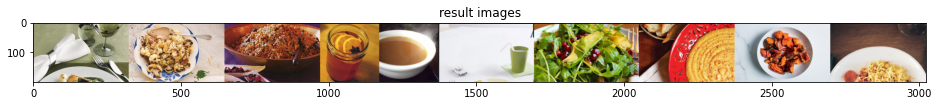

In [143]:
# do a query on a random image
top_closest_image_to_return = 10
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx, top_closest_image_to_return)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
matplotlib.pyplot.figure(figsize = (5,5))
imshow(query_image)
matplotlib.pyplot.title("query image (%d)" % query_image_idx)

# display the resulting images
matplotlib.pyplot.figure(figsize = (16,12))
imshow(results_image)
matplotlib.pyplot.title("result images")

In [122]:
images[idx_closest[1]].split("\\")[8]

'roasted_chicken'

## t-SNE Visualizing

In [123]:
num_images_to_plot = 10

if len(images) > num_images_to_plot:
    sort_order = sorted(random.sample(range(len(images)), num_images_to_plot))
    images = [images[i] for i in sort_order]
    pca_features = [pca_features[i] for i in sort_order]

In [124]:
import json
import matplotlib.pyplot
from PIL import Image
from sklearn.manifold import TSNE

X = np.array(pca_features)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

E:\anaconda\envs\food\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 39.3429070, gradient norm = 0.5564865 (50 iterations in 0.013s)
[t-SNE] Iteration 100: error = 35.7412491, gradient norm = 0.5198522 (50 iterations in 0.013s)
[t-SNE] Iteration 150: error = 54.5900002, gradient norm = 0.1330515 (50 iterations in 0.013s)
[t-SNE] Iteration 200: error = 64.0930862, gradient norm = 0.3948456 (50 iterations in 0.013s)
[t-SNE] Iteration 250: error = 39.2117081, gradient norm = 0.5508725 (50 iterations in 0.014s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.211708
[t-SNE] Iteration 300: error = 0.2641012, gradient norm = 0.0003507 (50 iterations in 0.013s)
[t-SNE] Iteration 350: error = 0.2556809, gradient norm = 0

In [125]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

0it [00:00, ?it/s]C:\Users\Nilay\AppData\Local\Temp\ipykernel_4920\3253945560.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
10it [00:00, 265.28it/s]


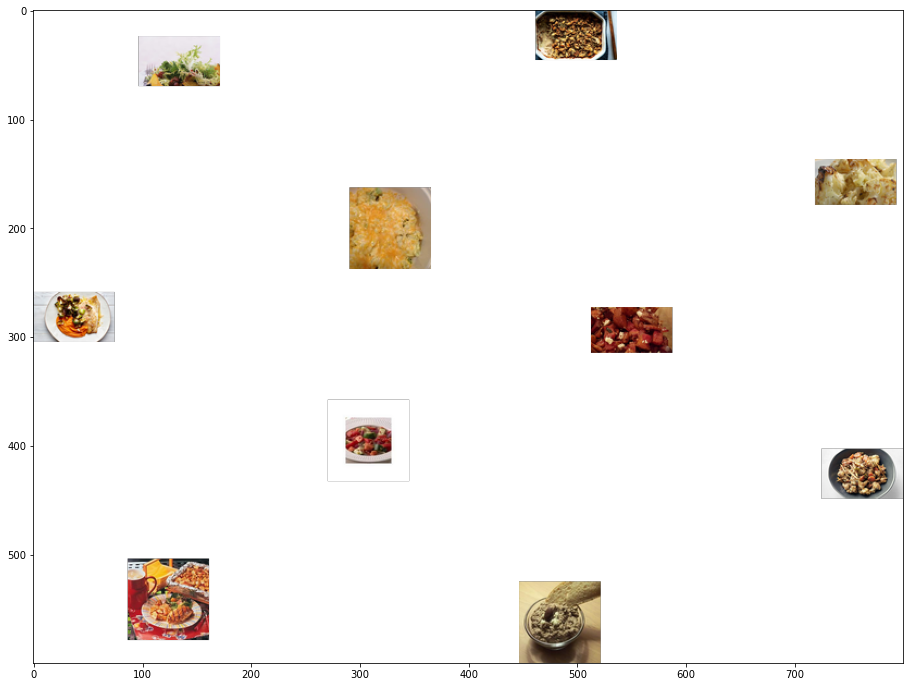

In [126]:
width = 800
height = 600
max_dim = 75

full_image = Image.new('RGBA', (width, height))
for img, x, y in tqdm(zip(images, tx, ty)):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)
full_image.save("/data/6-pics-cloud.png")

## Find recipes of top N closest images that we found

### Read the recipe csv which holds the labels and it's corresponding recipes

In [144]:
import pandas as pd

In [145]:
recipes = pd.read_csv("C:\\Users\\Nilay\\Documents\\GitHub\\OMCS_CS7643_DL\\data\\recipe_name_image_lookup.csv")

In [146]:
recipes

Unnamed: 0                                        ingredients  \
0               0  ['1/2 cup unsalted butter, chilled and cubed',...   
1               1  ['1/2 cup Parmesan cheese', '3/4 teaspoon grou...   
2               2  ['2 cups hot water', '1/2 cup margarine', '1/3...   
3               3  ['1 1/2 cups white sugar', '1/2 cup vegetable ...   
4               4  ['1/4 cup butter', '1 teaspoon white sugar', '...   
...           ...                                                ...   
85981       13496  ['1 cup all-purpose flour', '2/3 cup unsweeten...   
85982       13497  ['1 preserved lemon', '1 1/2 pound butternut s...   
85983       13498  ['Leftover katsuo bushi (dried bonito flakes) ...   
85984       13499  ['1 stick (1/2 cup) plus 1 tablespoon unsalted...   
85985       13500  ['12 medium to large fresh poblano chiles (2 1...   

                                            instructions  \
0      ['Preheat oven to 400 degrees F (205 degrees C...   
1      ['Combine parmesan cheese, pepper and garlic p...   
2      ['Melt margarine in hot water. Add sugar and s...   
3      ['Combine sugar and oil; beat well. Add eggs a...   
4      ['Stir butter and 1 teaspoon sugar into the ho...   
...                                                  ...   
85981  ['Preheat the oven to 350°F. Into a bowl sift ...   
85982  ["Preheat oven to 475°F.\nHalve lemons and sco...   
85983  ['If using katsuo bushi flakes from package, m...   
85984  ['Melt 1 tablespoon butter in a 12-inch heavy ...   
85985  ['Lay 4 chiles on their sides on racks of gas ...   

                                               photo_url  \
0      http://images.media-allrecipes.com/userphotos/...   
1      http://images.media-allrecipes.com/userphotos/...   
2      http://images.media-allrecipes.com/userphotos/...   
3      http://images.media-allrecipes.com/userphotos/...   
4      http://images.media-allrecipes.com/userphotos/...   
...                                                  ...   
85981                         brownie-pudding-cake-14408   
85982  israeli-couscous-with-roasted-butternut-squash...   
85983  rice-with-soy-glazed-bonito-flakes-and-sesame-...   
85984                                 spanakopita-107344   
85985  mexican-poblano-spinach-and-black-bean-lasagne...   

                                                   title  \
0      Basil, Roasted Peppers and Monterey Jack Cornb...   
1                                   Crispy Cheese Twists   
2                                      Mom's Yeast Rolls   
3                                   Sweet Potato Bread I   
4                                            Orange Buns   
...                                                  ...   
85981                               Brownie Pudding Cake   
85982  Israeli Couscous with Roasted Butternut Squash...   
85983  Rice with Soy-Glazed Bonito Flakes and Sesame ...   
85984                                        Spanakopita   
85985  Mexican Poblano, Spinach, and Black Bean "Lasa...   

                                             recipe_name  \
0         basil, roasted peppers monterey jack cornbread   
1                                   crispy cheese twists   
2                                      mom's yeast rolls   
3                                   sweet potato bread i   
4                                            orange buns   
...                                                  ...   
85981                               brownie pudding cake   
85982  israeli couscous roasted butternut squash pres...   
85983         rice soy-glazed bonito flakes sesame seeds   
85984                                        spanakopita   
85985  mexican poblano, spinach, black bean "lasagne"...   

                                        category             directories_names  
0                         ['roasted', 'chicken']               roasted_chicken  
1      ['cheese', 'baked', 'macaroni', 'cheese']  cheese_baked_macaroni_cheese  
2              

In [208]:
# images[idx_closest[1]].split("\\")[8]
pred_labels = []
for id in idx_closest:
    pred_label = images[id].split("\\")[-2] # grabbing the label for the image, S.O to Shruti for this hack
    pred_labels.append(pred_label)

pred_labels

['roasted_chicken',
 'roasted_chicken',
 'roasted_chicken',
 'roasted_chicken',
 'roasted_chicken',
 'roasted_chicken',
 'roasted_chicken',
 'roasted_chicken',
 'roasted_chicken',
 'roasted_chicken']

In [153]:
# Dedupe categories/labels
pred_labels = (set(pred_labels))

In [154]:
pred_labels

{'roasted_chicken'}

In [199]:
recomended_recipies = pd.DataFrame(columns= ["directories_names","ingredients", "instructions"])

In [200]:
for label in pred_labels:
    row = recipes[recipes.directories_names == 'roasted_chicken'][["directories_names","ingredients", "instructions"]].sample(n = 3)
    recomended_recipies = pd.concat([recomended_recipies, row])

In [201]:
recomended_recipies

directories_names                                        ingredients  \
13072   roasted_chicken  ['1 tablespoon butter', '3 onions, sliced', '1...   
68806   roasted_chicken  ['4 12x12-inch squares aluminum foil', '20 fre...   
84871   roasted_chicken  ['3 large red bell peppers', '1 2-pound beef t...   

                                            instructions  
13072  ['Melt butter in a medium saucepan over medium...  
68806  ['Preheat oven to 375 degrees F (190 degrees C...  
84871  ['Char peppers over gas flame or in broiler un...

In [204]:
import numpy as np
from sklearn.model_selection import train_test_split
images_80_percent, images_20_percent =  train_test_split(images, test_size =.20, shuffle  = True)

In [206]:
len(images_80_percent)

1399

In [207]:
len(images_20_percent)

350